#All neededed librarys

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
from astropy.modeling.models import Gaussian2D
import glob
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from clustar.core import ClustarData
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import random
from scipy.ndimage import rotate


In [2]:
#Define global variables

In [3]:
im_size = 100
shift_interval = 1

gaussians = []


Define Size of image in pixels and object in image
The object is a standard object from astropy, the idea is to use one of our own gaussian.

Here we plot the actual image

Lets say we want to crop the image to a standard size 

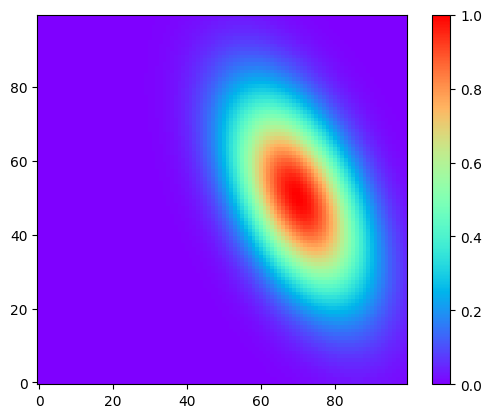

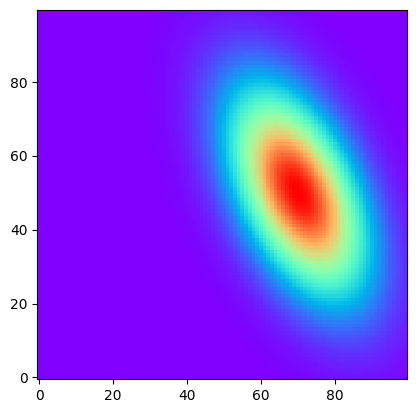

In [4]:
y, x = np.mgrid[0:500, 0:500]
data1 = Gaussian2D(1, 250, 250, 20, 10, theta=2)(x, y)
# plt.imshow(data1, origin='lower', cmap='rainbow')
# plt.colorbar()
# plt.show()

crop_center = (230, 250)
crop_size = units.Quantity((100, 100), units.pixel)
crop = Cutout2D(data1, crop_center, crop_size)

plt.imshow(crop.data, origin='lower', cmap='rainbow')
plt.colorbar()
plt.show()

zscale = ZScaleInterval(contrast=0.2, nsamples=1)
plt.imshow(zscale(crop.data),
           origin='lower', cmap='rainbow')
plt.show()

Load a FITS file instead of simulating

In [5]:
#Get all the fits files adresses un a dictionary
filenames = glob.glob('data/*.fits')
data_set = {}

In [6]:
def fits2png(file_path):
    data = fits.getdata(file_path)
    zscale = ZScaleInterval()
    data = zscale(data).squeeze()
    return data

# Find object of interest in FITS-file and return pos 

In [7]:
def find_object_pos(file):
    cd = ClustarData(path=file, group_factor=0)
    if len(cd.groups) > 0:
        disk = cd.groups[0]
        bounds = disk.image.bounds
        x = (bounds[2] + bounds[3])/2 
        y = (bounds[0] + bounds[1])/2
        return (x, y)
    else:
        print("No object found in {}".format(file))
        return None


# Go through all the FITS adresses and print the graphs

In [8]:

for file in filenames:
    img_data = fits.getdata(file)
    object_pos = find_object_pos(file)
    if object_pos != None:
        # Data shape is (1, 1, x, y) we want it to be (x, y)
        img_data.shape = (img_data.shape[2], img_data.shape[3])
        # Set the size of the crop in pixels
        crop_size = units.Quantity((im_size, im_size), units.pixel)
        img_crop = Cutout2D(img_data, object_pos, crop_size)
        gaussians.append(img_crop)


c:\Users\peter\AppData\Local\Programs\Python\Python38\lib\site-packages\clustar\group.py:340: RuntimeWarning: invalid value encountered in sqrt
  stats_.y_len = 2 * np.sqrt(stats_.eigen_values[1] *


No object found in data\hh212_2015_band7_0.fits
No object found in data\hh212_2015_band7_1.fits


In [9]:
# This function flips the image horizontally, vertically or both
def flip_disk(disk_to_flip):

    flipped_disk = disk_to_flip

    if bool(random.getrandbits(1)):
        flipped_disk = np.fliplr(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flipud(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flip(flipped_disk)

    return flipped_disk


In [10]:
# This function rotates the image by a random angle
def rotate_disk(disk_to_rotate, angle):

    # Rotate the disk
    rotated_disk = rotate(disk_to_rotate, angle)
    # Since rotating pads the image, we need to crop it to the original size
    x, y = (len(rotated_disk[0]), len(rotated_disk))

    shift_interval = 8
    si = shift_interval + 1

    rand_x_shift = random.randint(-shift_interval, shift_interval)
    rand_y_shift = random.randint(-shift_interval, shift_interval)

    (x_lower, x_upper) = int((x/2 - im_size/2)) + \
        rand_x_shift, int(x/2 + im_size/2) + rand_x_shift
    (y_lower, y_upper) = int((y/2 - im_size/2)) + \
        rand_y_shift, int(y/2 + im_size/2) + rand_y_shift

    return rotated_disk[(x_lower+si):(x_upper-si), (y_lower+si):(y_upper-si)]


In [11]:
def augment(disk):
    angle = random.randint(0, 360) 
    return rotate_disk(flip_disk(disk), angle)
    

Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset


C:\Users\peter\AppData\Local\Temp\ipykernel_7916\1934022444.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(frameon=False)


Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending 

array([], dtype=float64)

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

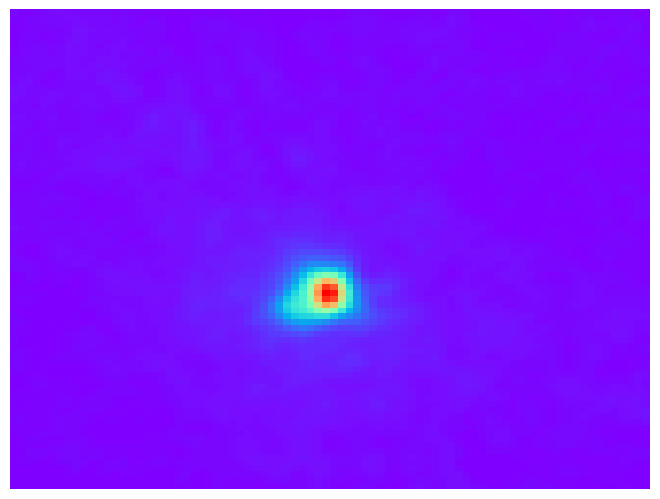

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

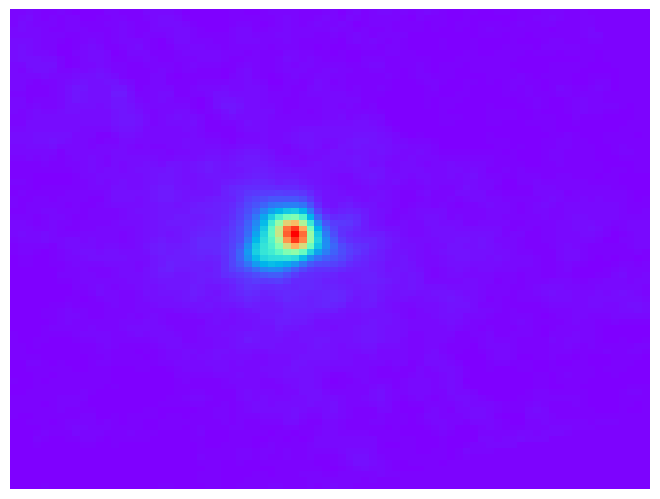

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

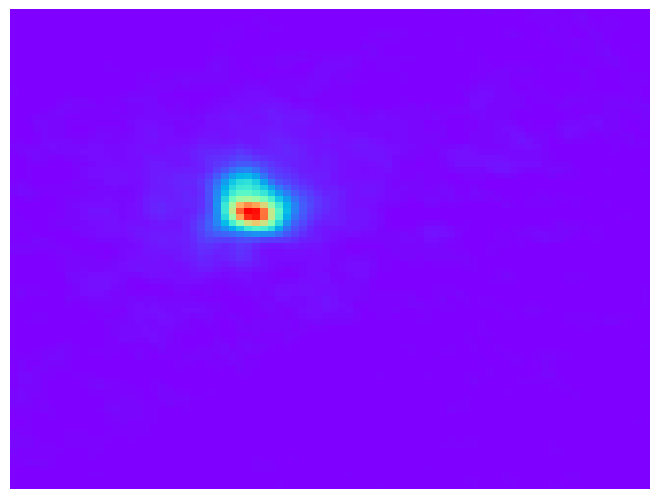

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

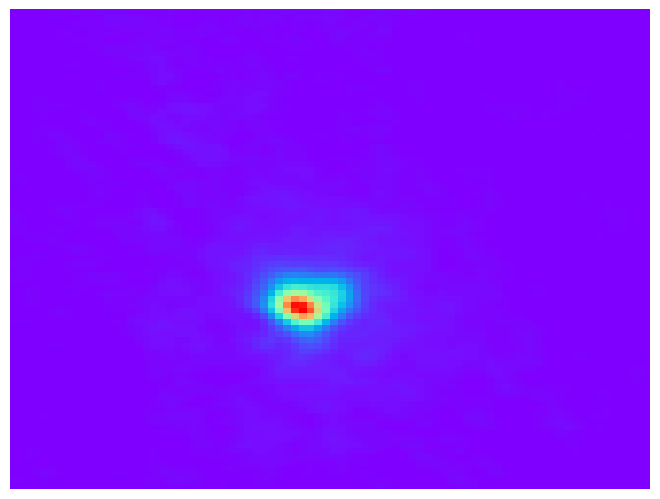

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

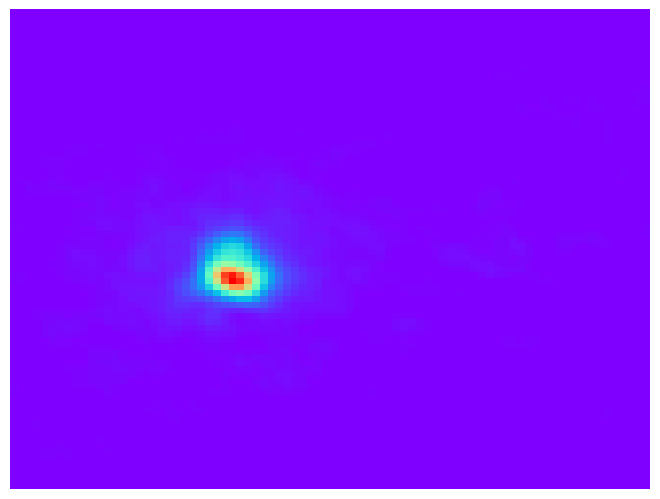

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

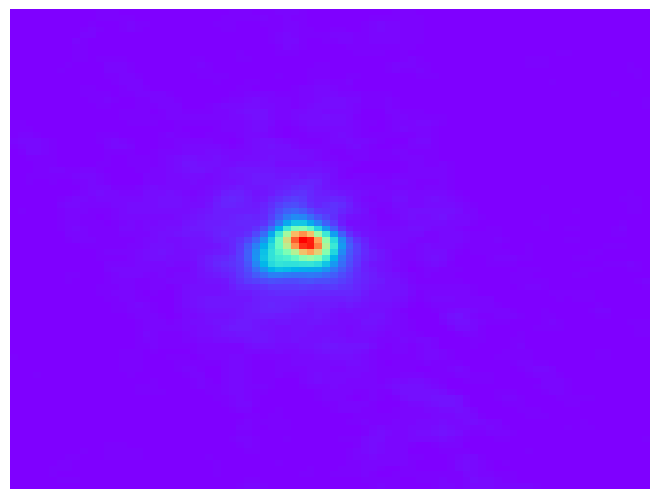

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

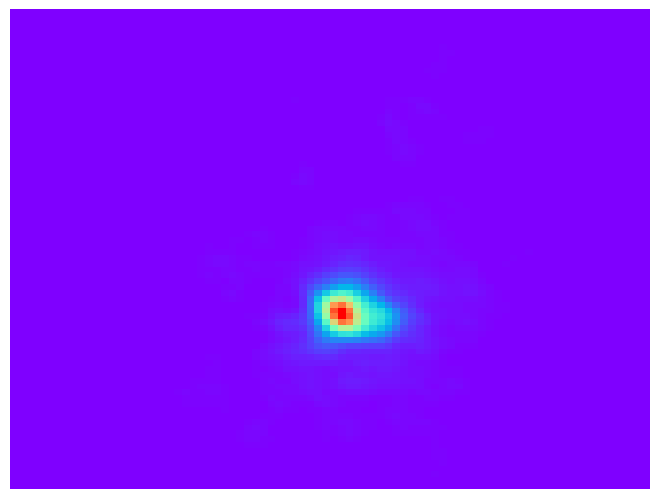

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

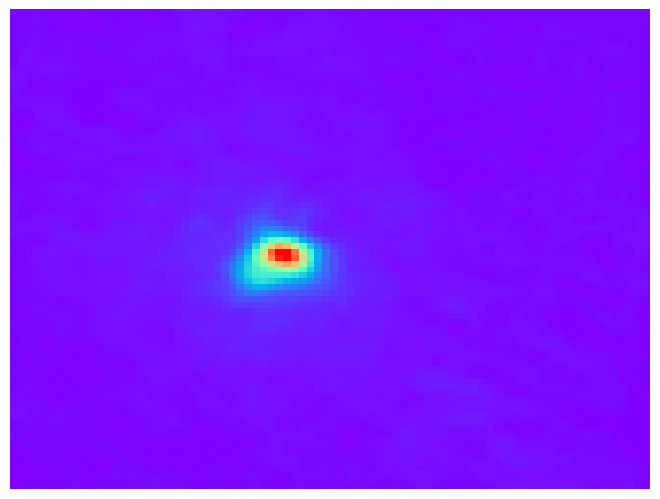

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

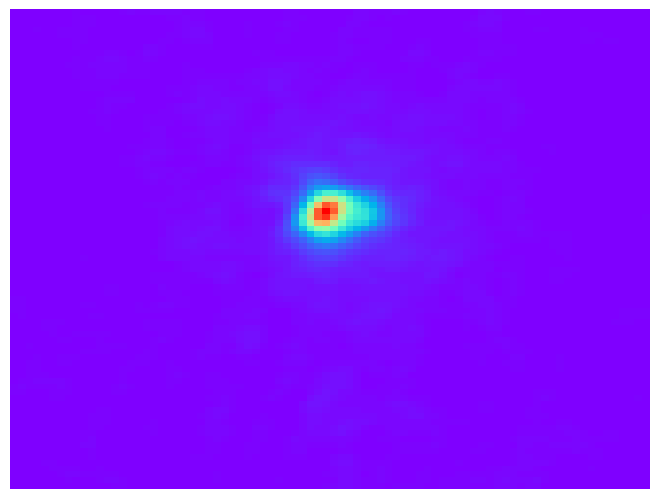

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

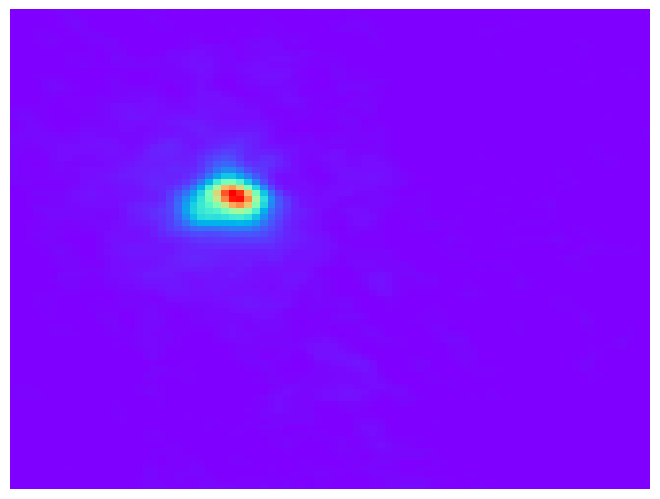

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

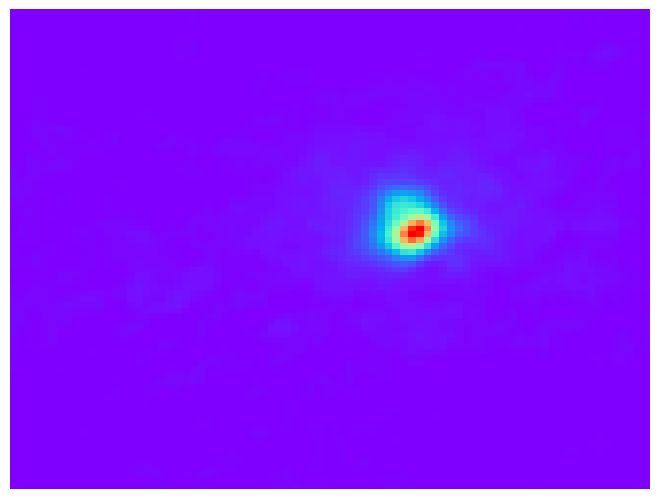

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

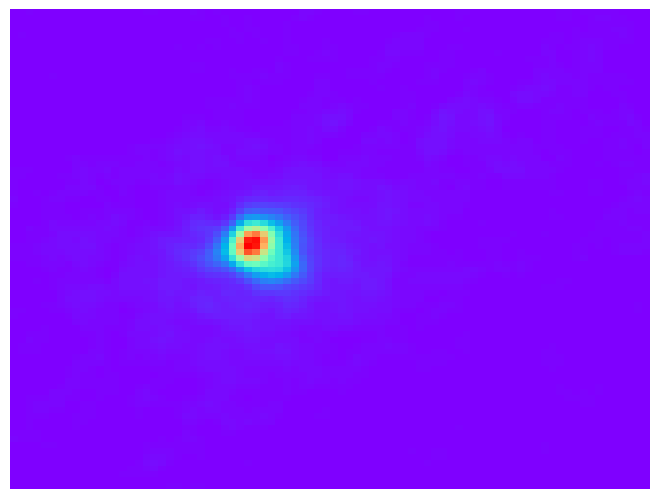

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

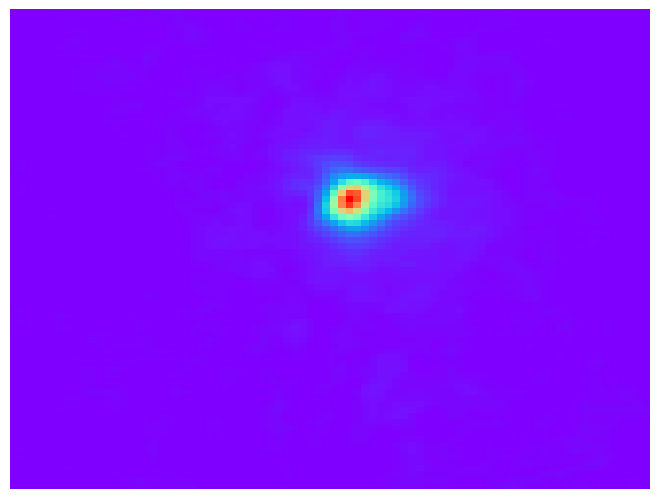

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

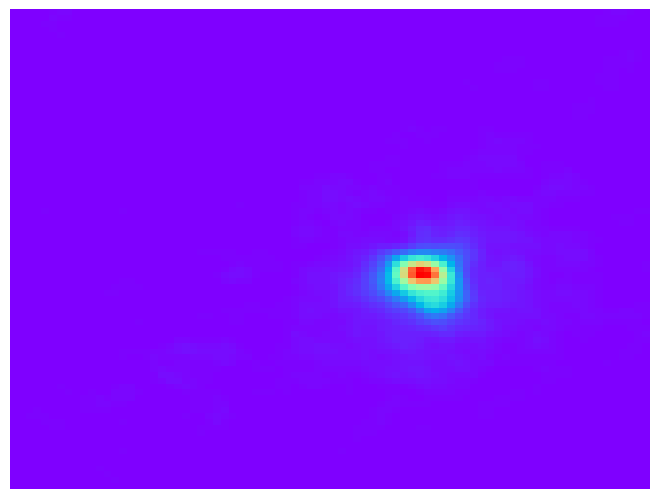

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

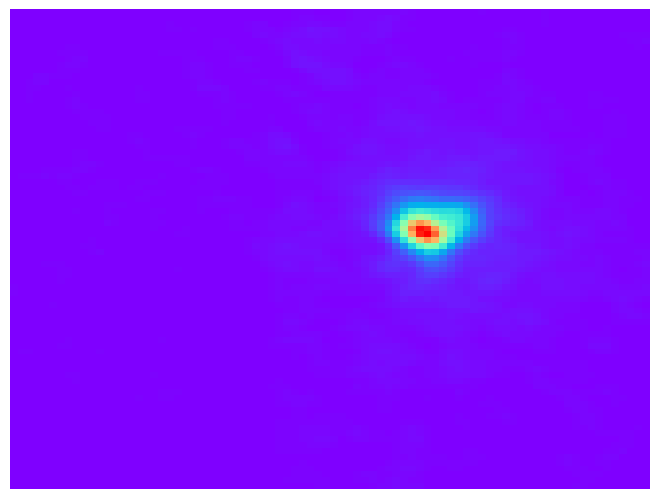

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

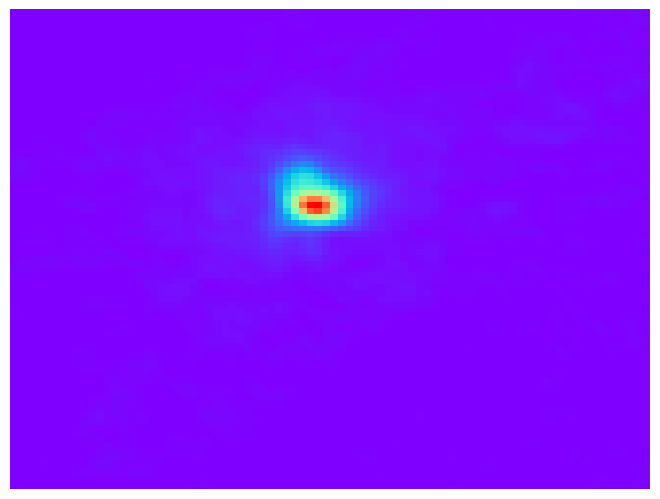

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

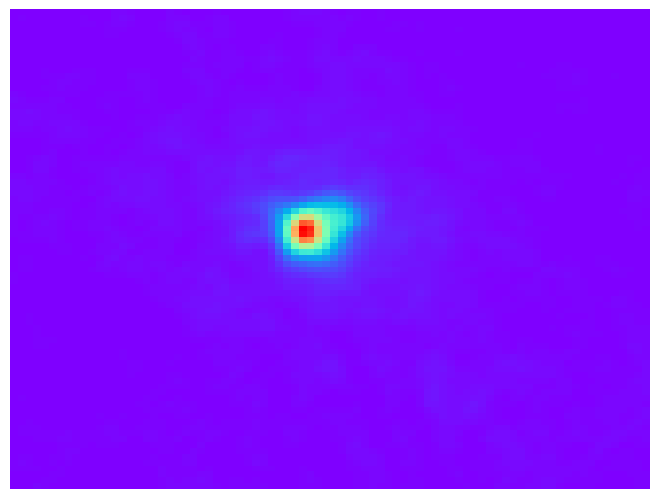

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

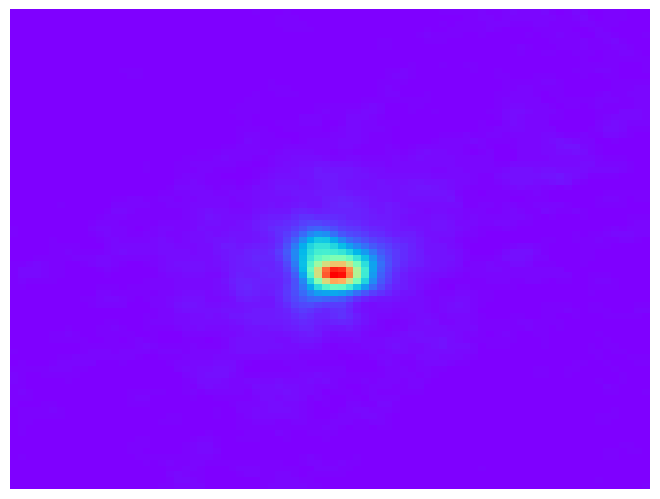

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

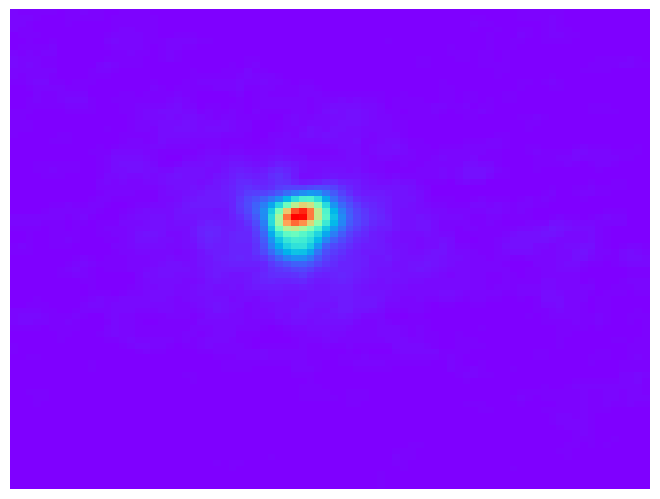

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

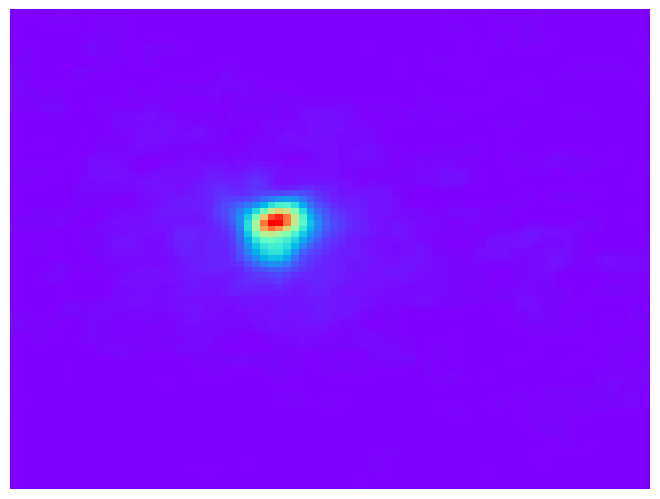

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

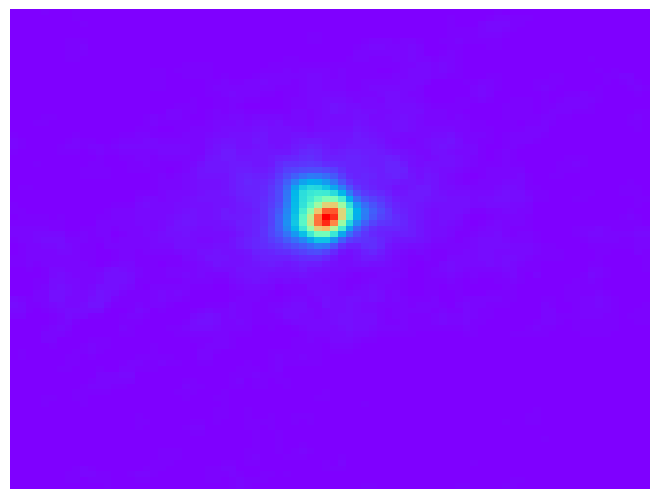

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

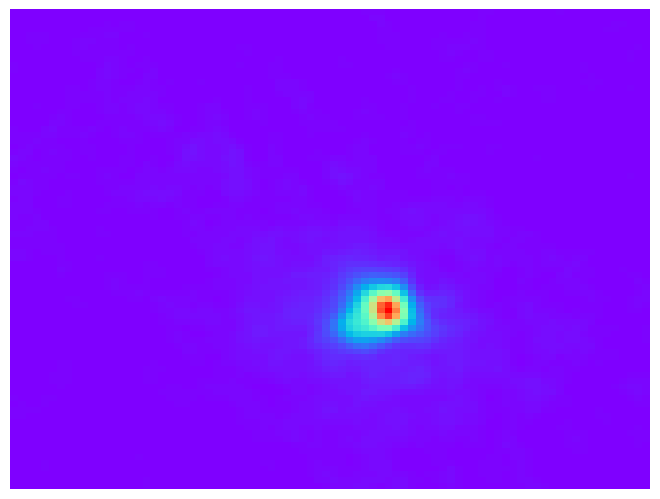

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

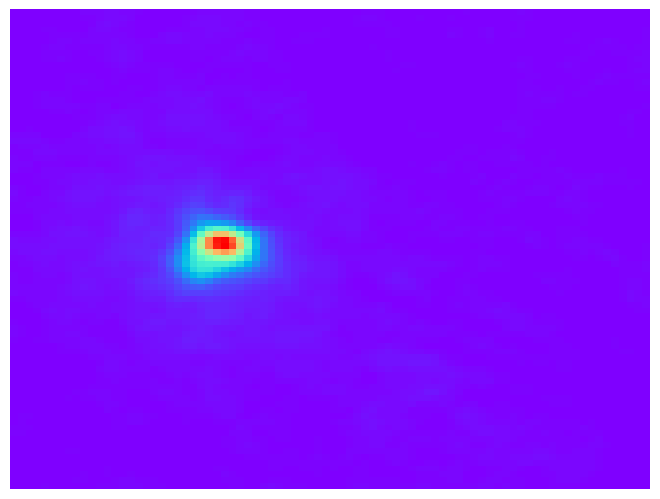

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

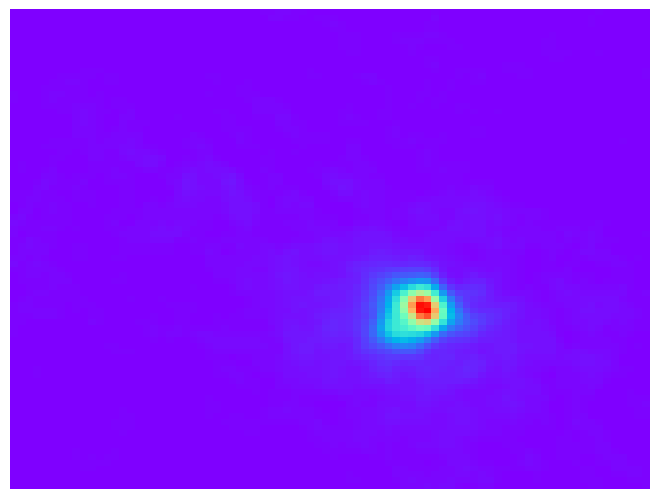

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

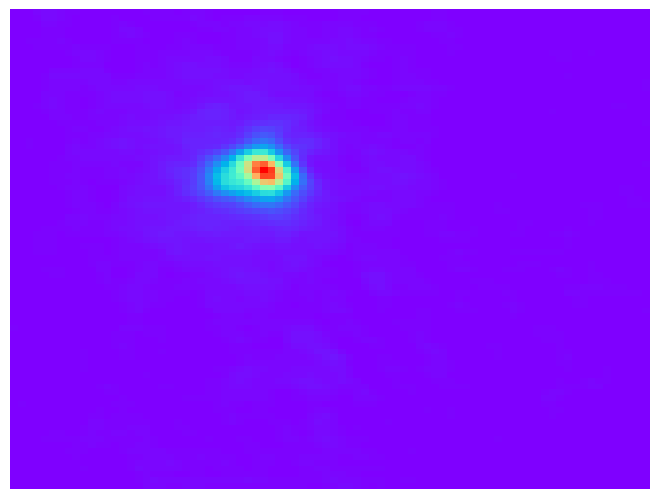

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

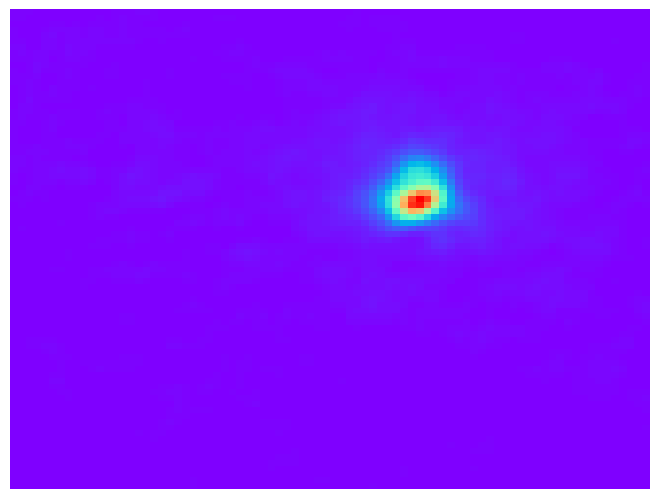

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

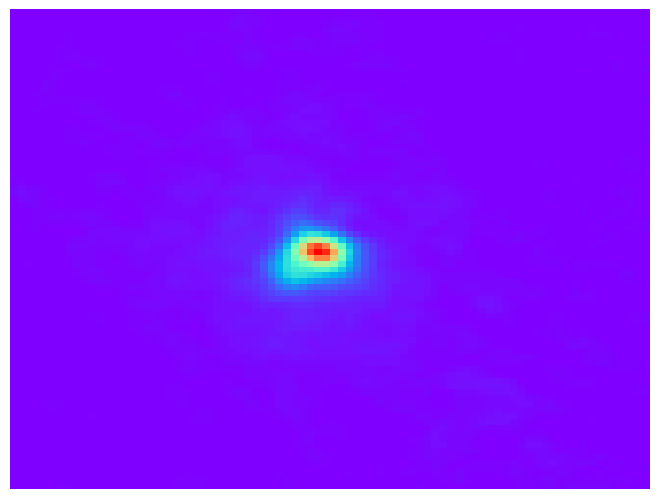

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

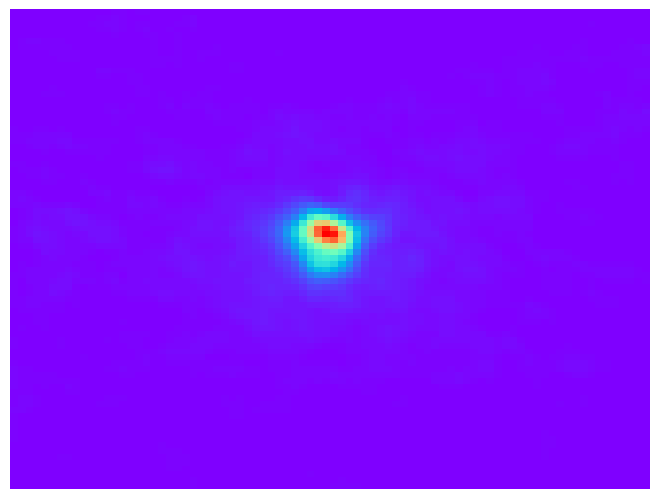

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

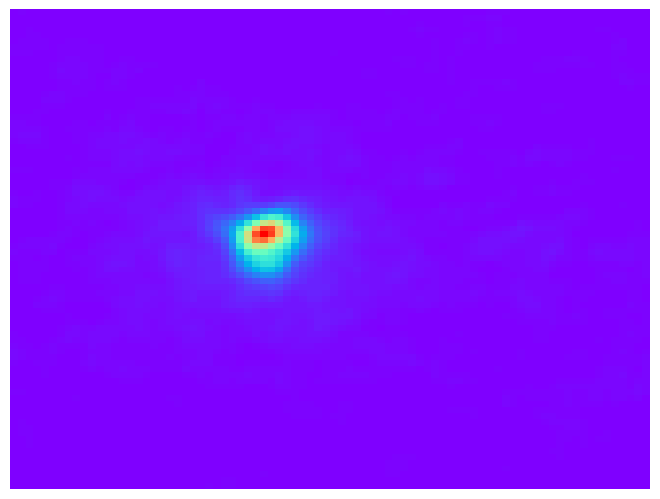

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

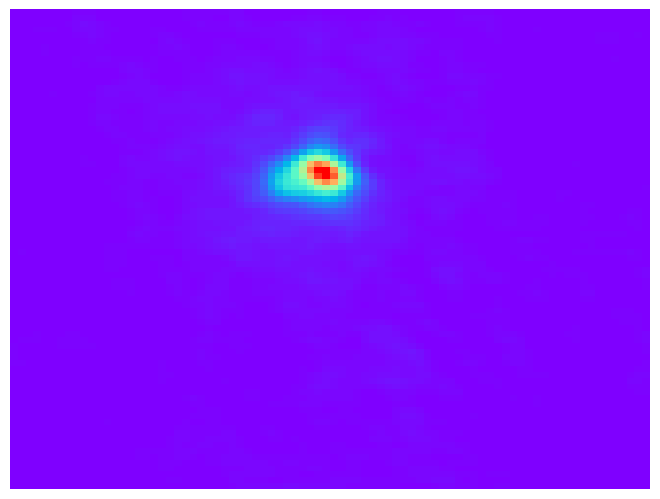

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

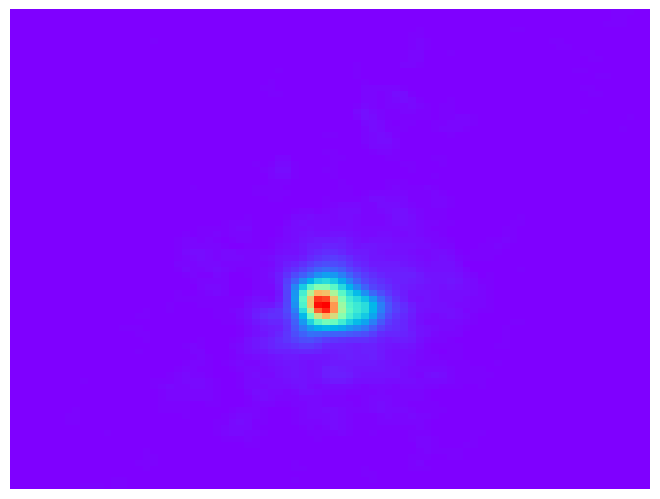

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

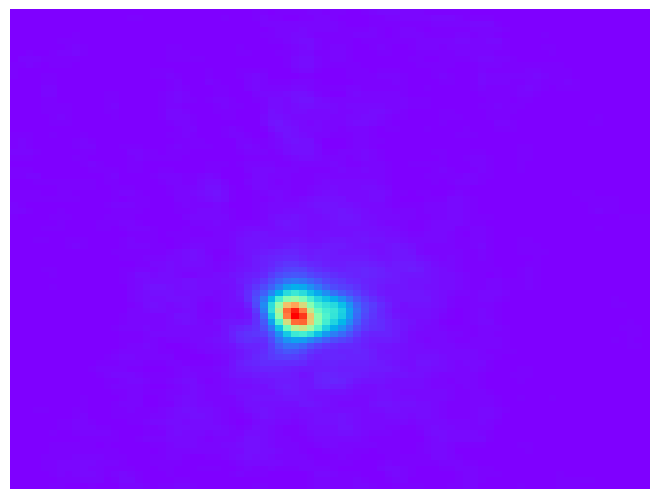

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

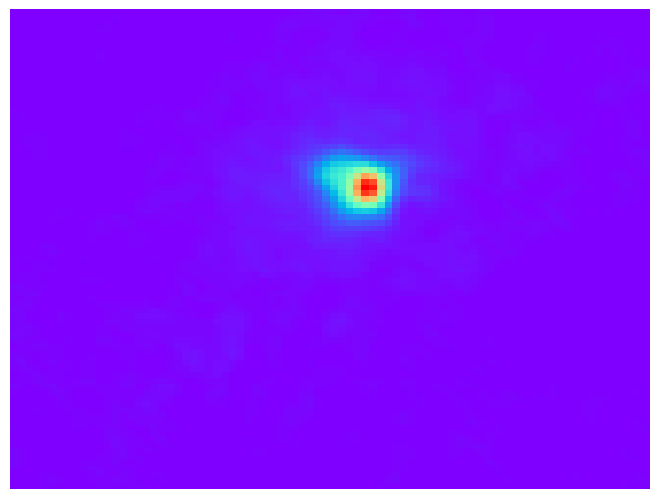

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

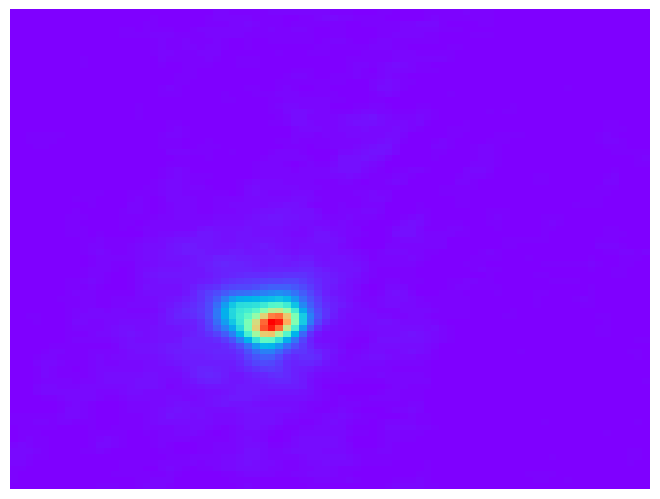

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

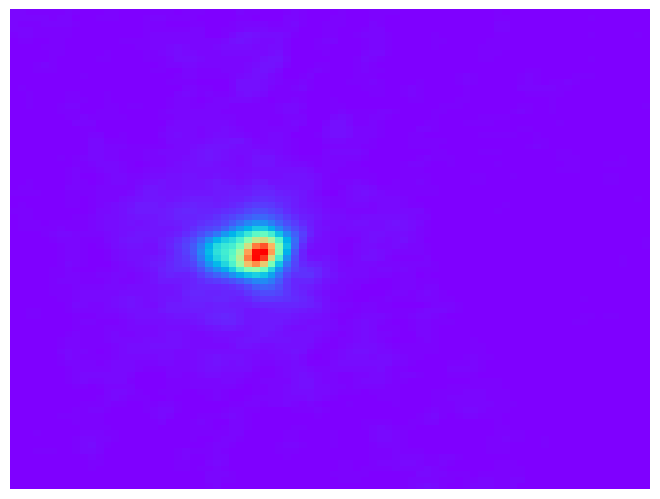

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

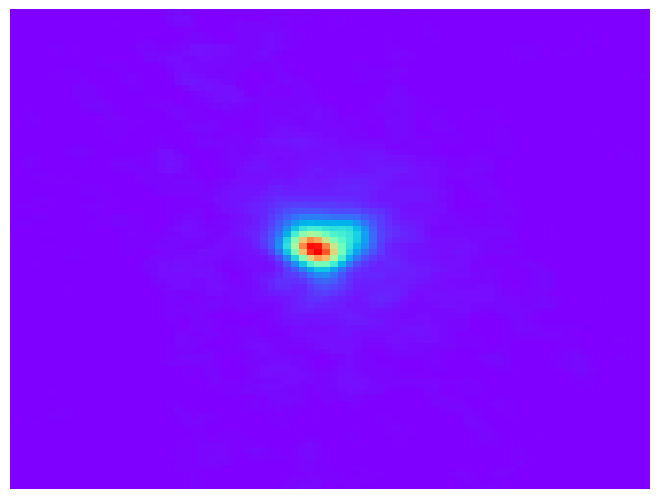

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

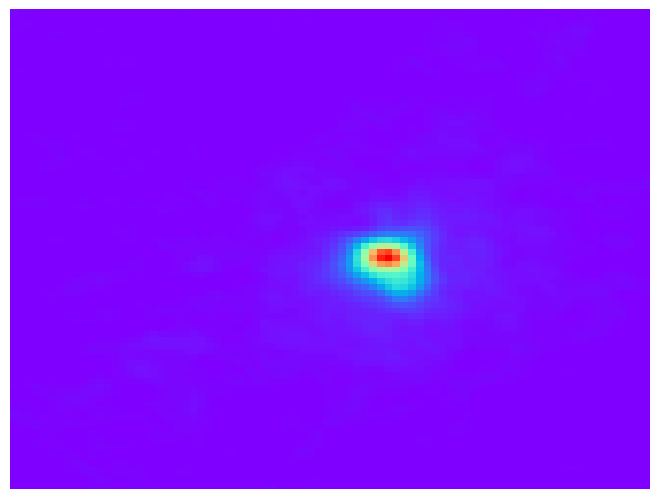

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

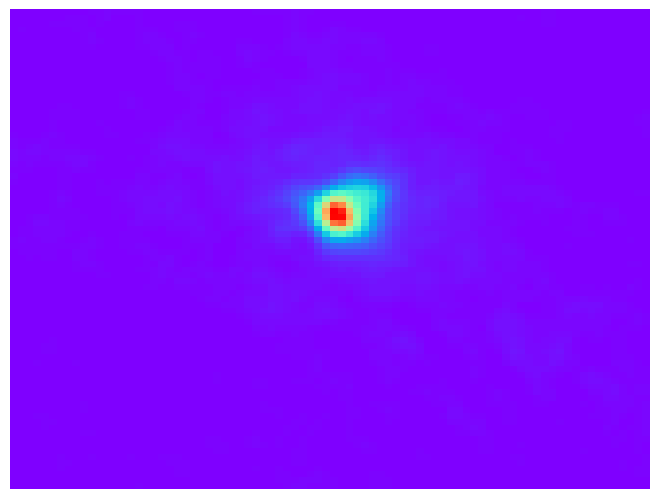

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

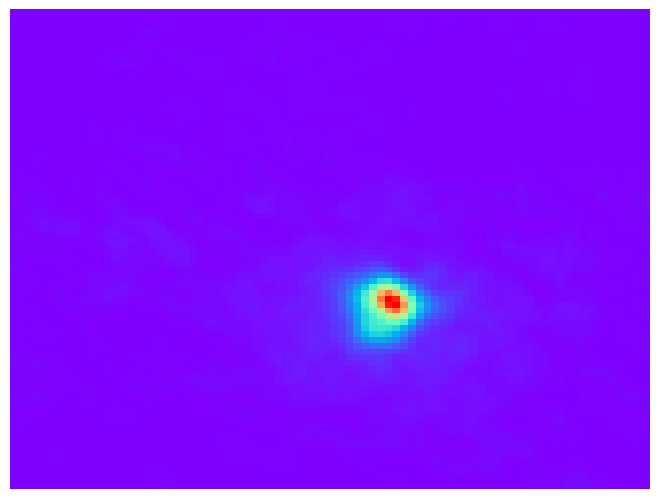

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

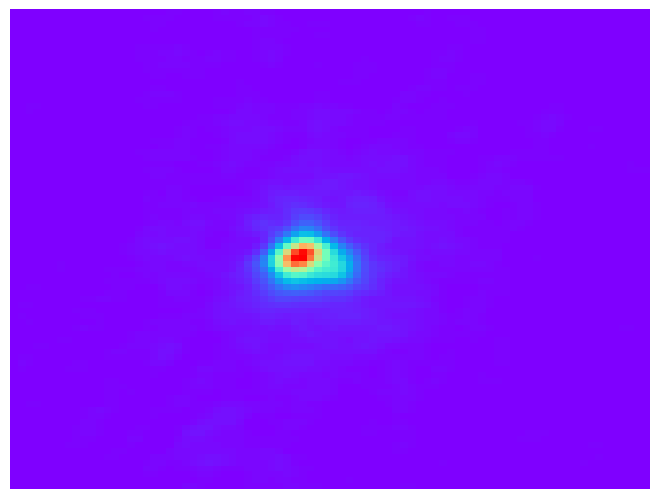

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

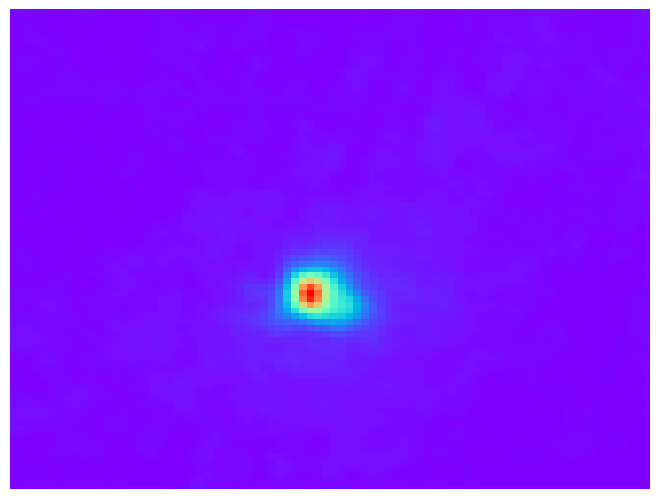

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

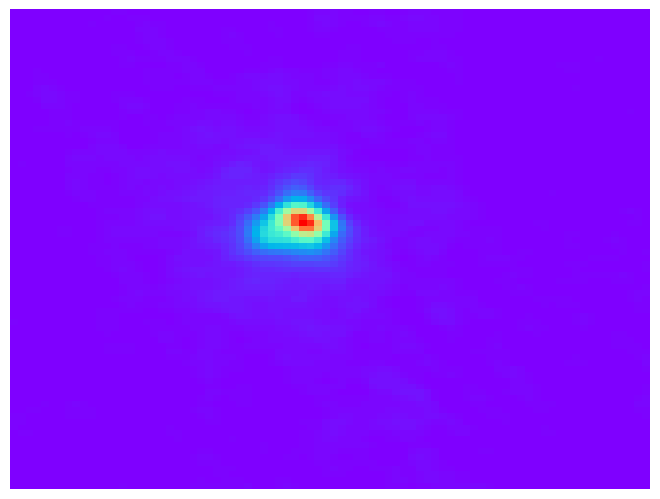

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

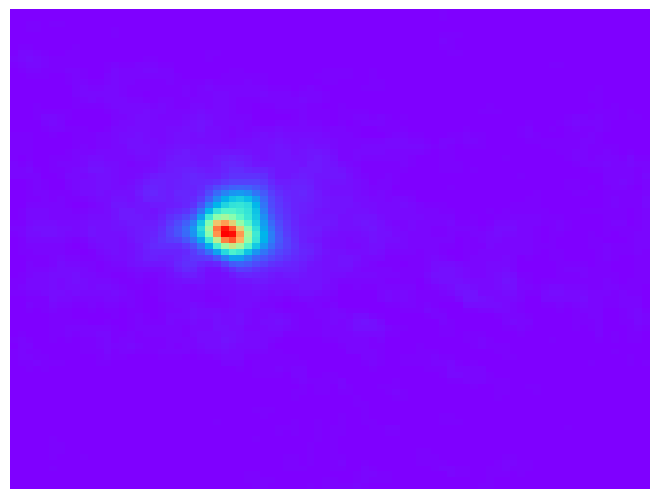

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

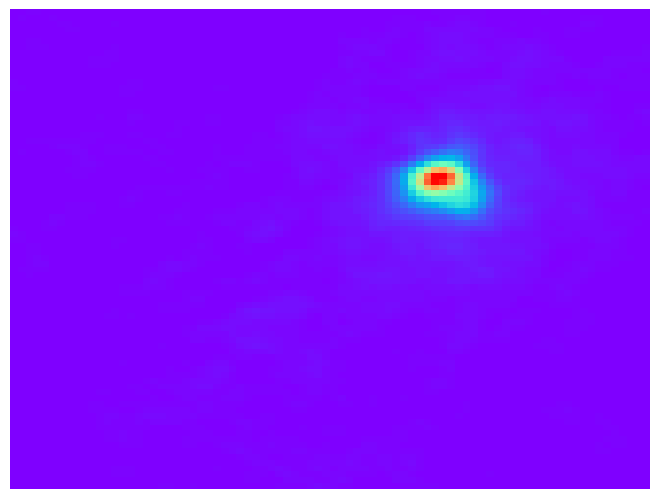

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

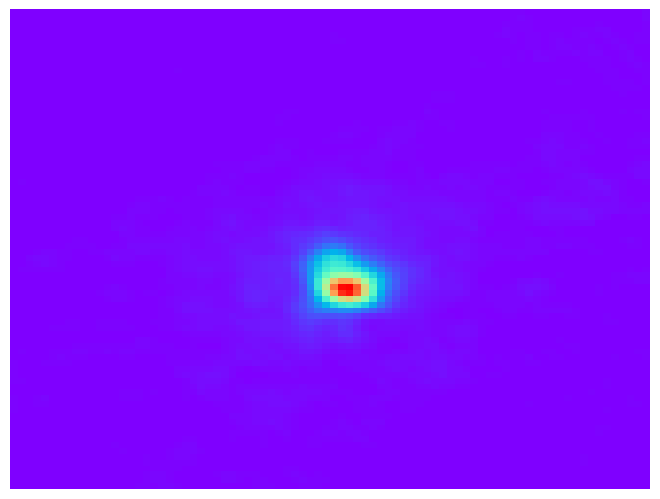

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

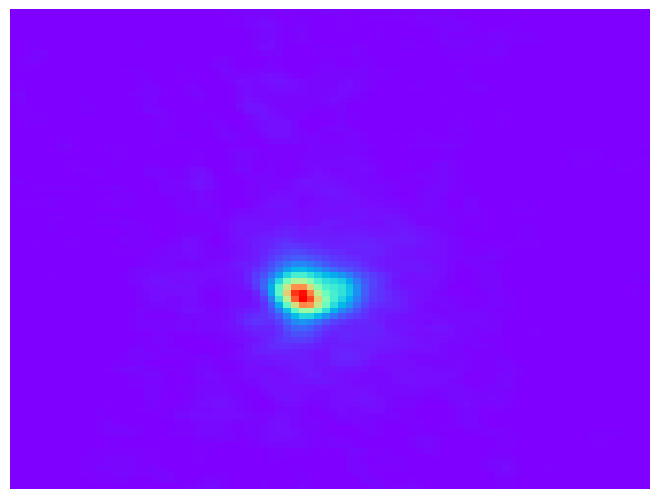

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

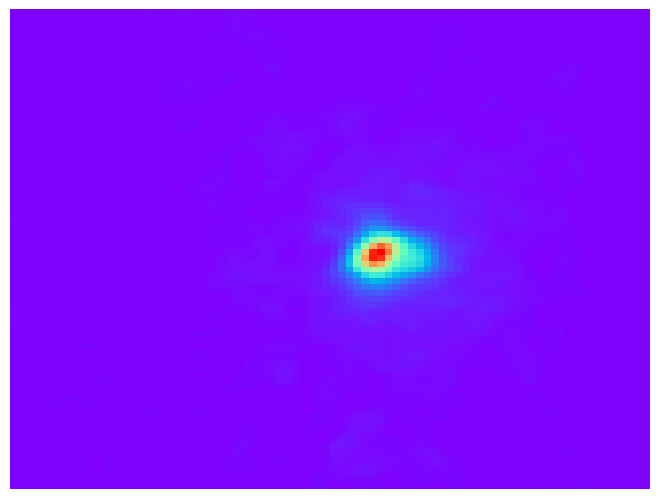

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

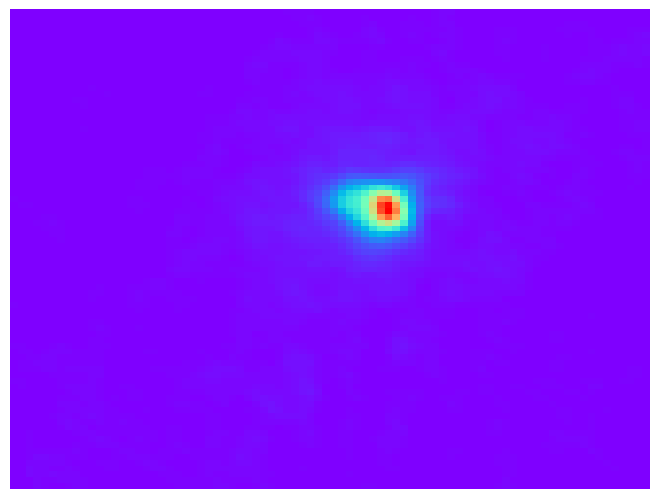

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

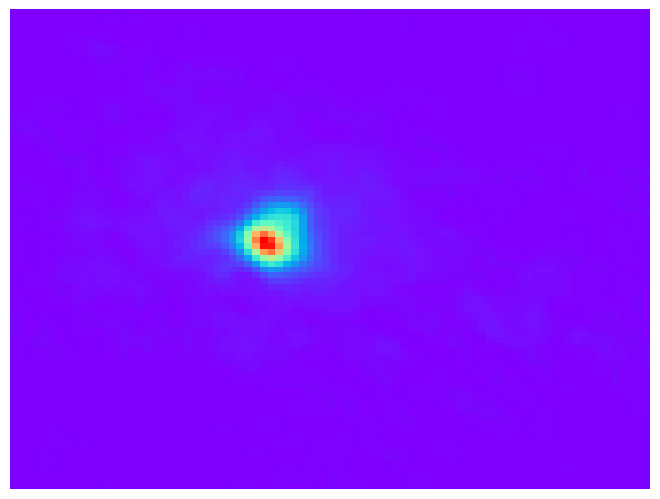

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

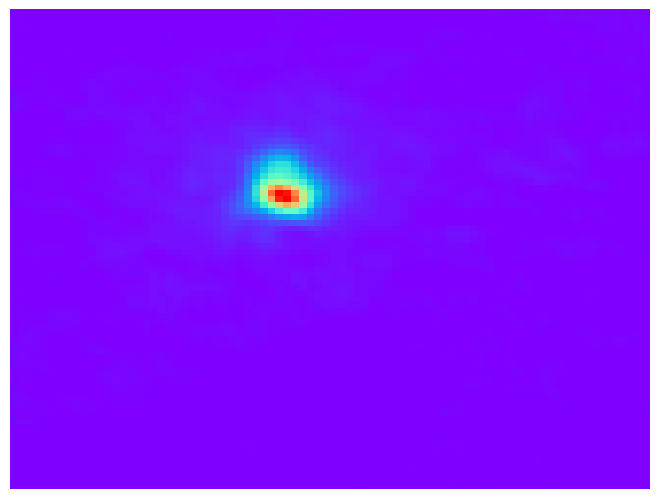

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

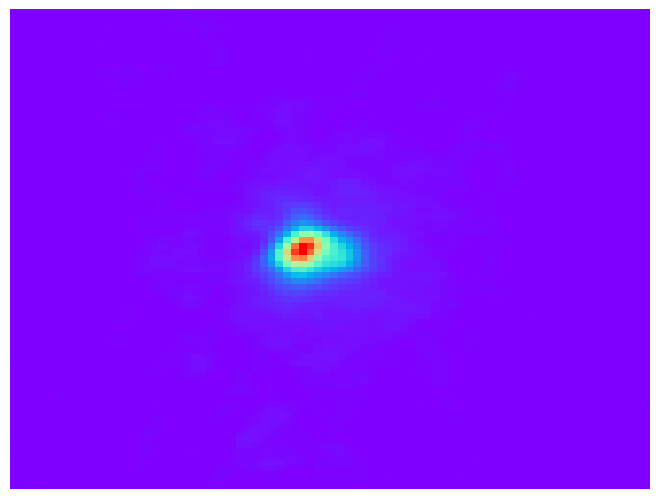

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

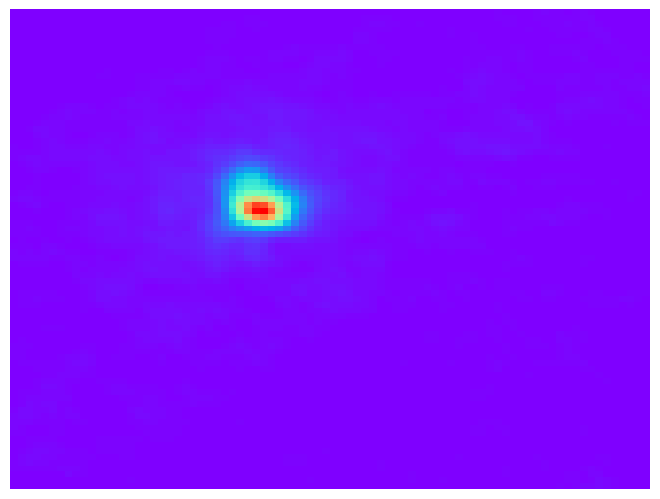

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

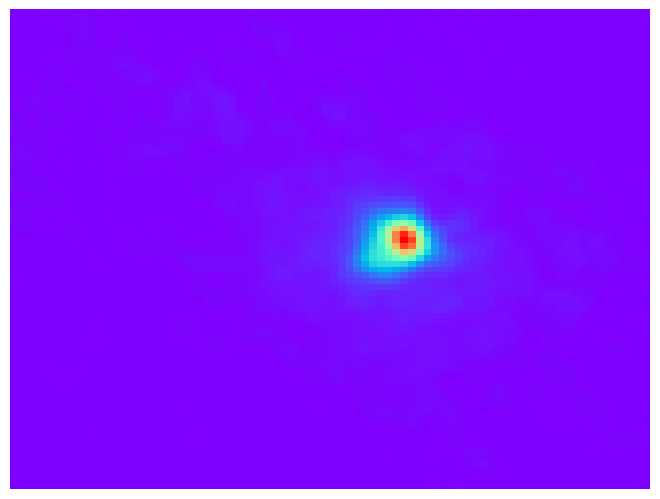

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

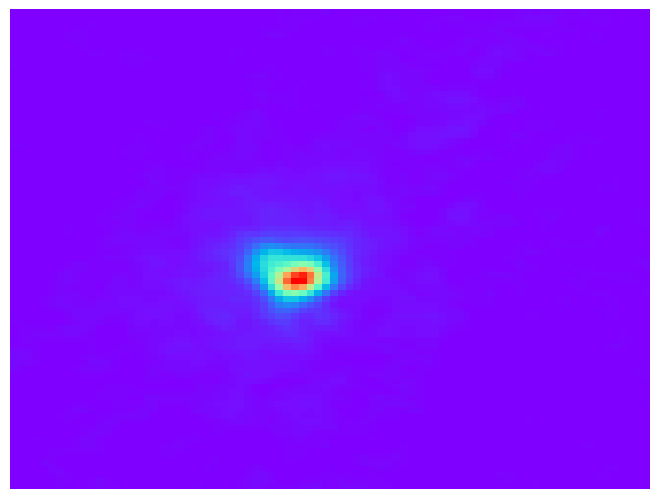

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

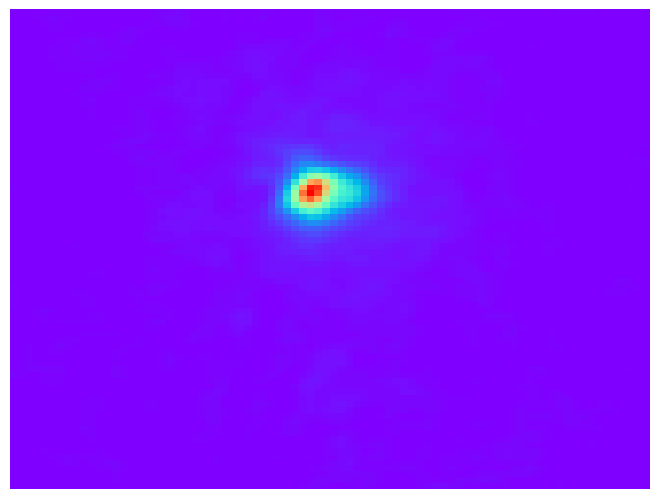

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

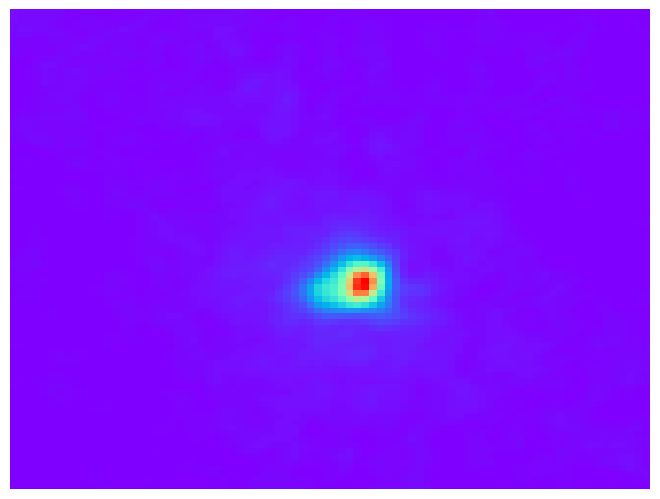

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

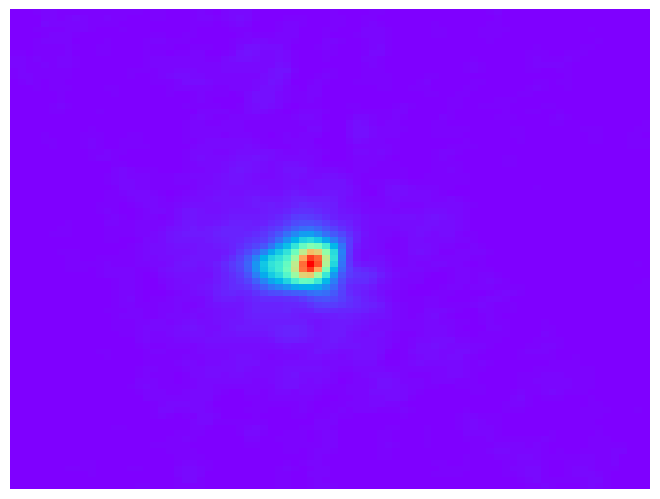

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

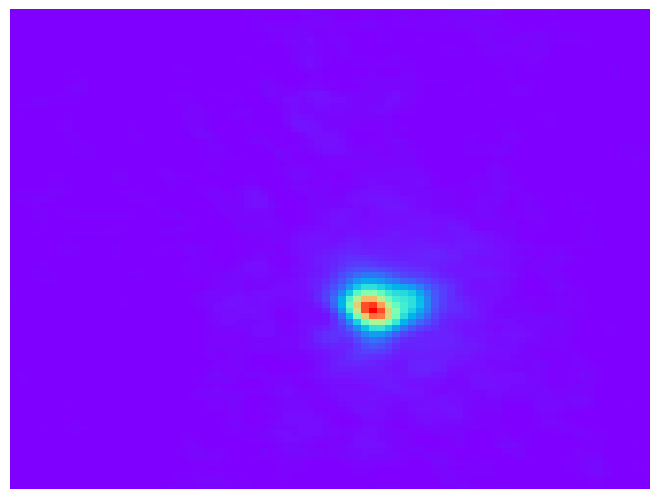

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

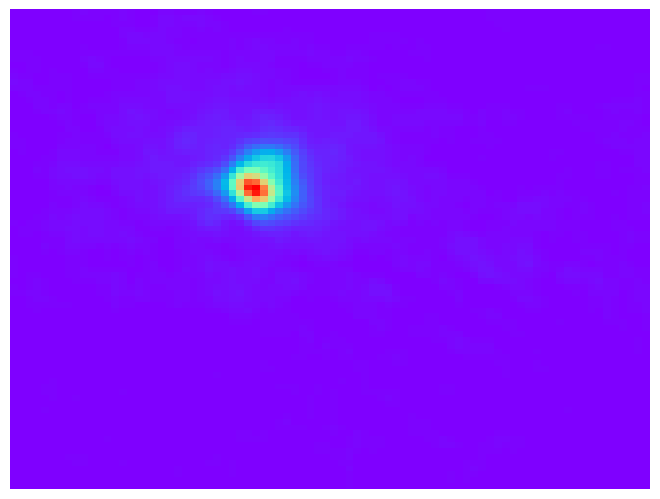

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

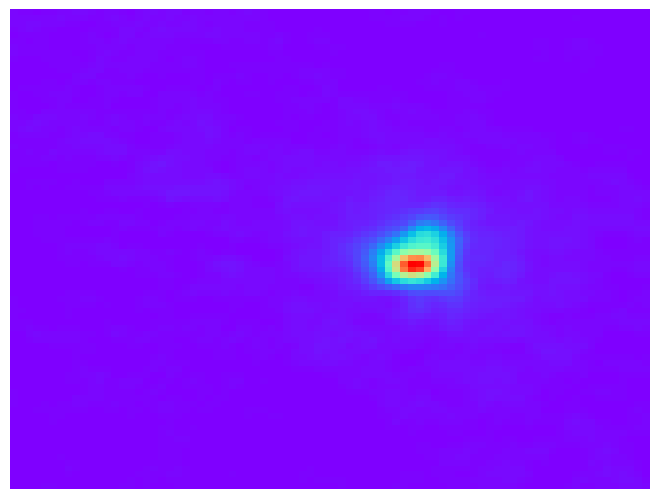

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

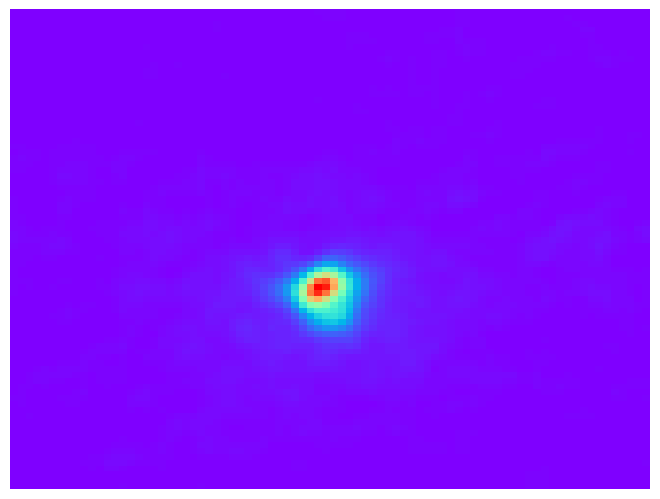

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

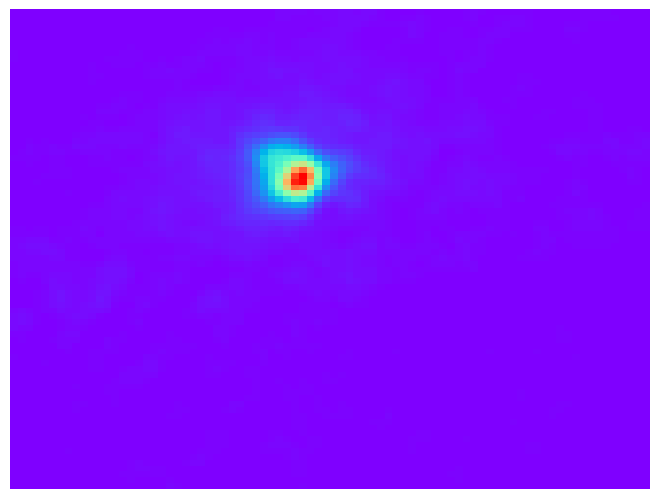

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

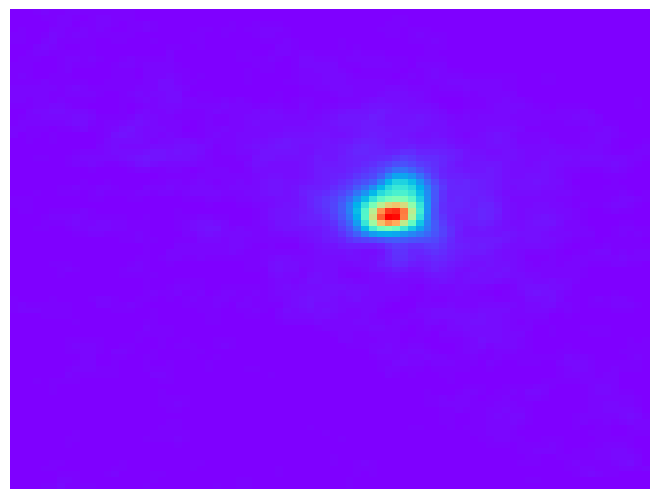

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

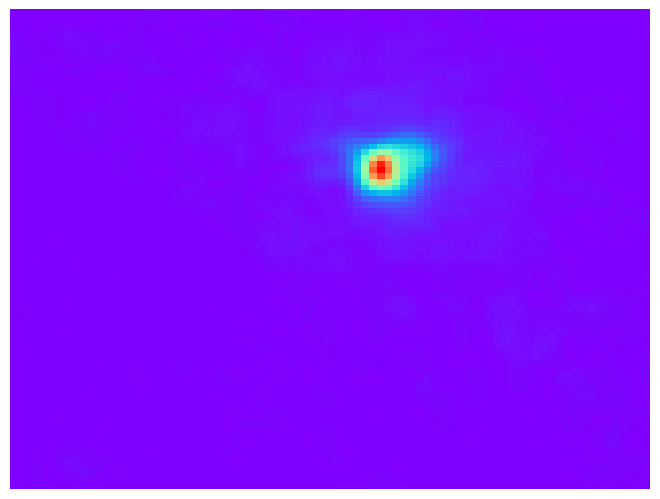

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

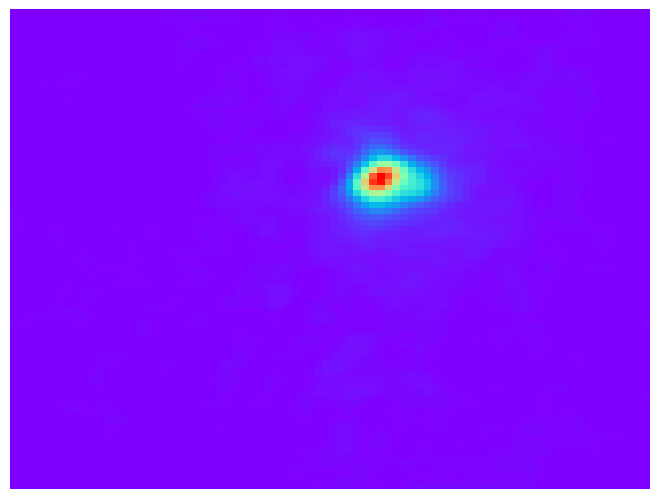

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

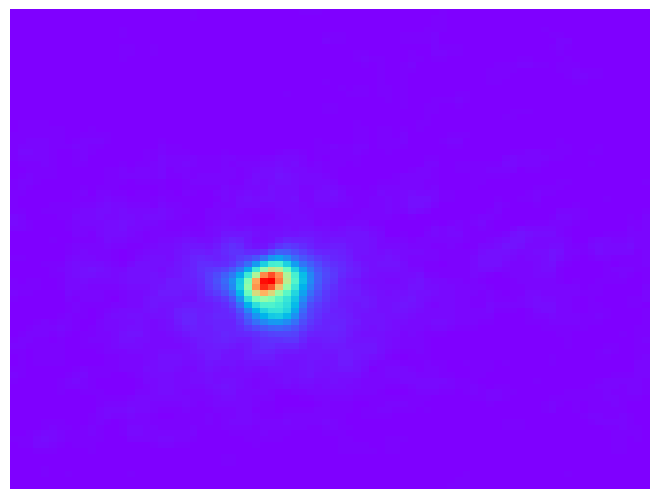

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

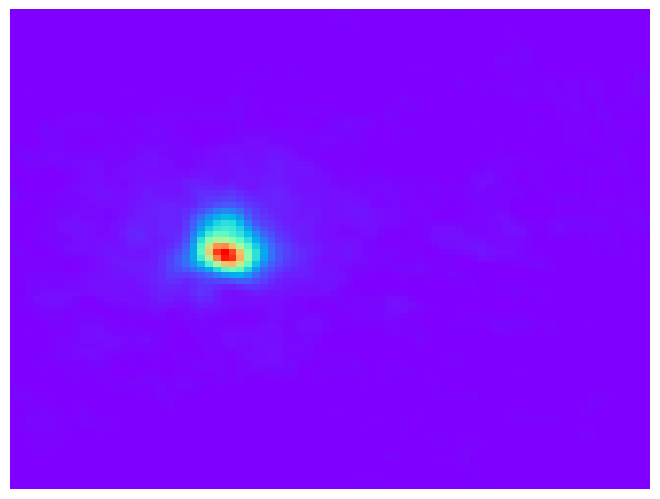

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

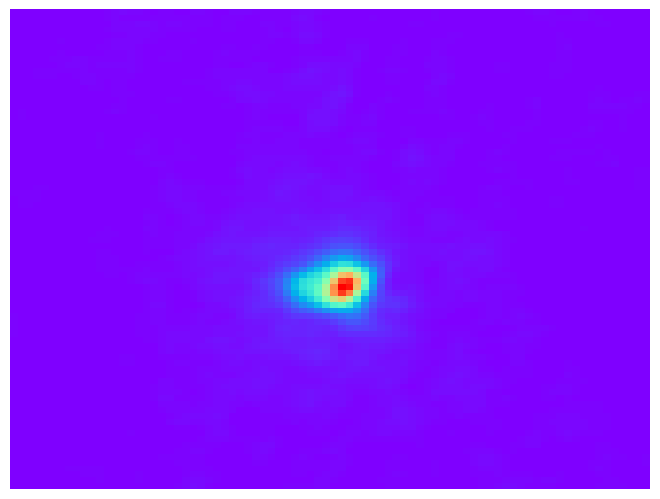

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

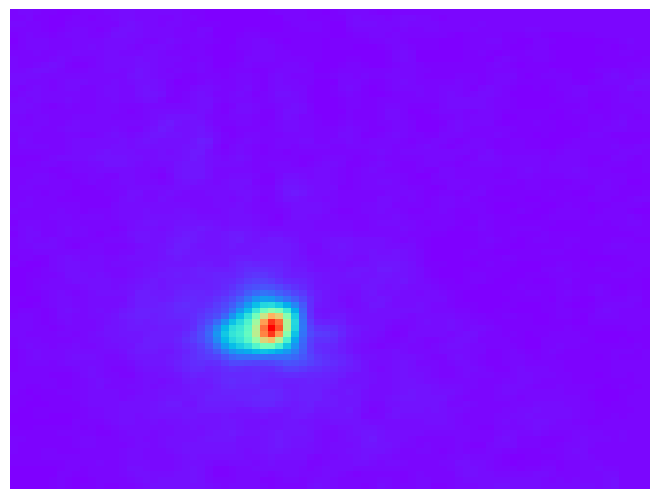

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

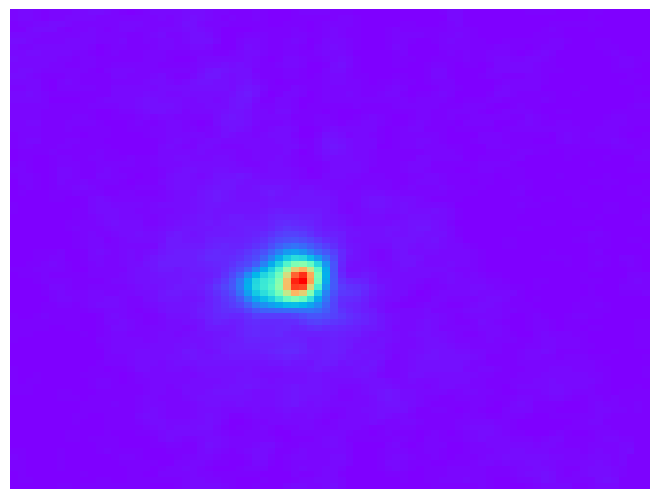

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

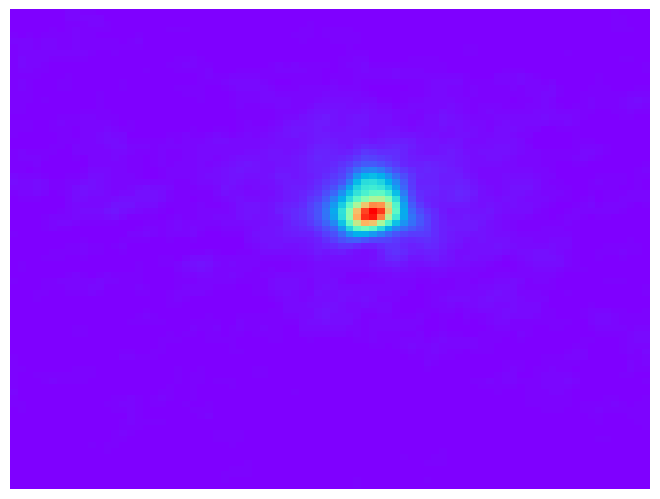

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

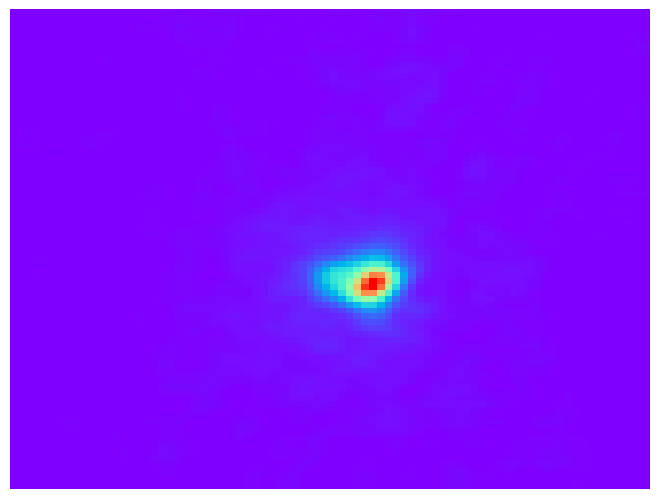

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

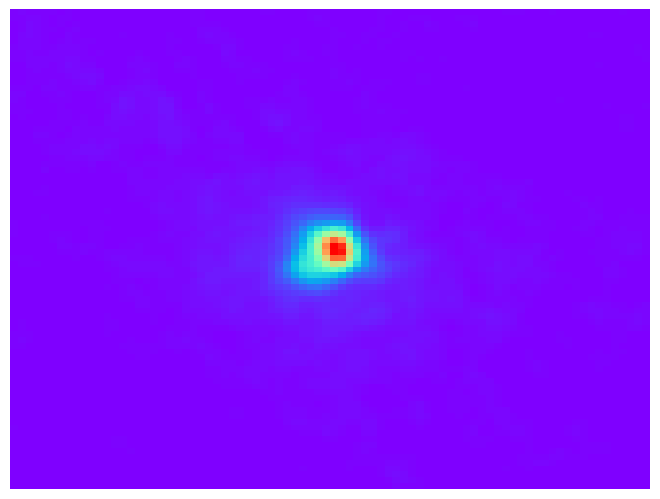

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

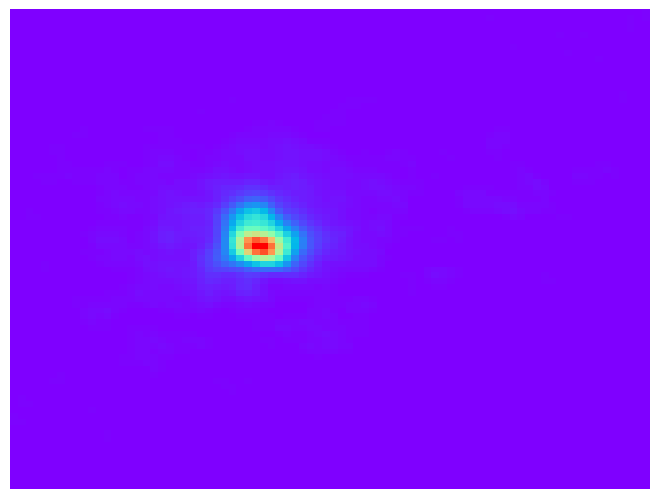

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

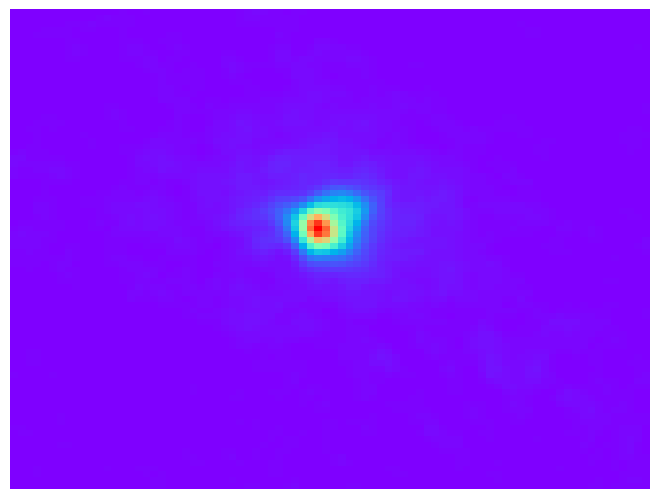

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

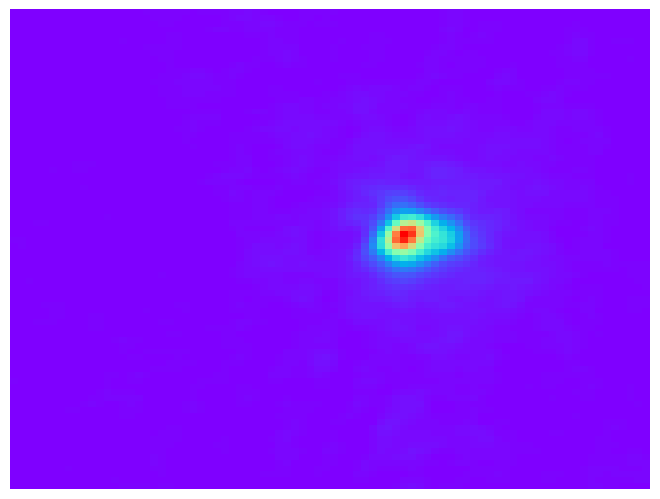

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

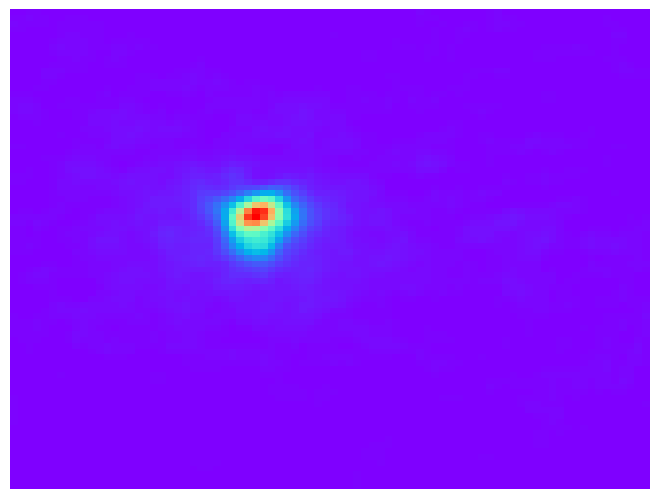

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

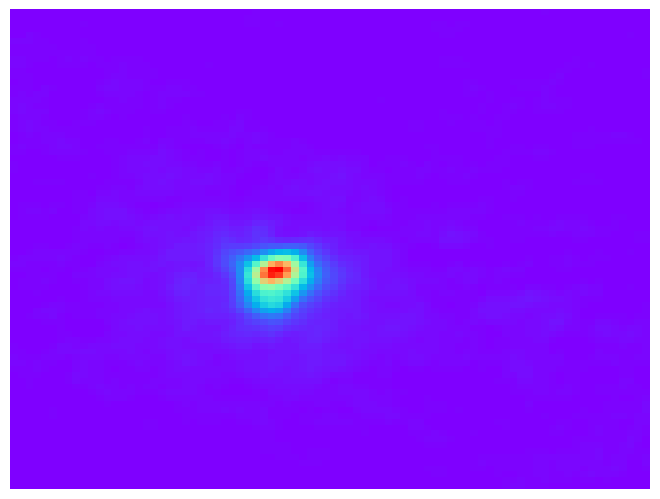

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

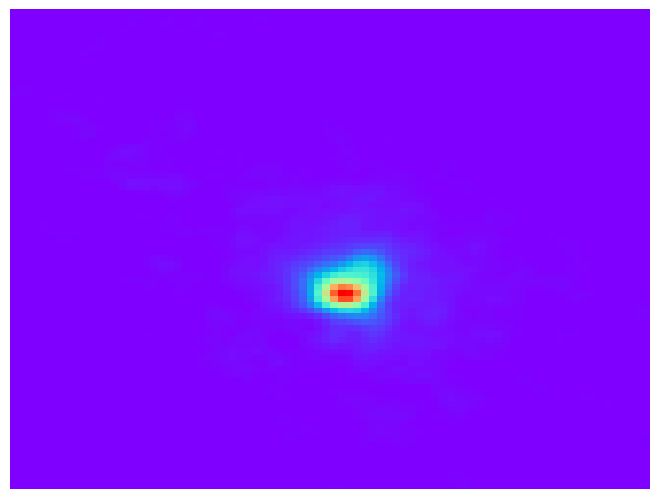

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

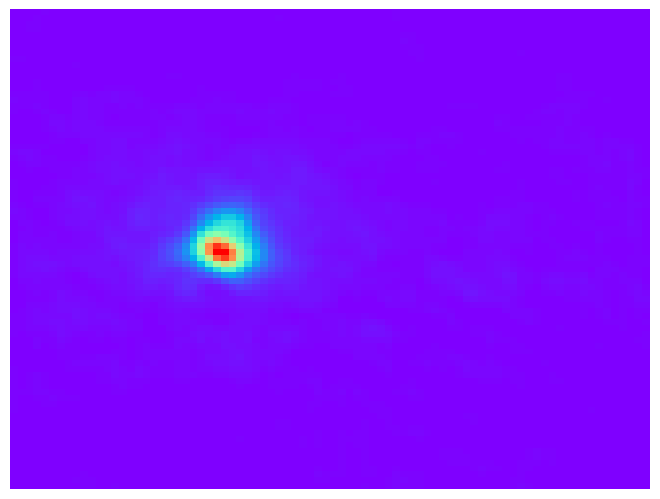

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

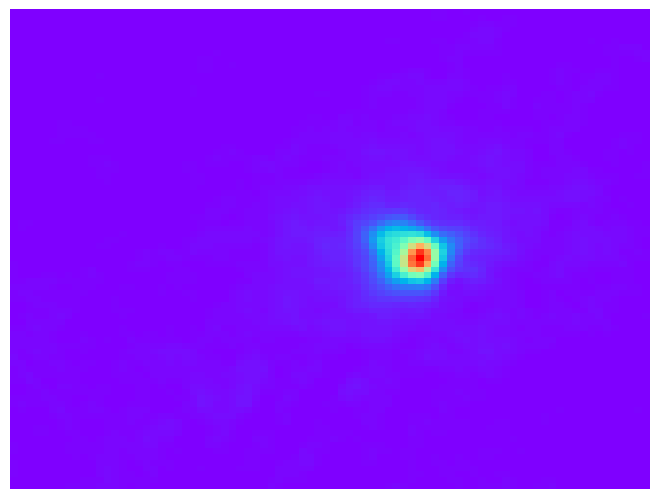

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

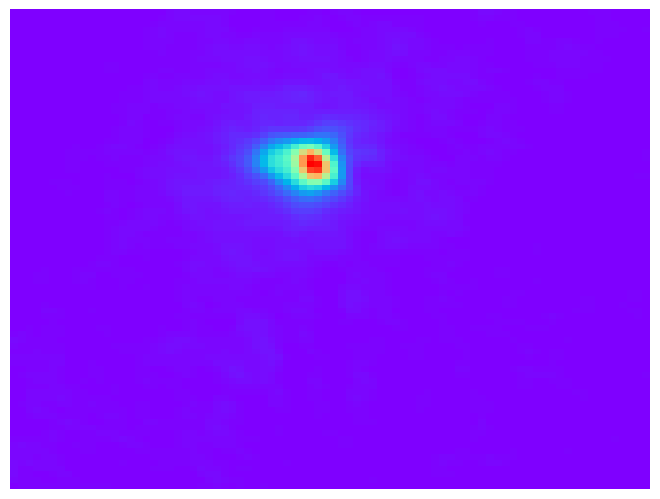

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

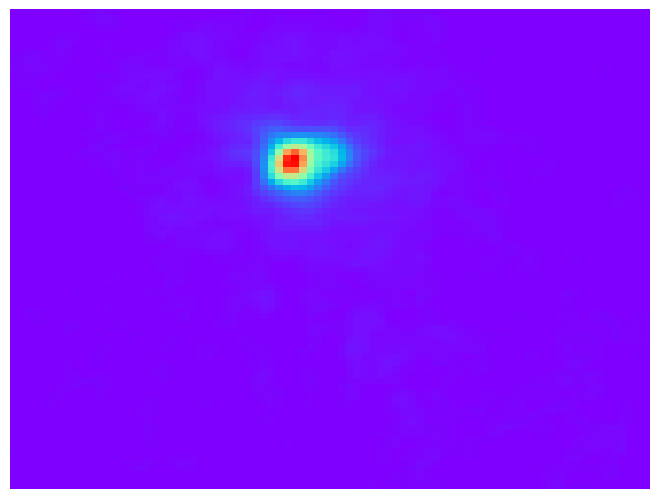

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

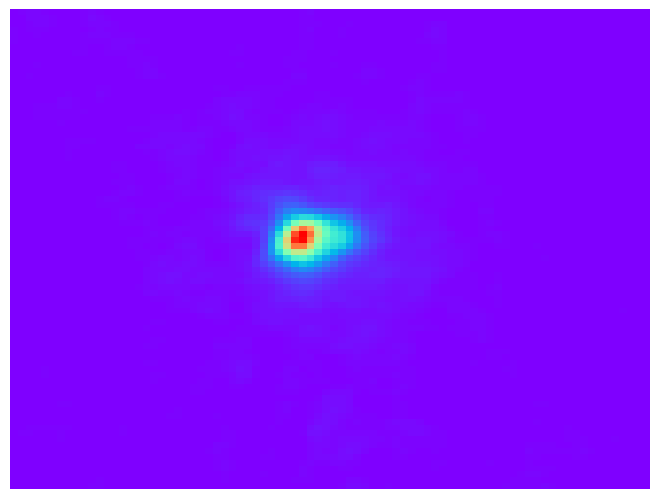

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

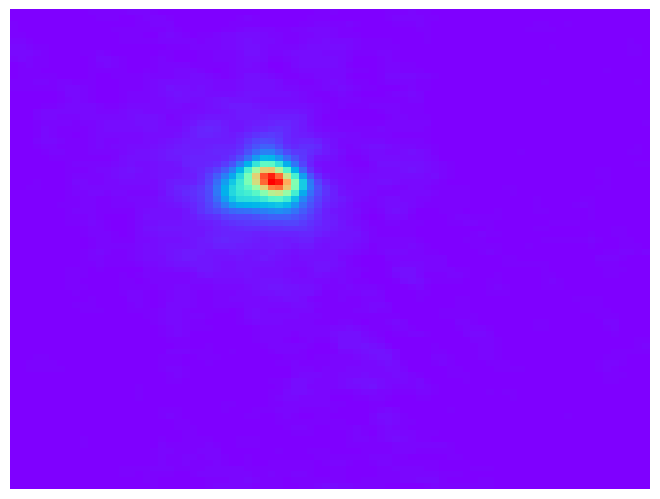

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

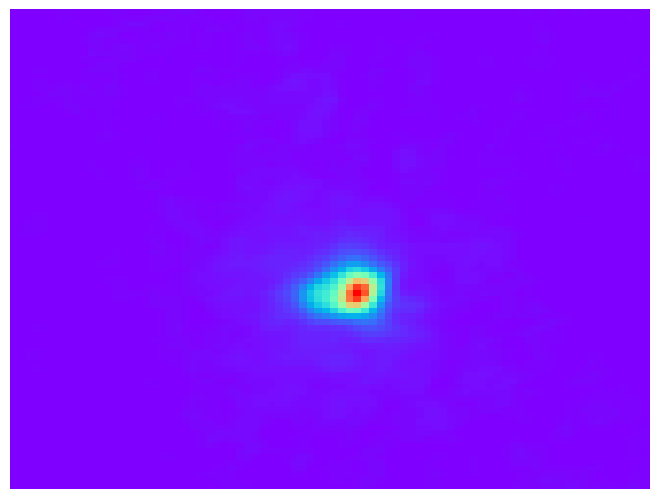

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

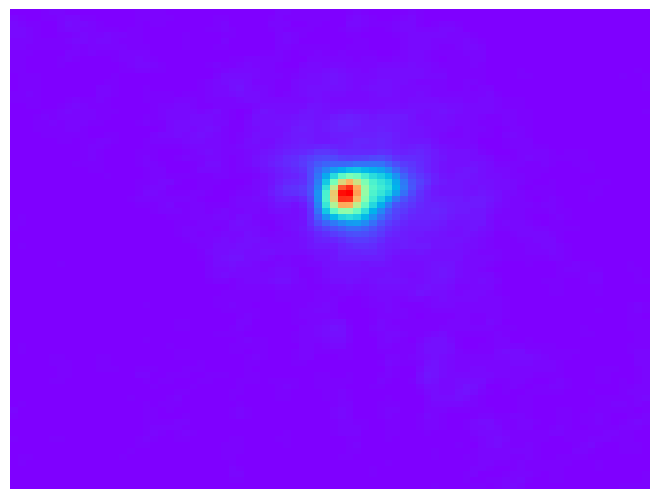

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

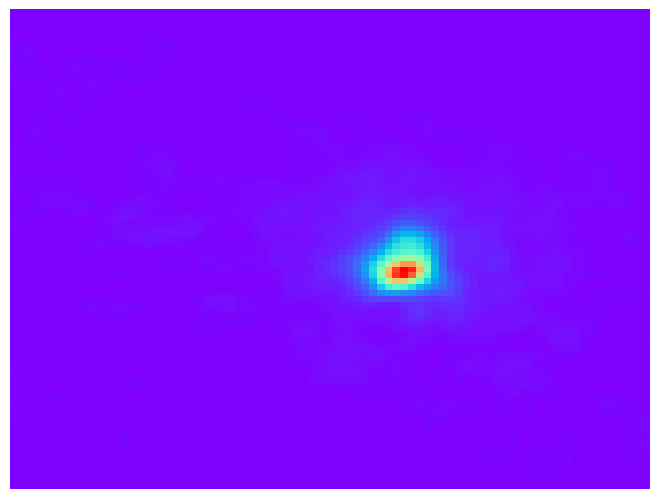

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

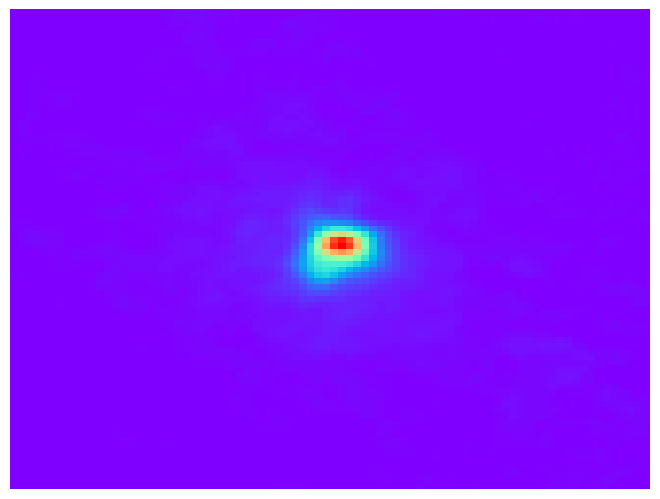

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

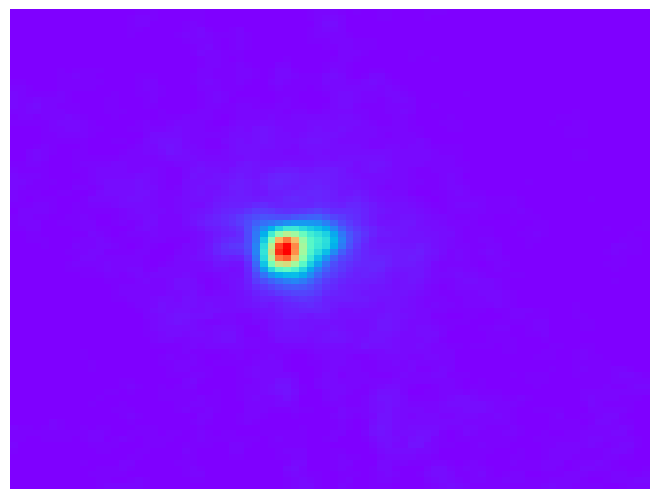

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

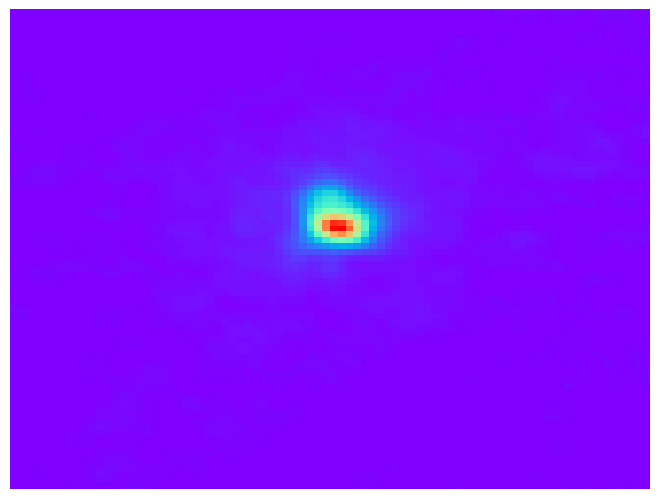

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

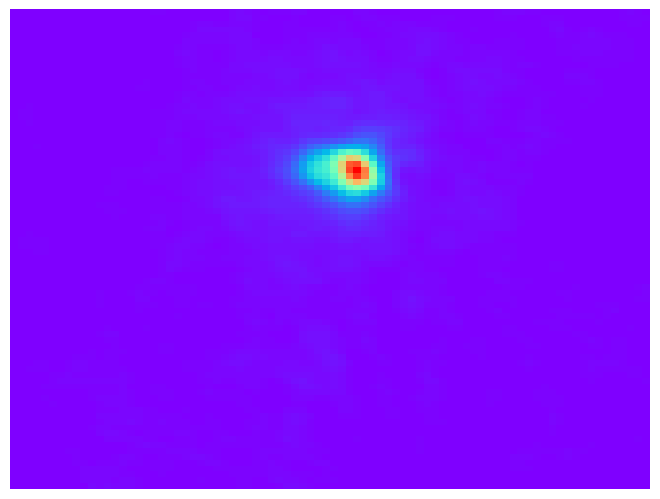

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

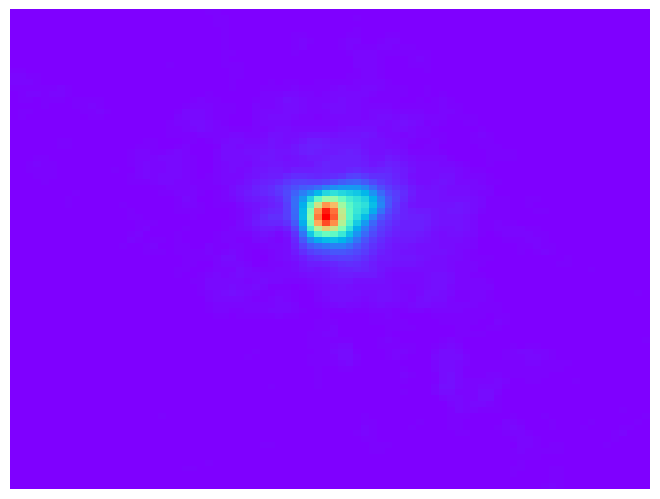

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

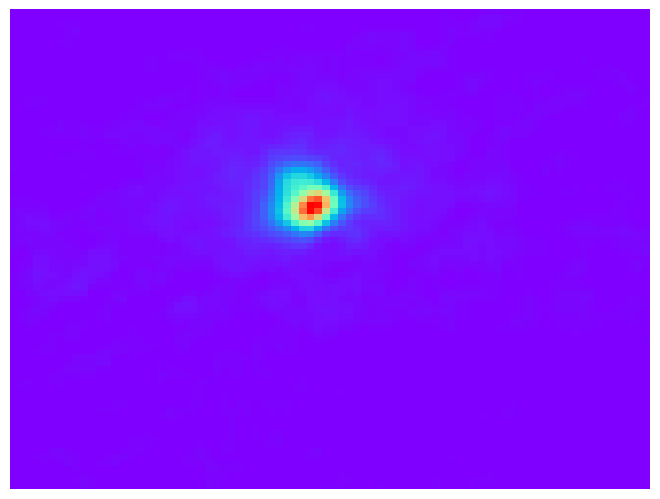

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

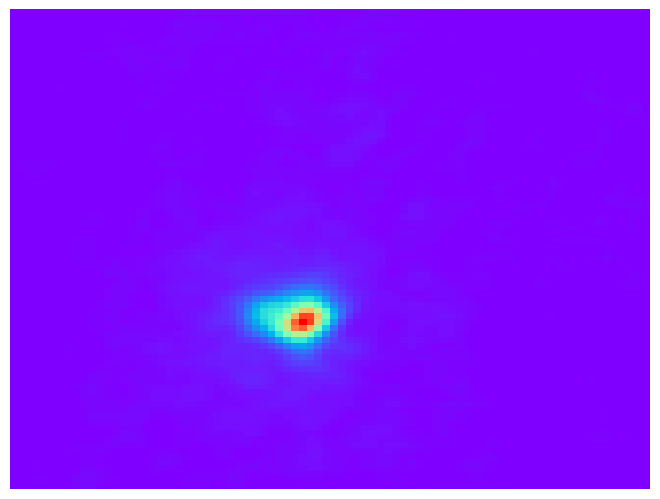

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

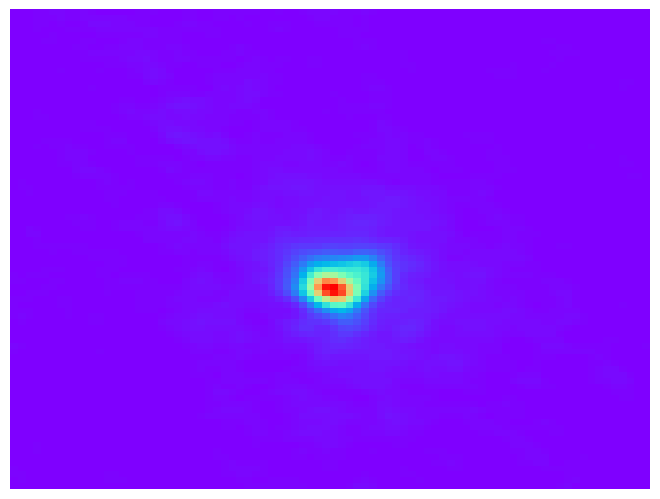

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

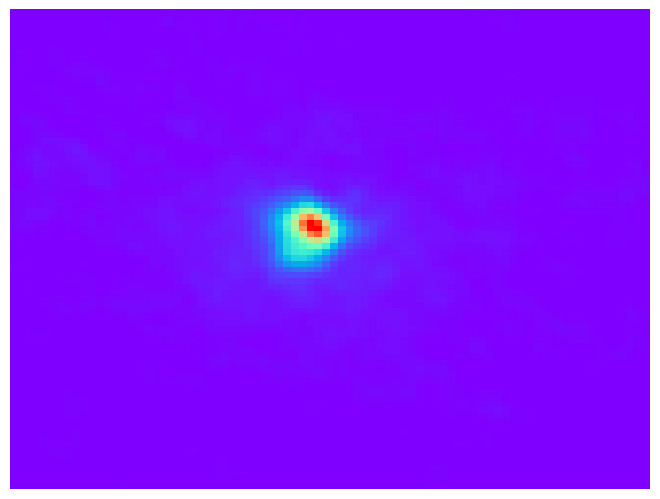

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

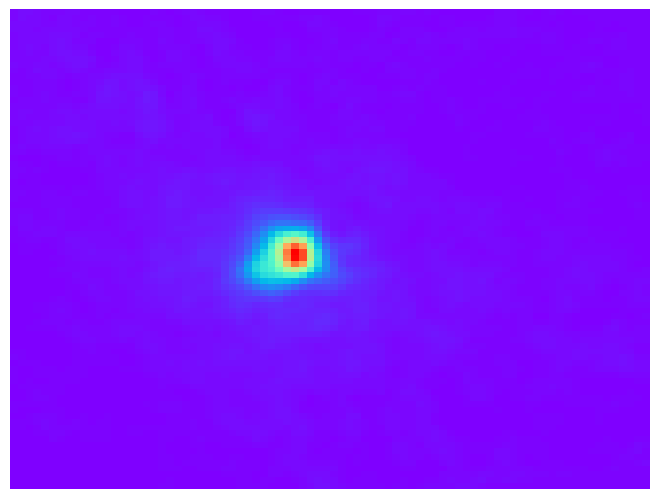

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

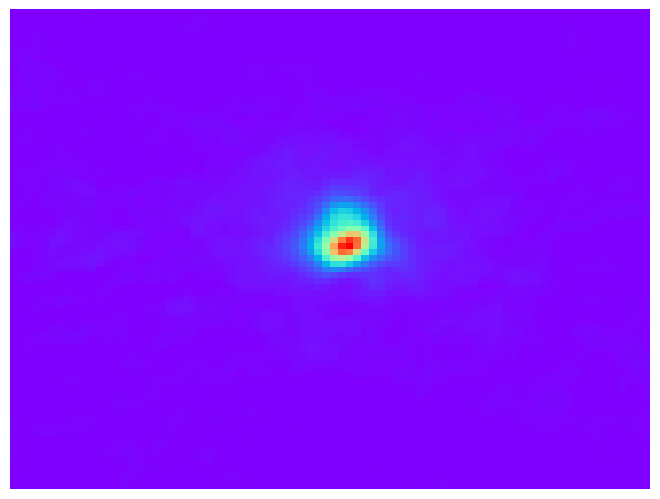

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

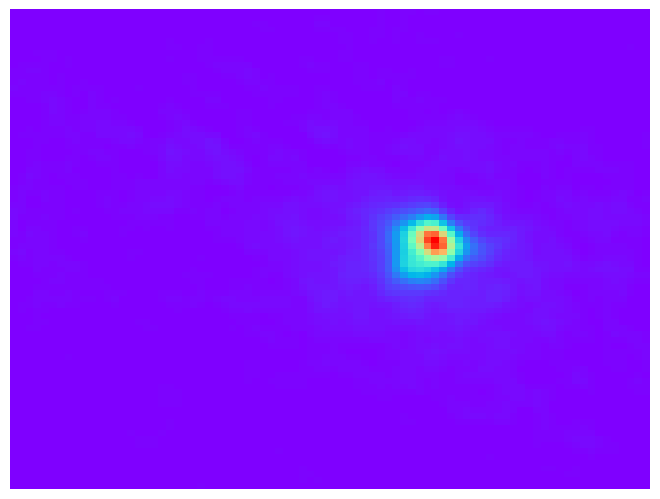

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

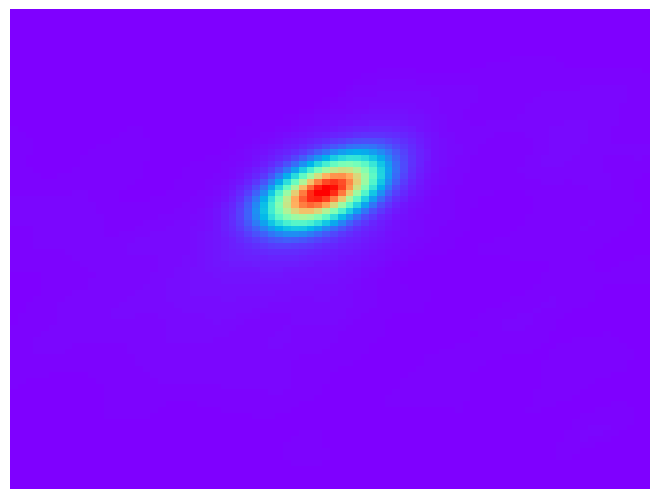

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

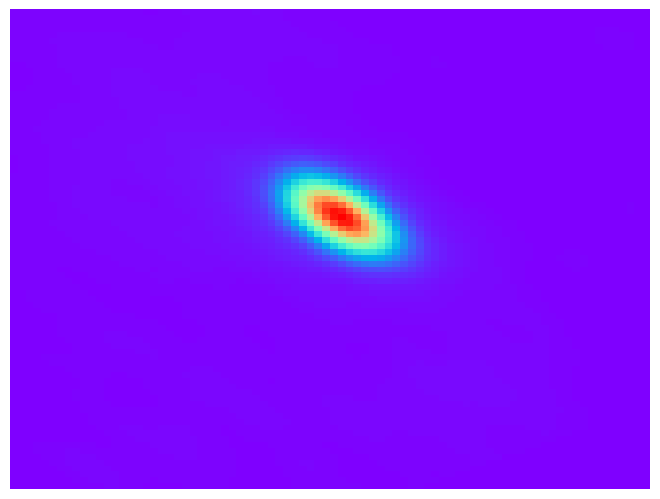

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

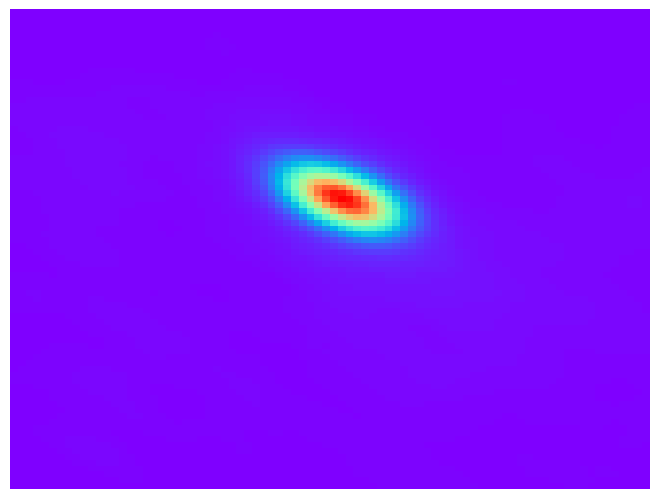

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

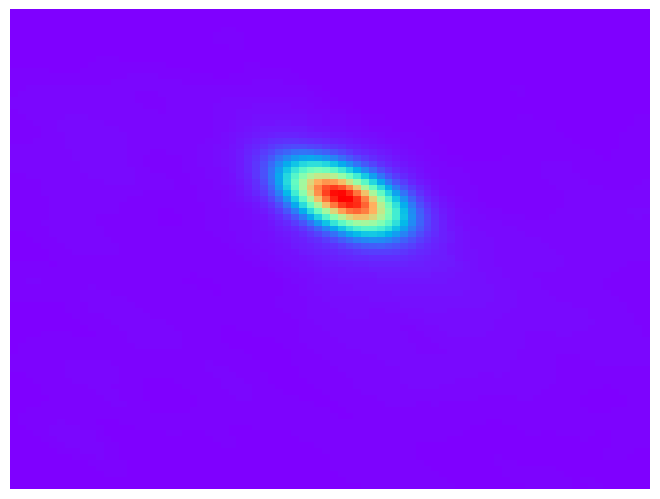

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

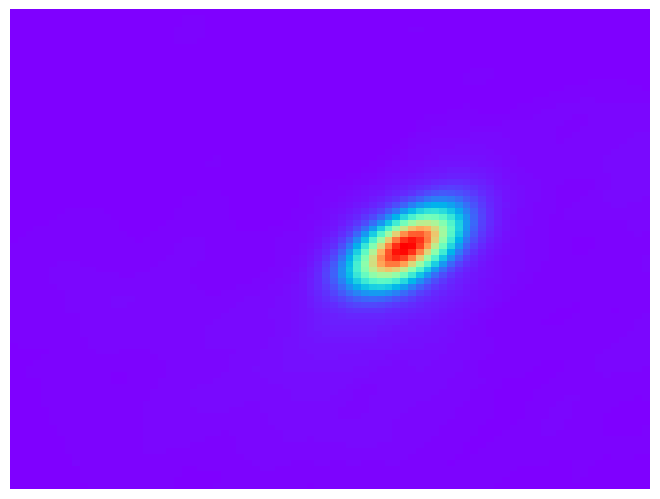

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

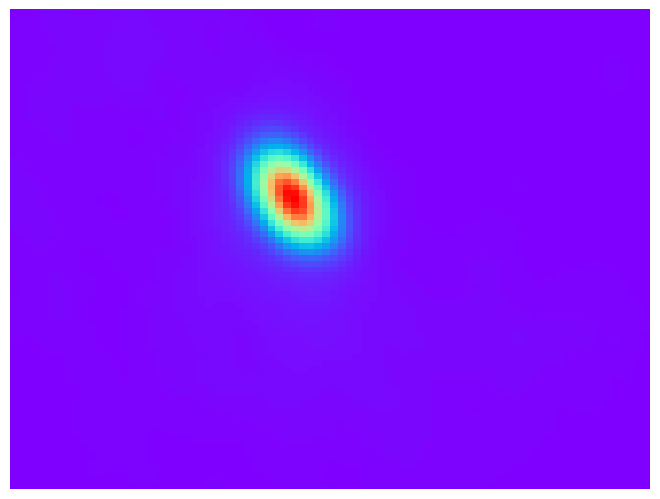

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

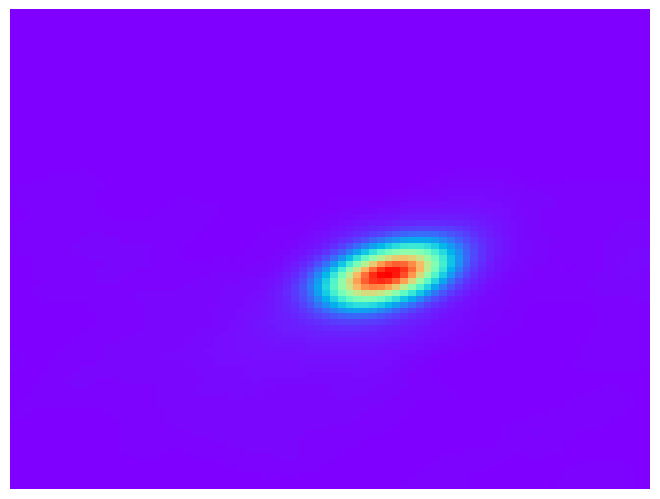

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

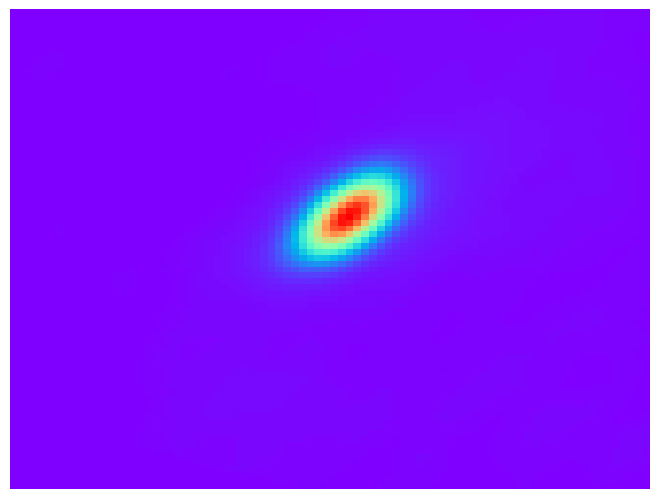

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

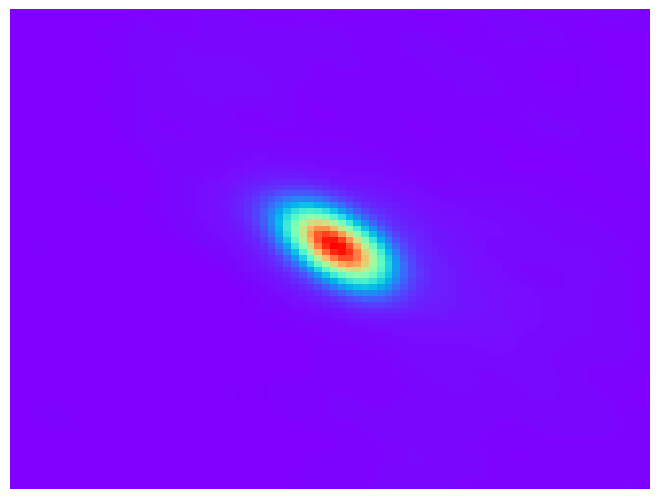

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

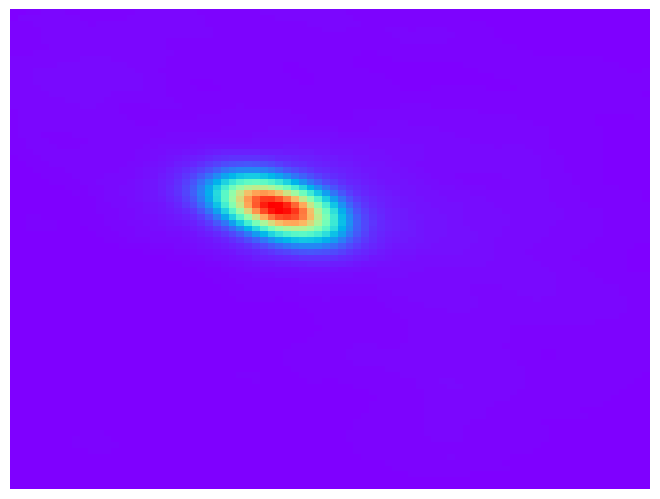

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

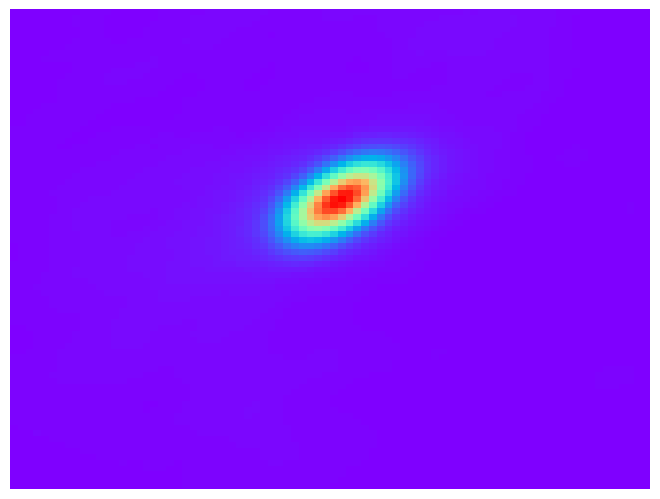

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

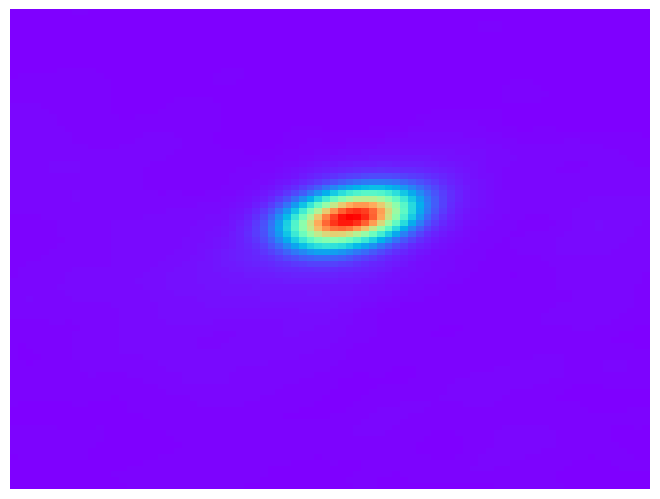

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

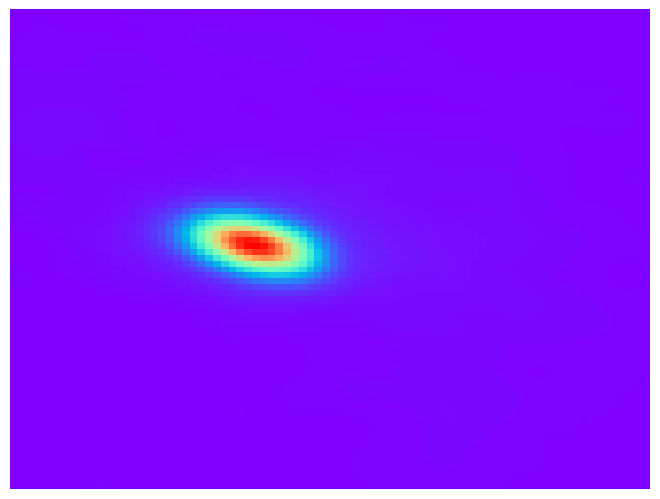

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

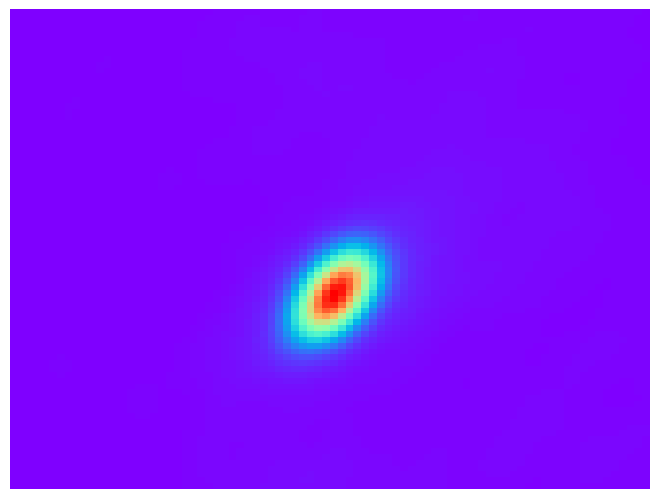

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

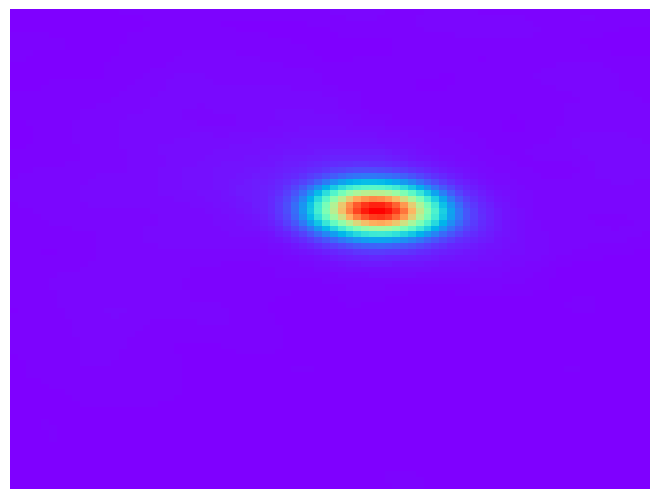

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

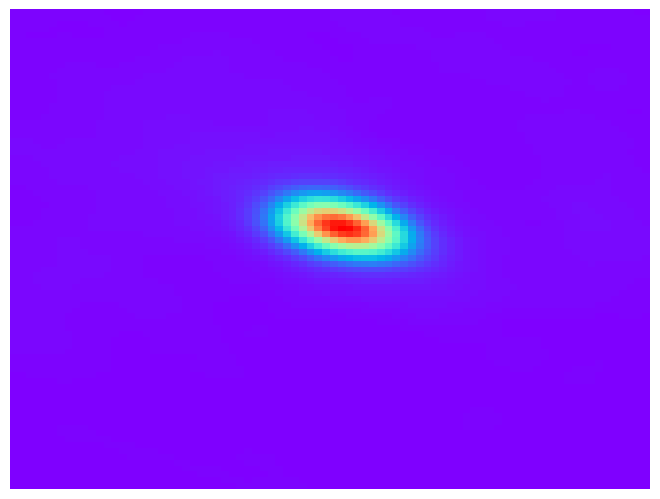

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

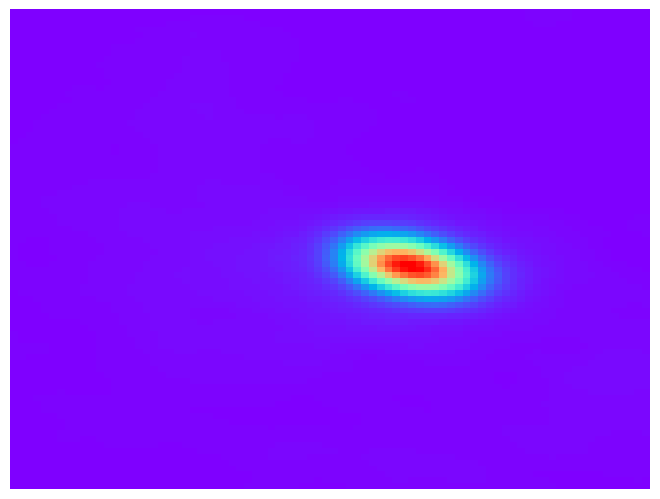

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

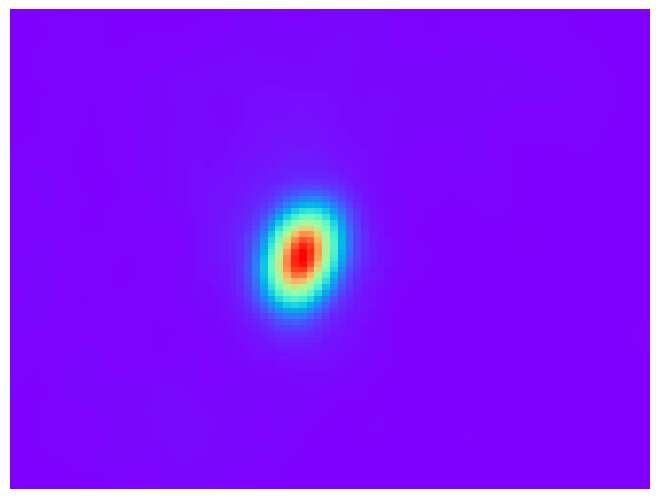

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

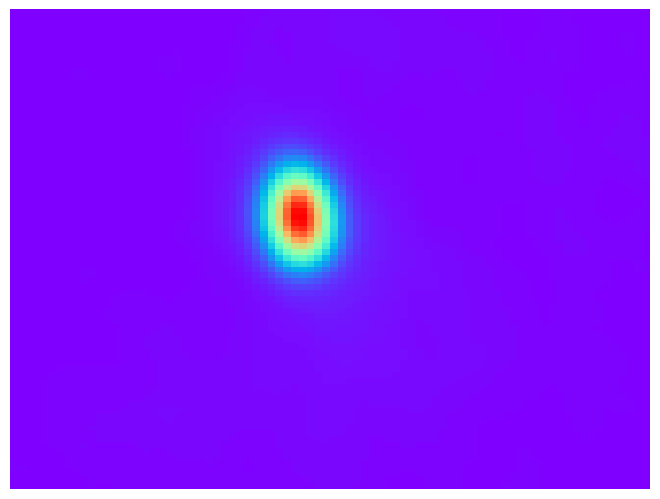

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

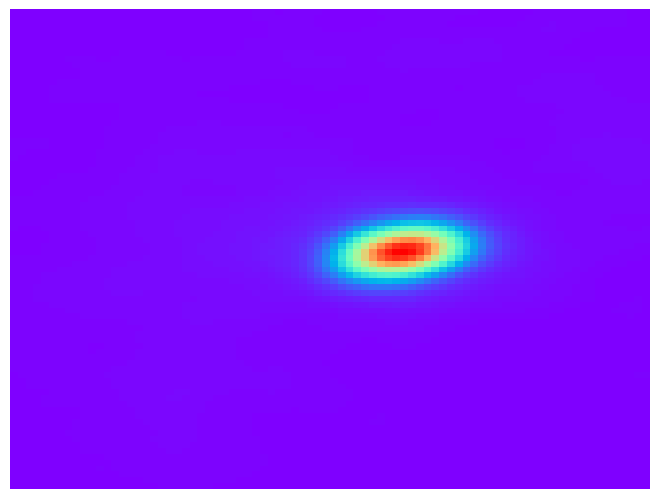

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

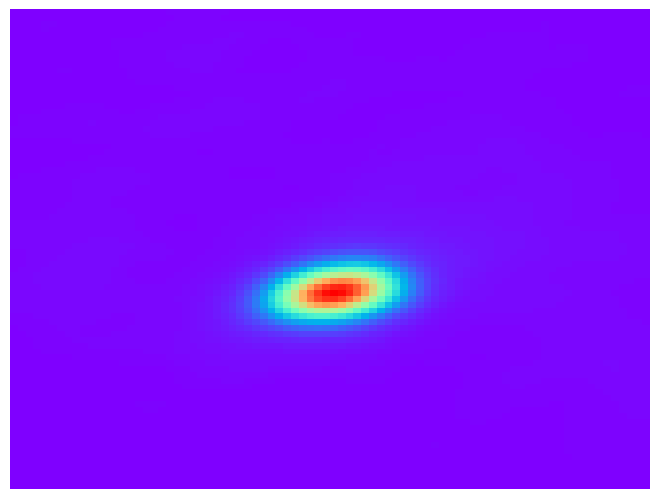

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

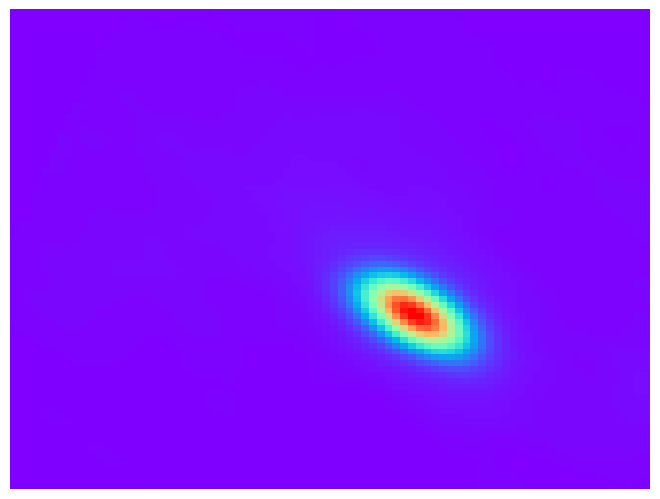

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

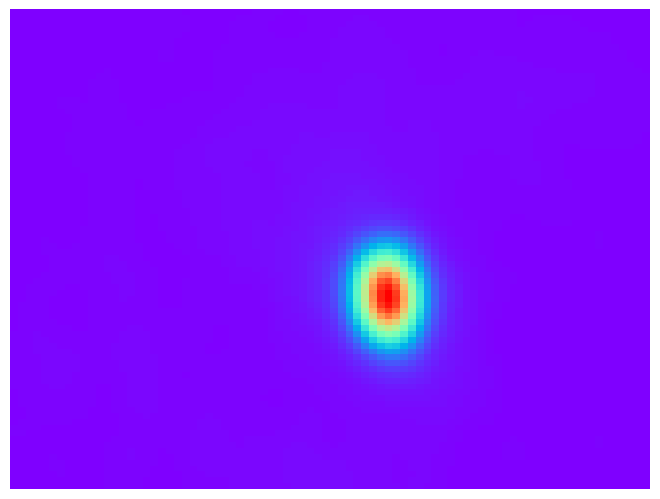

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

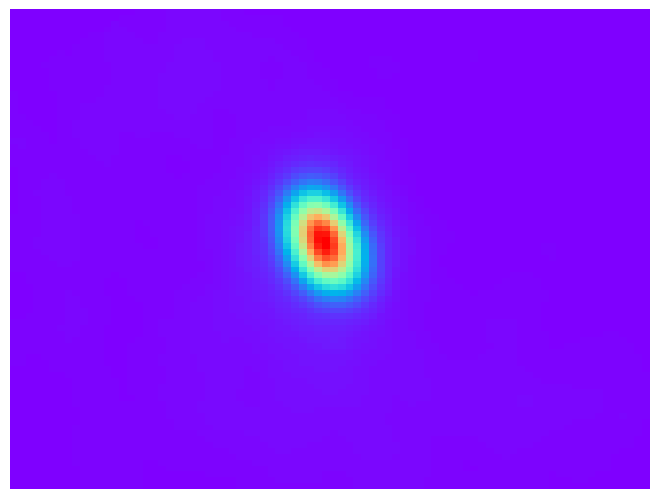

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

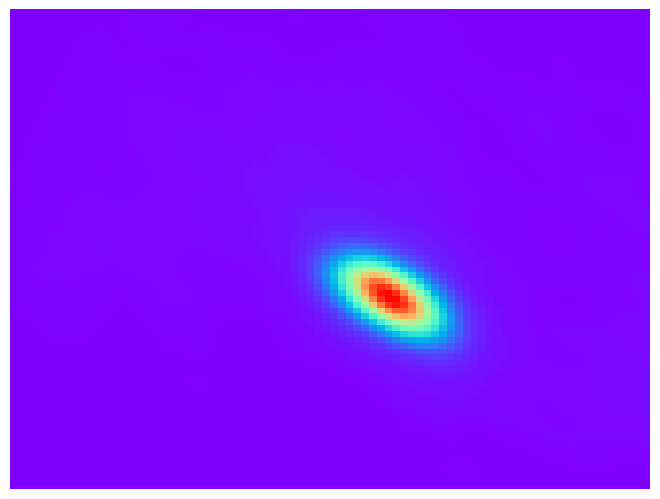

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

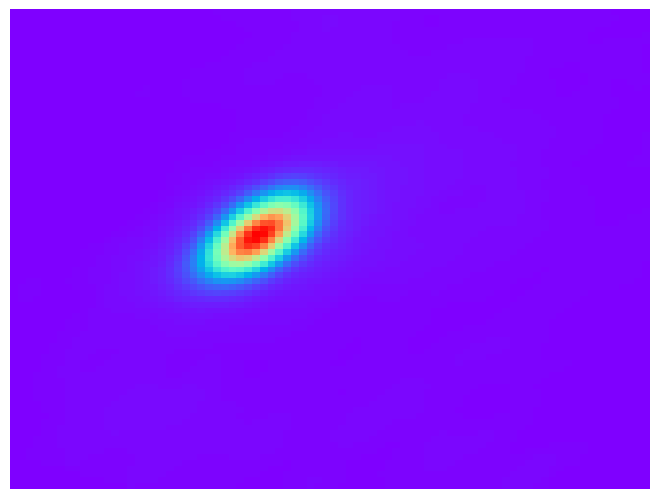

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

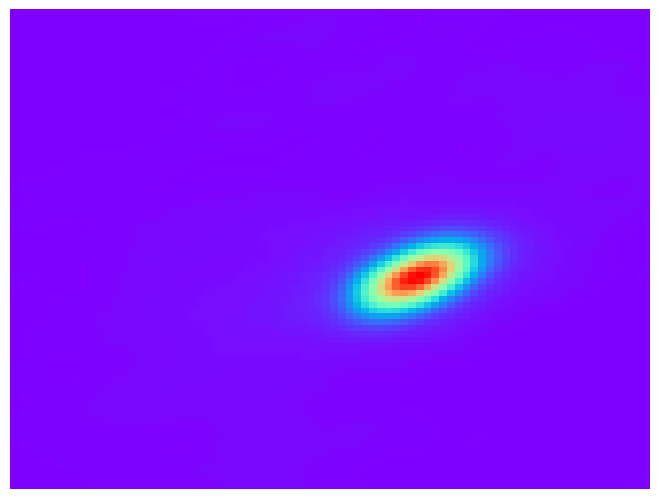

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

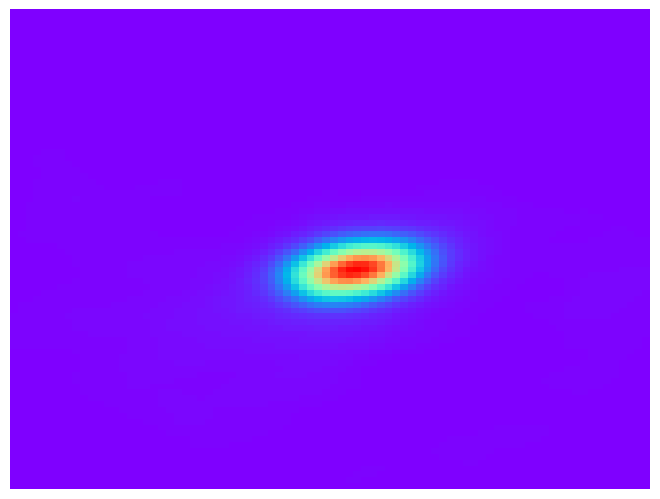

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

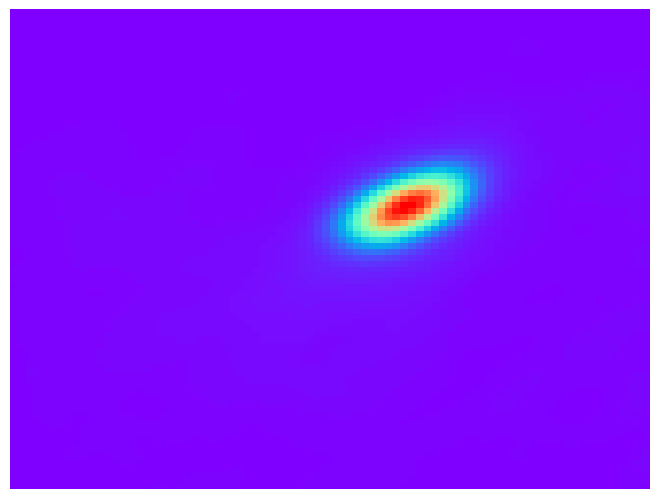

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

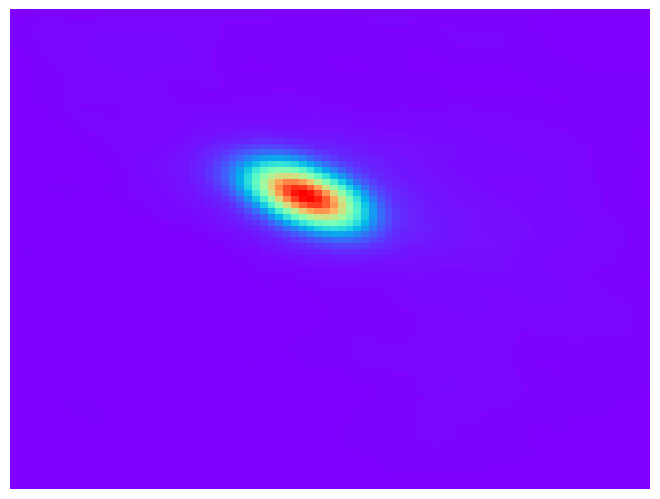

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

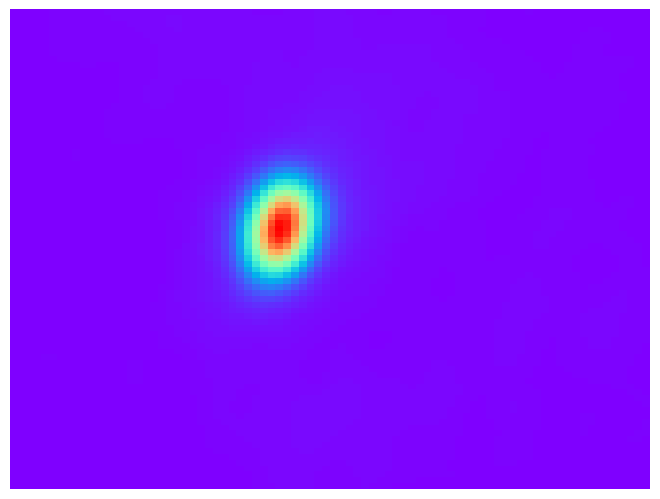

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

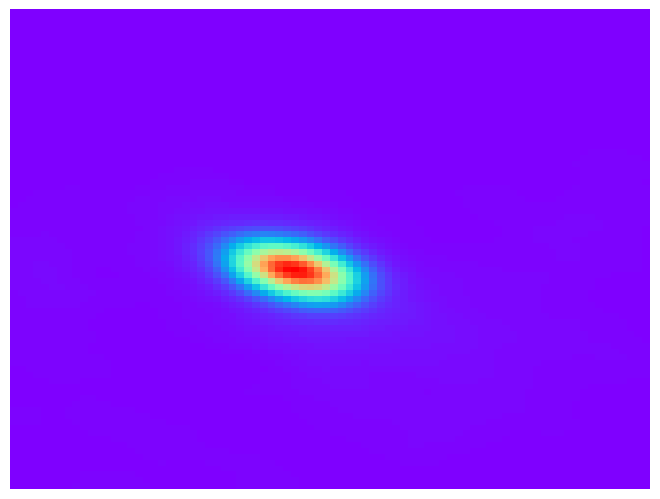

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

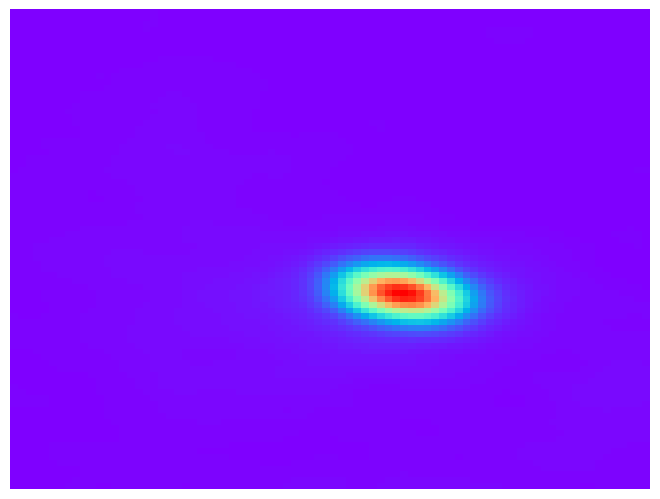

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

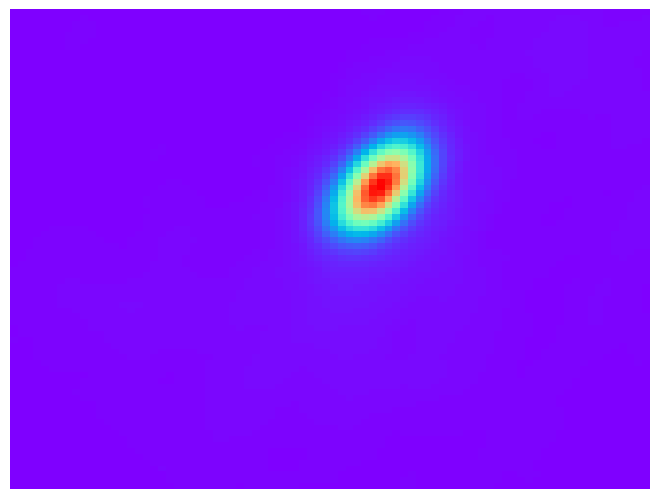

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

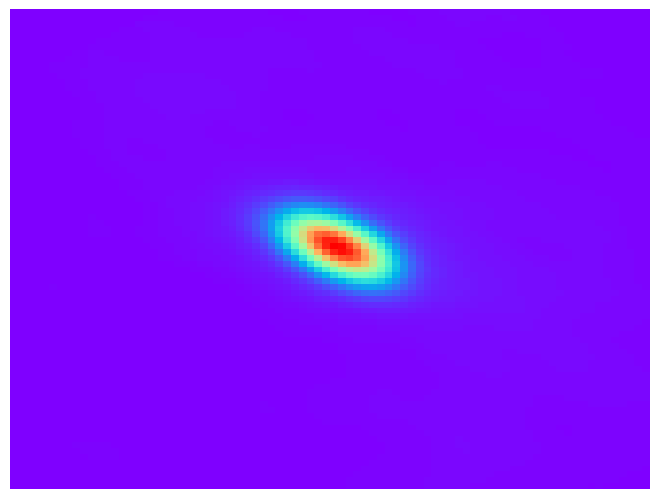

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

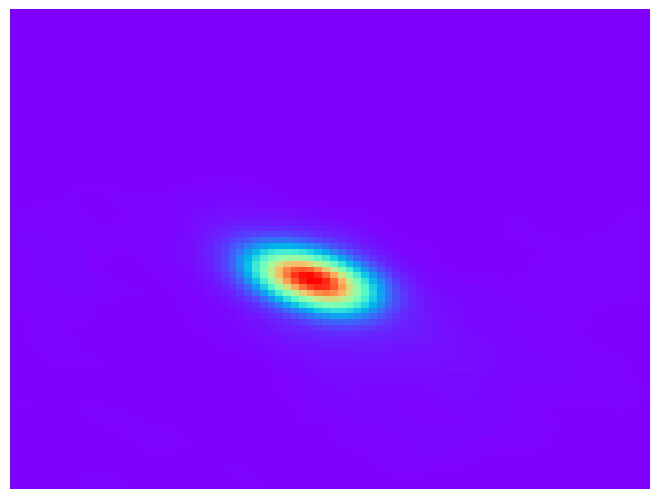

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

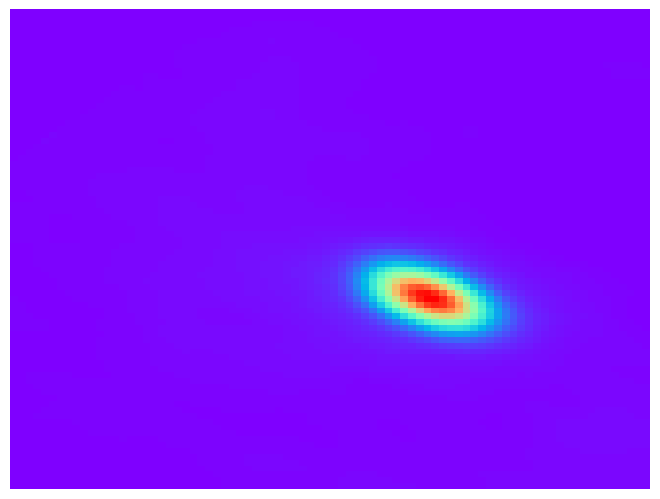

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

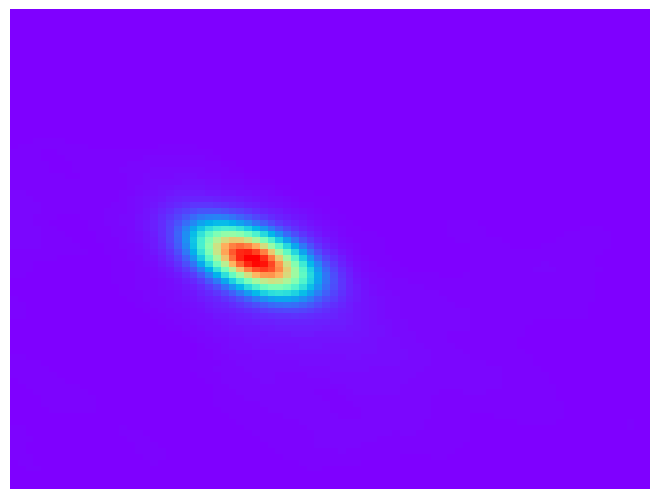

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

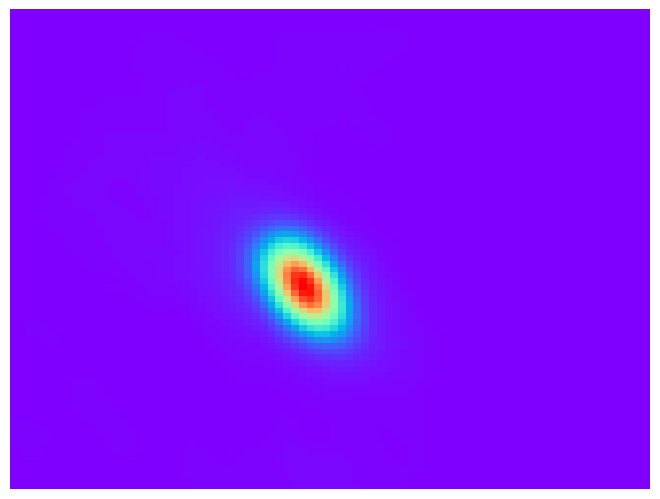

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

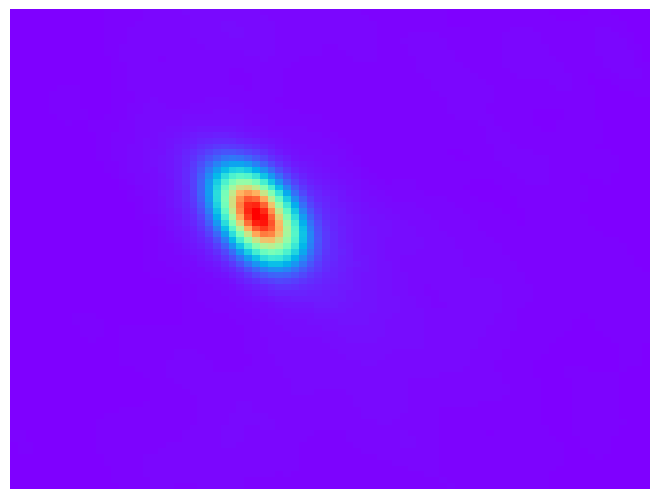

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

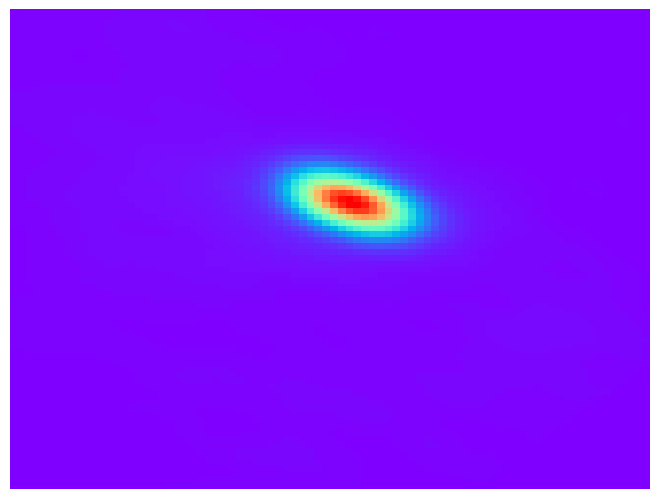

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

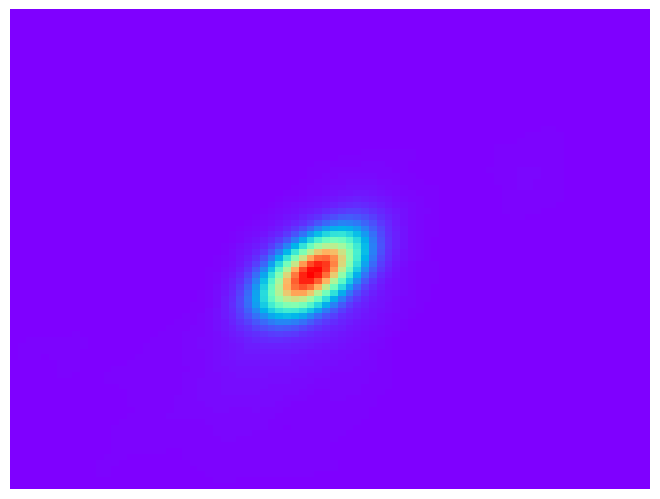

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

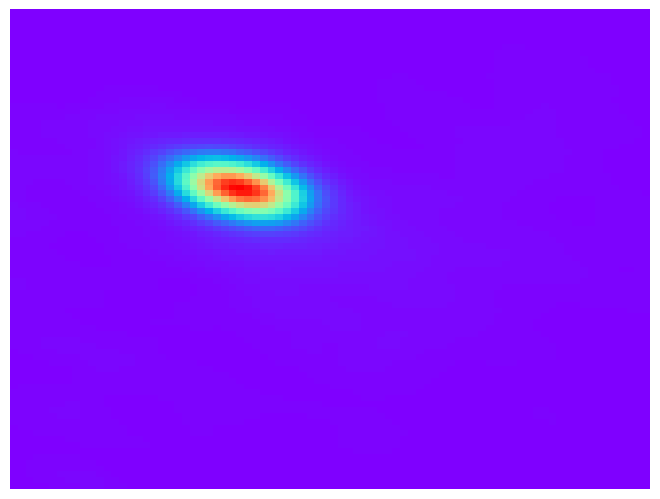

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

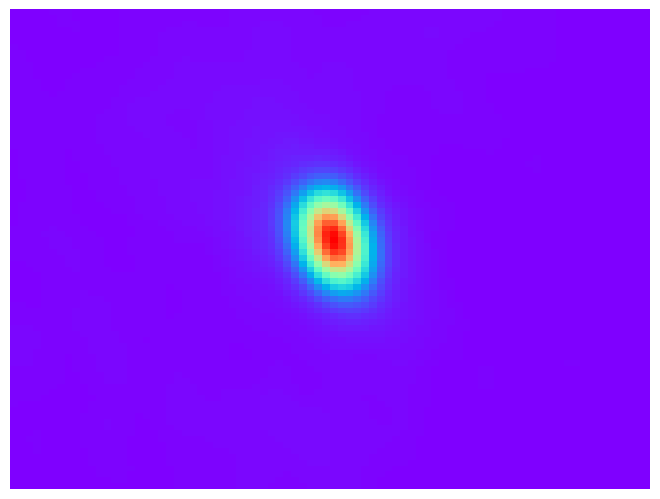

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

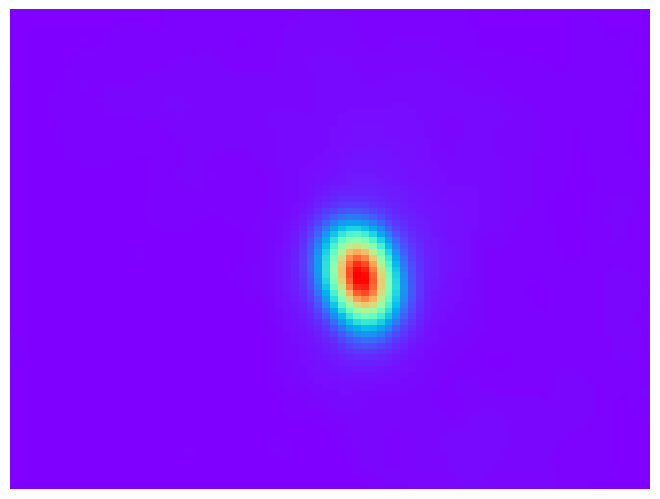

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

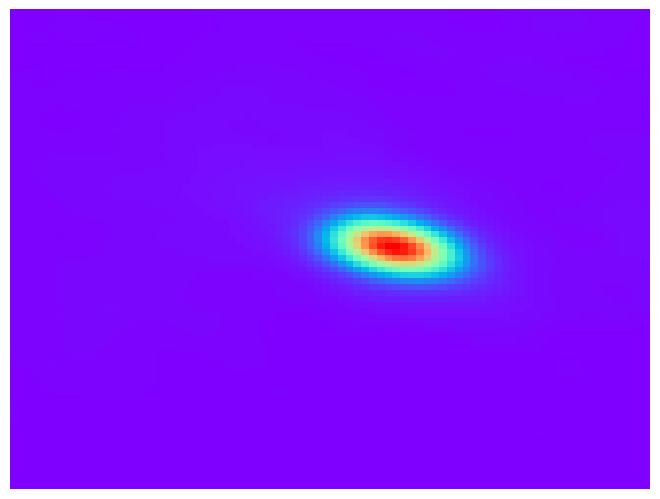

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

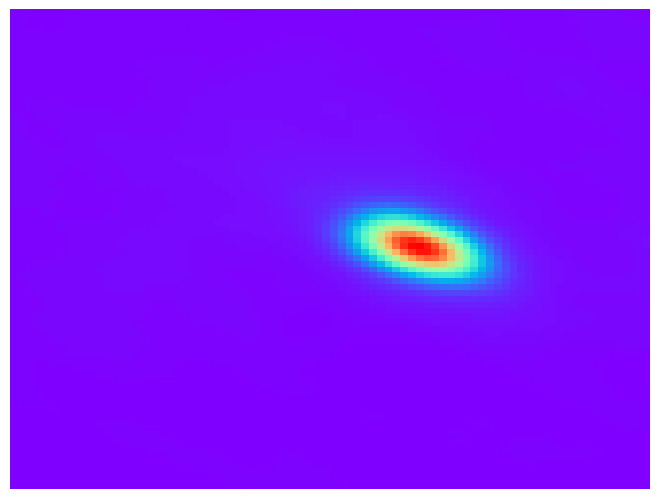

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

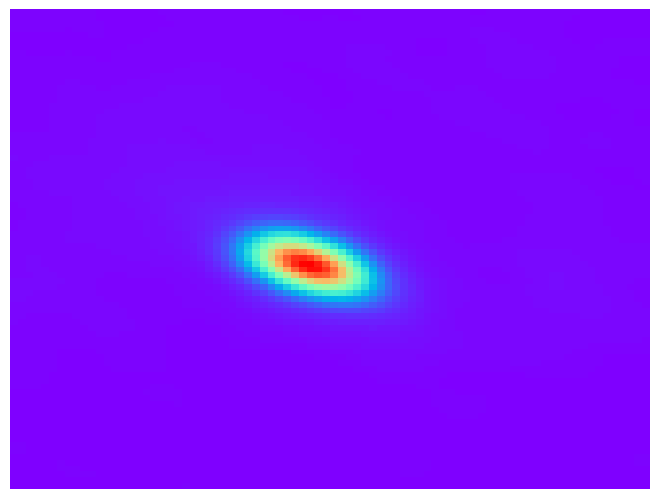

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

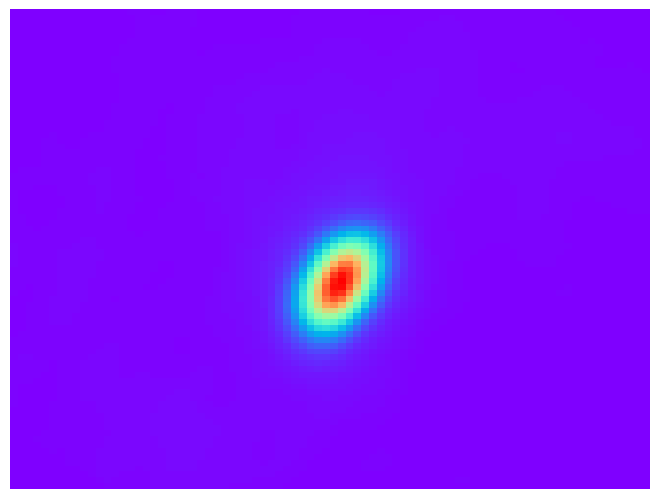

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

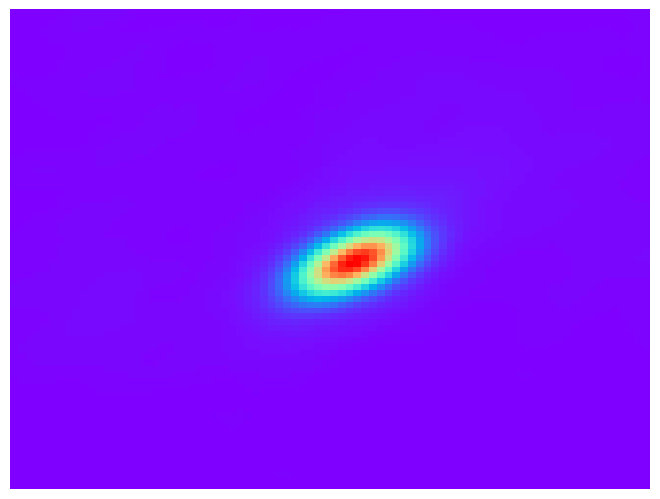

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

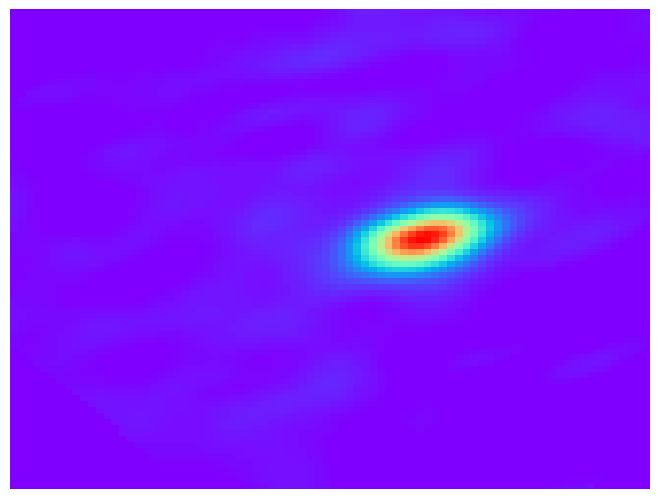

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

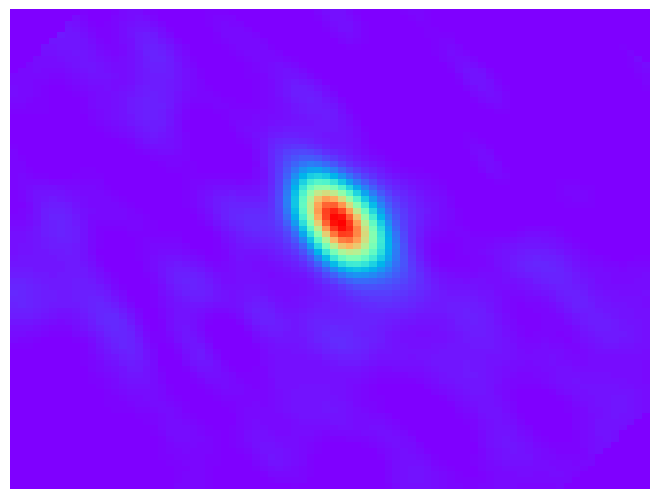

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

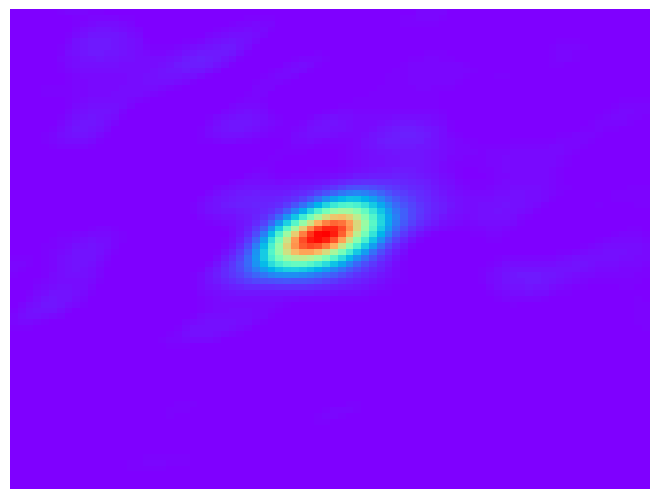

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

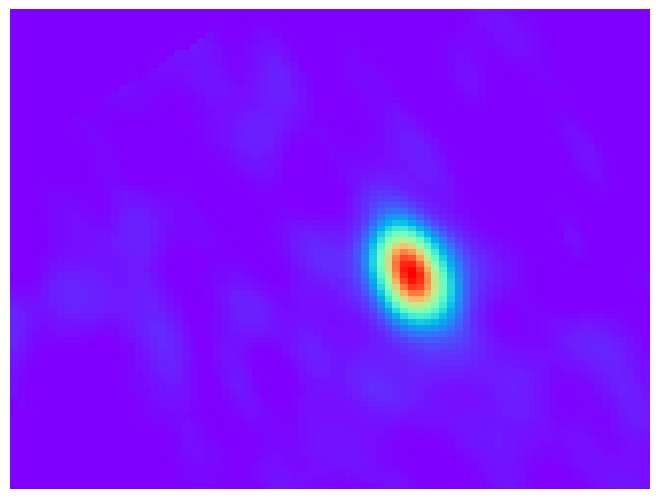

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

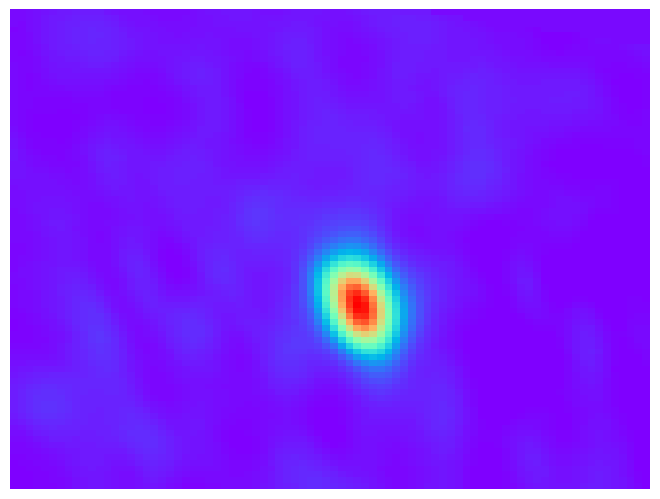

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

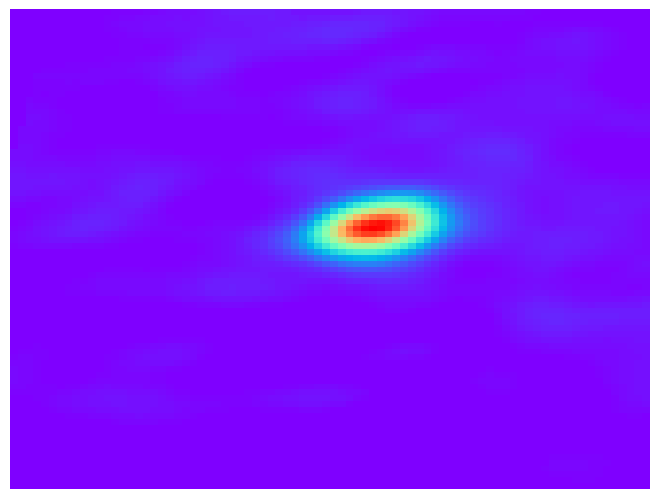

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

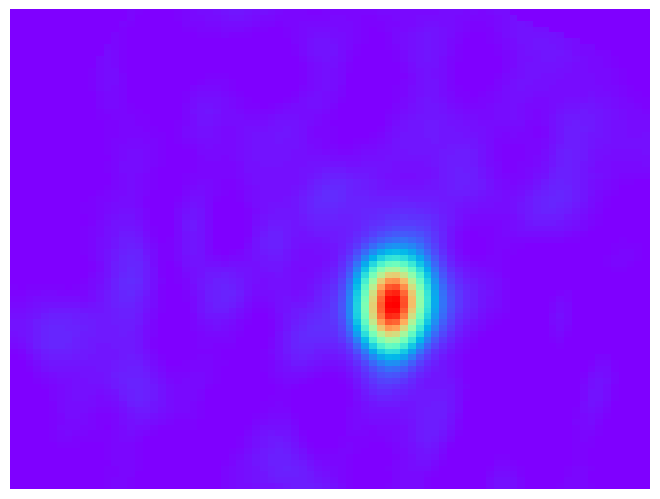

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

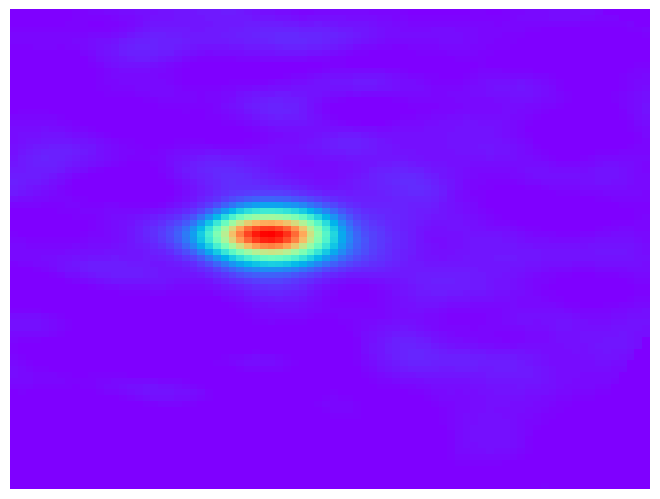

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

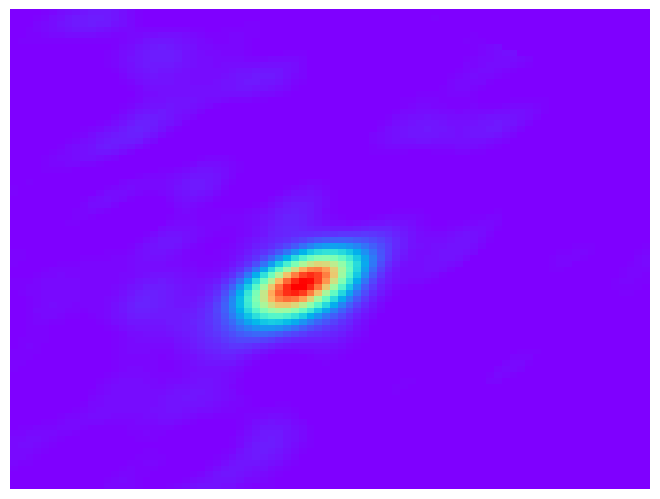

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

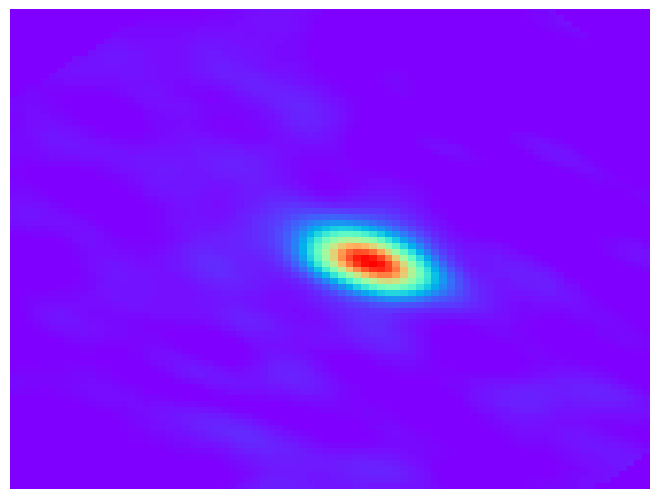

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

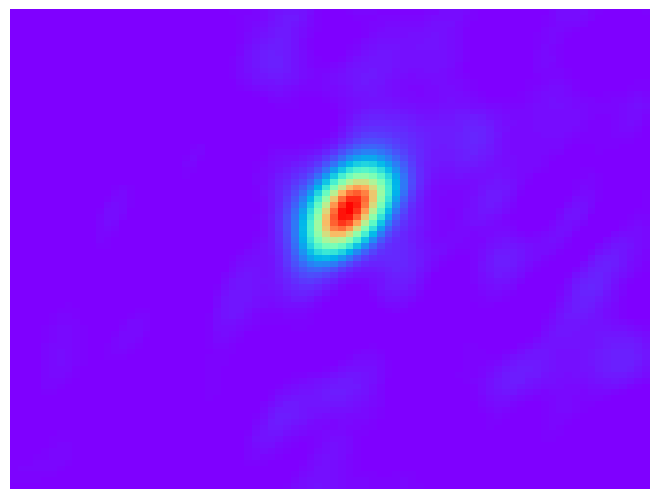

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

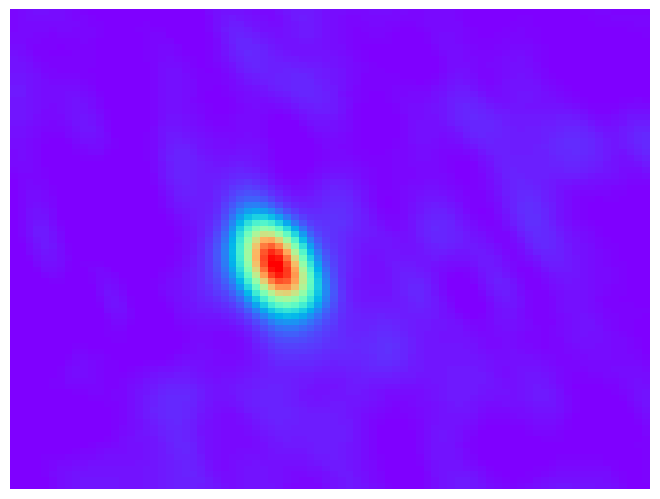

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

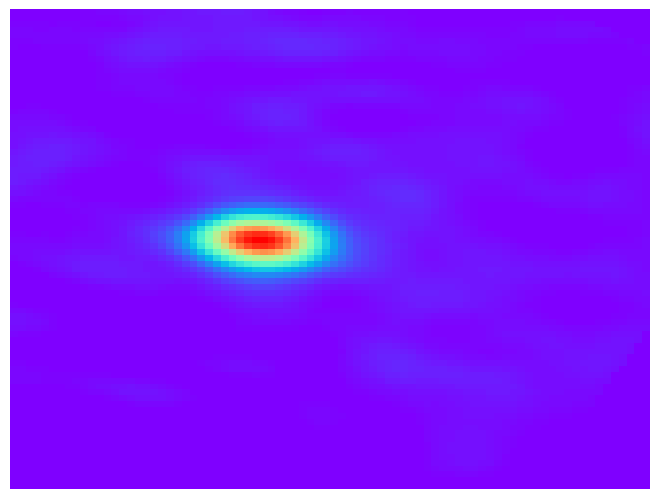

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

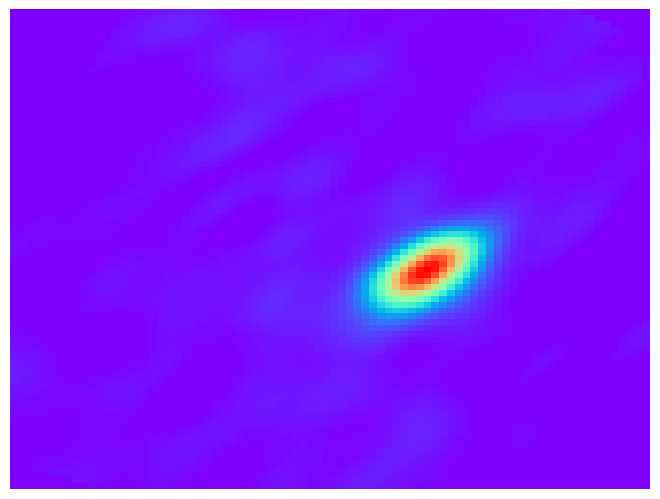

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

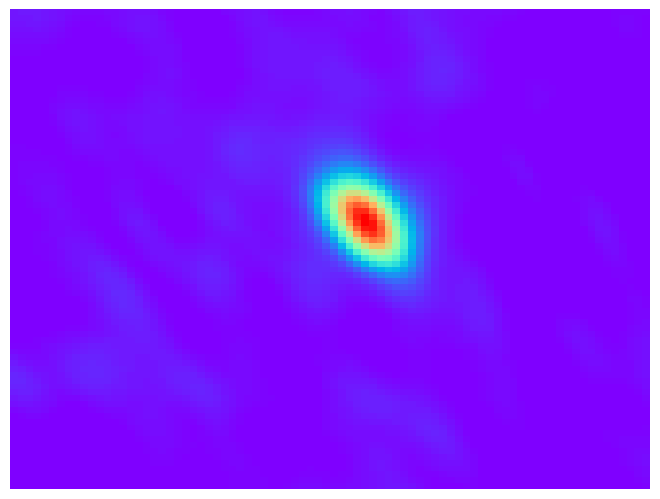

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

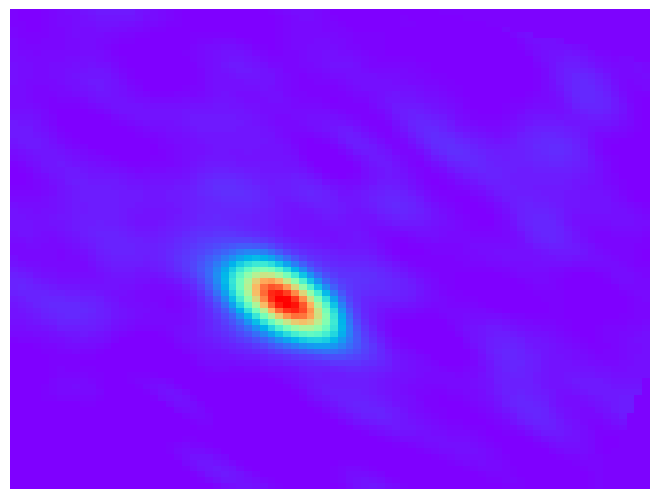

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

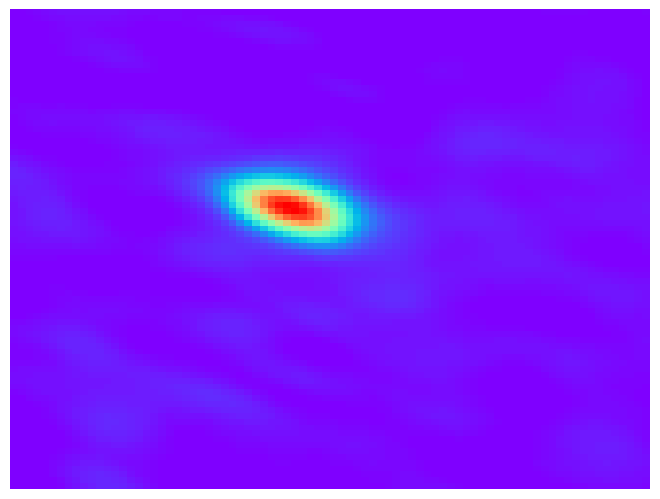

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

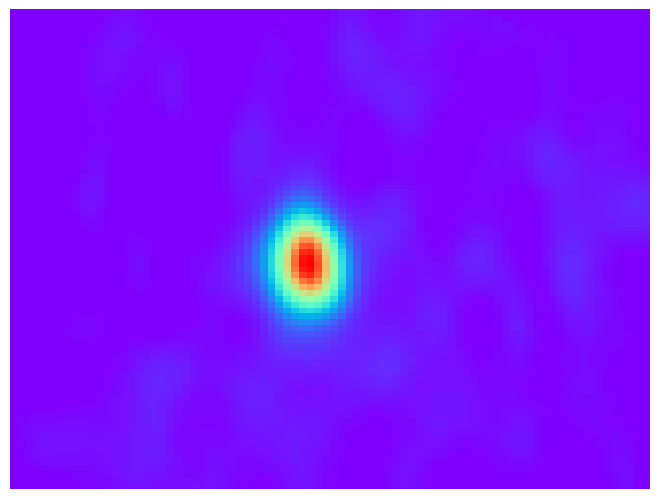

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

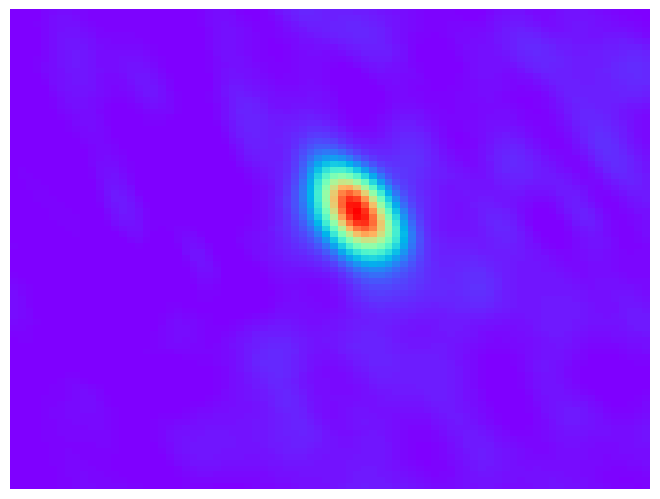

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

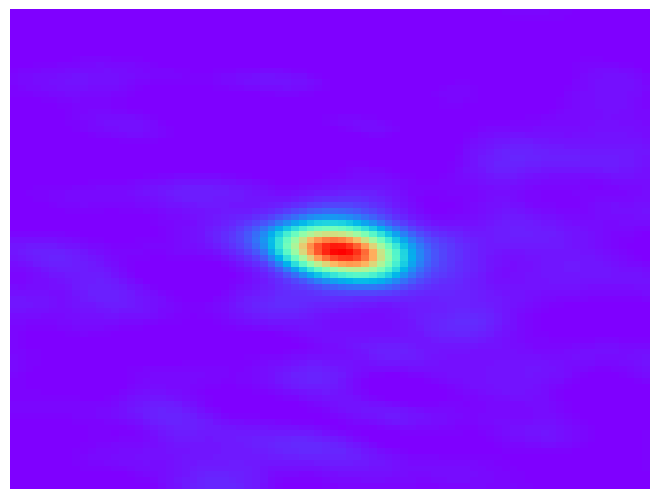

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

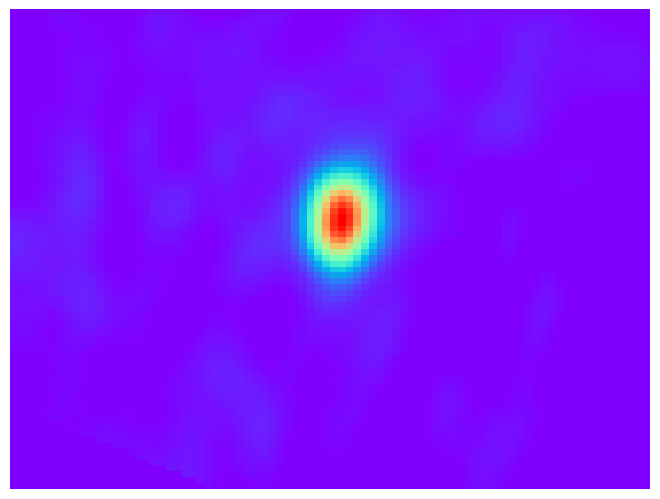

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

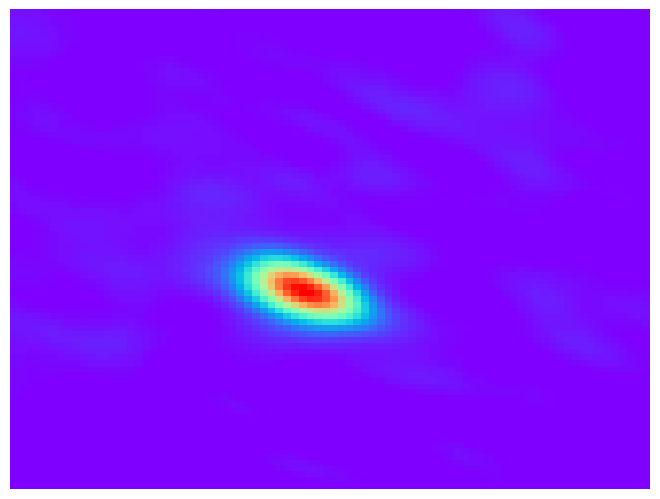

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

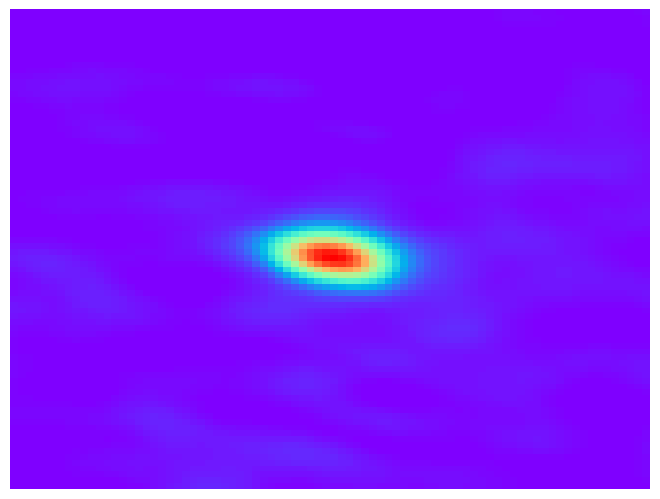

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

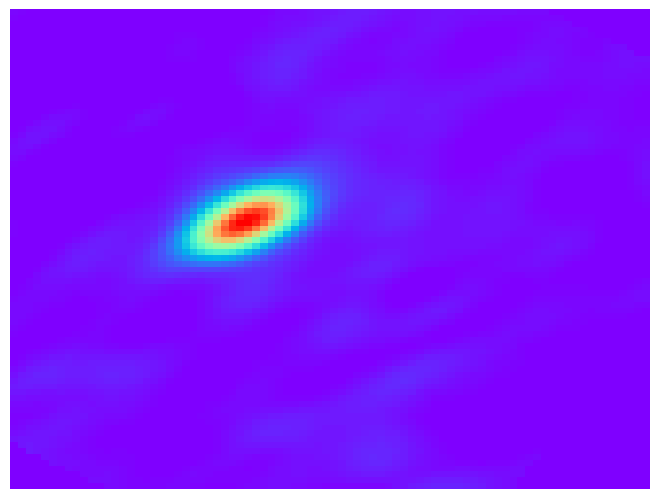

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

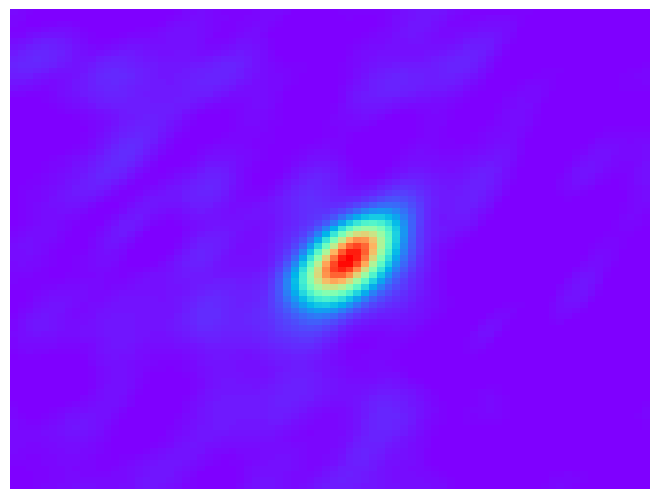

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

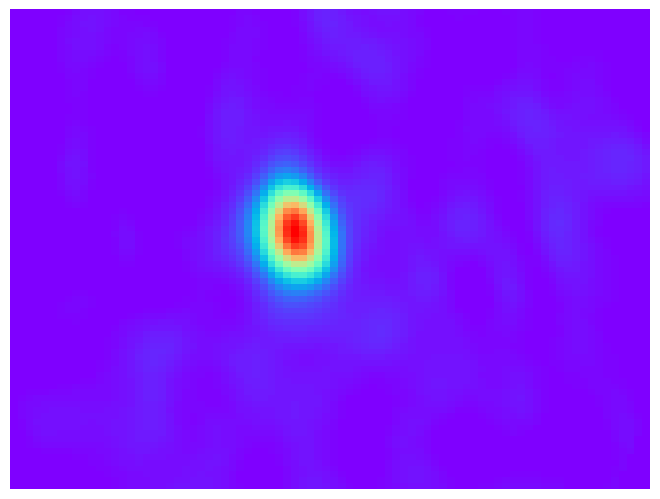

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

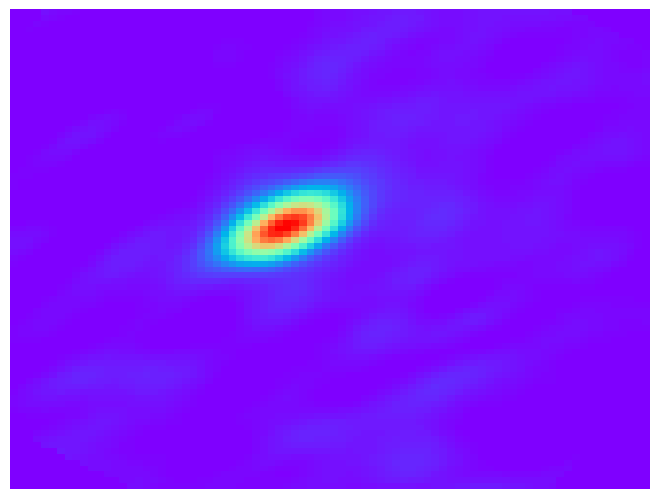

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

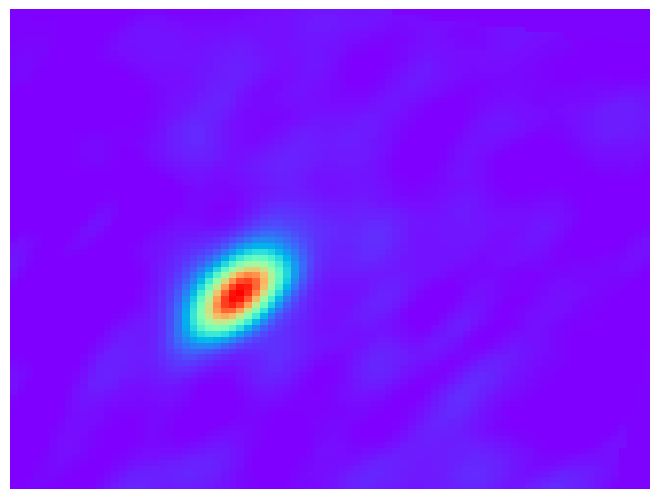

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

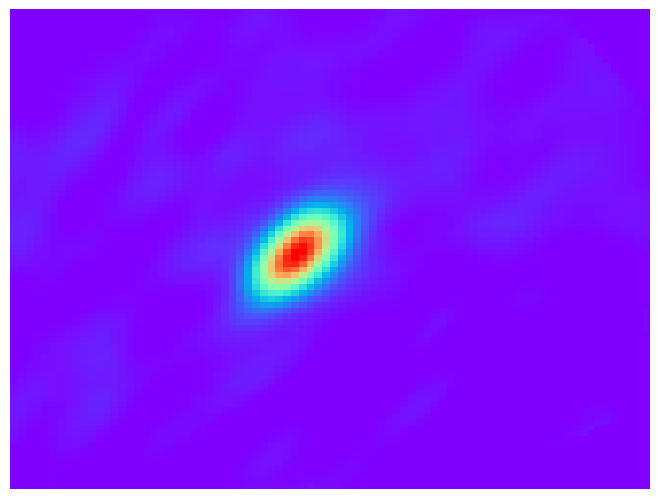

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

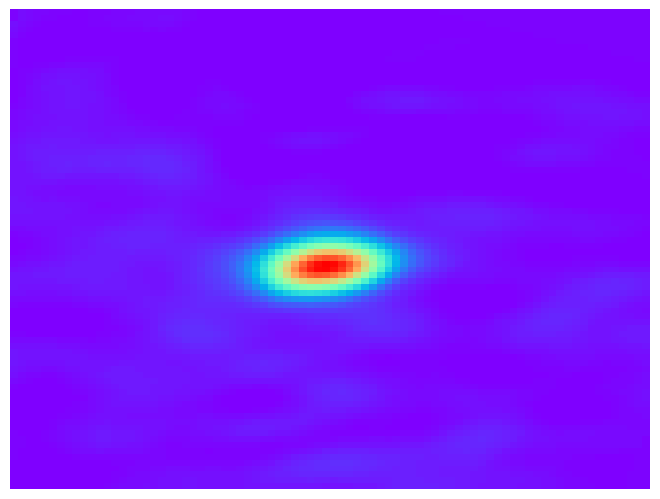

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

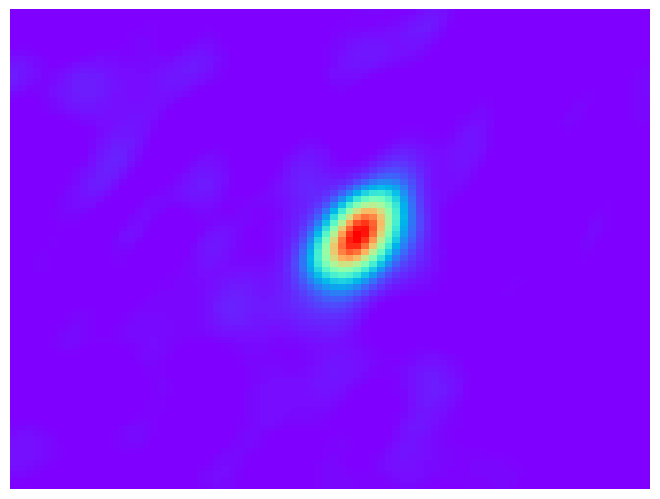

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

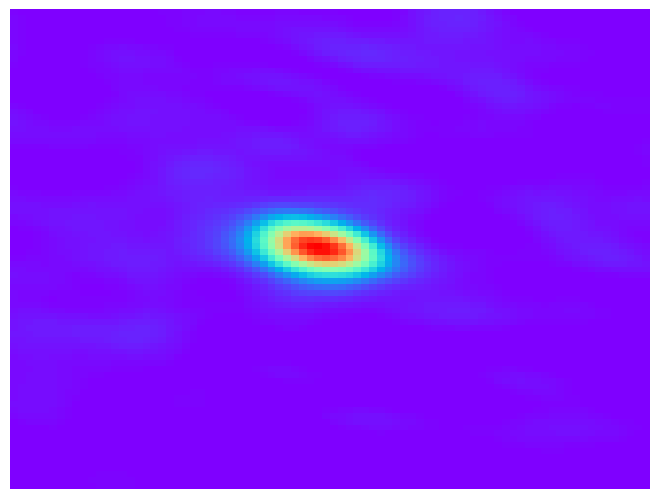

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

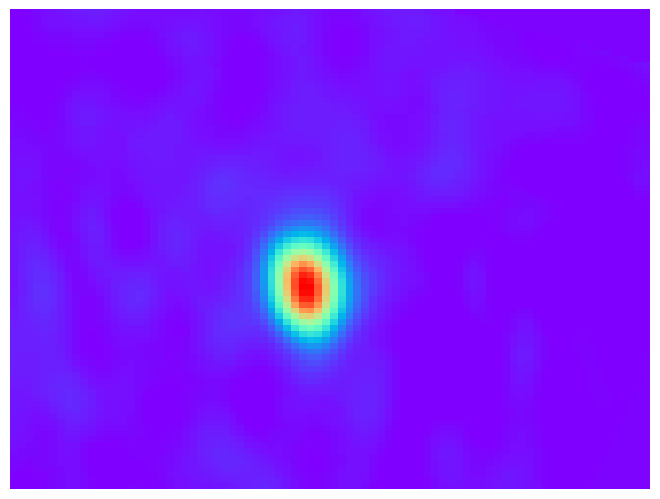

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

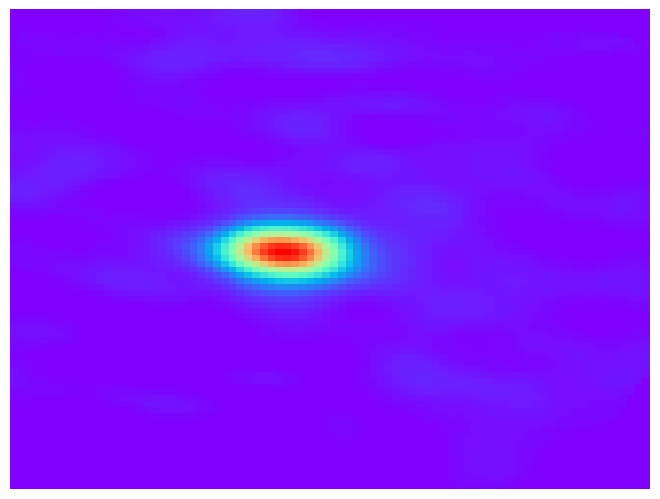

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

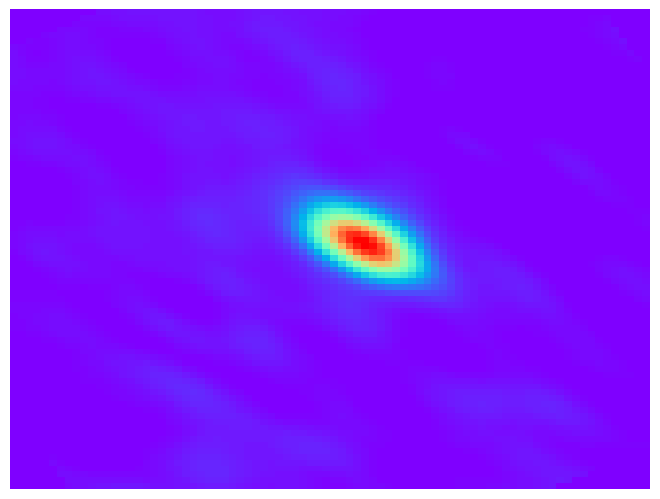

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

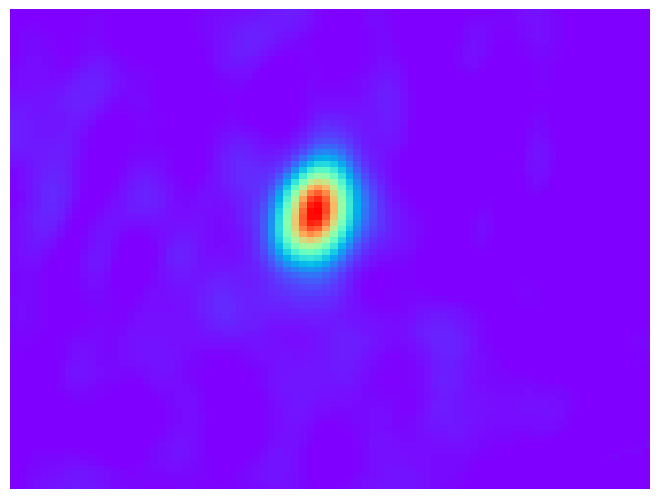

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

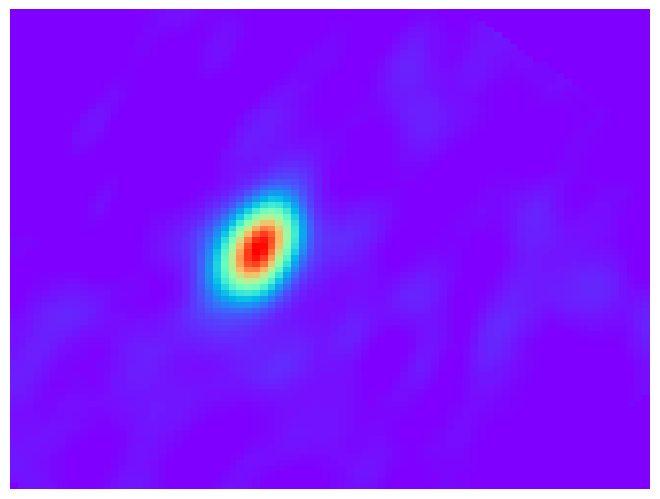

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

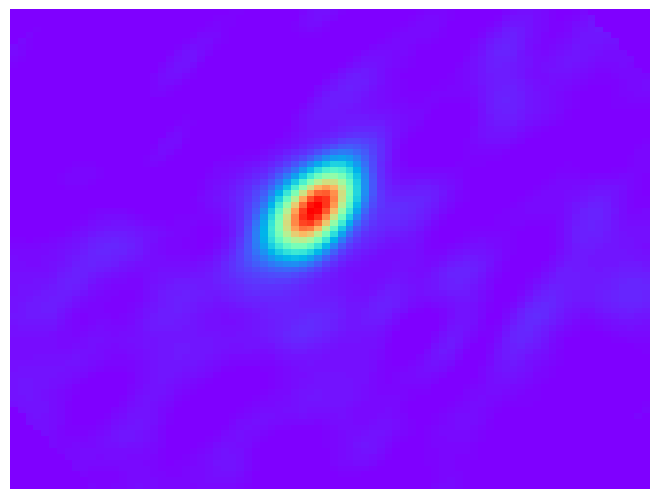

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

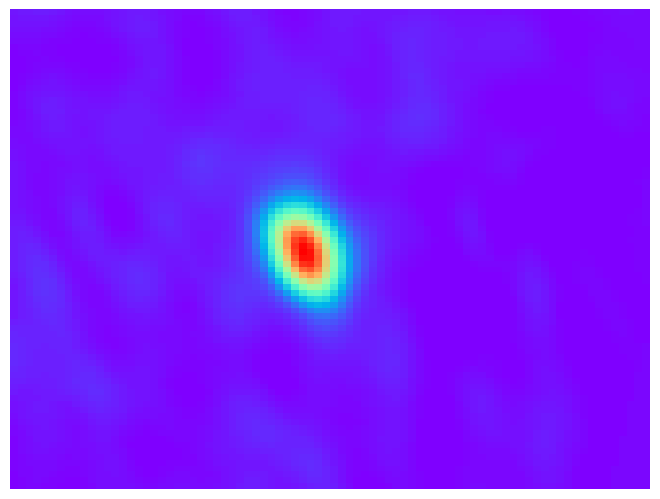

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

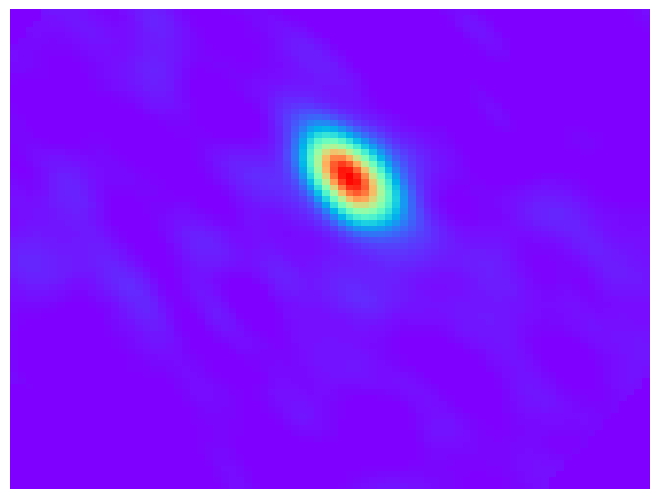

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

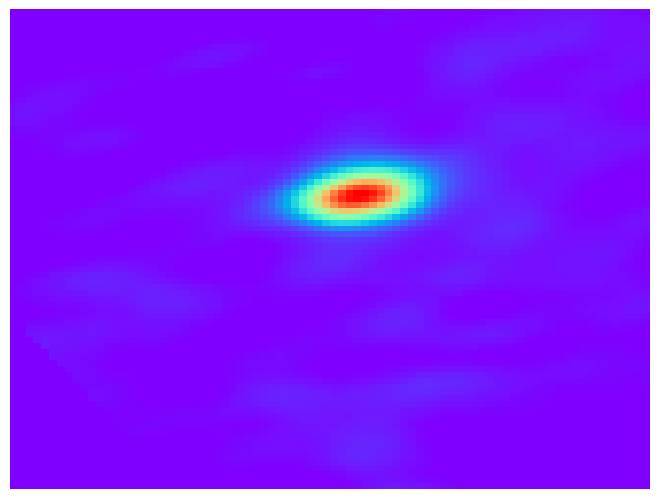

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

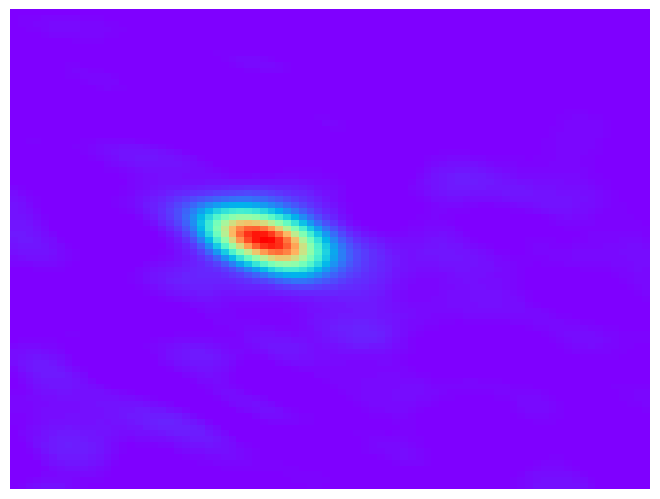

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

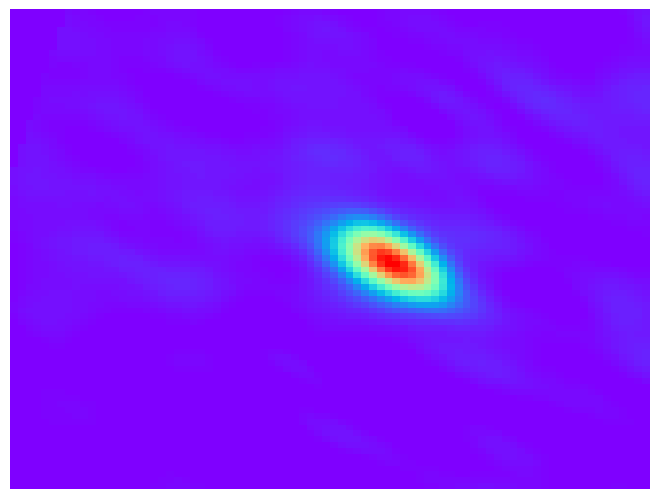

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

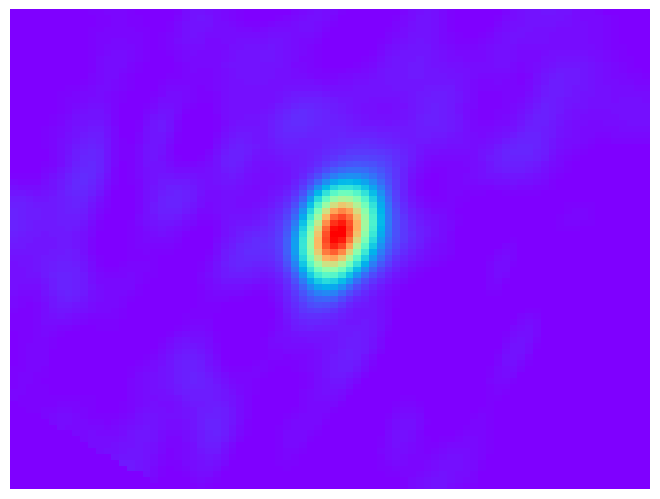

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

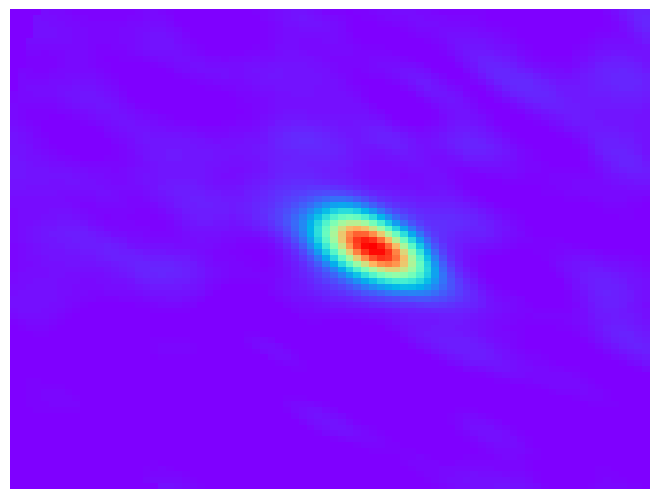

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

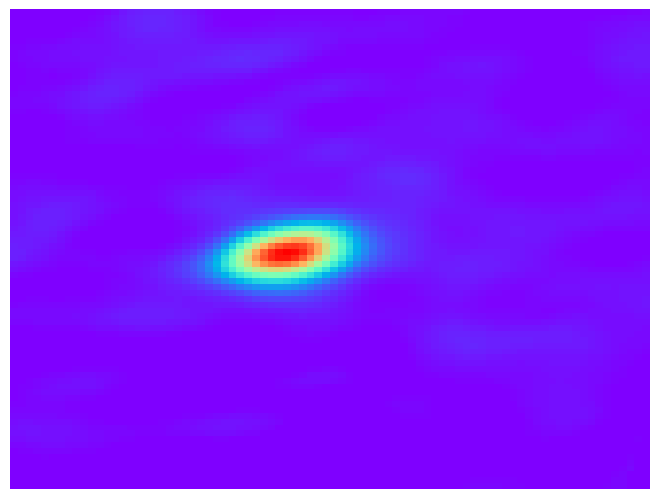

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

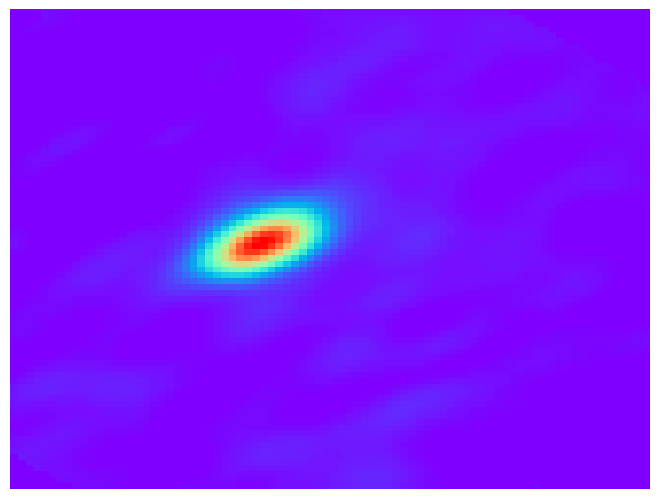

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

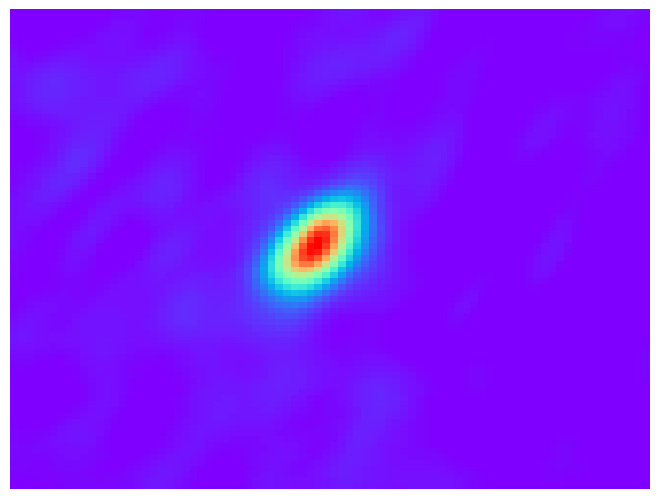

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

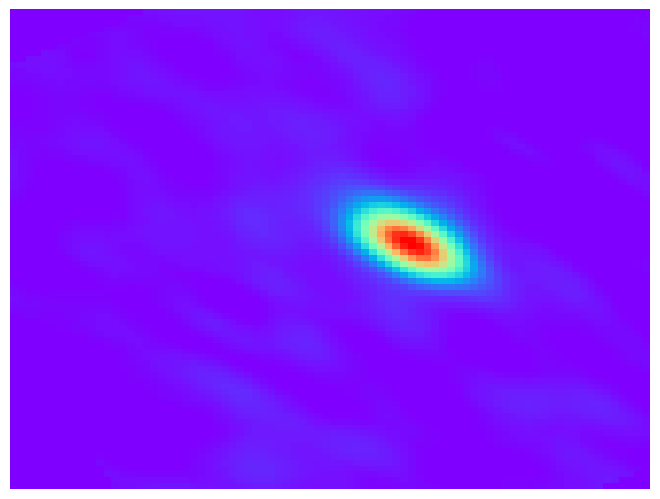

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

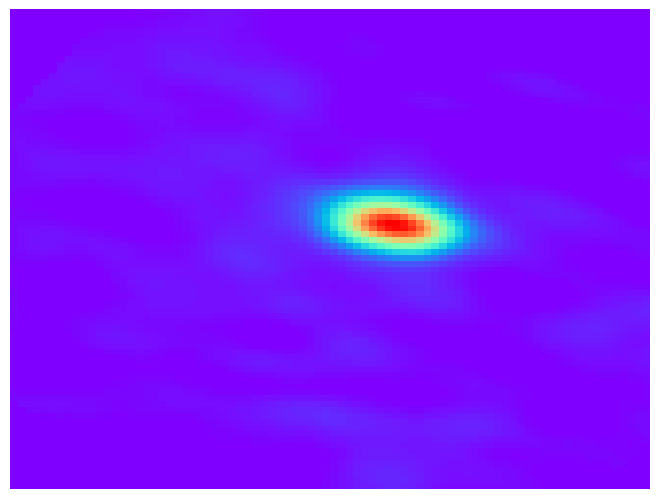

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

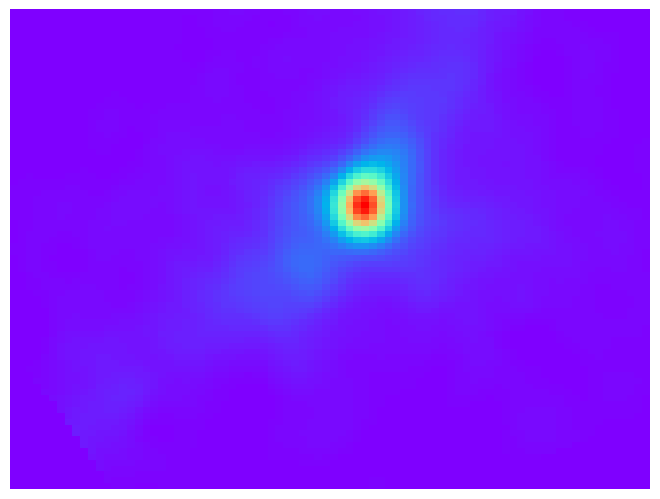

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

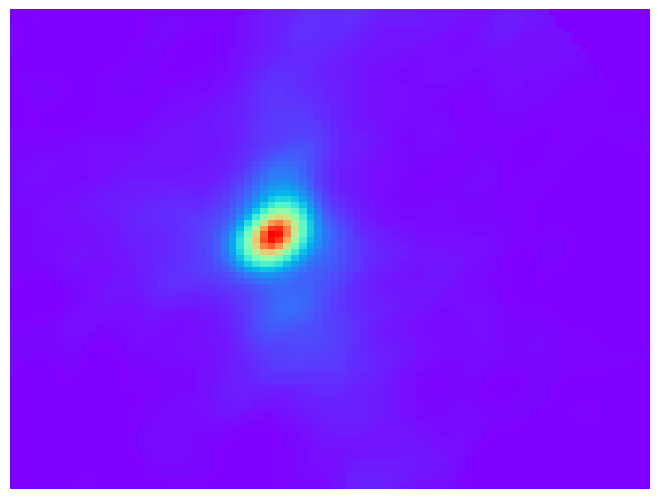

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

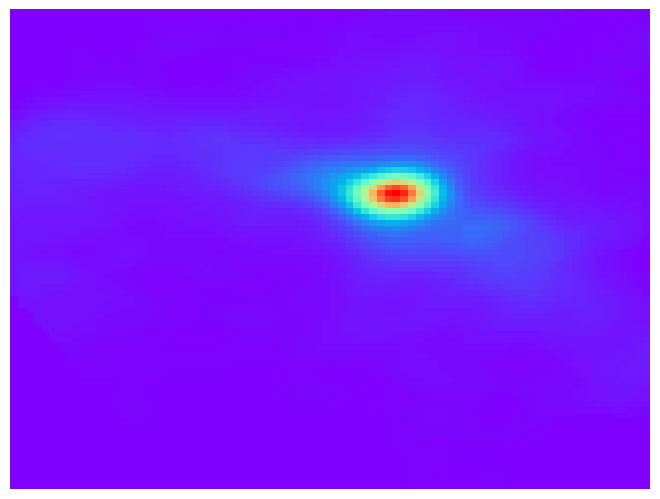

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

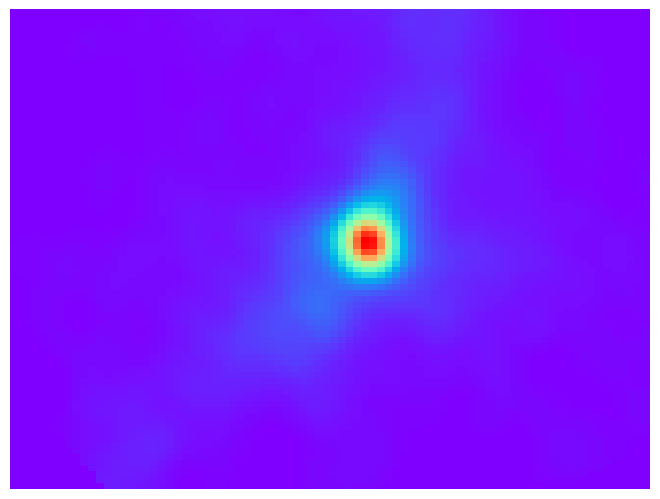

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

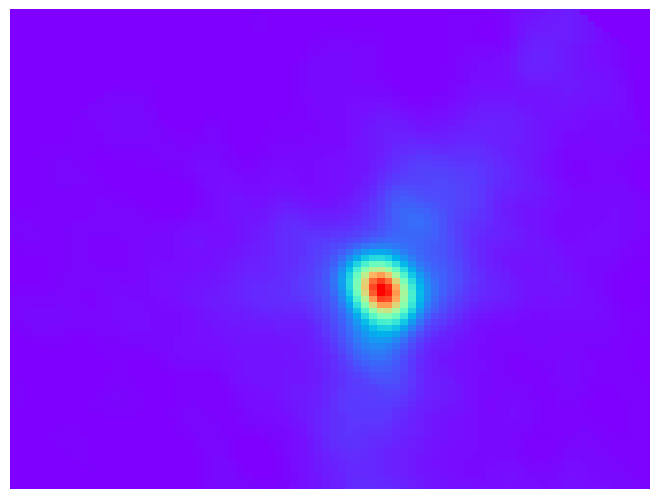

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

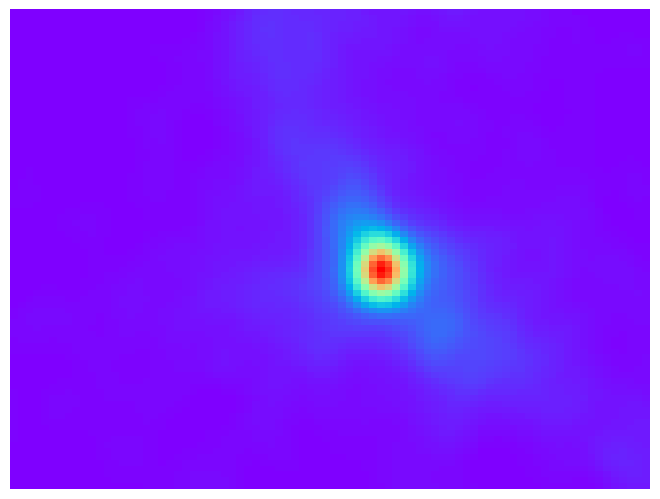

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

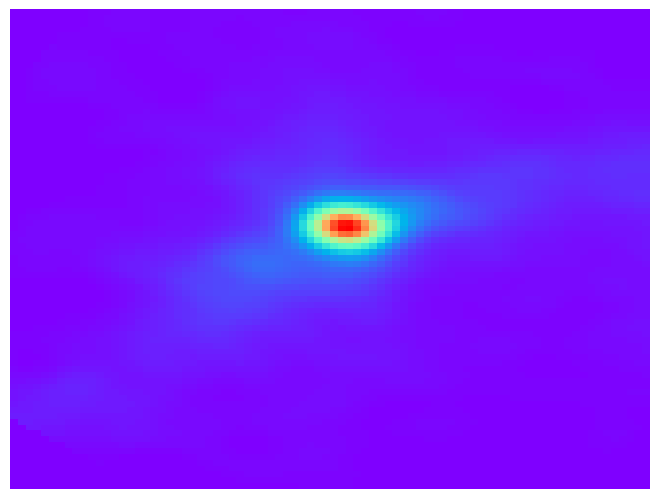

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

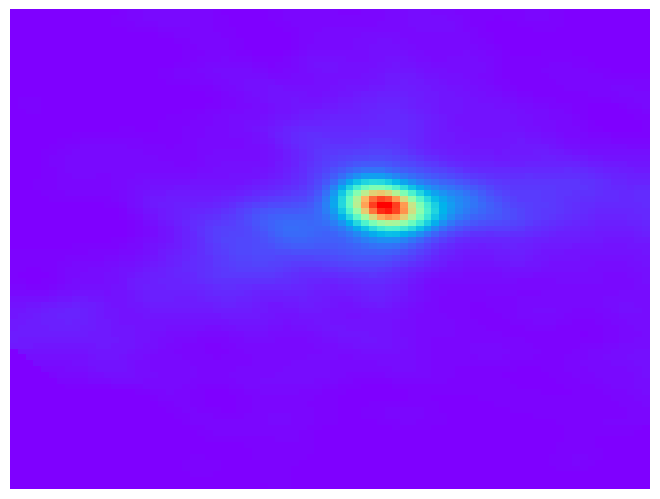

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

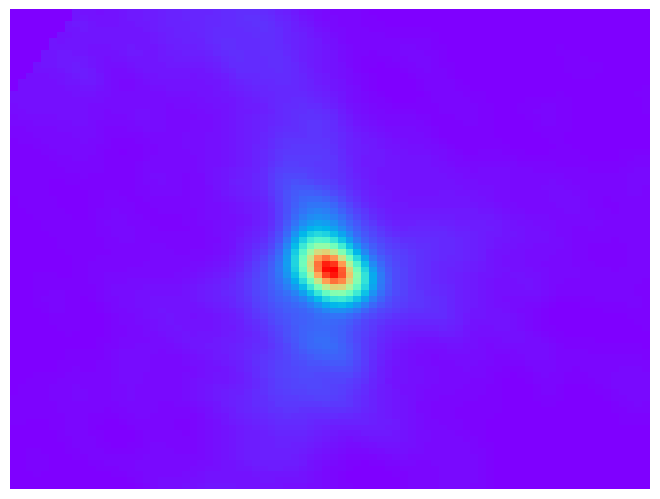

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

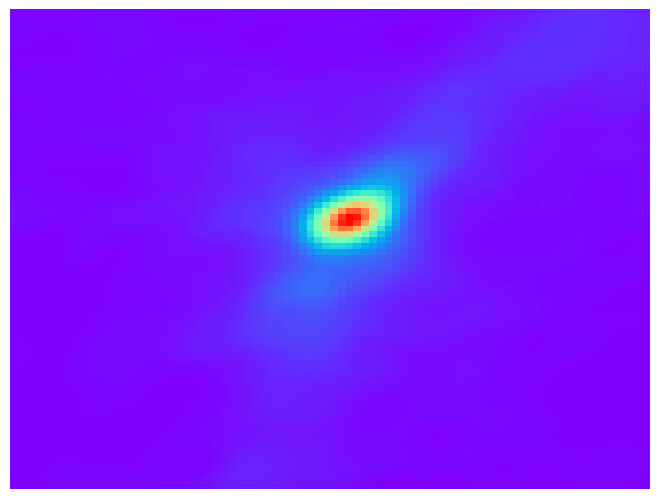

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

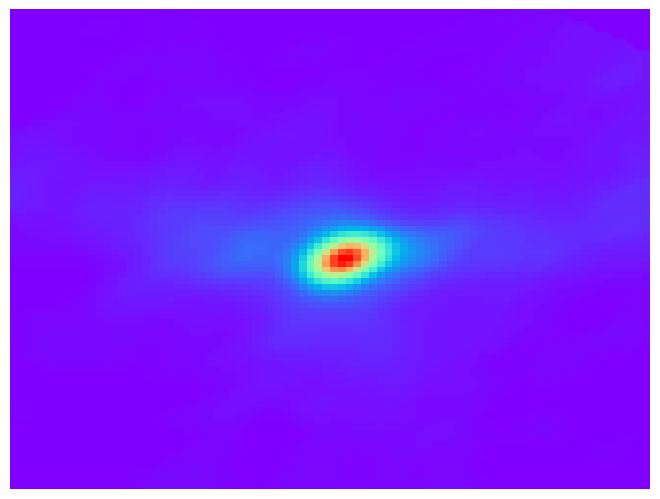

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

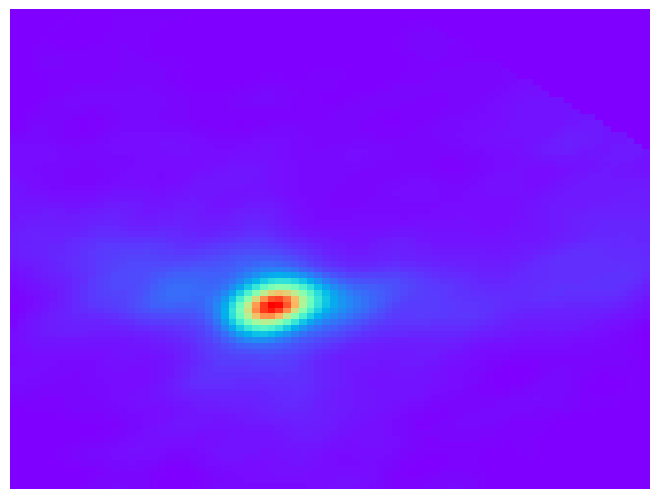

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

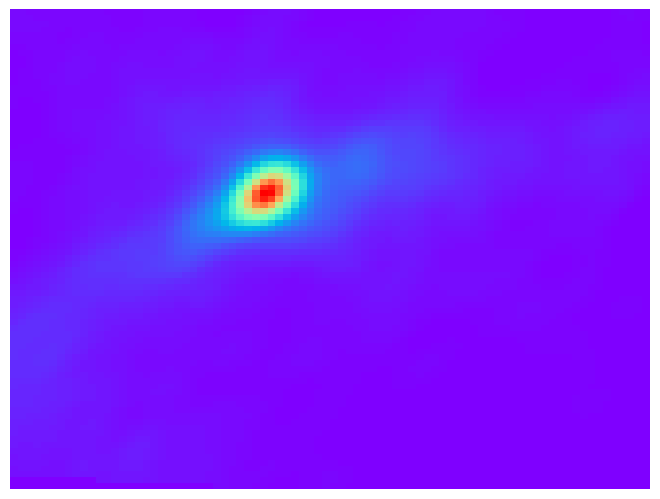

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

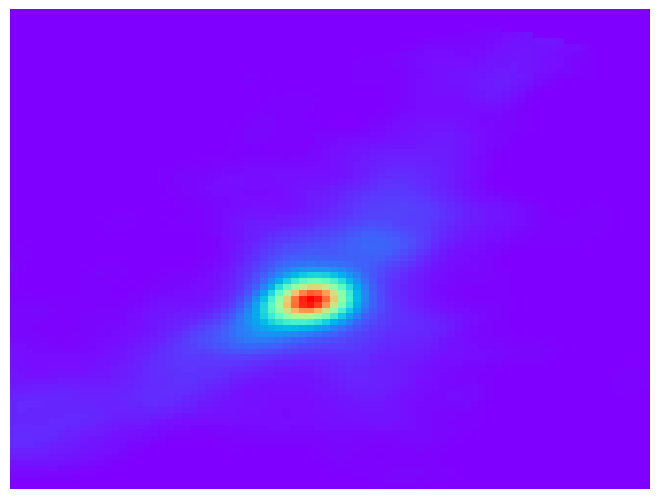

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

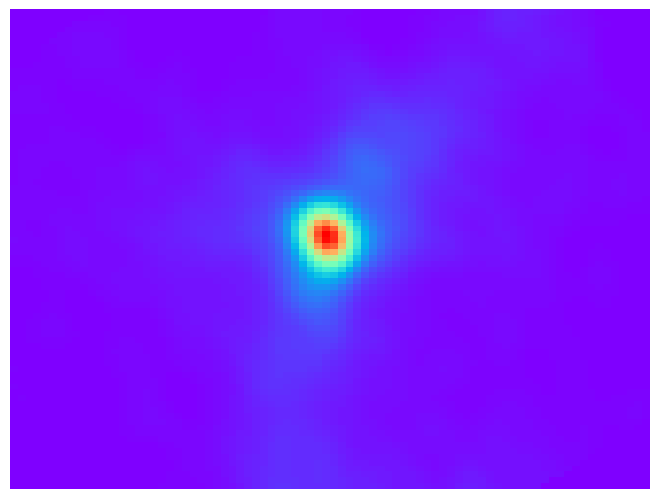

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

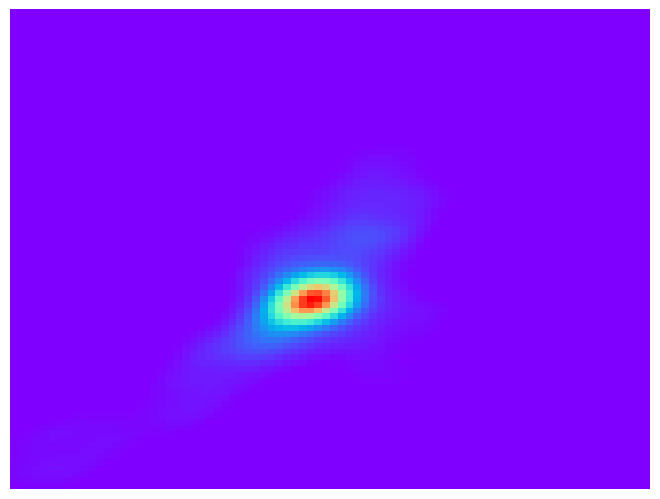

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

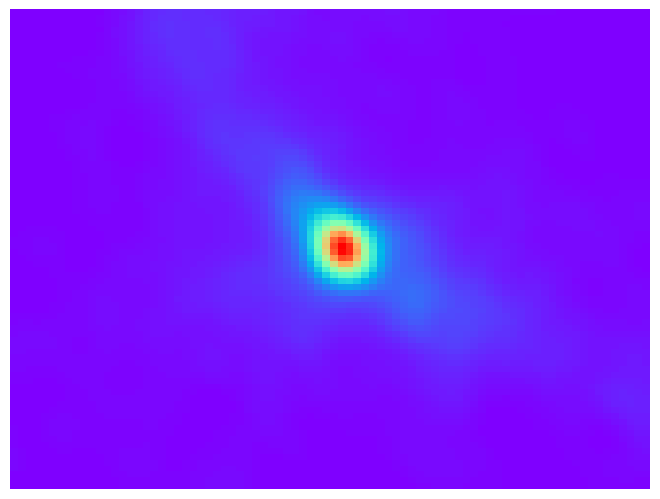

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

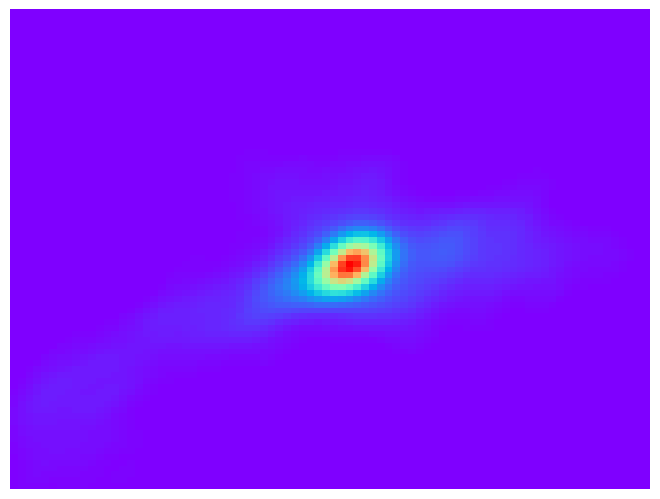

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

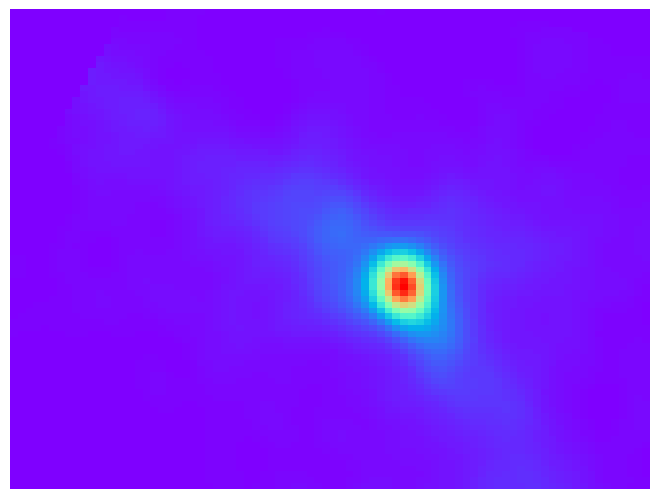

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

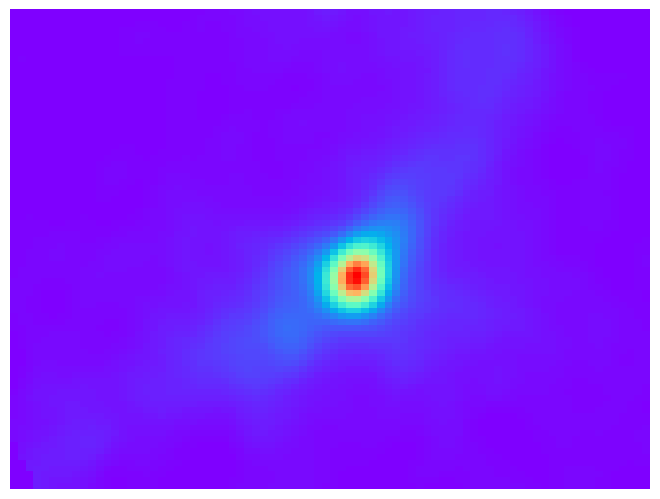

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

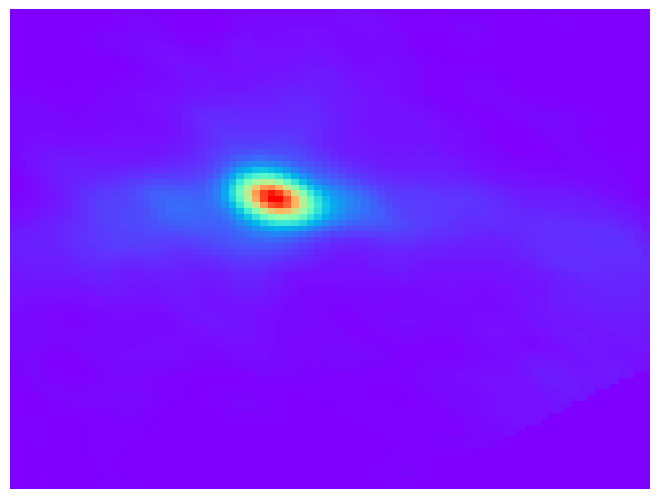

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

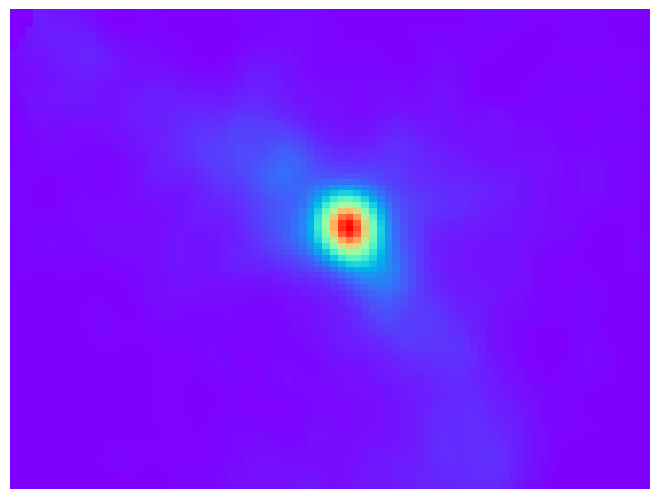

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

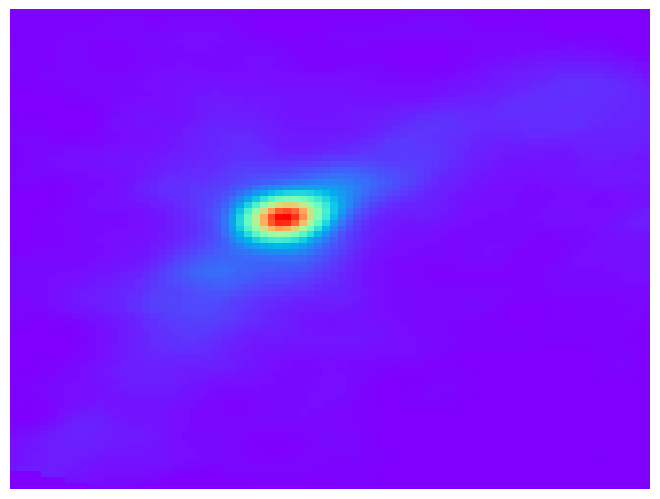

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

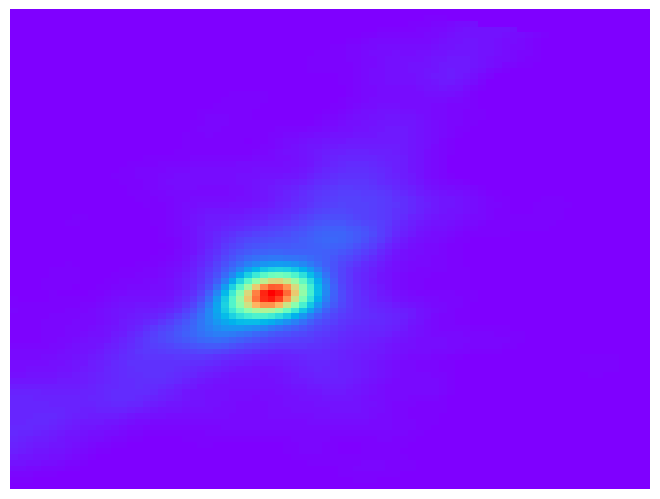

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

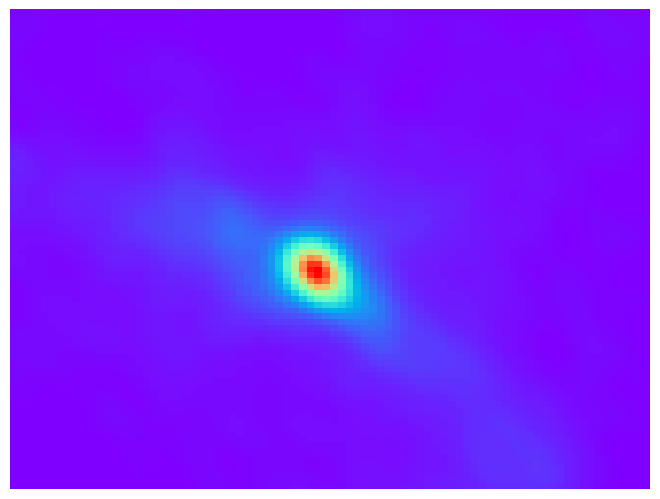

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

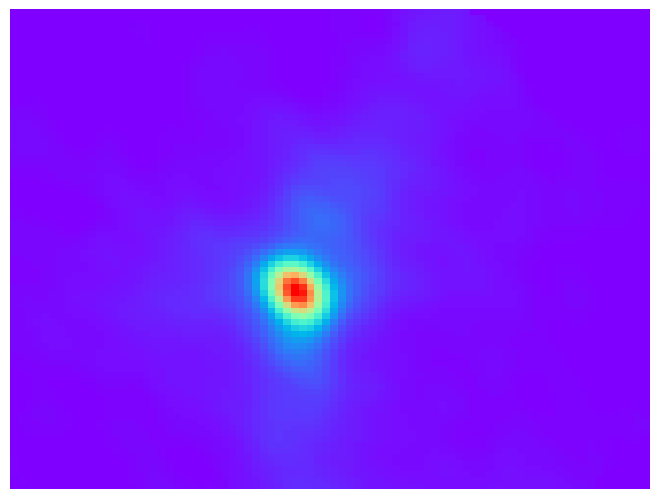

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

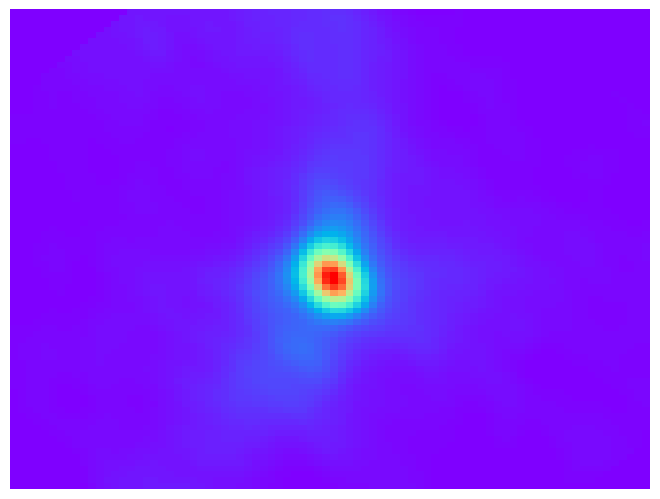

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

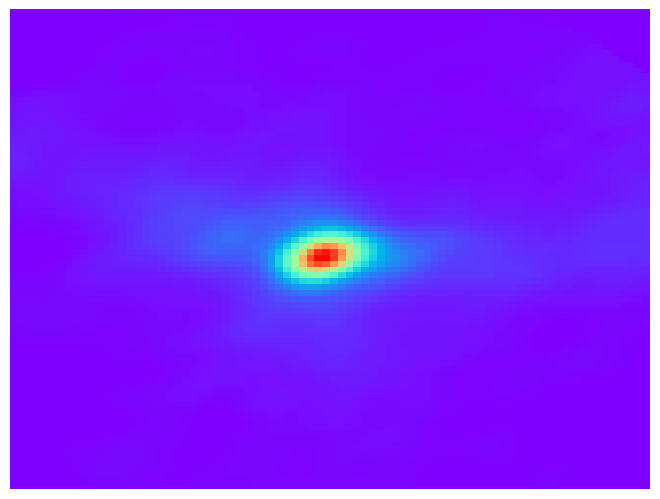

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

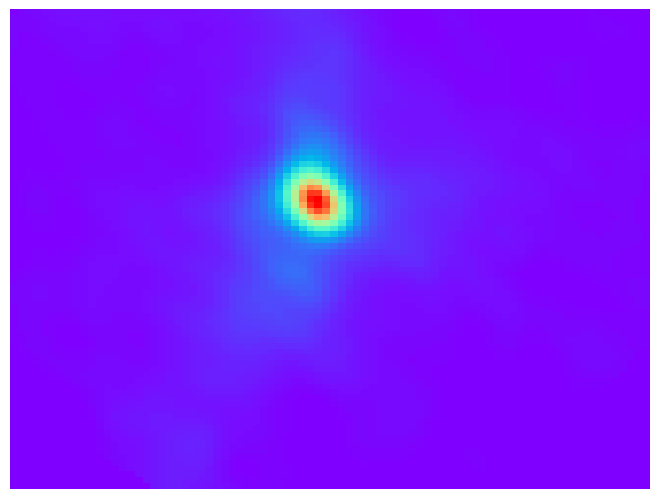

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

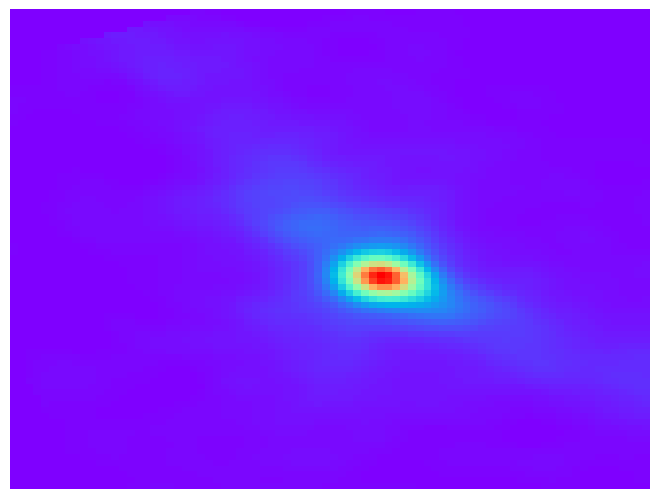

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

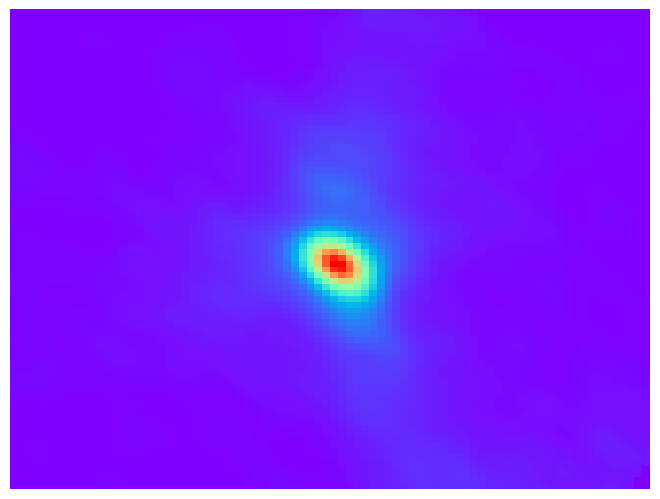

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

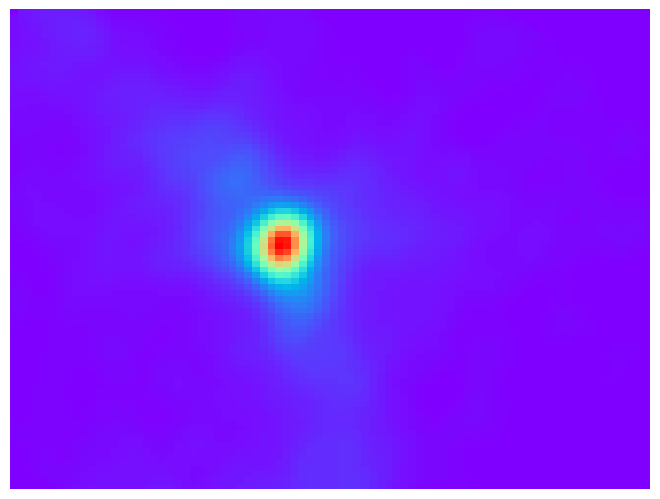

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

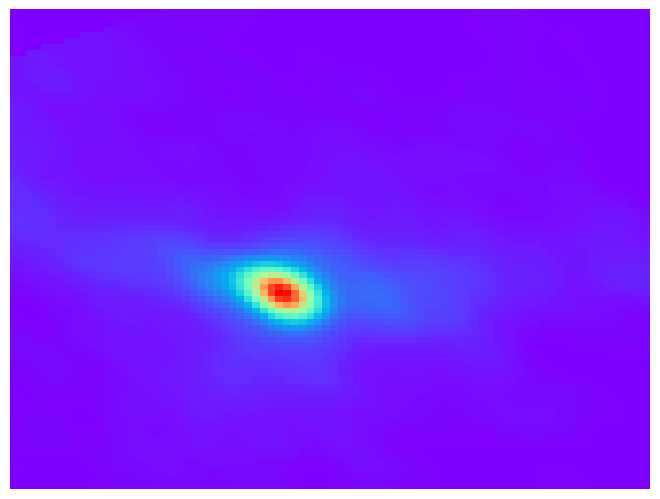

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

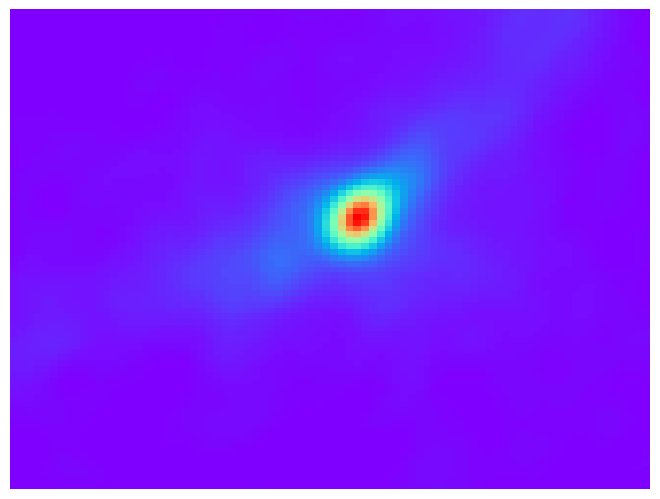

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

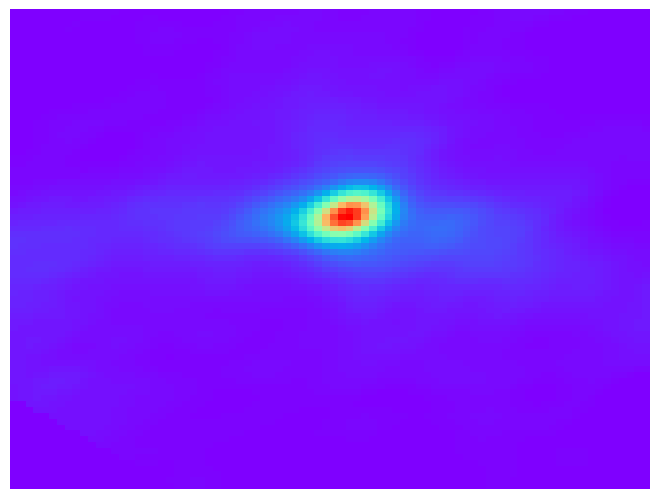

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

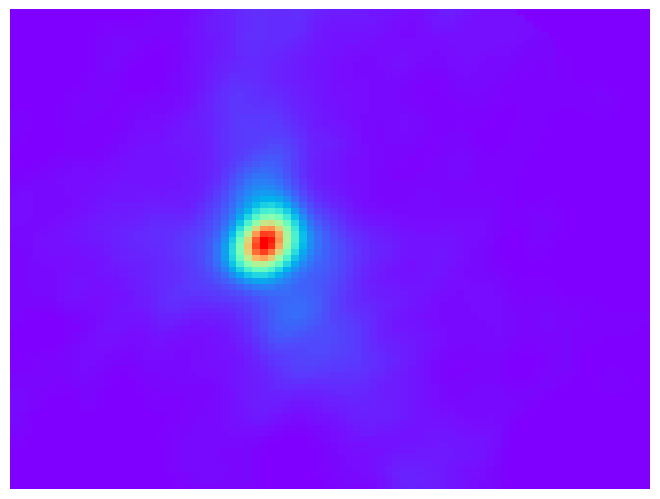

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

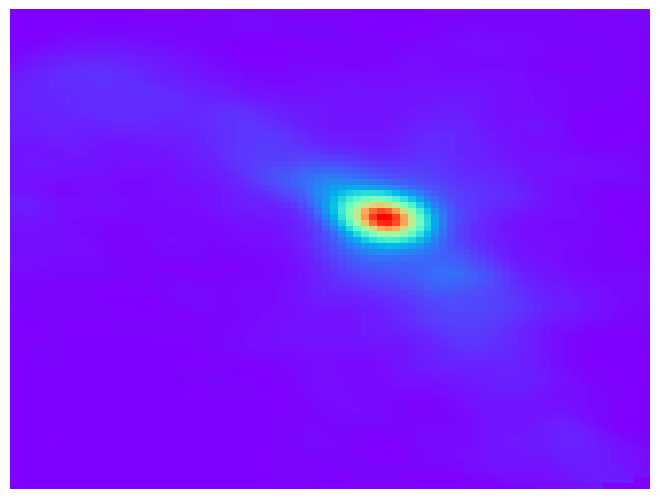

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

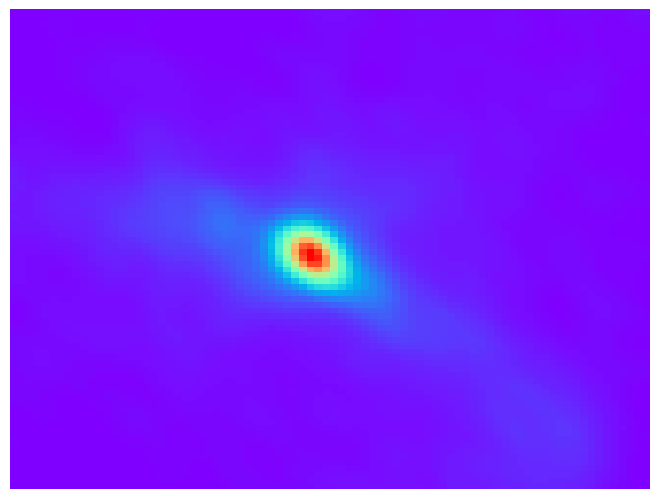

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

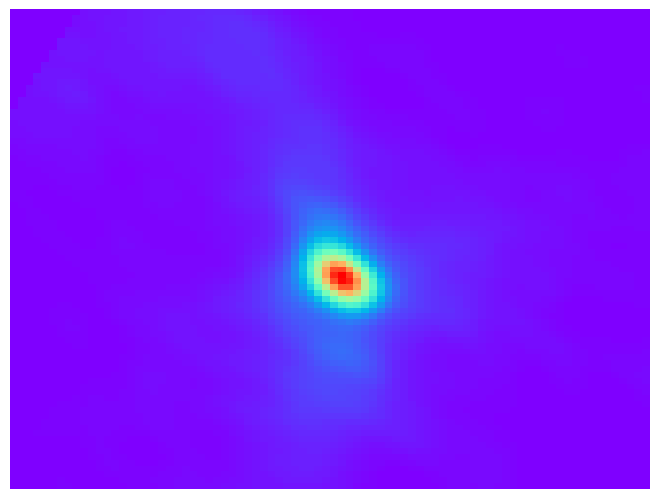

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

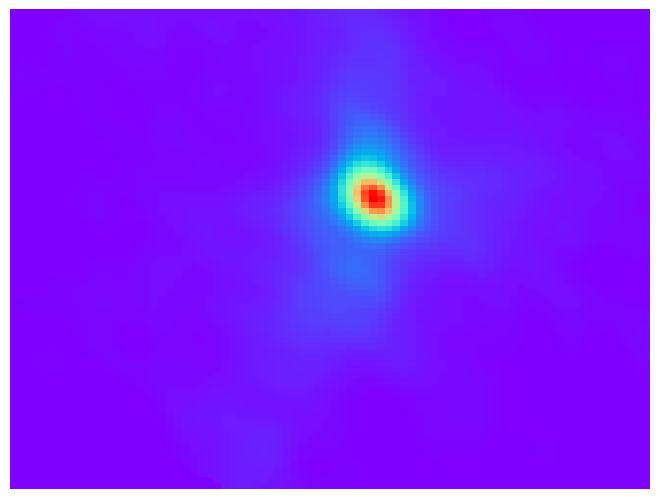

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

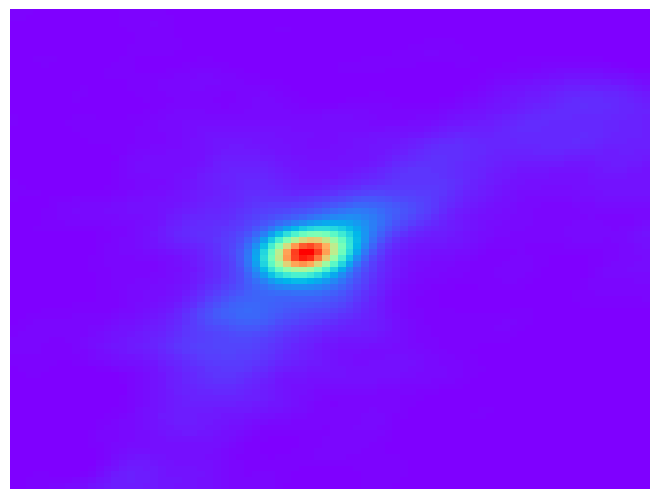

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

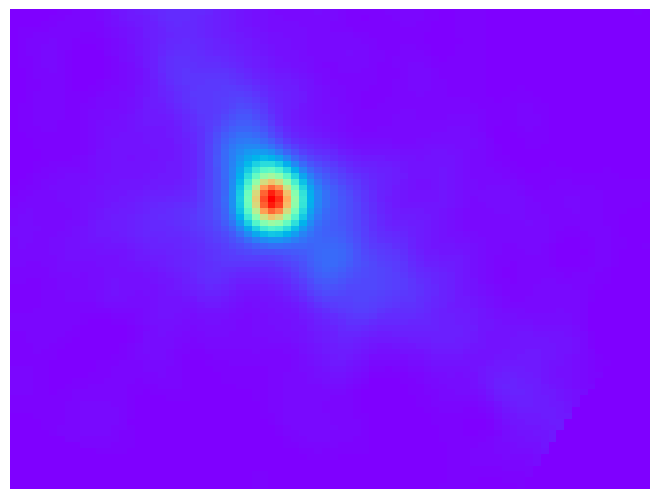

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

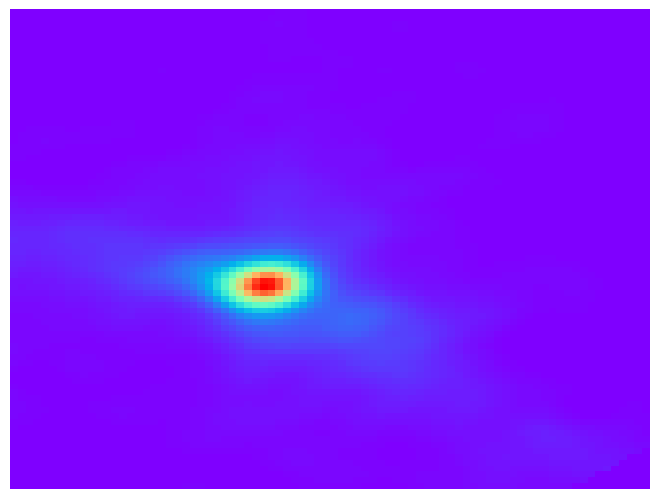

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

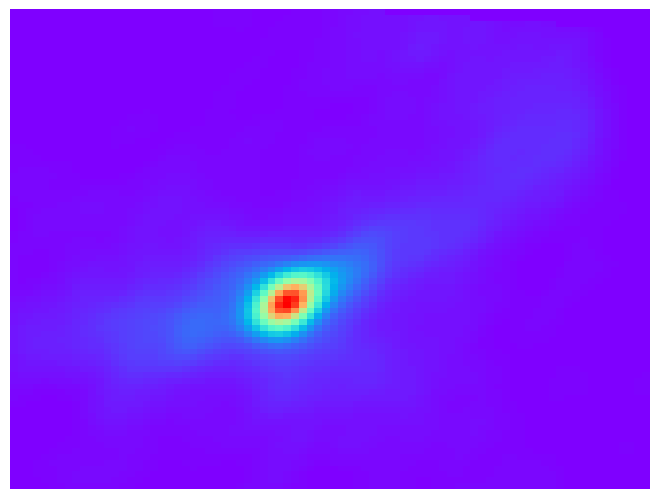

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

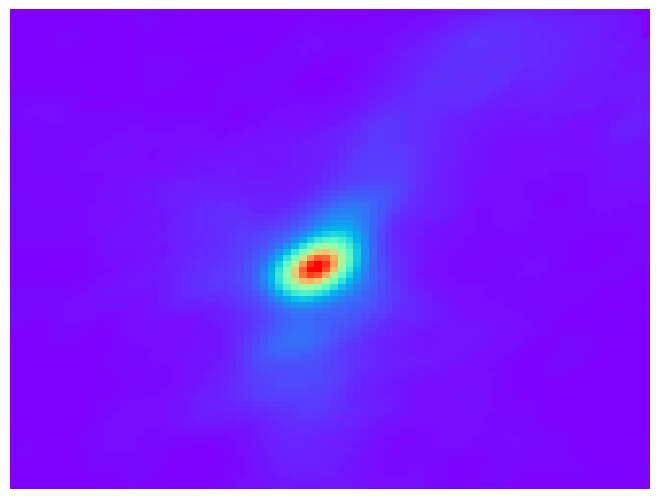

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

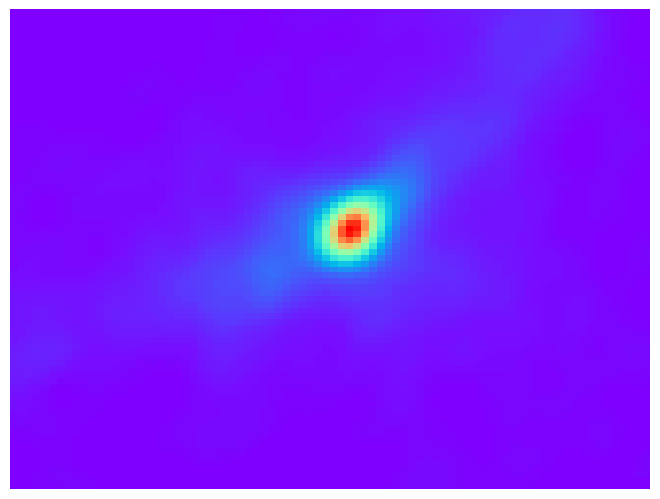

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

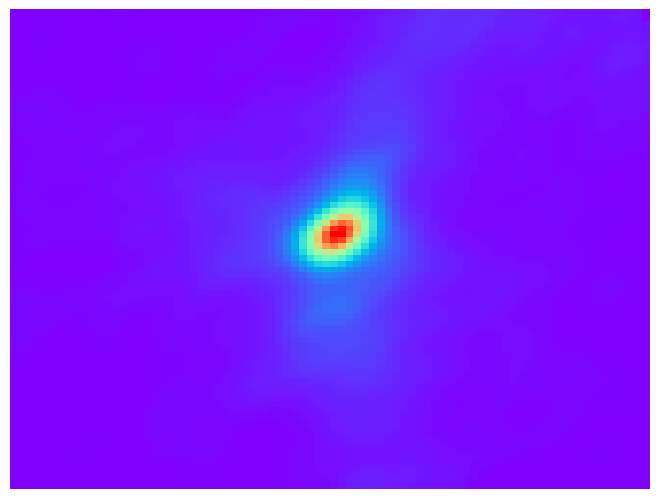

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

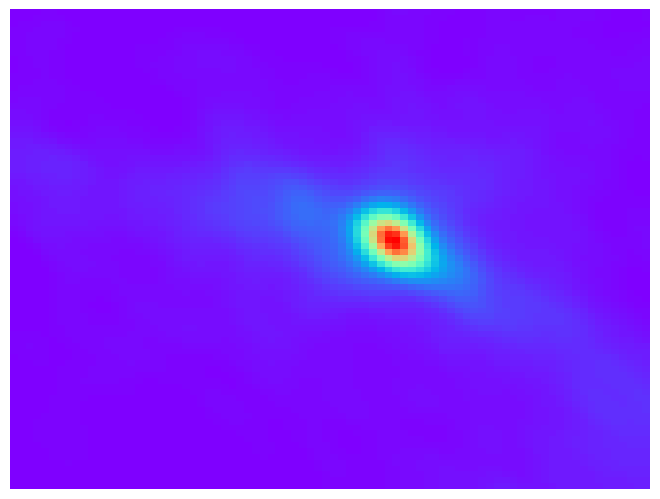

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

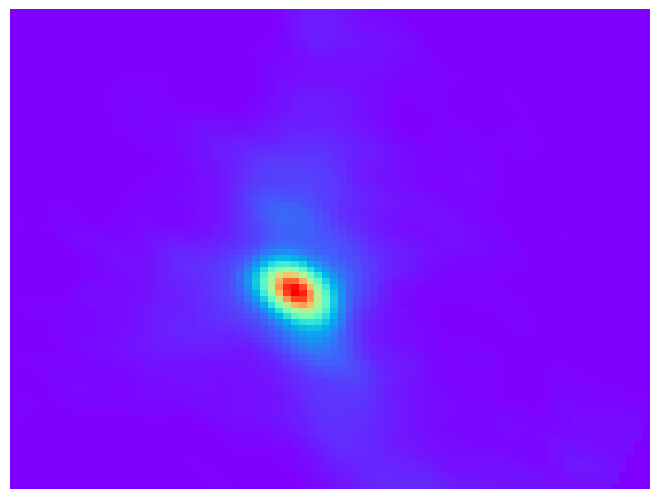

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

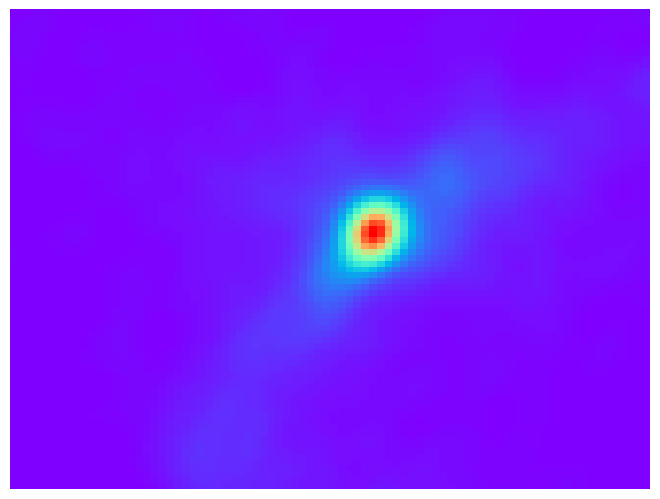

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

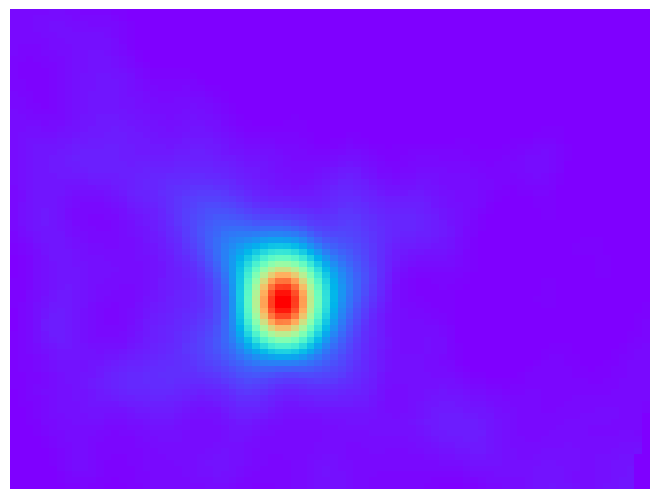

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

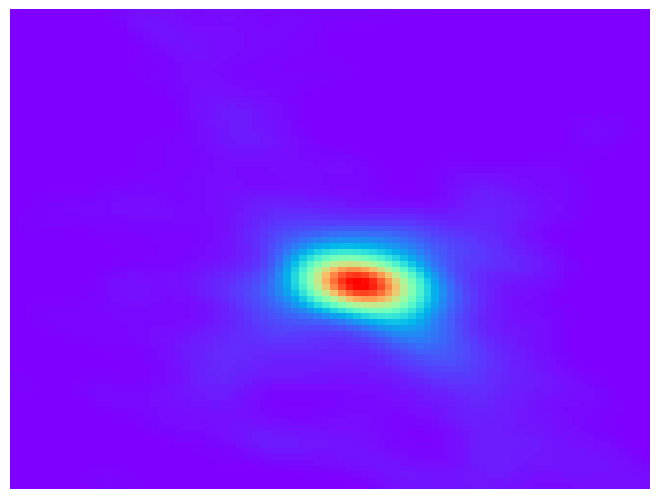

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

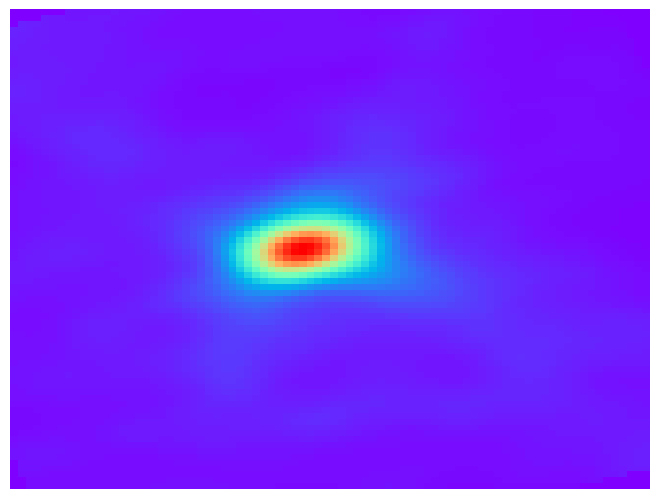

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

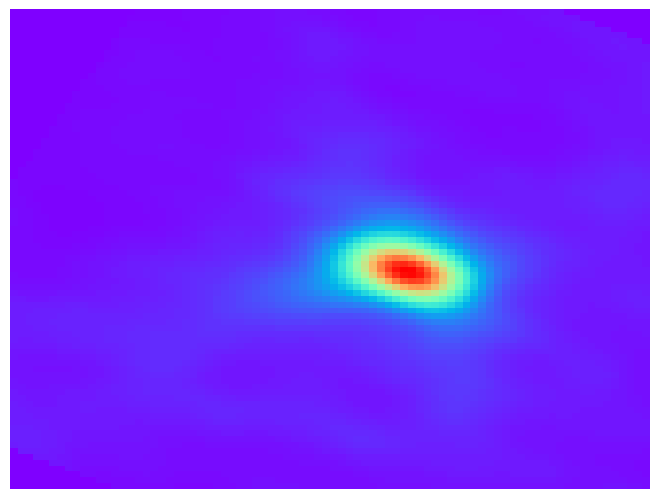

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

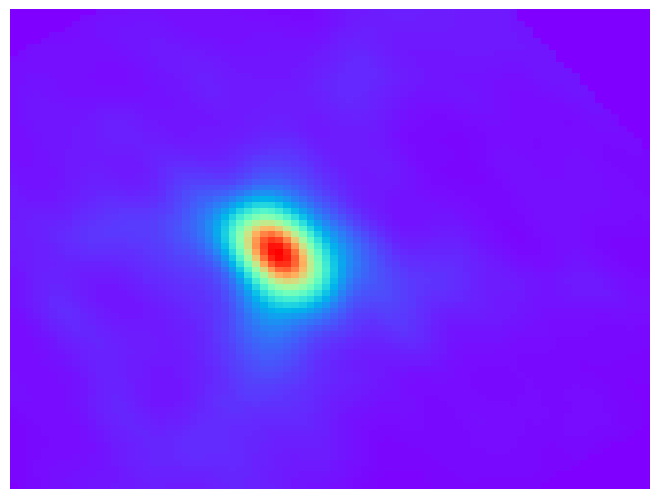

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

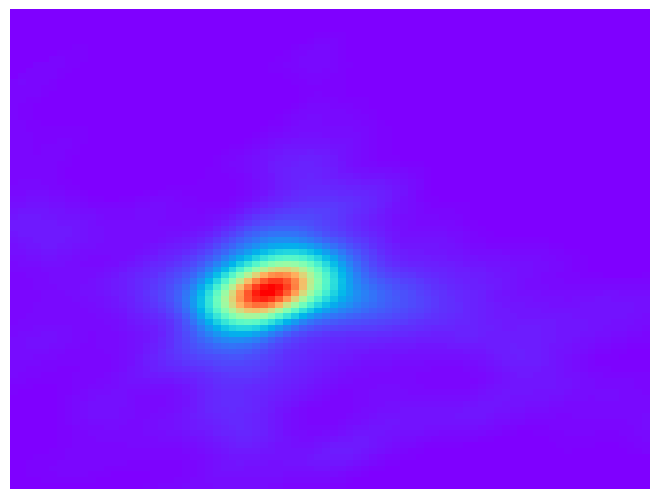

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

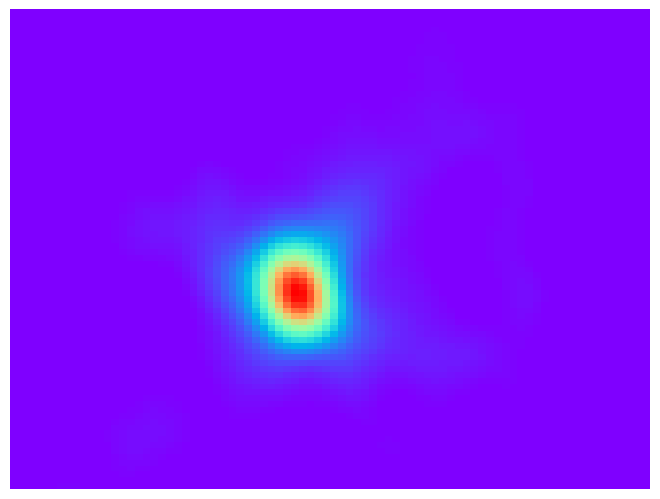

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

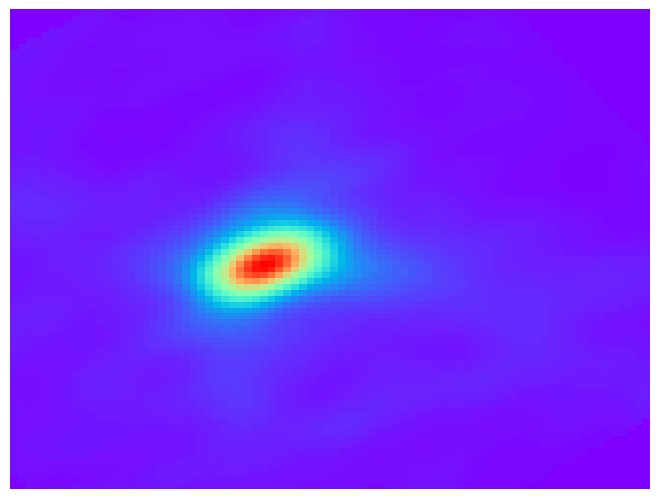

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

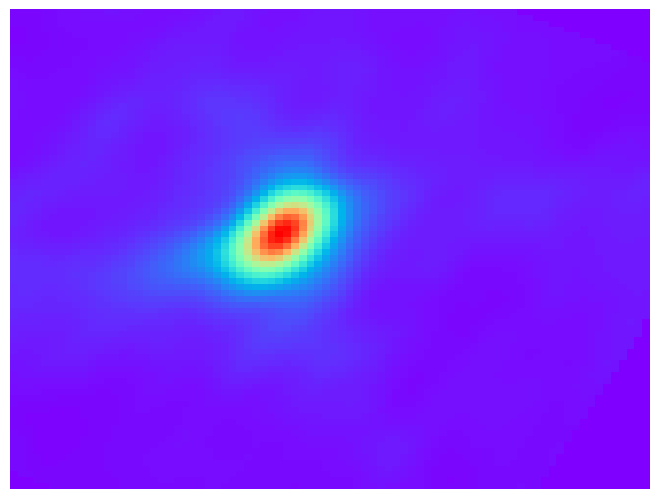

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

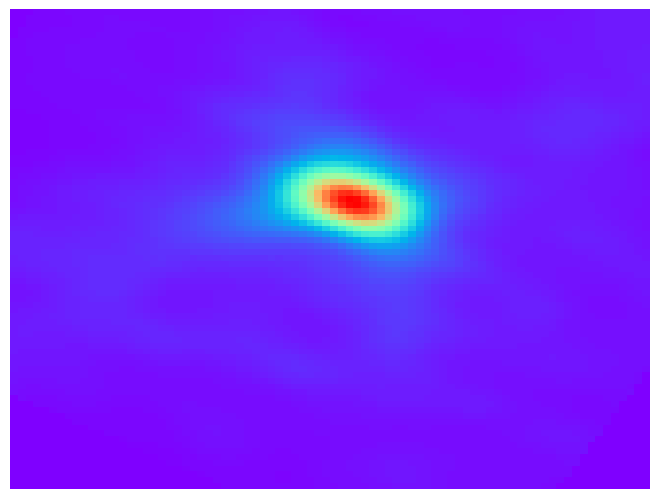

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

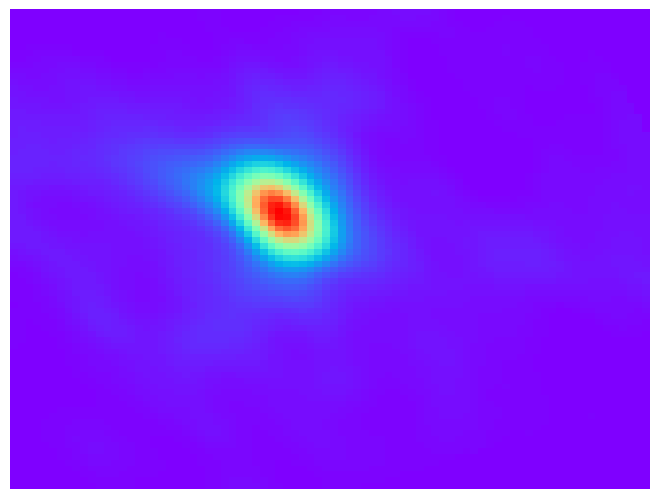

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

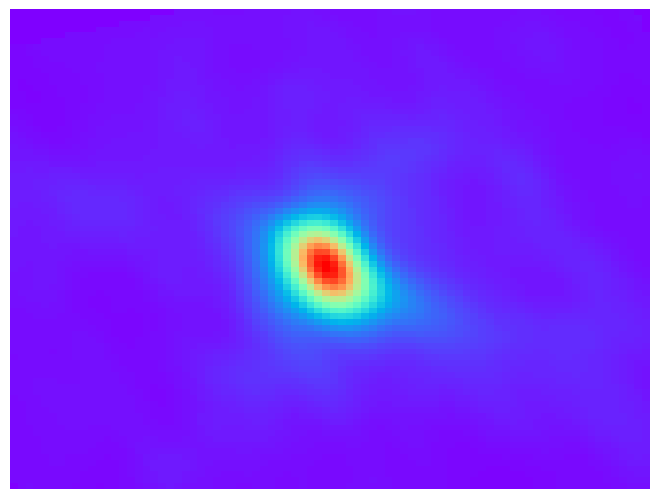

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

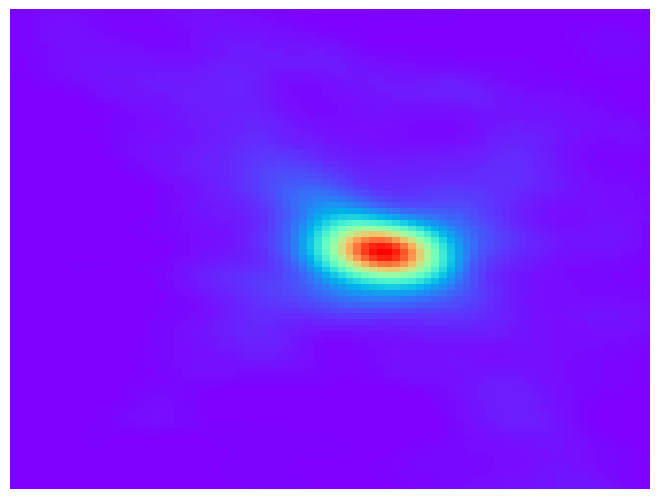

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

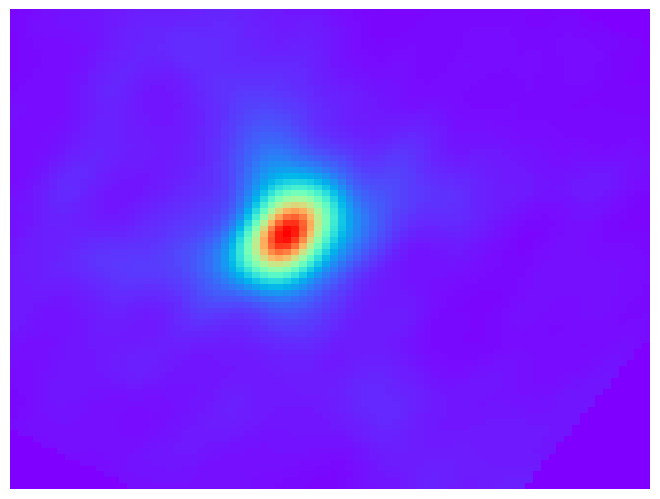

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

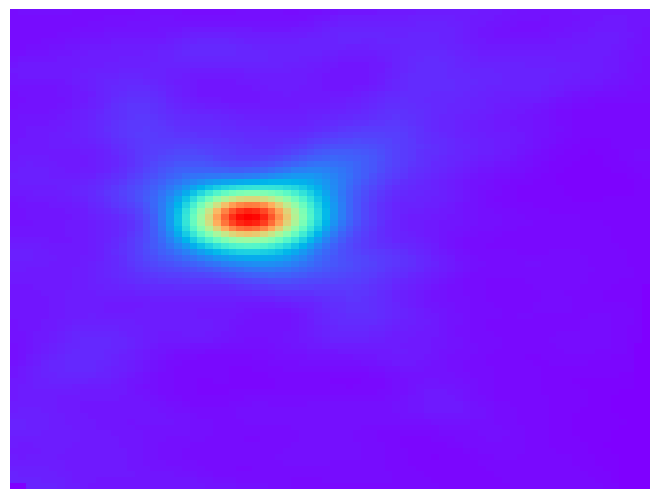

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

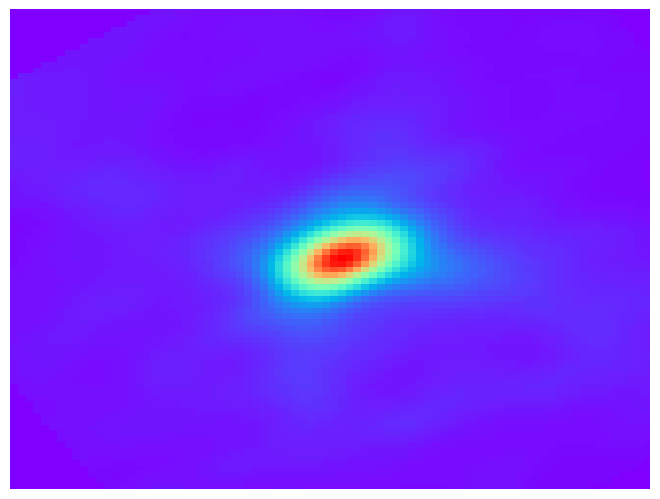

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

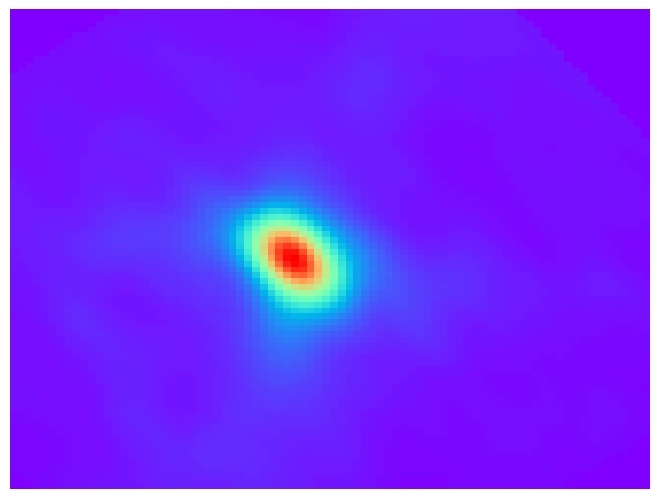

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

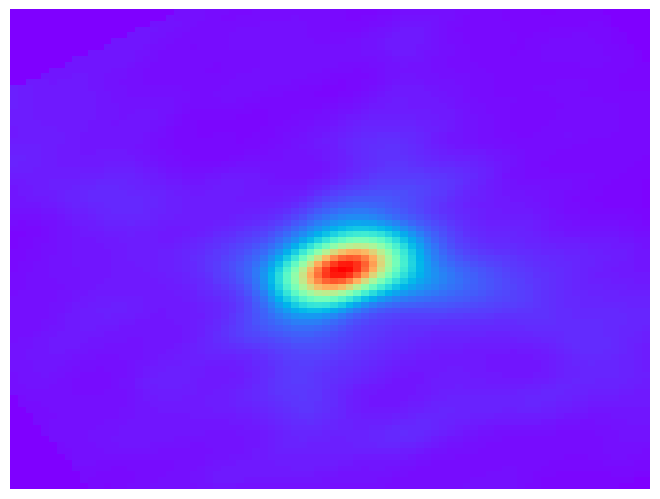

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

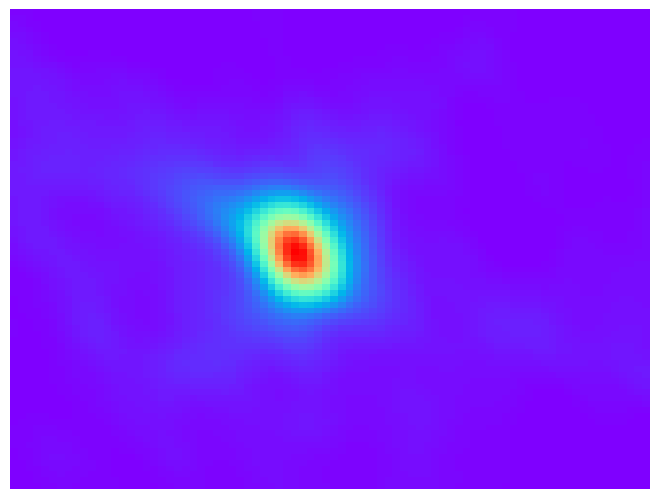

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

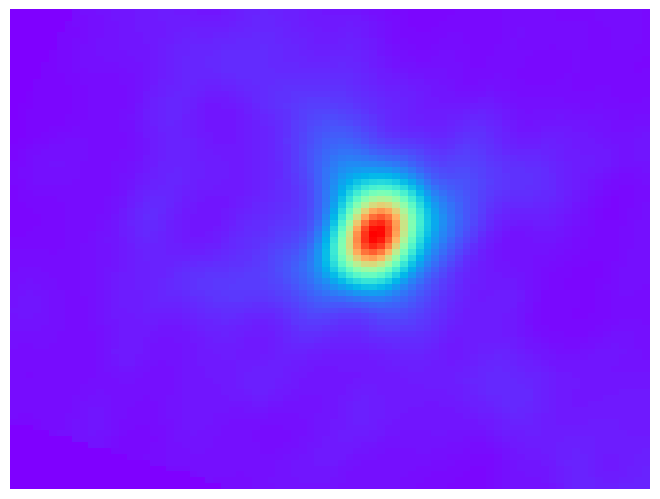

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

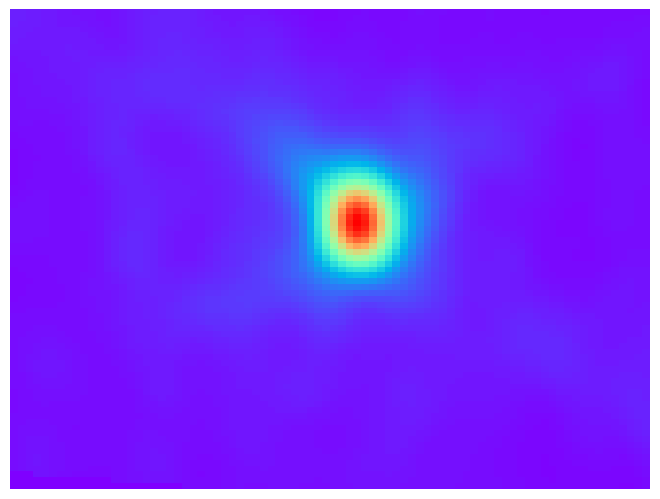

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

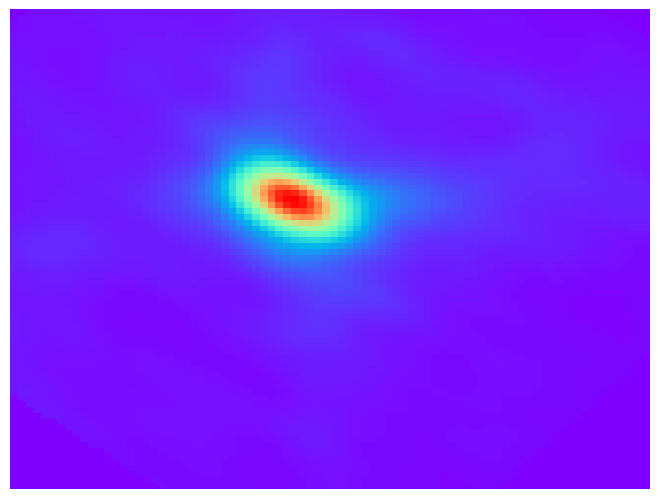

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

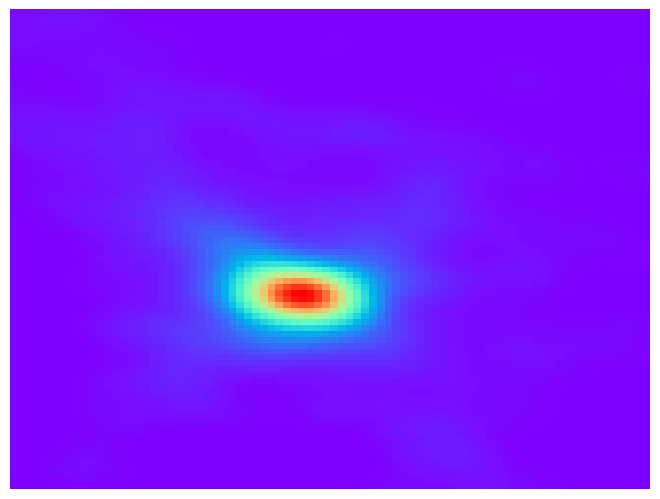

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

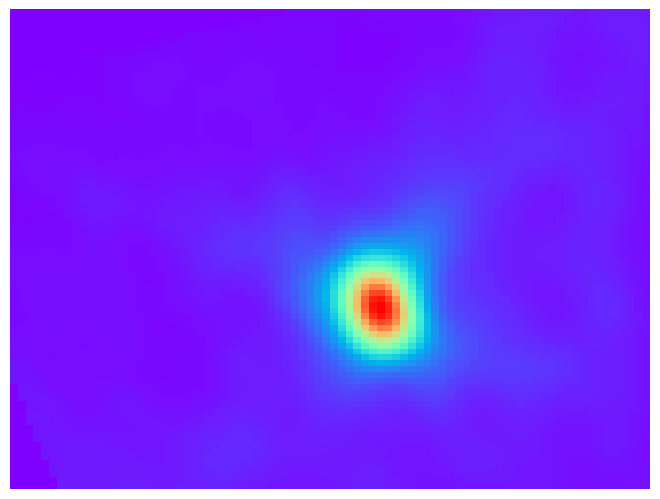

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

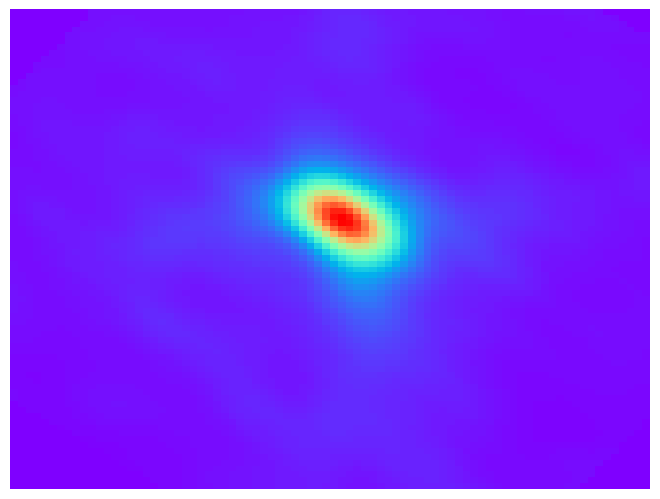

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

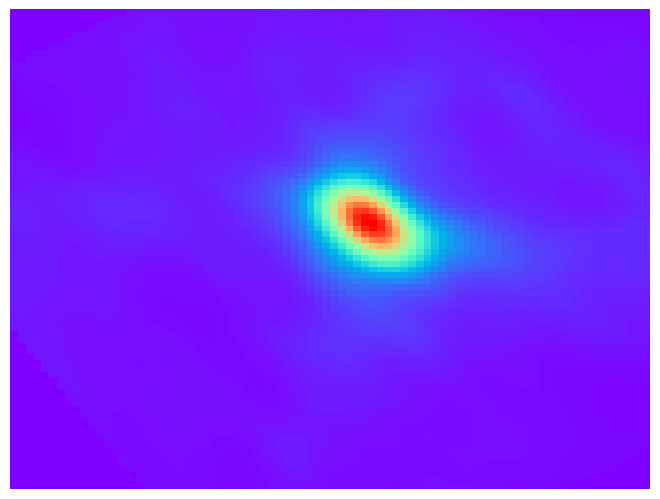

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

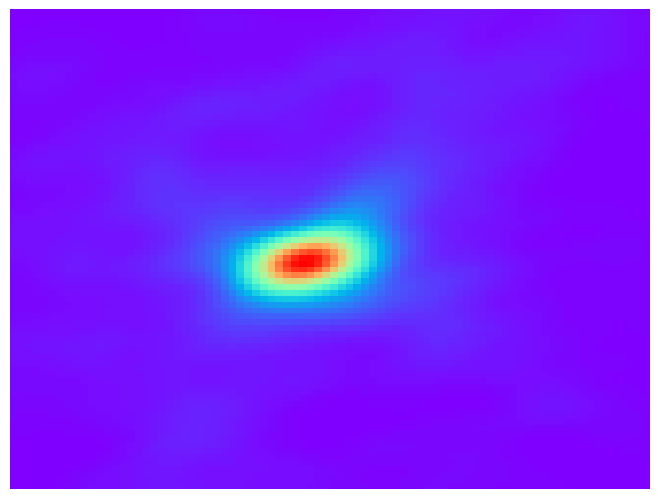

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

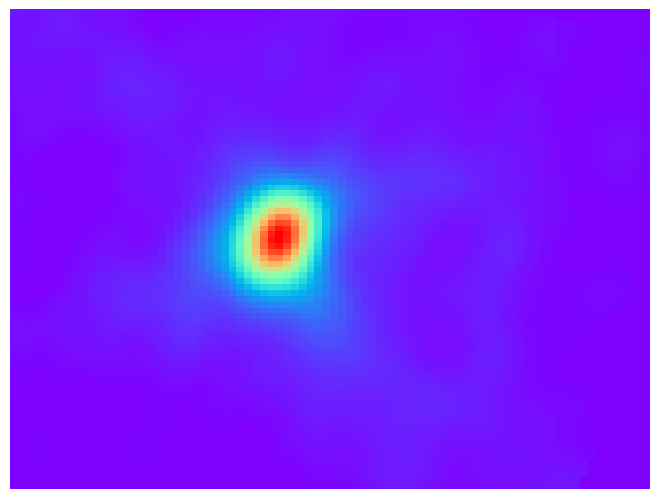

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

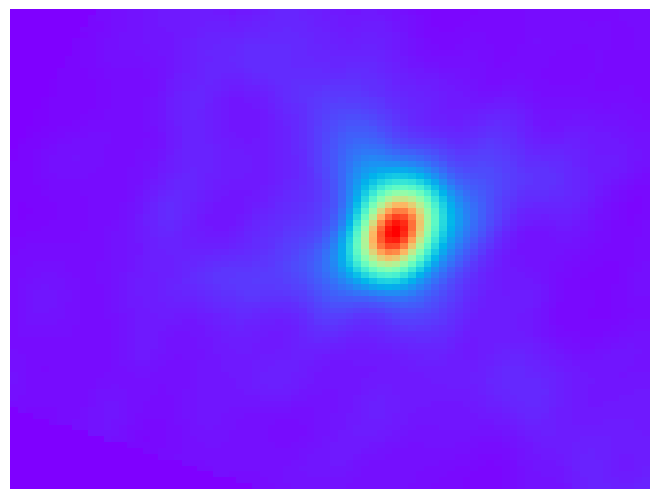

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

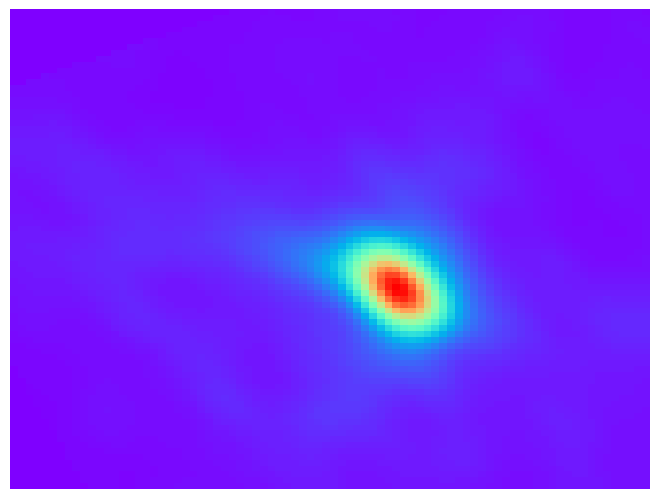

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

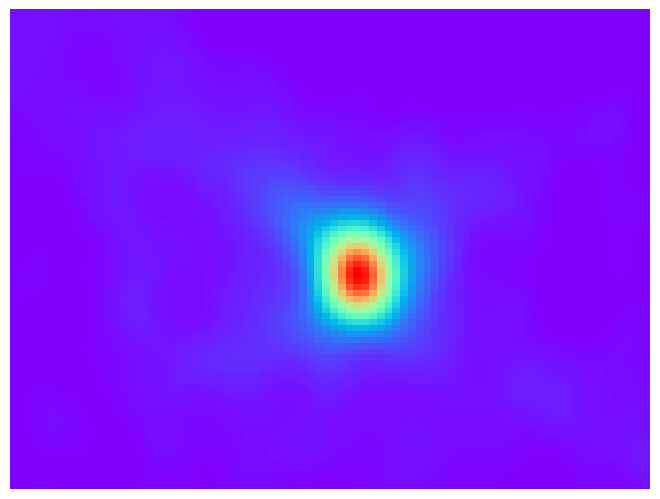

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

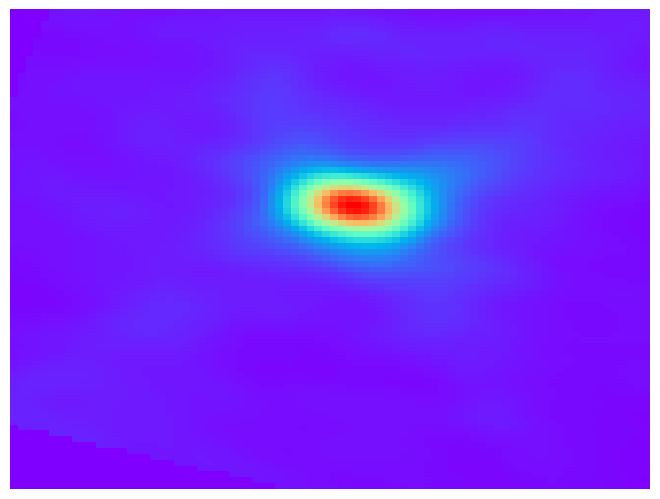

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

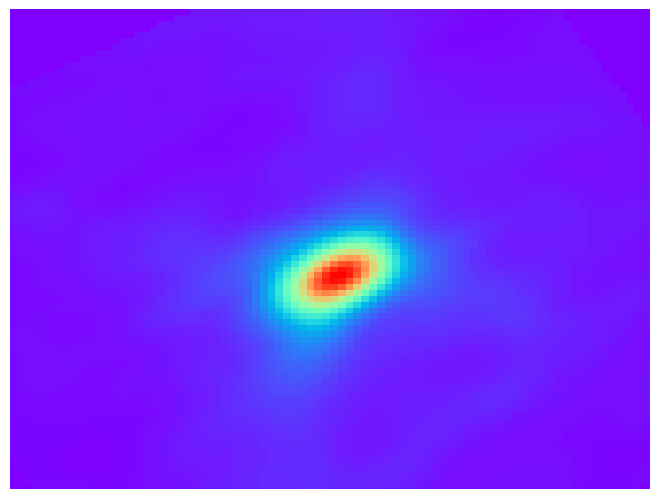

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

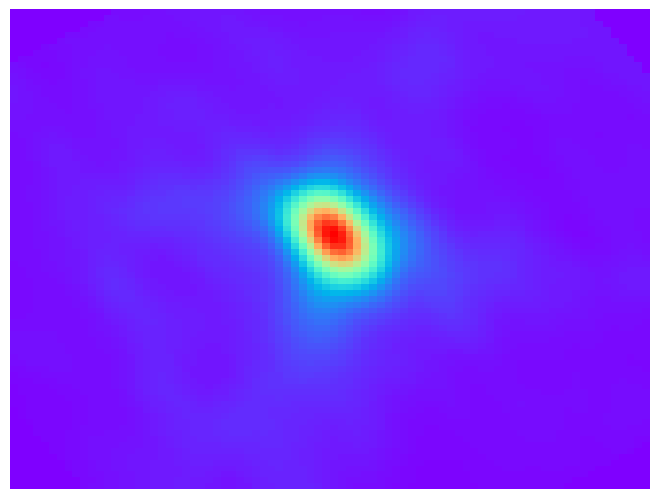

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

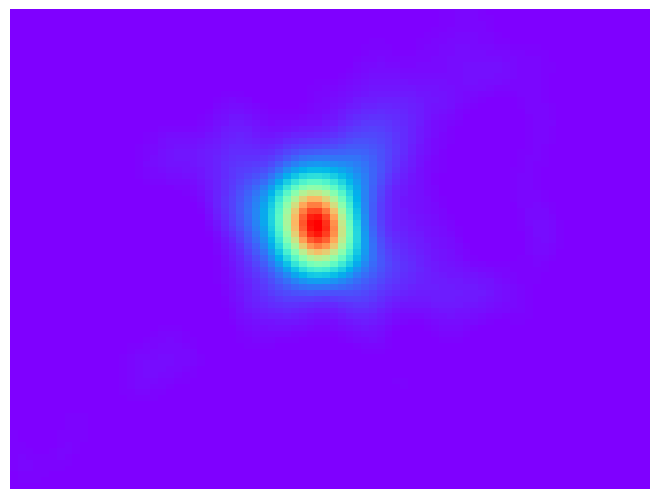

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

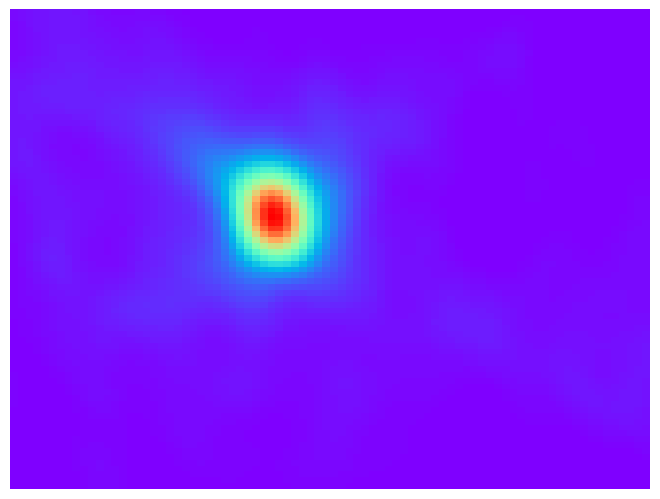

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

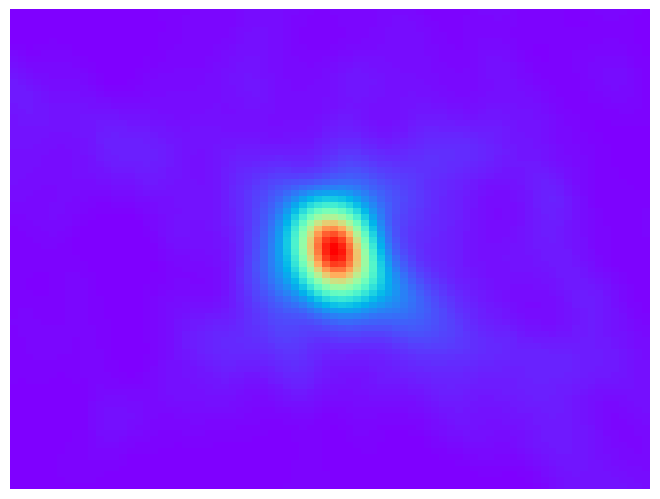

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

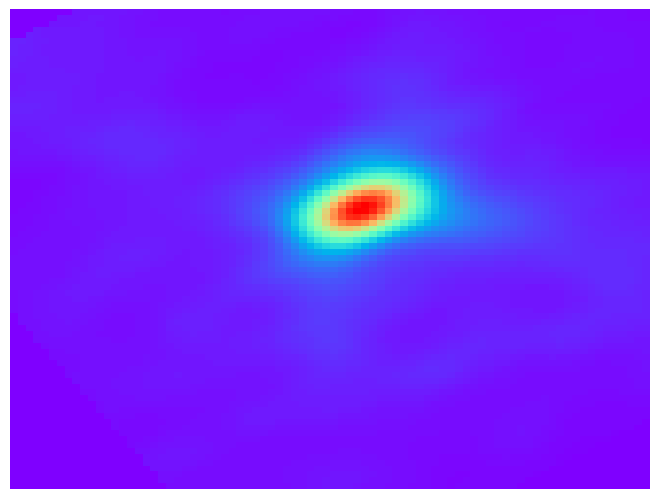

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

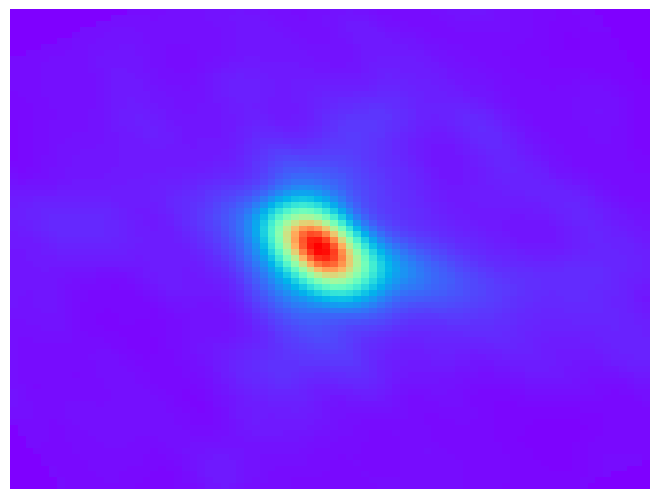

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

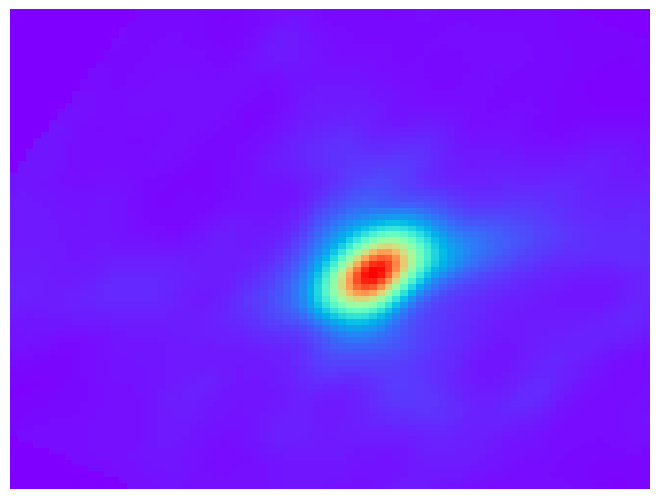

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

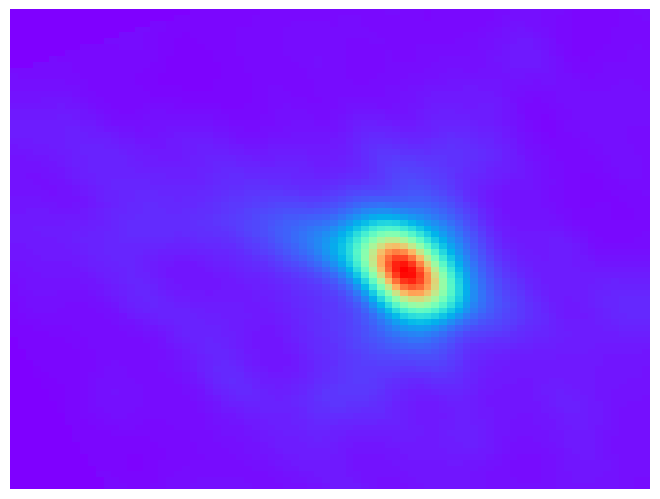

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

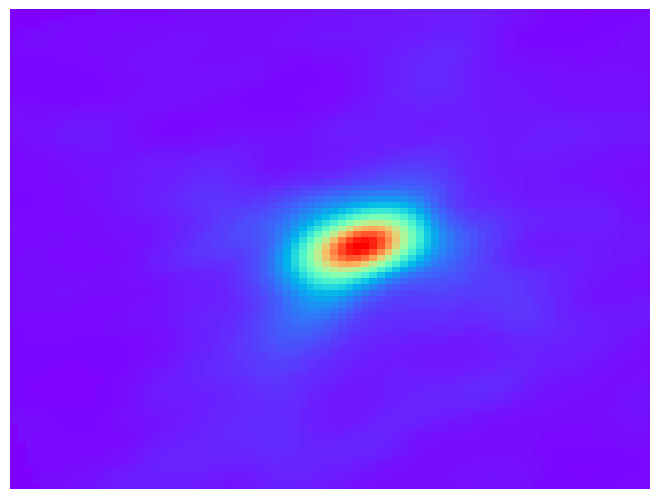

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

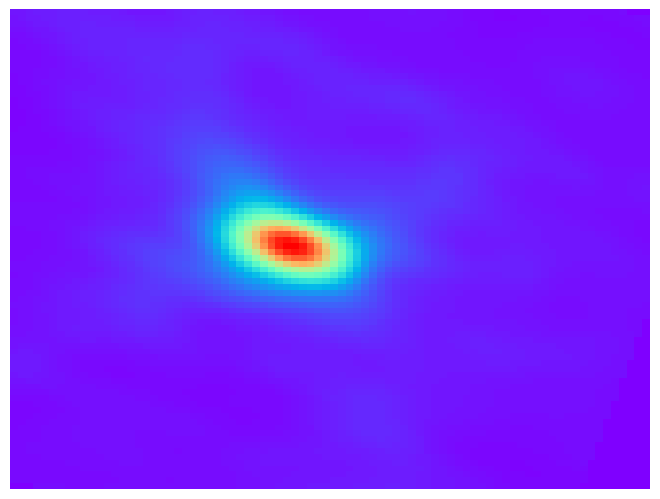

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

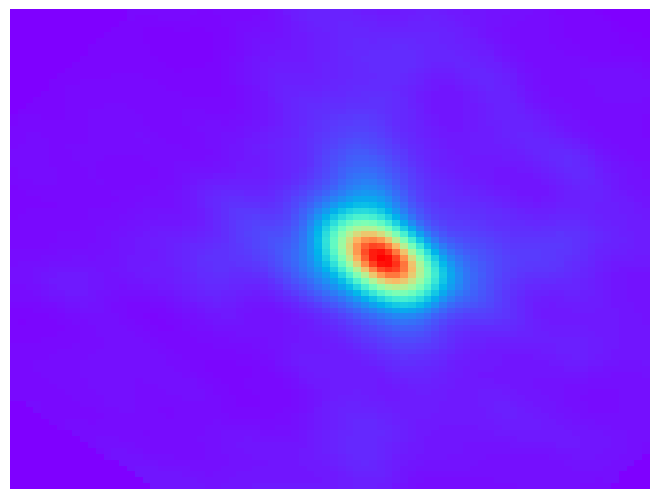

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

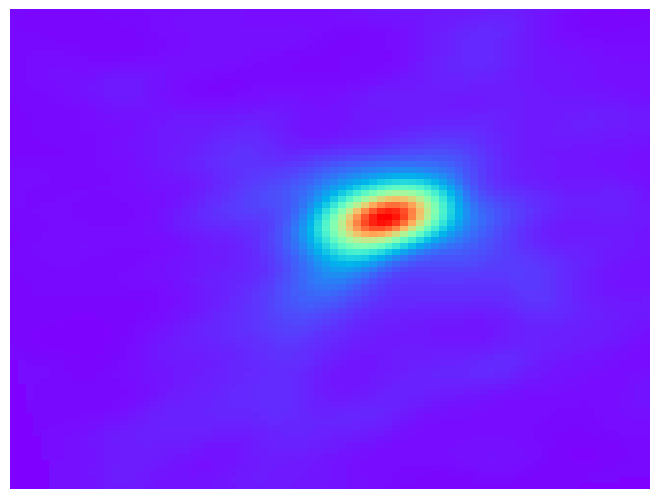

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

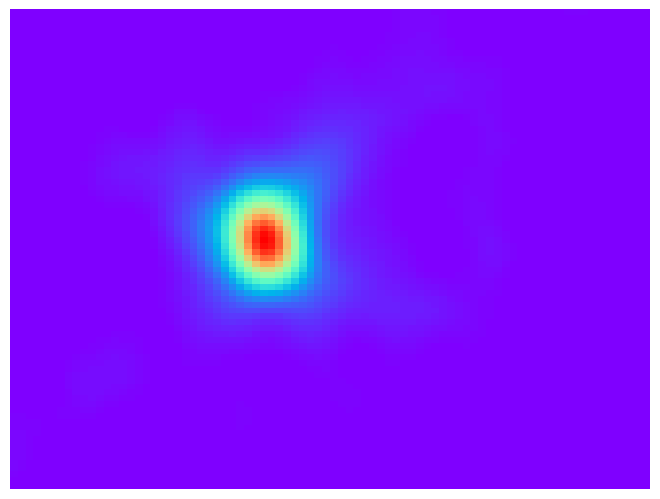

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

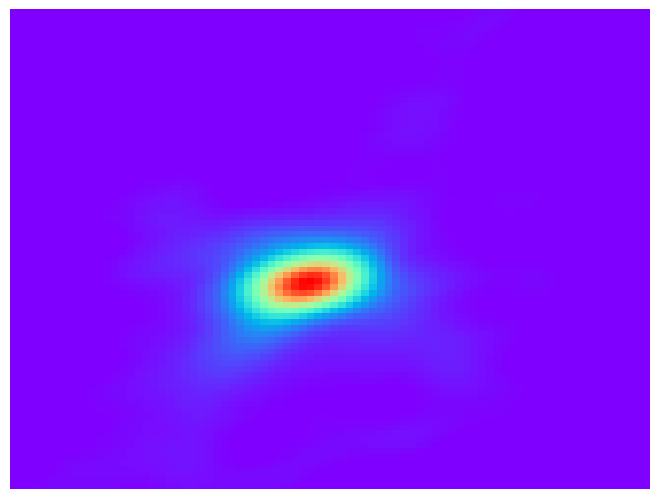

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

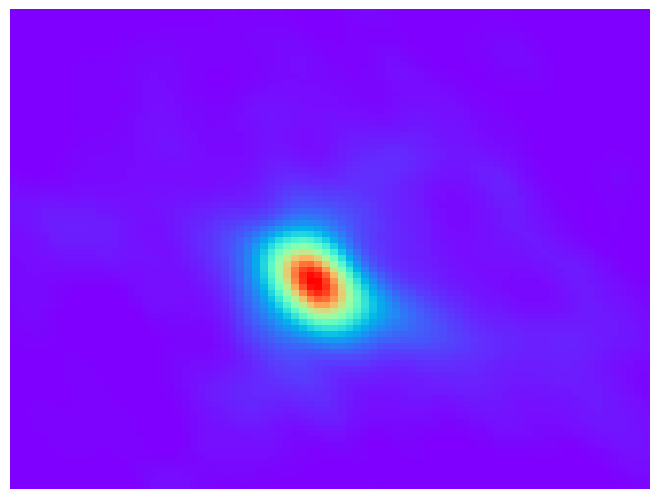

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

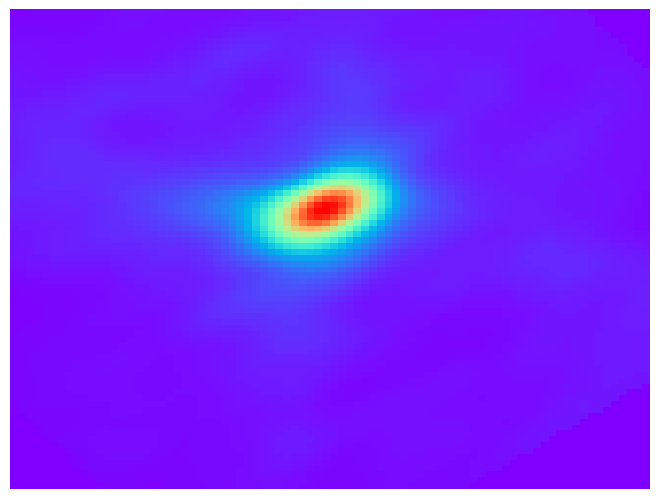

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

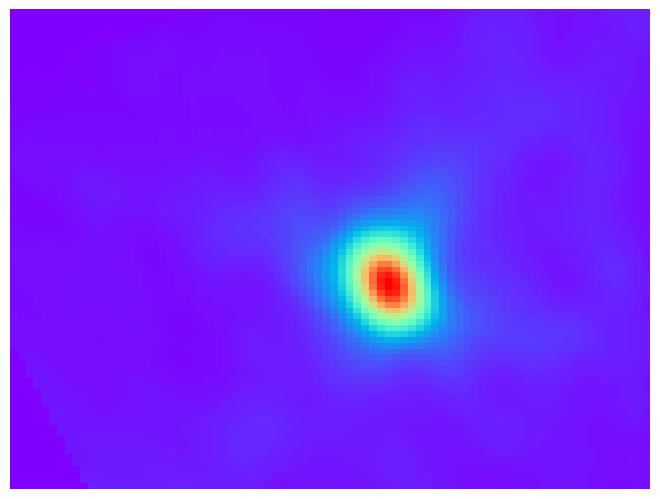

In [25]:
# This function generates the positive dataset
def generate_pos_dataset(augmentations_per_gaussian):
    count = 0
    pos_dataset = np.array([])
    for gaussian in gaussians:
        for i in range(0, augmentations_per_gaussian):
            zscale = ZScaleInterval(contrast=0.25, nsamples=1)
            # Augment the data and add it to the dataset as png
            # plt.imshow(zscale(augment(gaussian.data)),
                        # origin='lower', cmap='rainbow')
            # plt.colorbar()
            # plt.title("Augmented gaussian")
            # plt.show()


            plt.figure()
            plt.figure(figsize=(im_size, im_size), dpi=100)
            
            fig = plt.figure(frameon=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            ax.imshow(zscale(augment(gaussian.data)),
                      origin='lower', cmap='rainbow', aspect='auto')
            open('data/pos_dataset/pos_{}.png'.format(count), 'w').close()
            fig.savefig('data/pos_dataset/pos_{}.png'.format(count))
            count += 1

            # pos_dataset.append(zscale(augment(gaussian.data)))
            # np.append(pos_dataset, zscale(augment(gaussian.data)))
            print("Appending to positive dataset")
    return pos_dataset

generate_pos_dataset(50)

Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian


C:\Users\peter\AppData\Local\Temp\ipykernel_7916\2709794764.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(frameon=False)


Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
Appended negative gaussian
A

array([], dtype=float64)

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

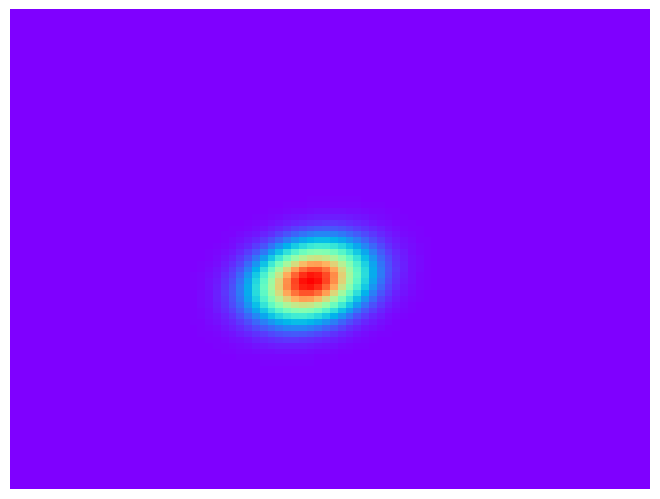

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

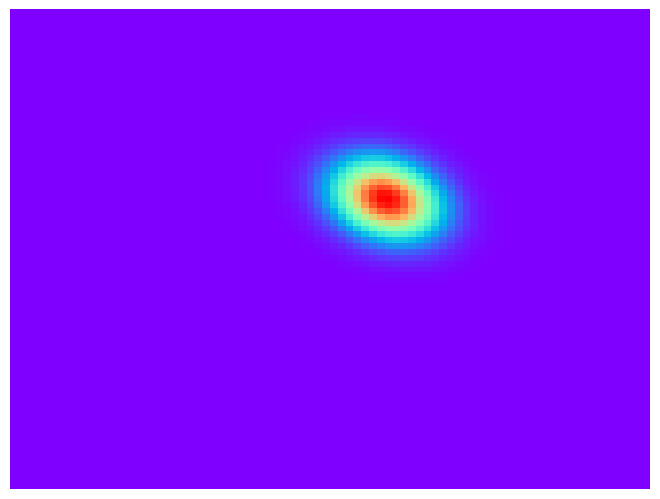

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

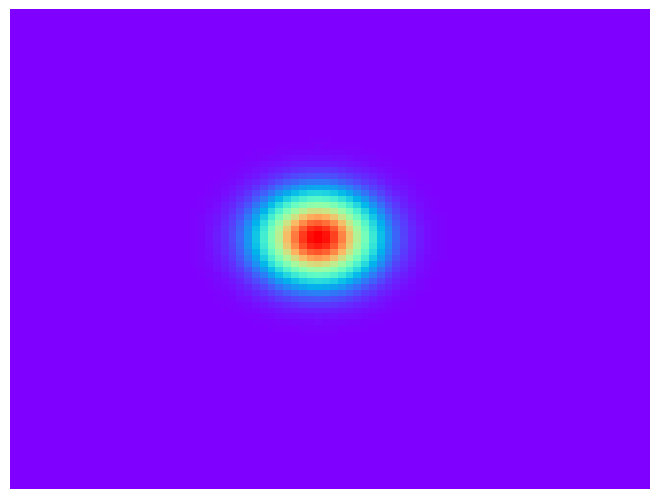

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

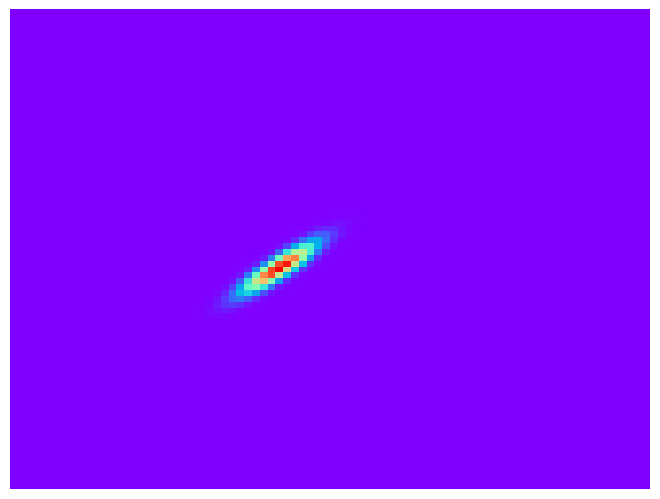

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

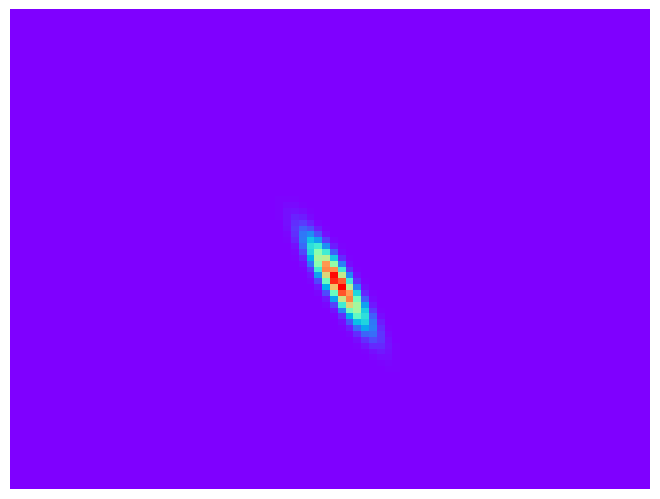

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

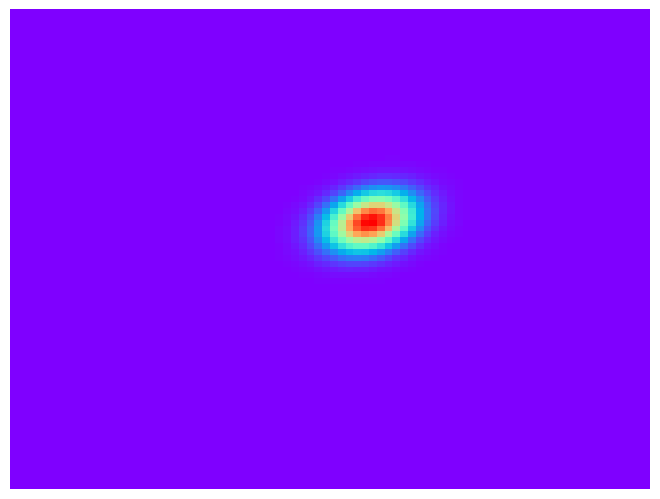

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

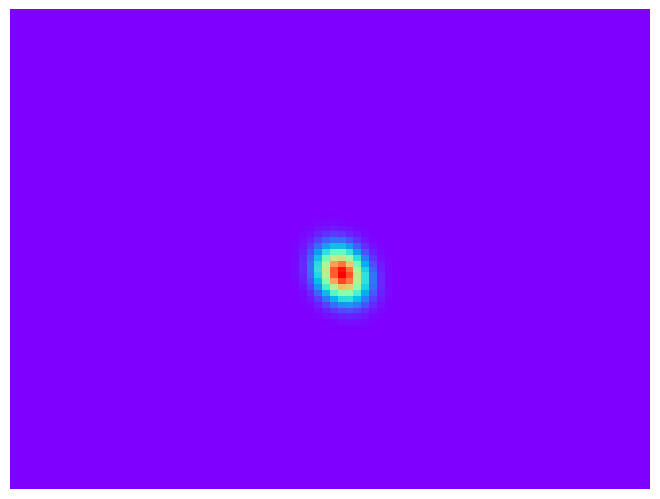

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

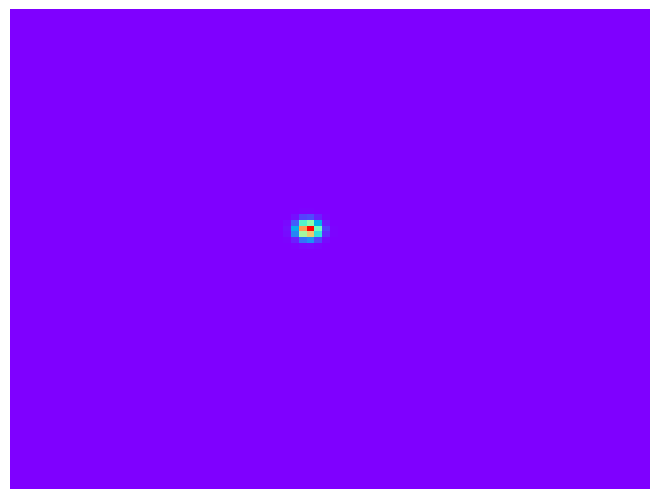

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

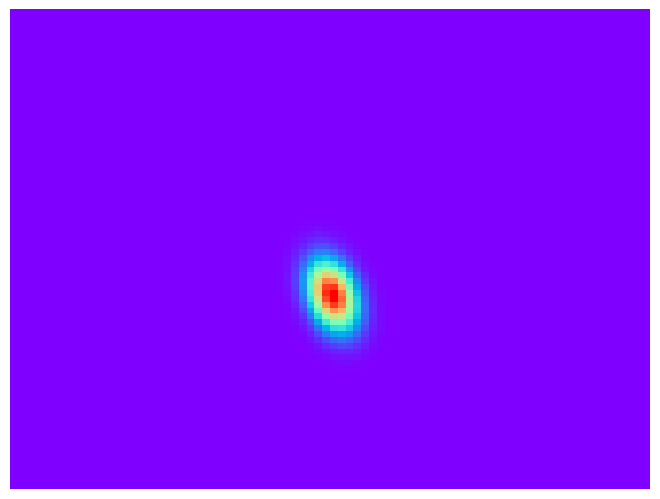

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

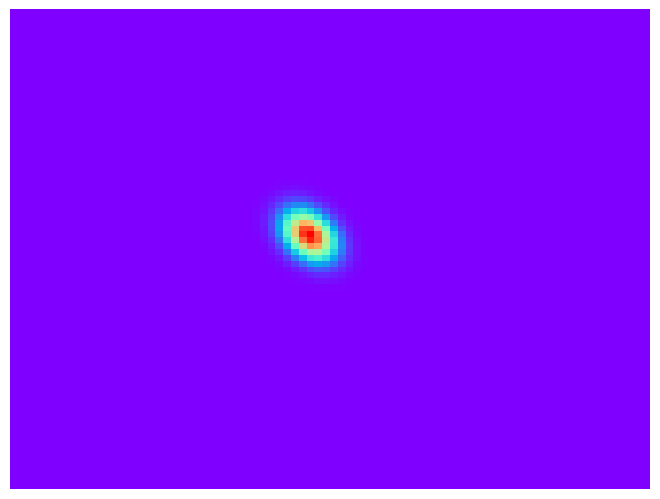

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

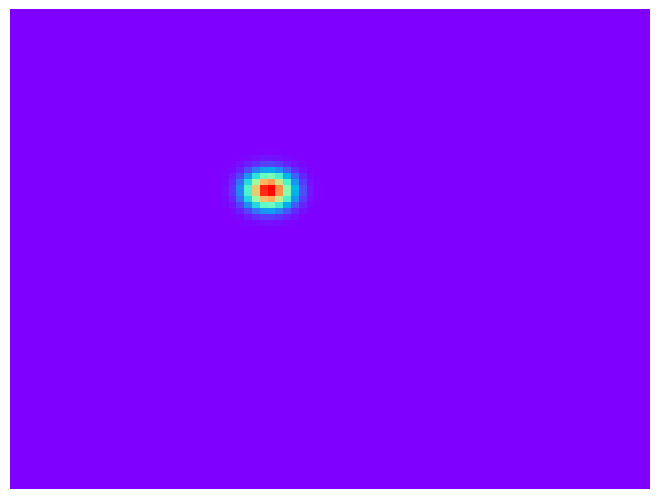

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

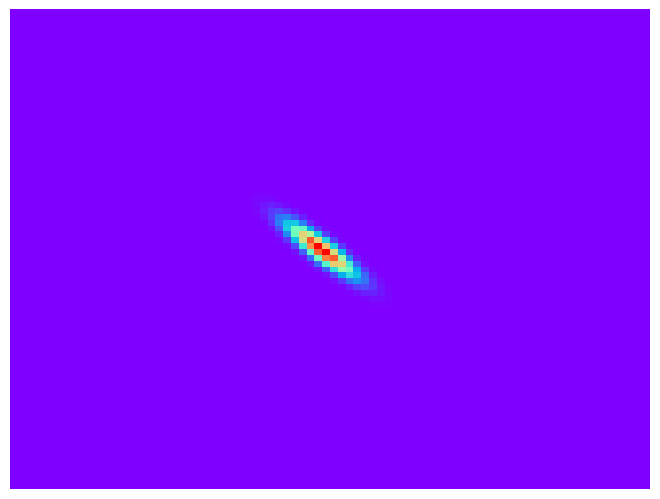

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

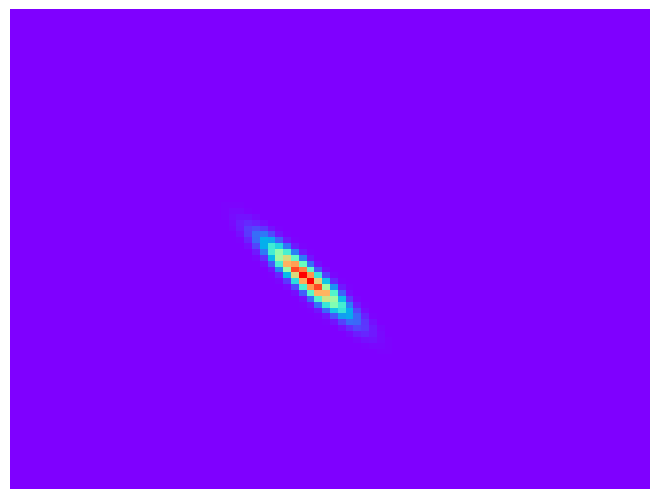

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

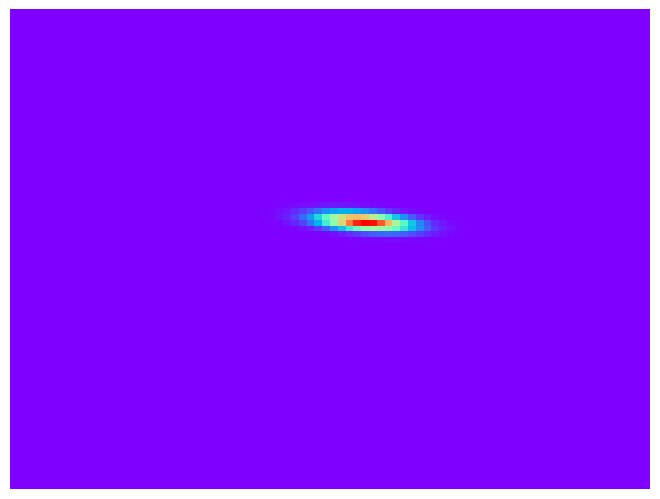

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

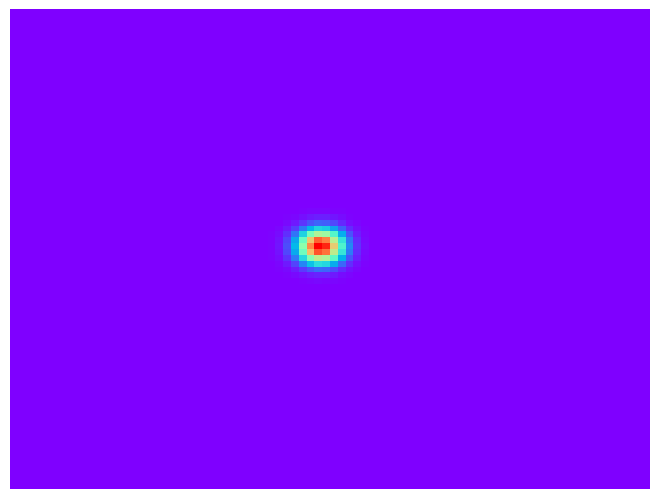

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

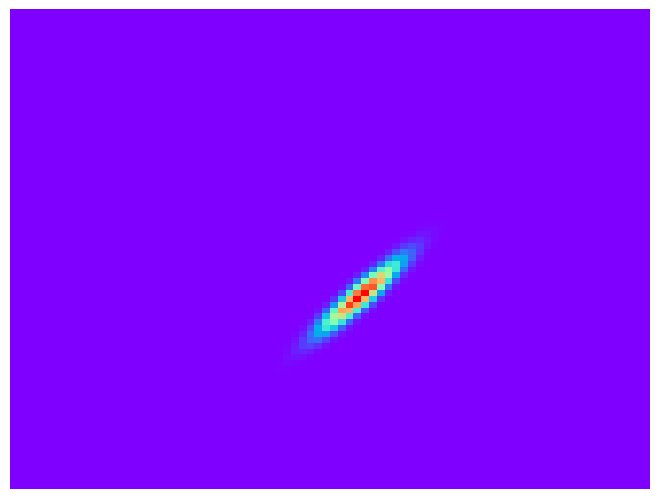

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

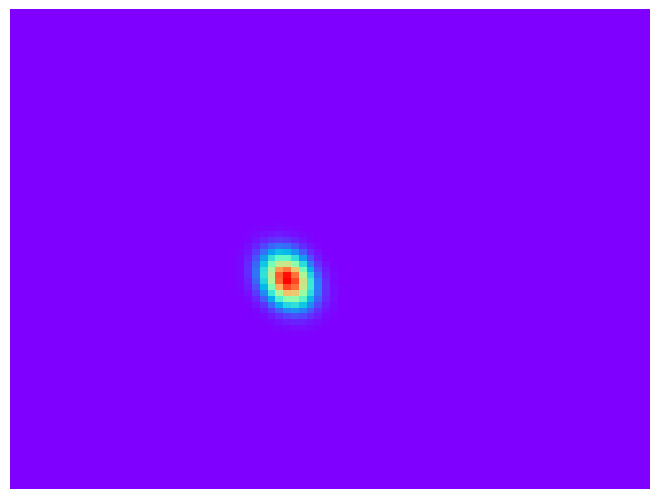

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

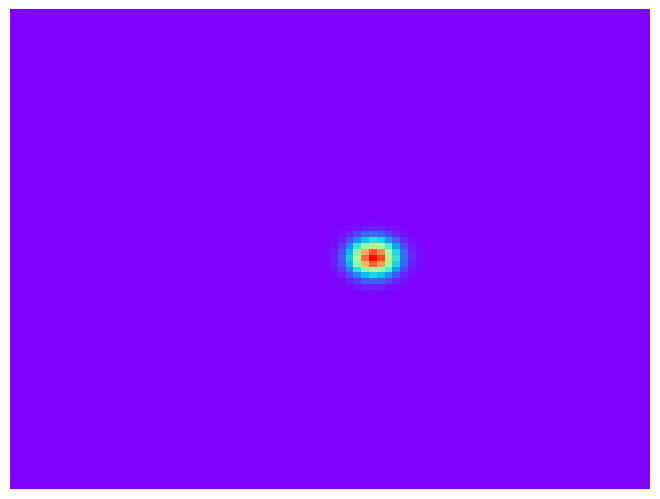

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

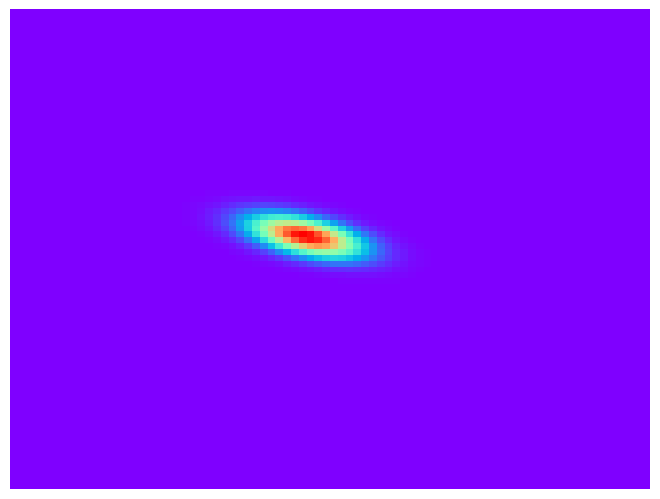

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

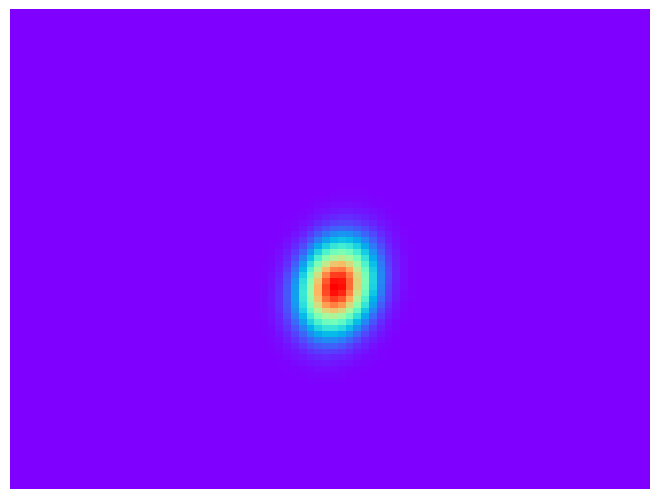

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

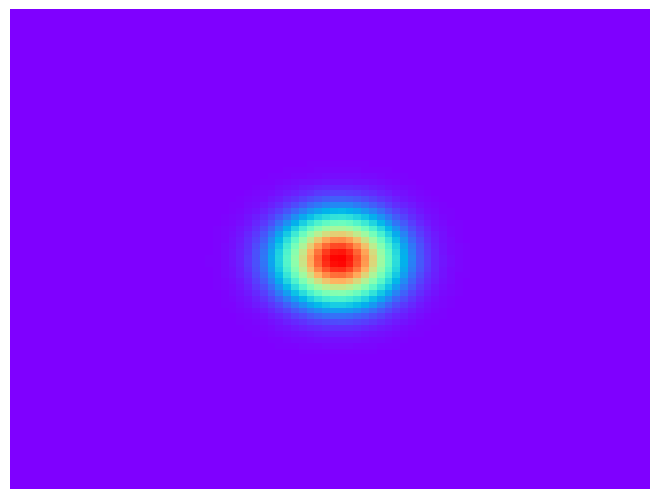

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

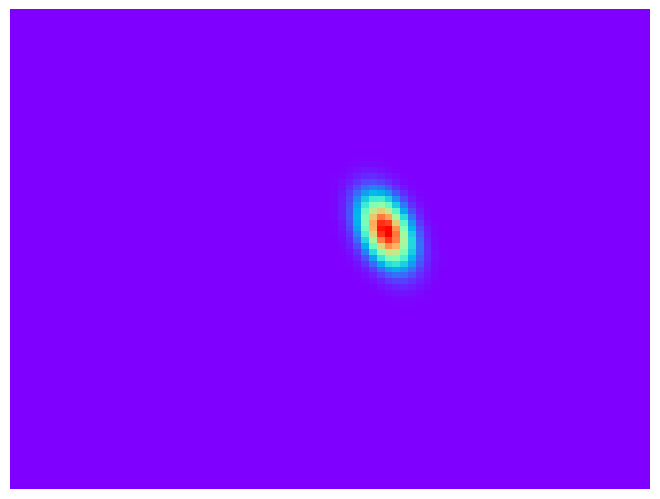

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

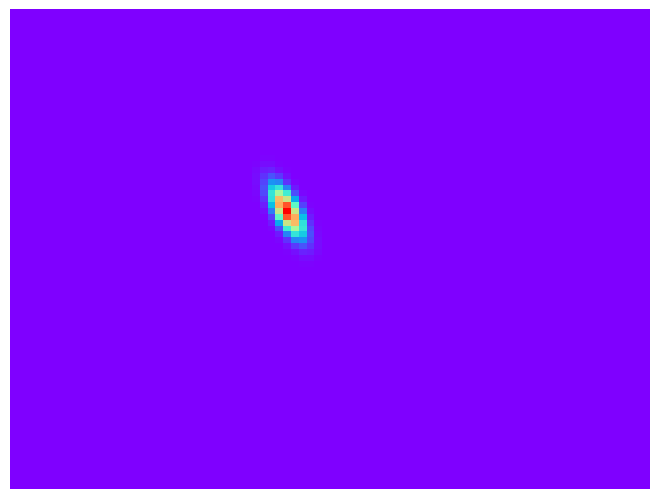

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

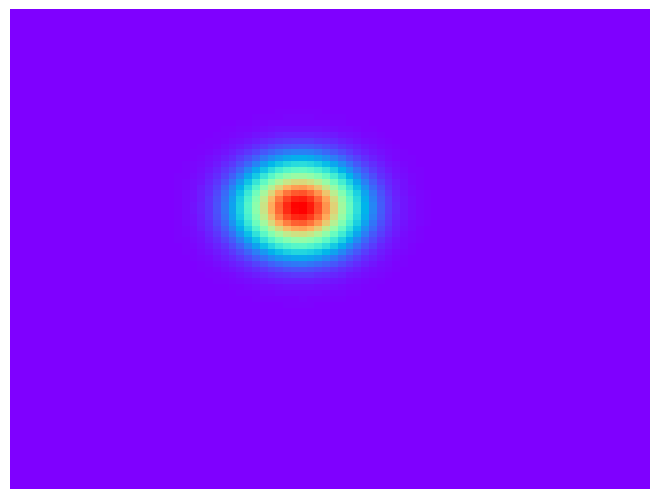

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

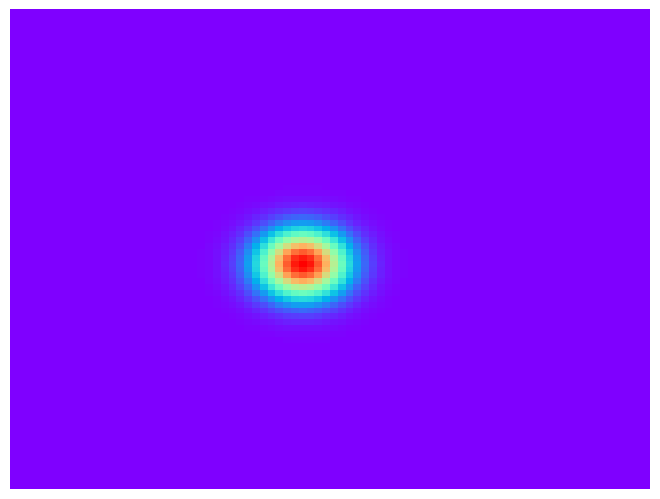

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

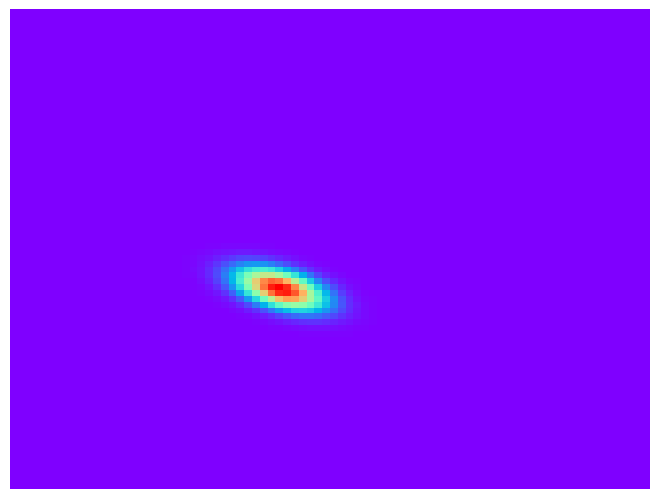

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

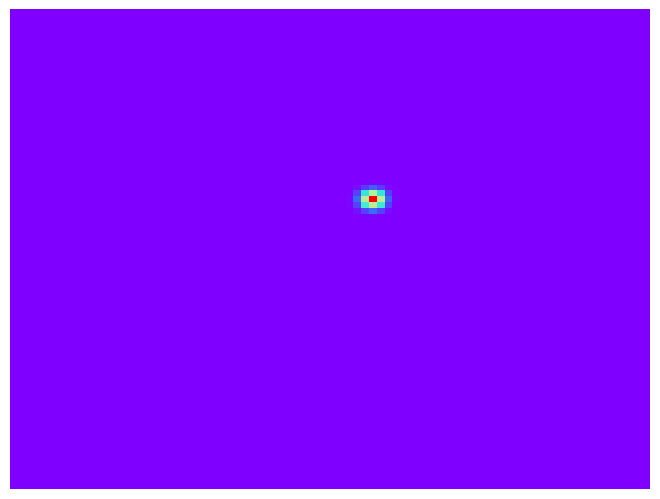

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

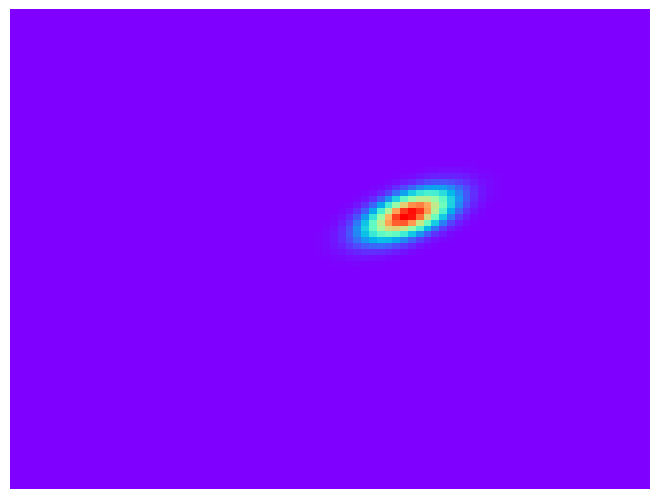

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

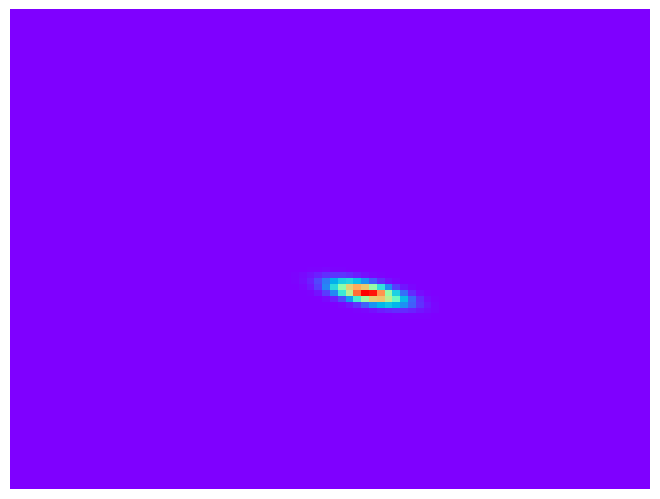

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

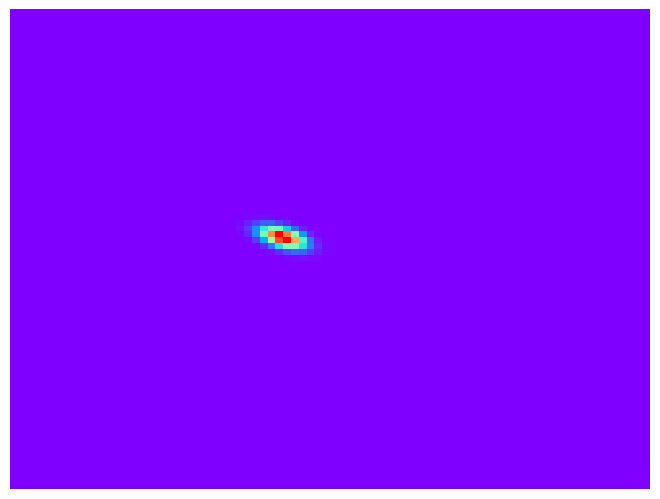

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

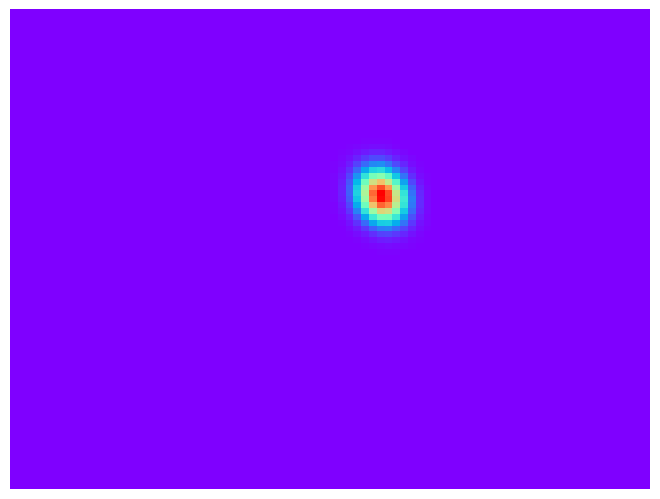

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

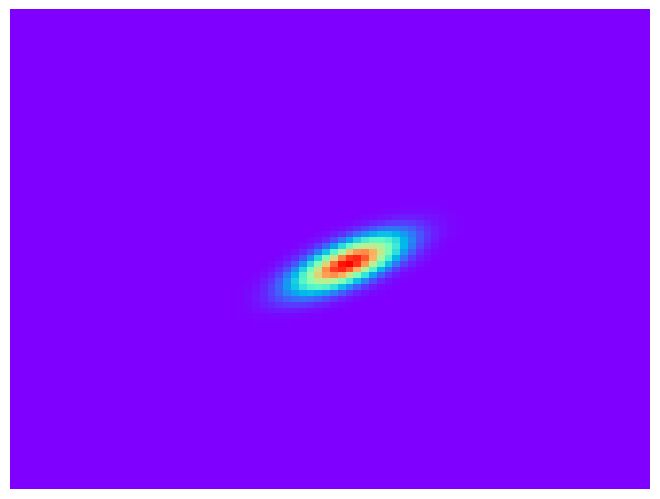

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

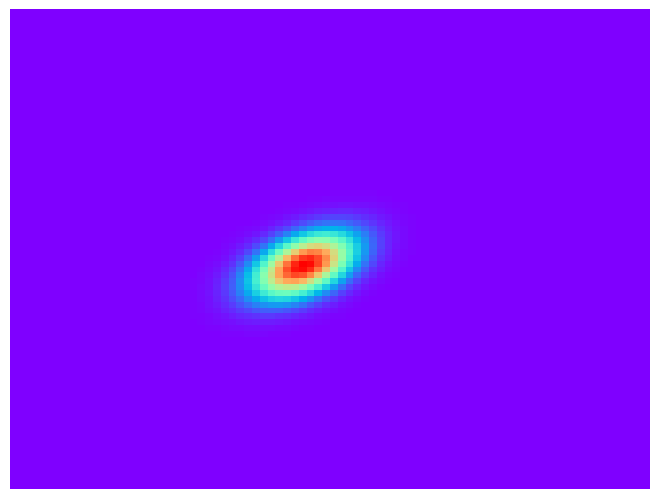

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

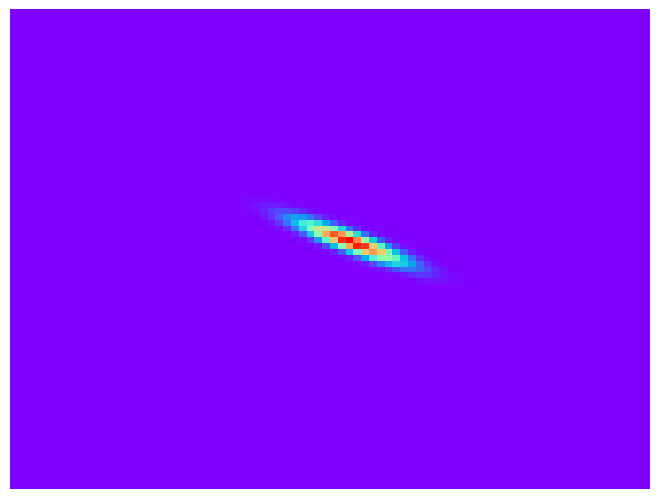

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

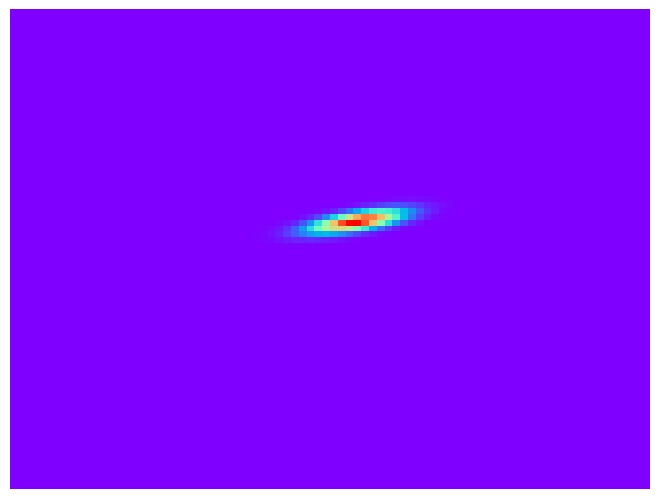

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

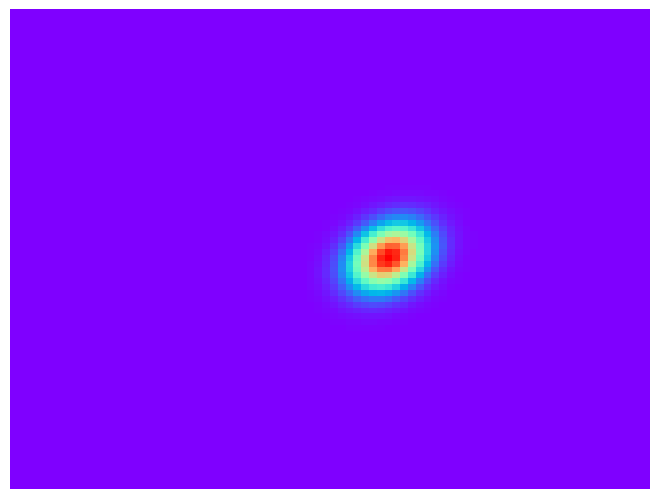

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

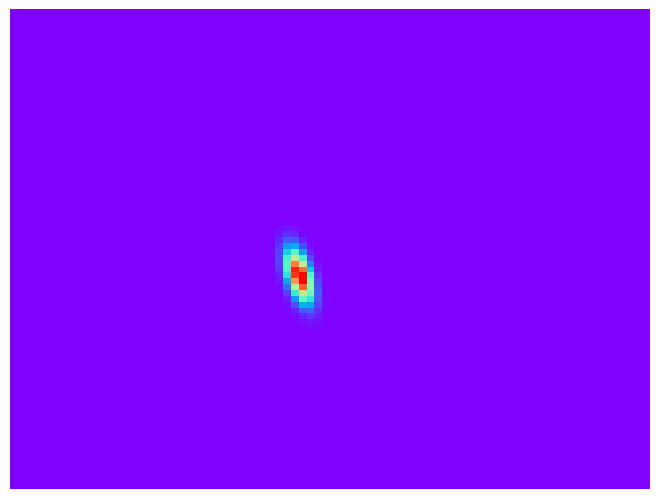

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

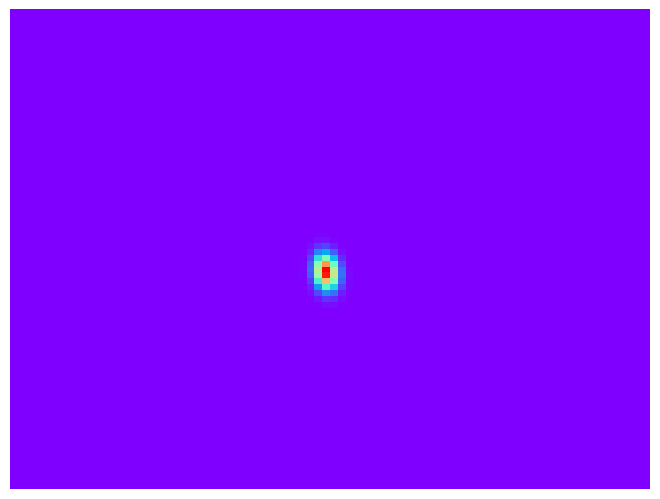

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

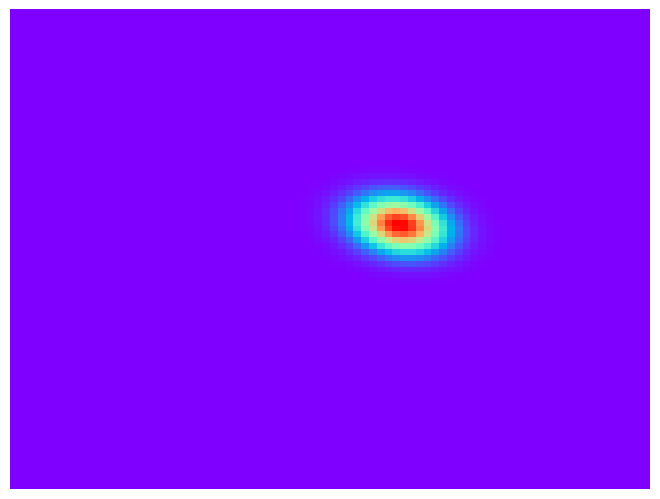

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

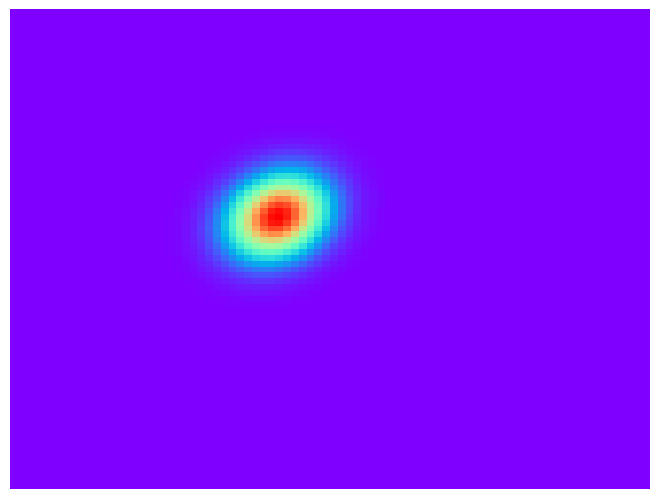

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

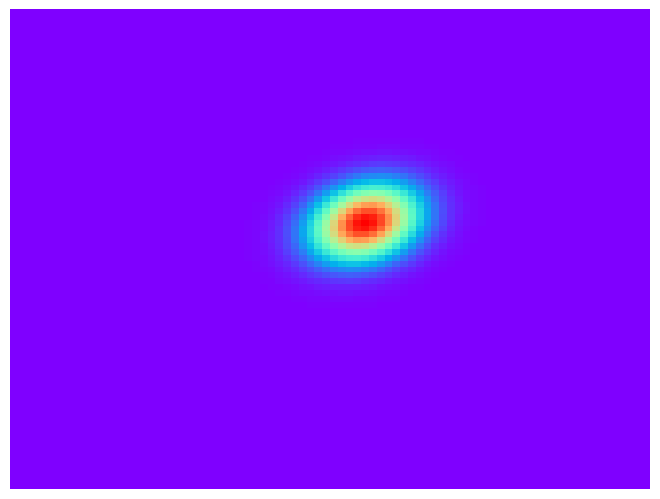

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

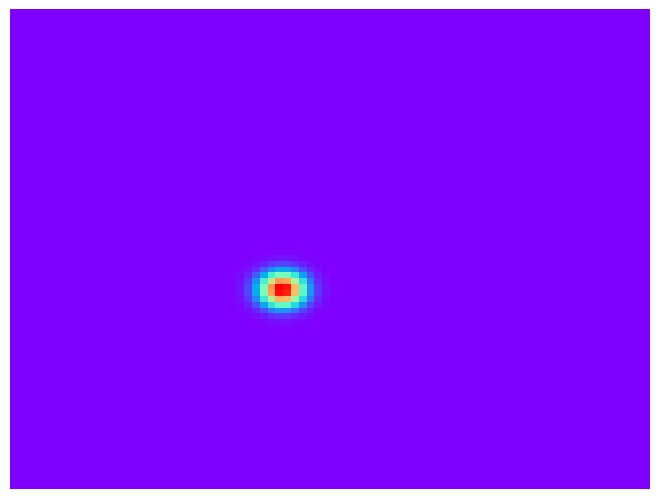

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

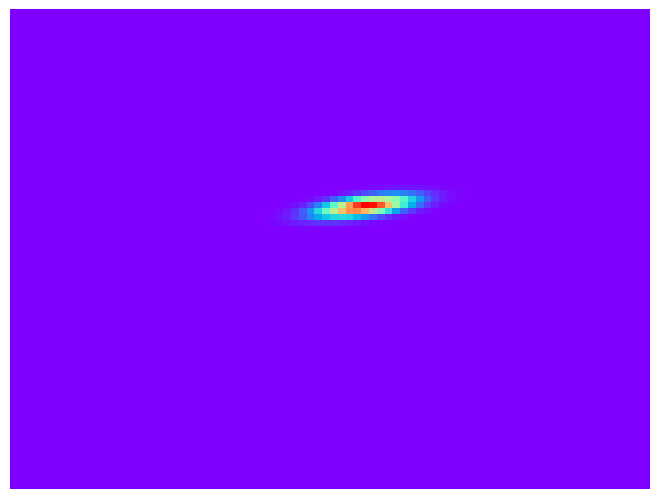

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

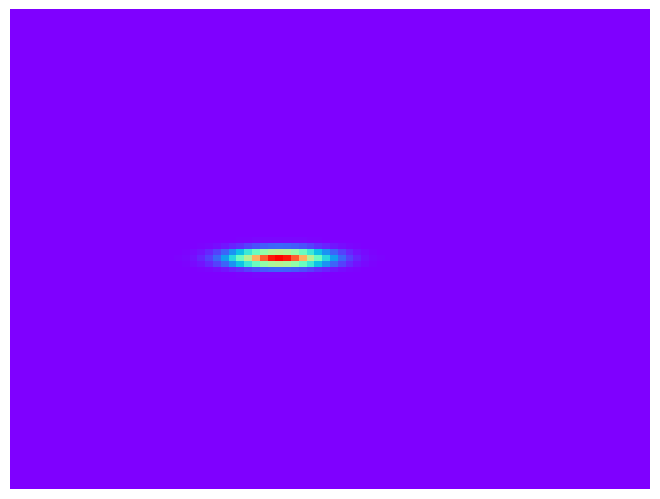

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

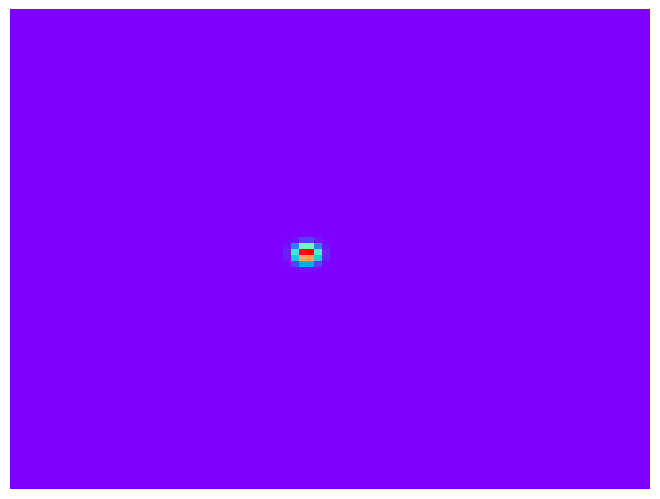

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

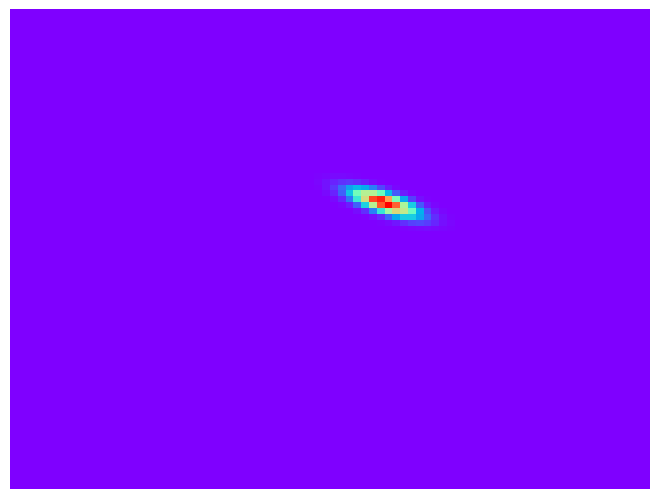

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

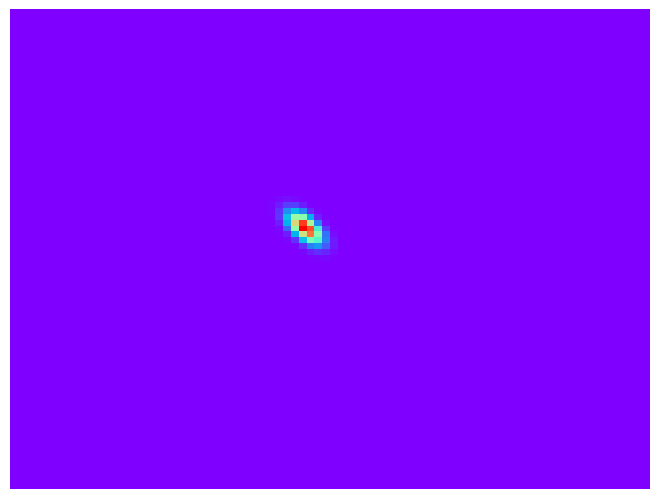

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

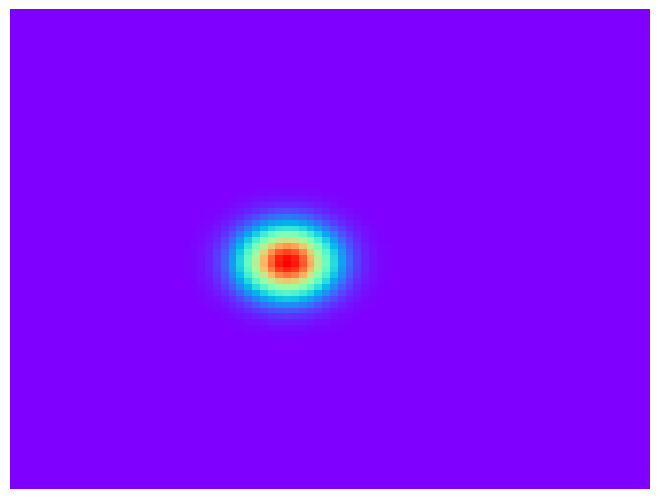

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

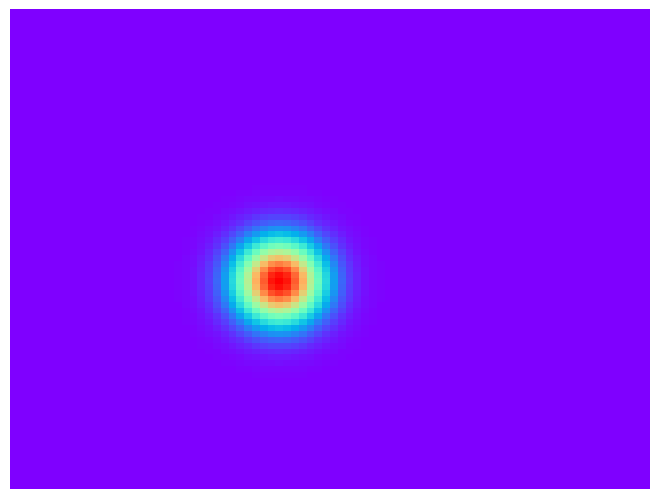

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

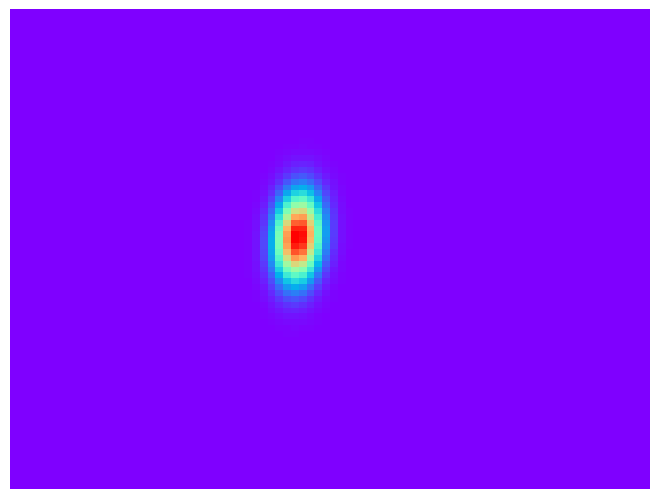

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

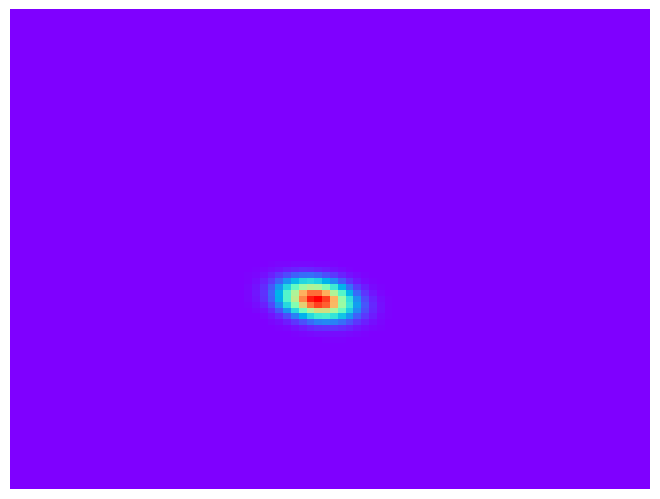

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

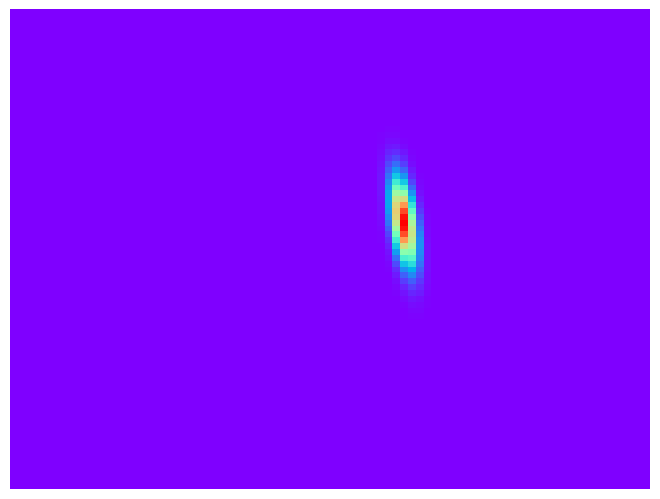

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

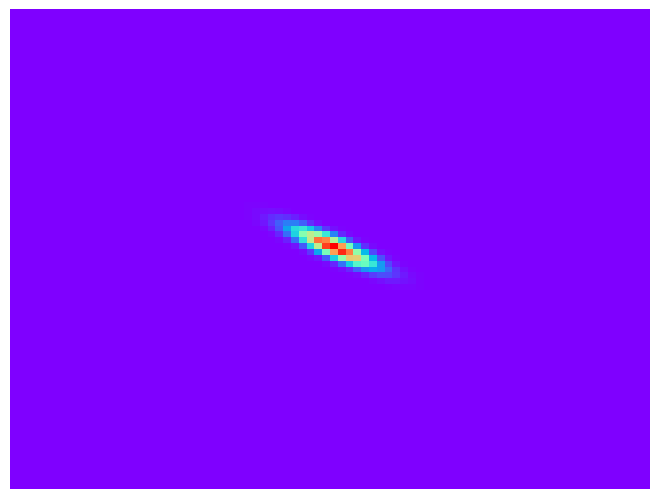

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

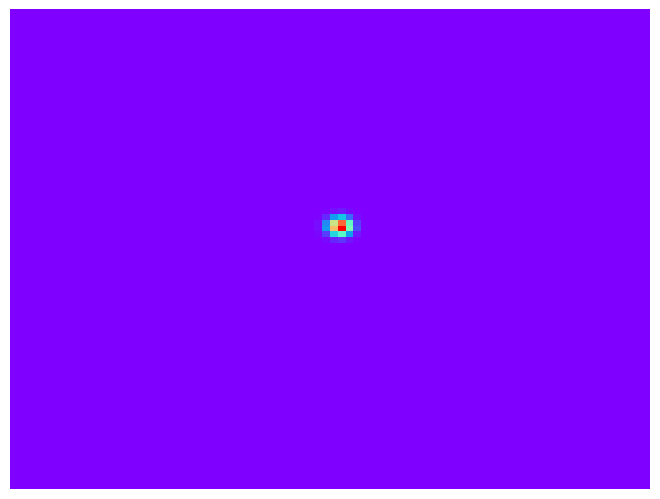

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

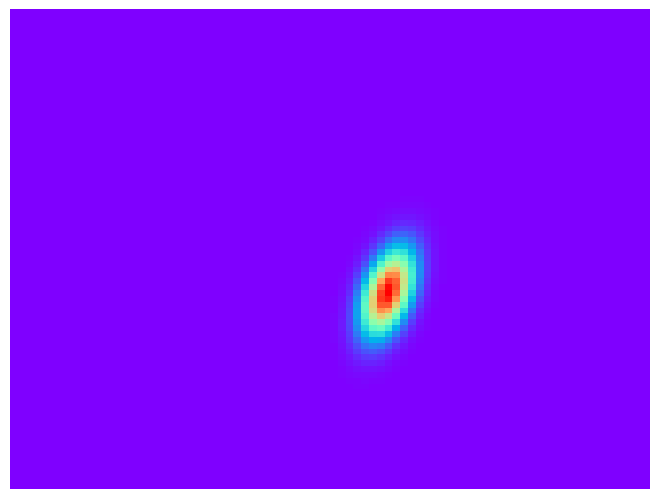

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

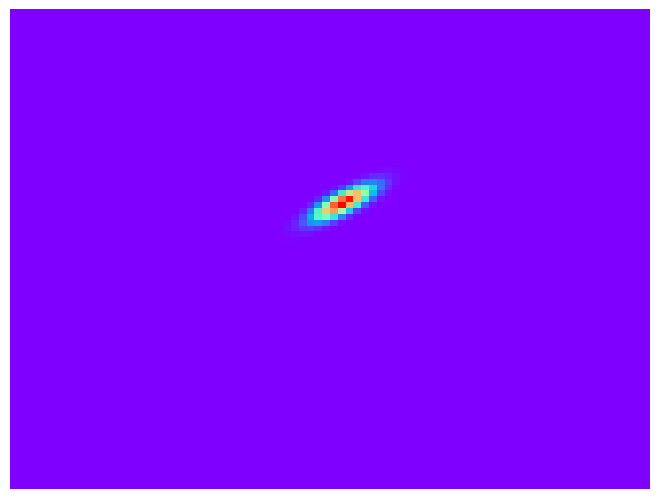

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

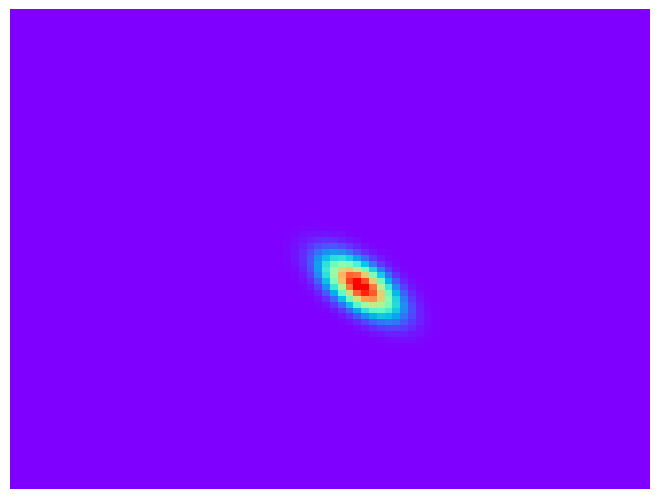

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

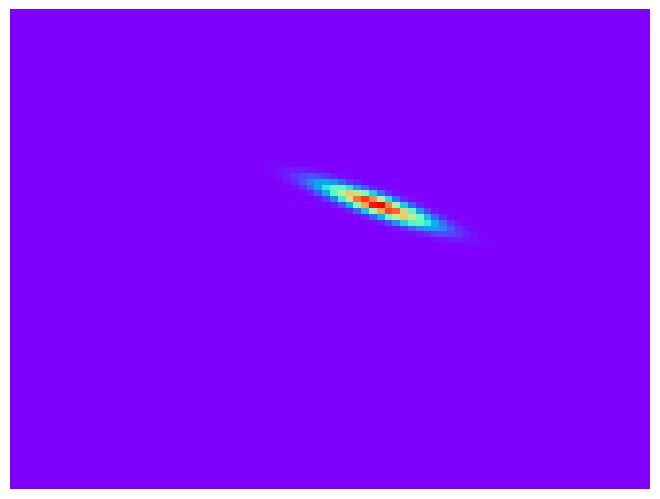

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

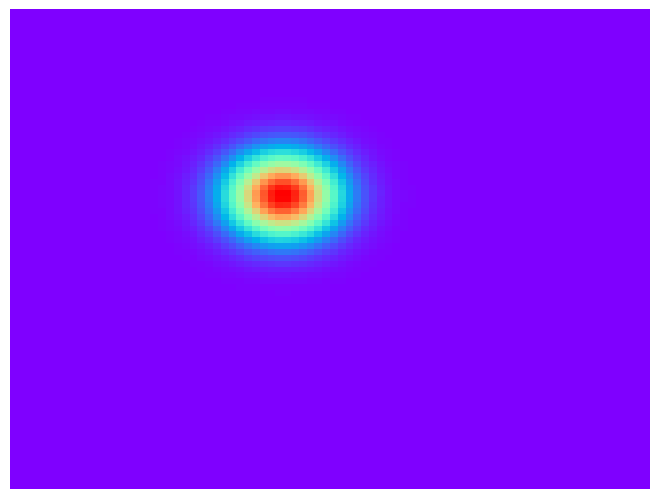

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

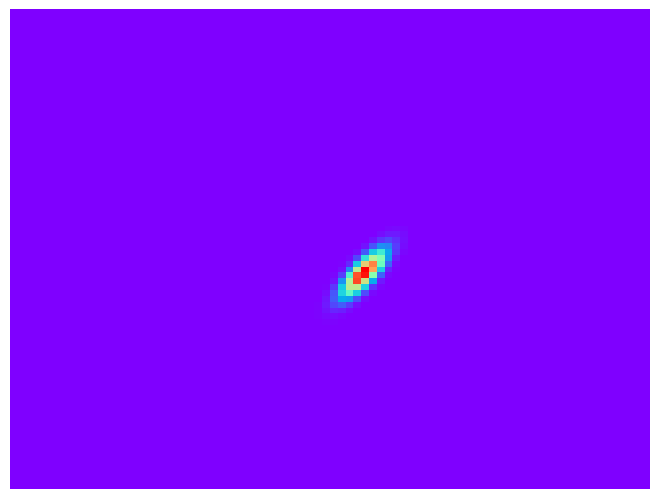

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

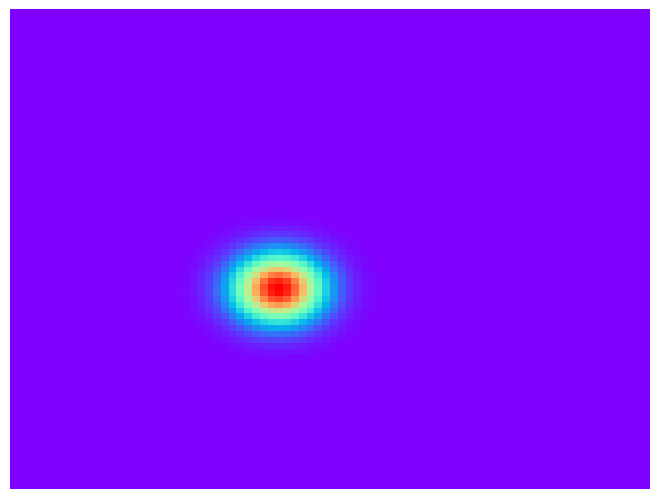

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

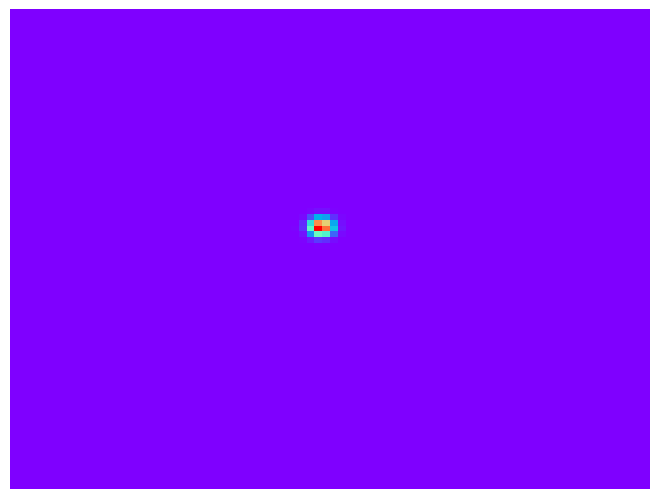

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

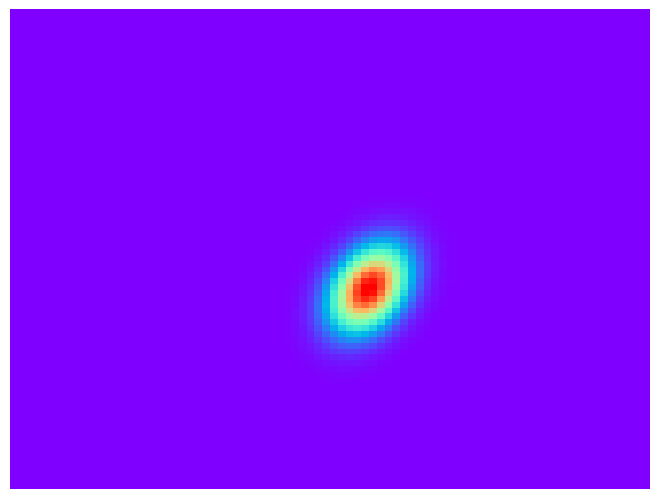

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

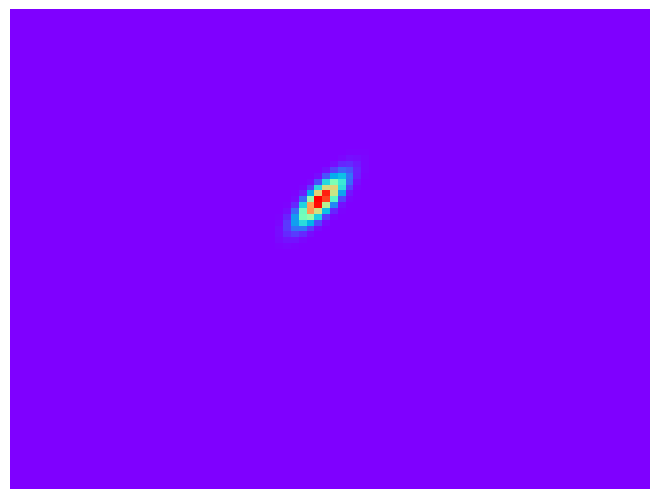

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

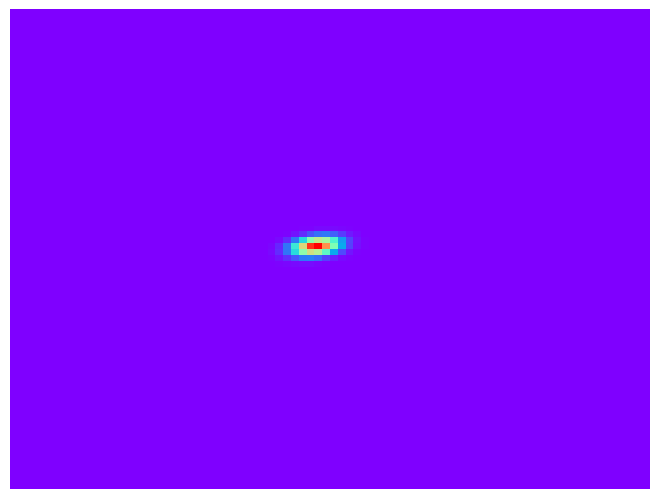

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

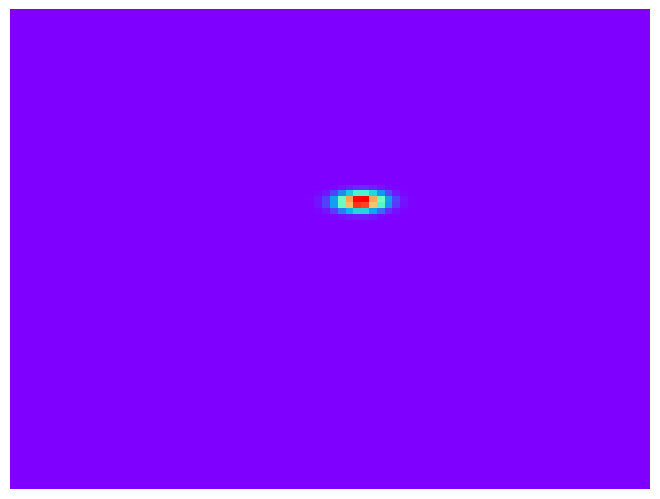

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

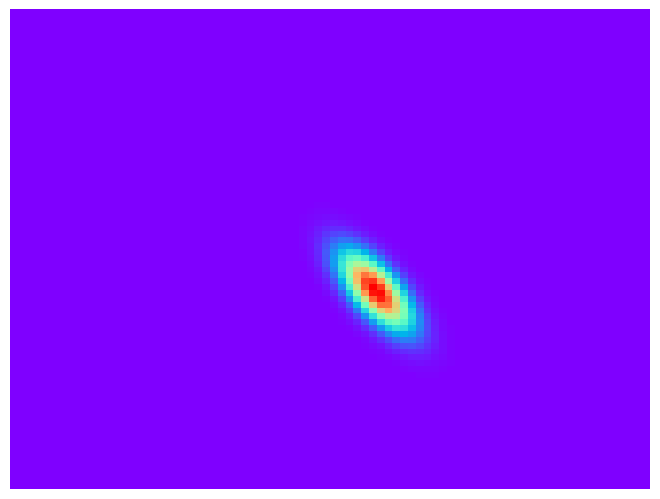

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

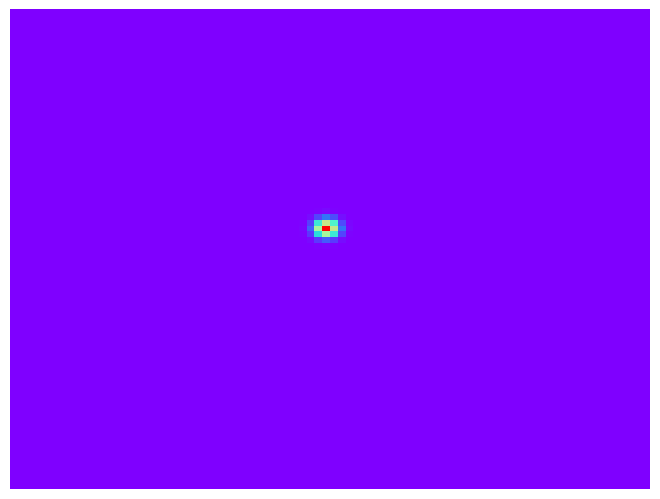

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

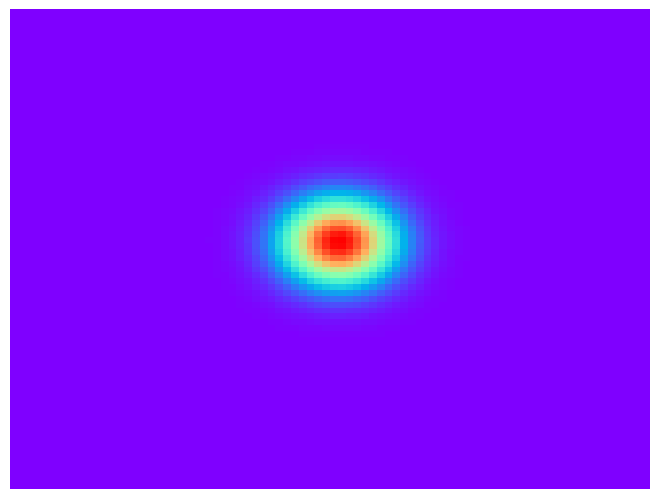

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

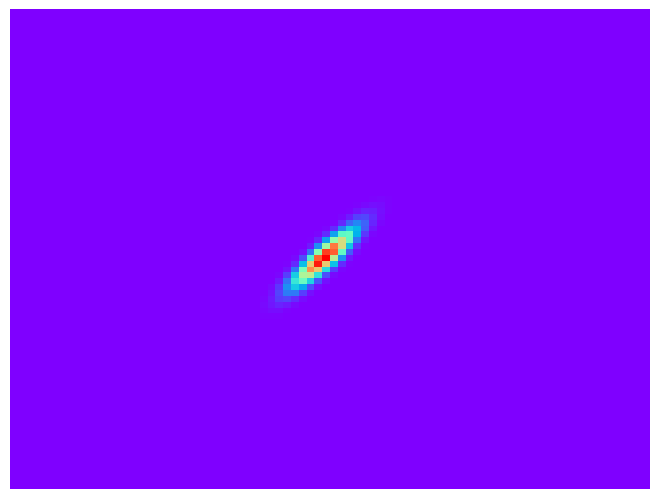

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

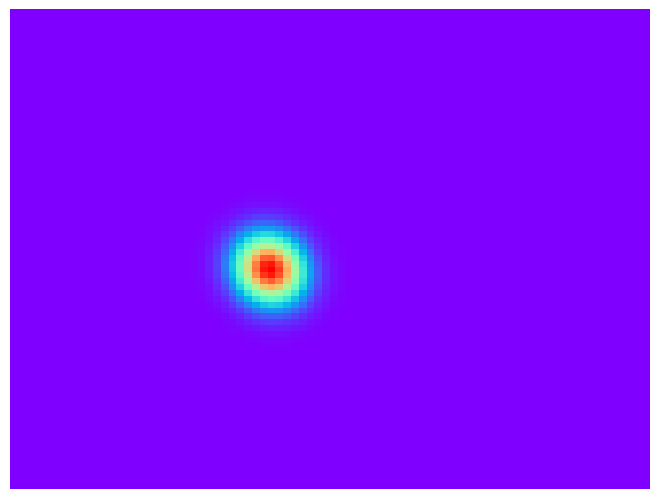

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

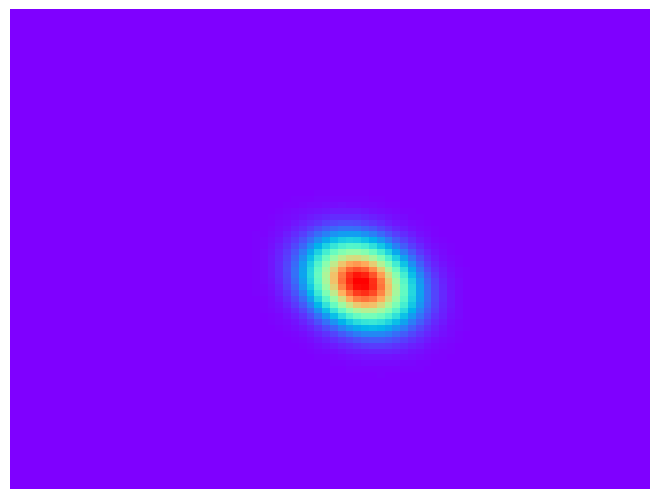

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

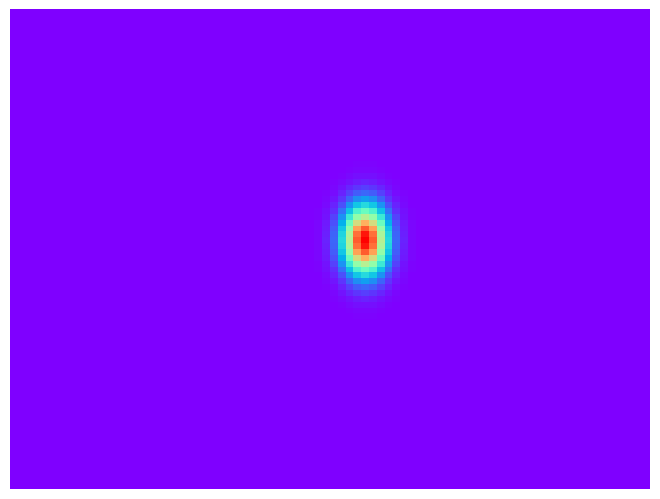

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

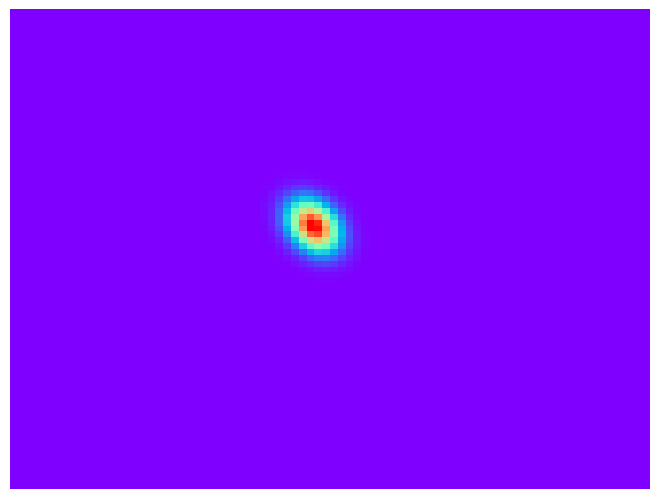

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

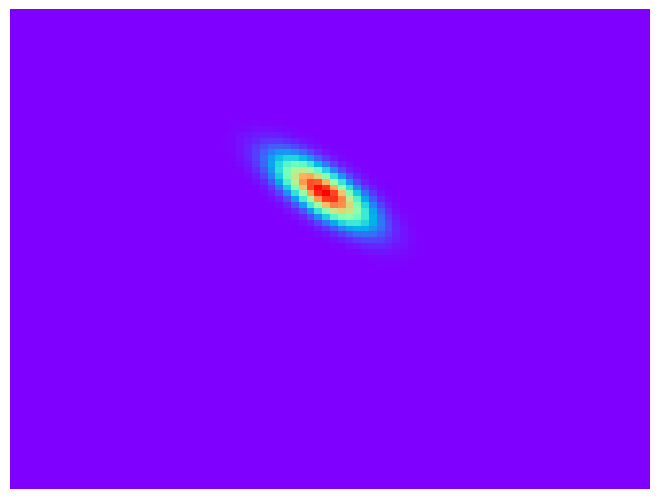

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

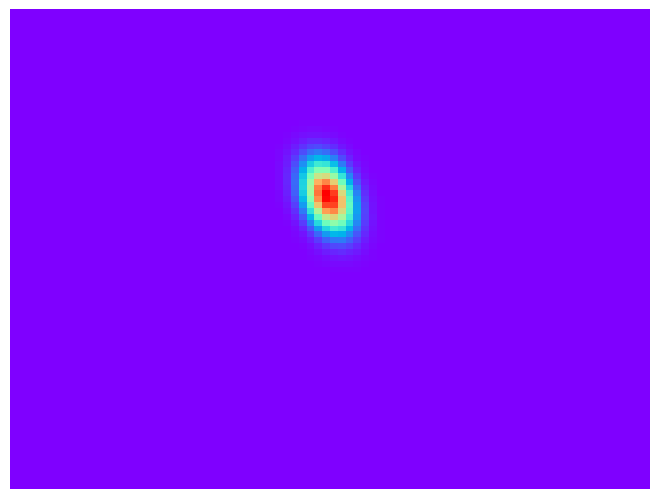

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

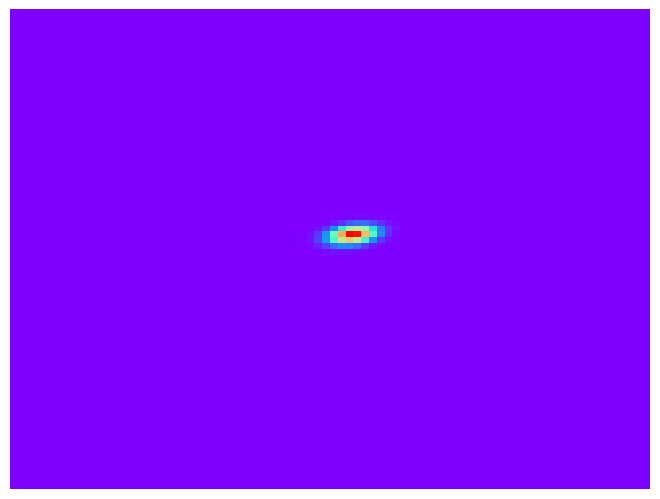

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

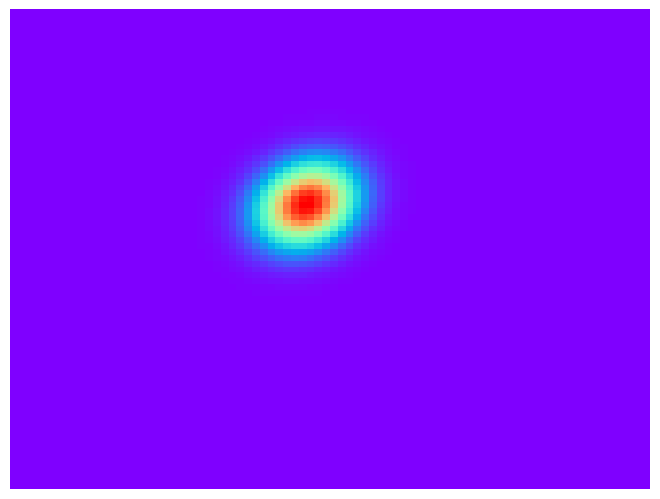

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

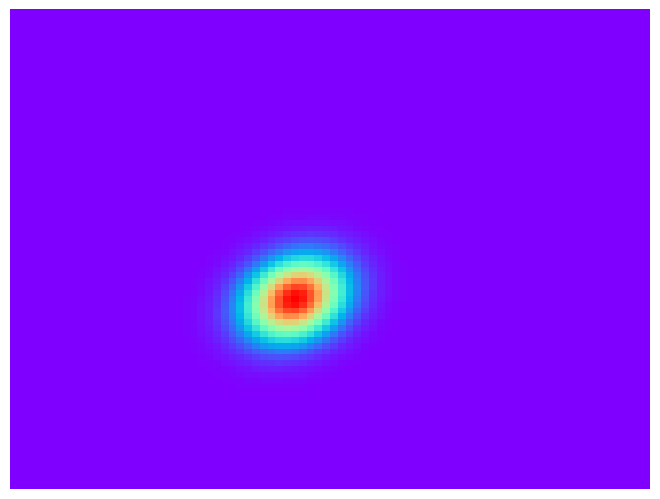

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

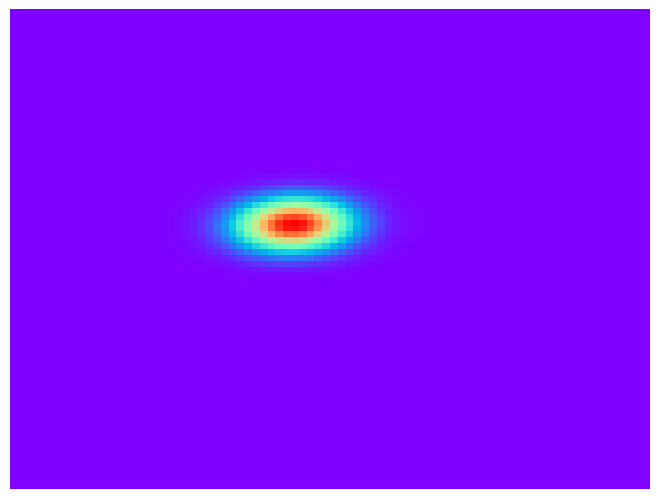

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

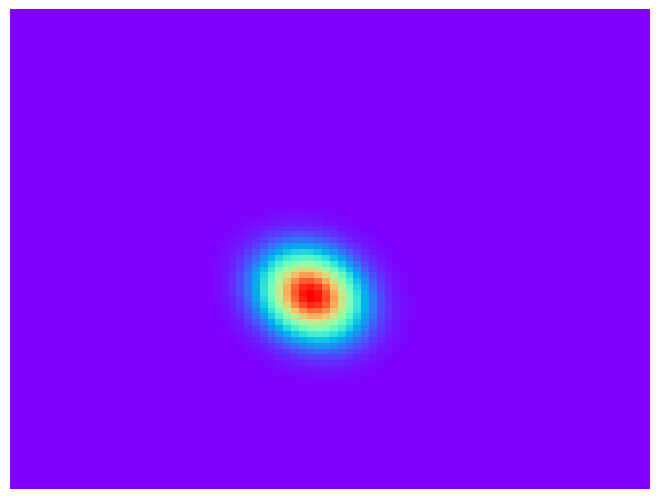

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

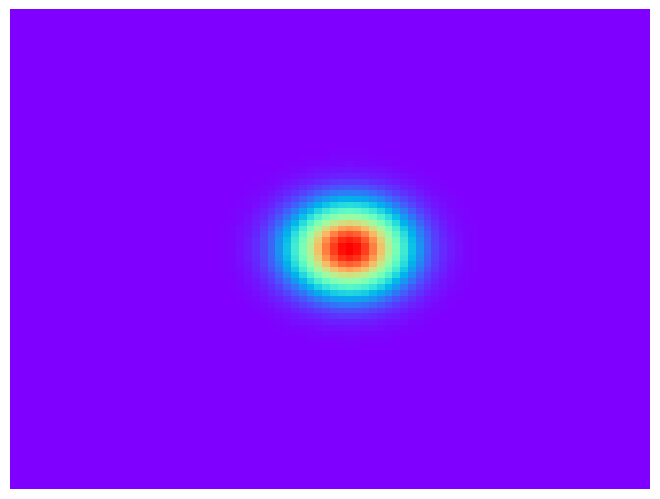

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

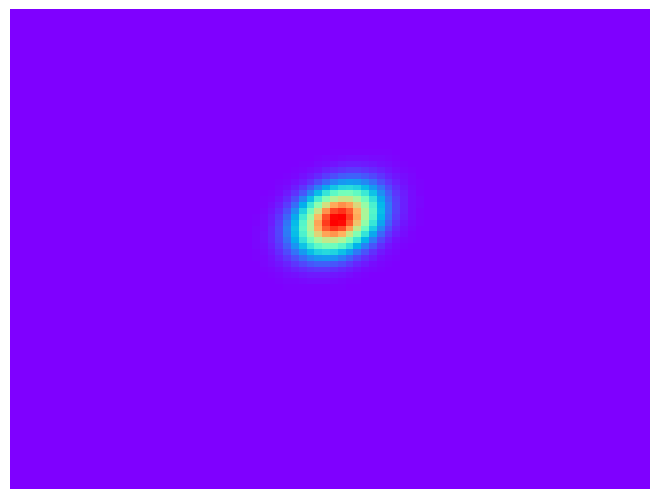

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

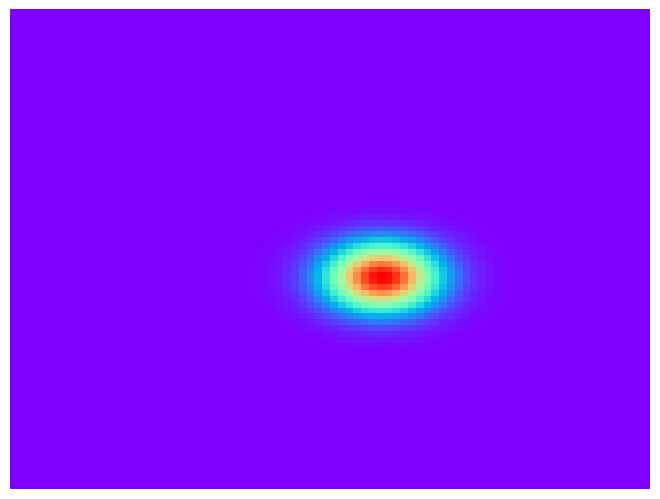

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

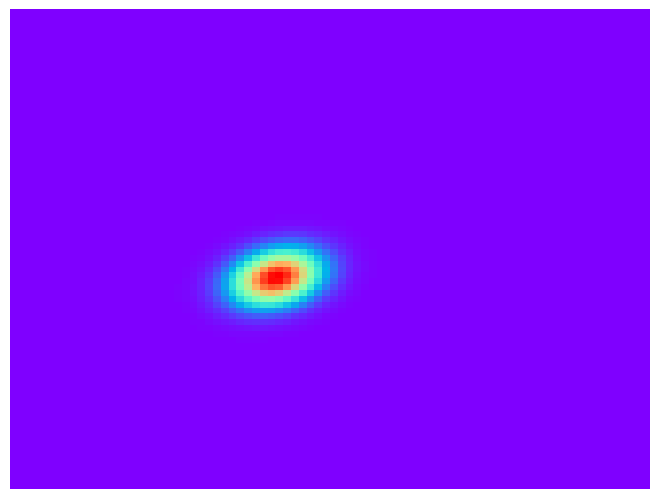

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

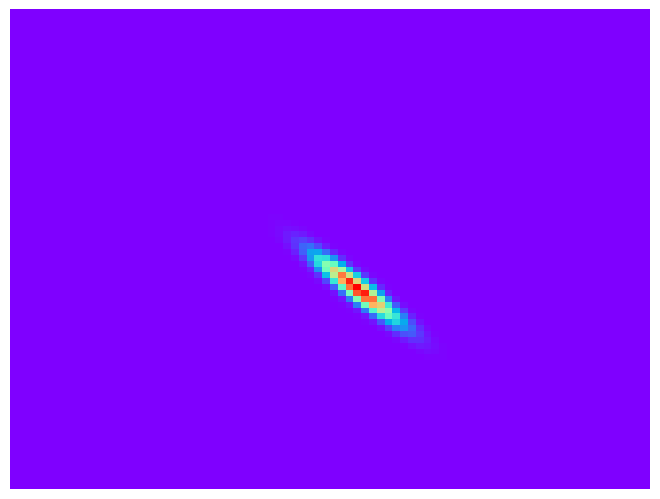

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

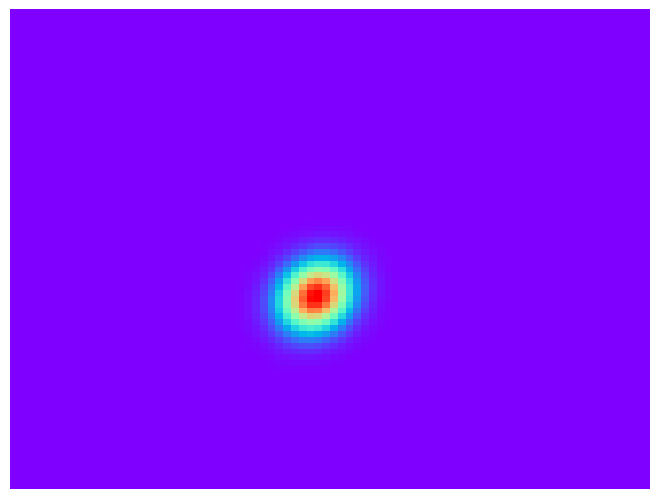

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

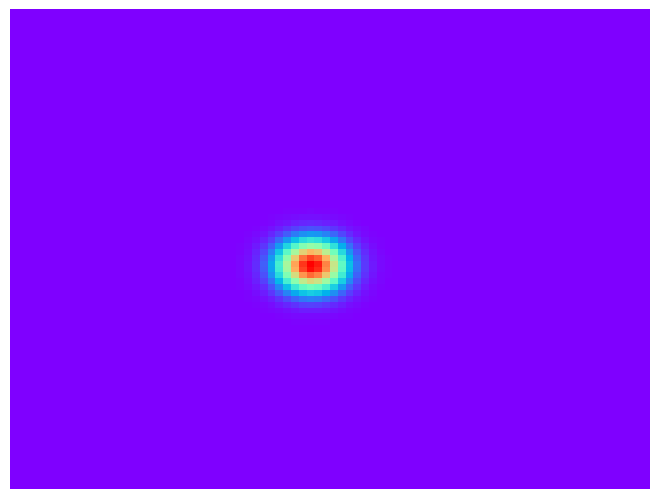

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

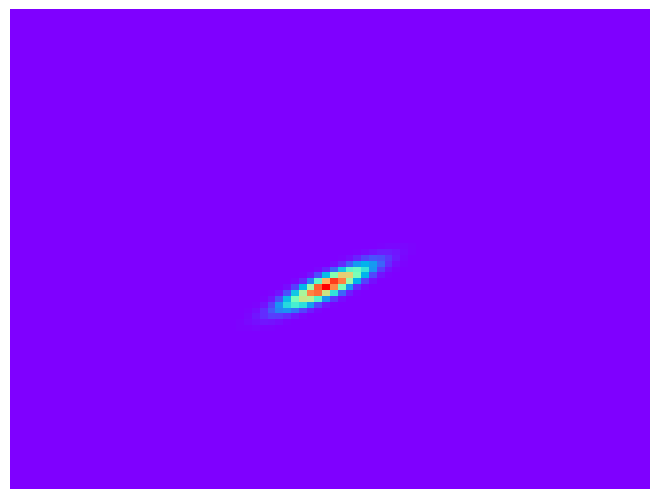

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

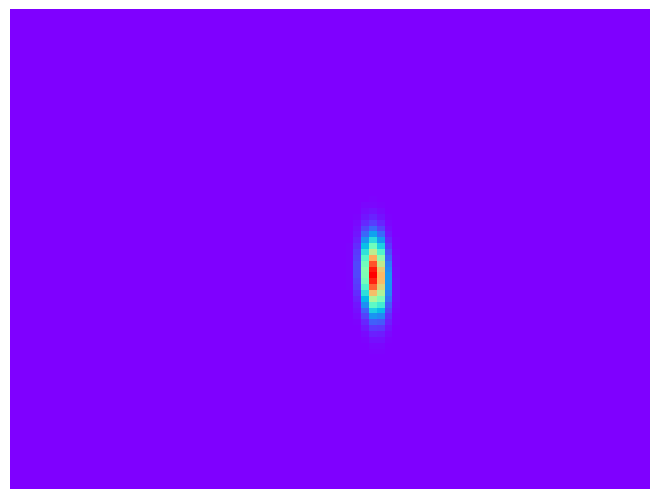

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

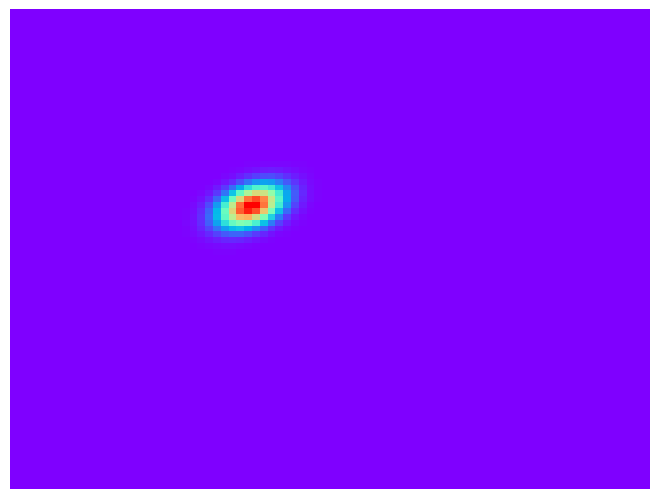

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

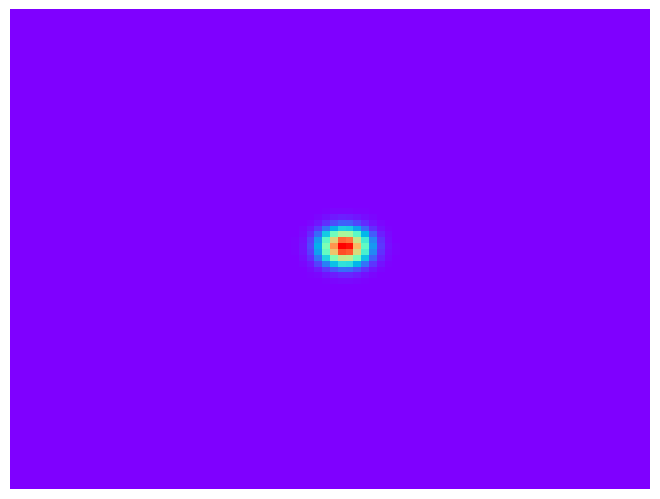

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

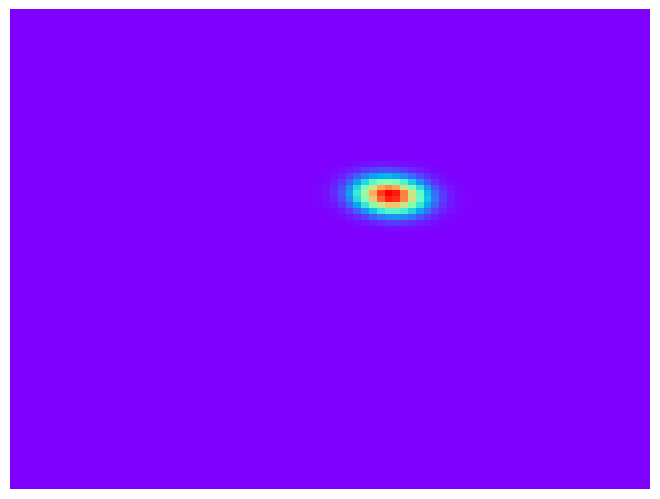

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

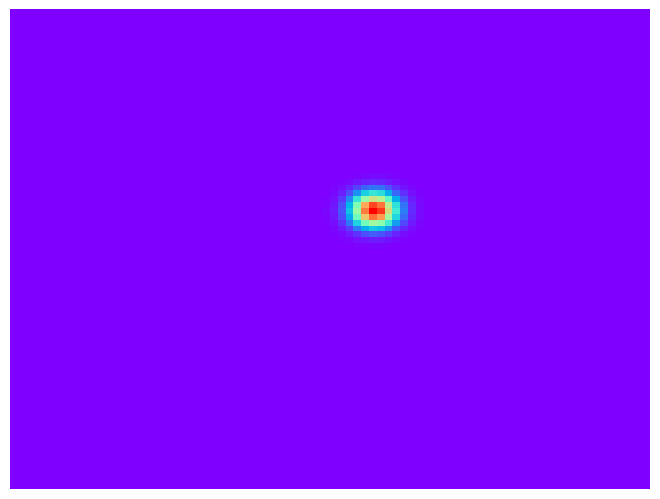

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

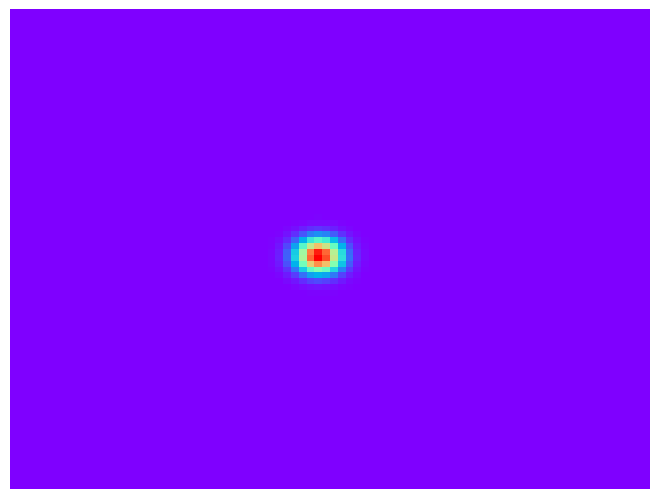

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

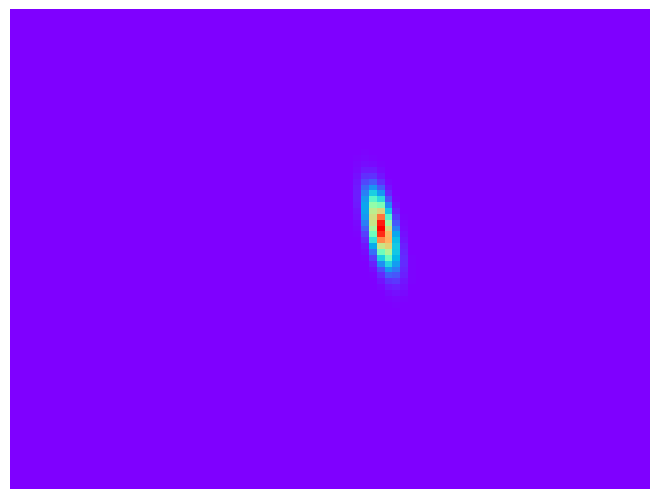

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

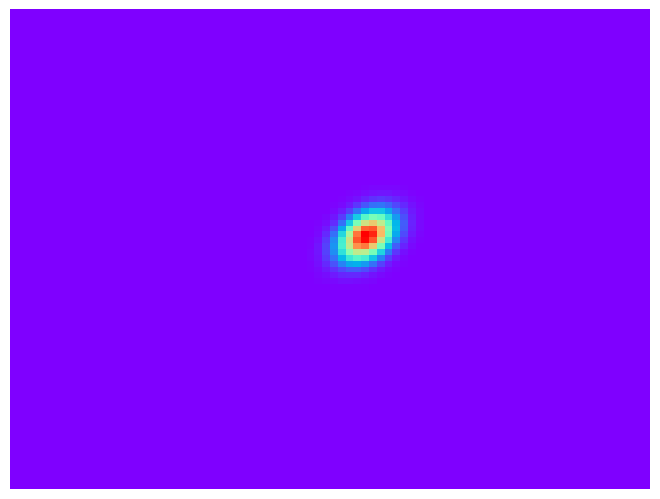

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

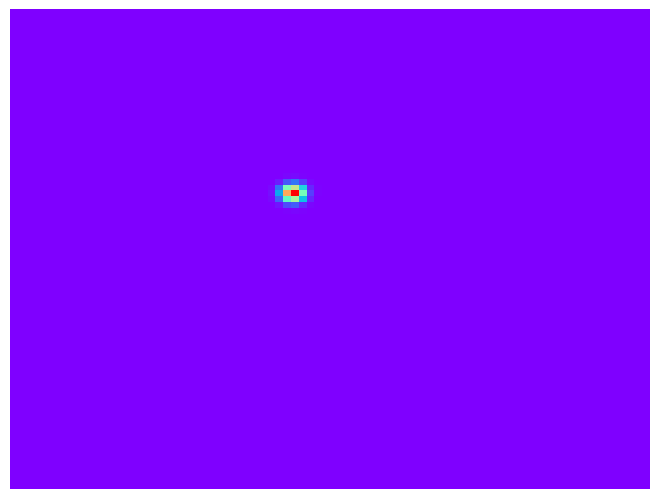

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

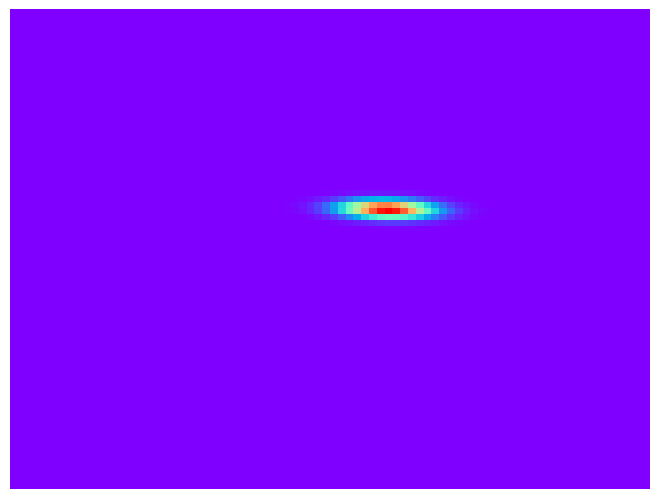

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

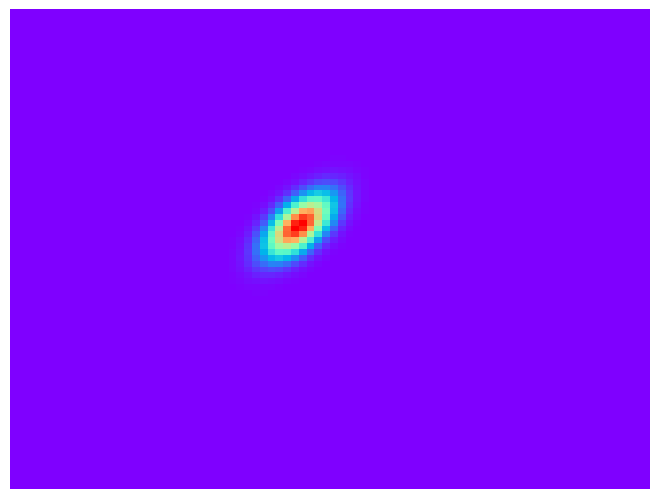

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

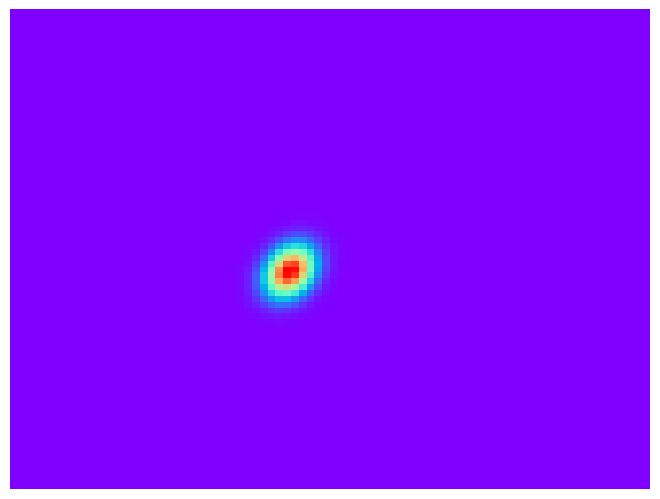

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

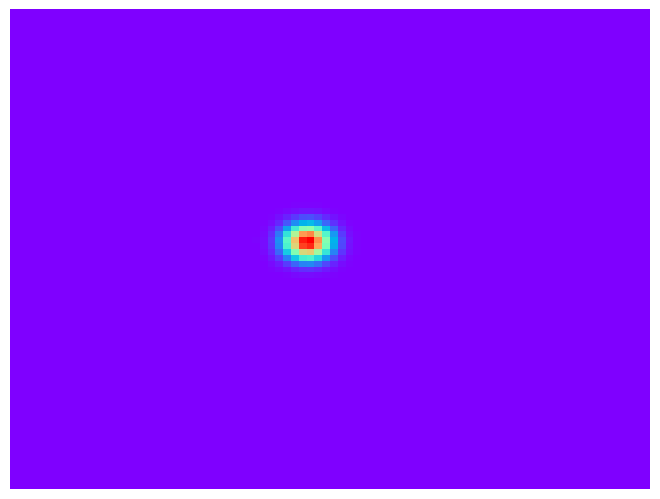

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

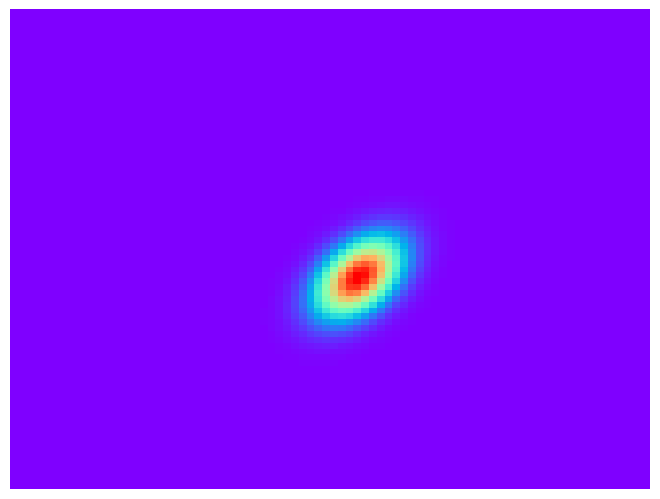

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

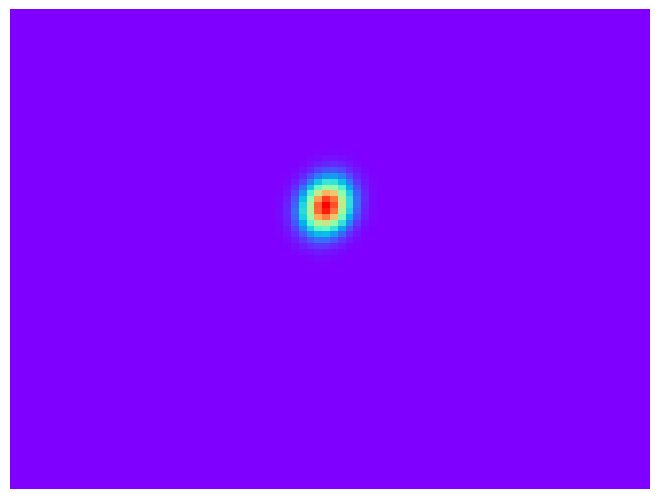

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

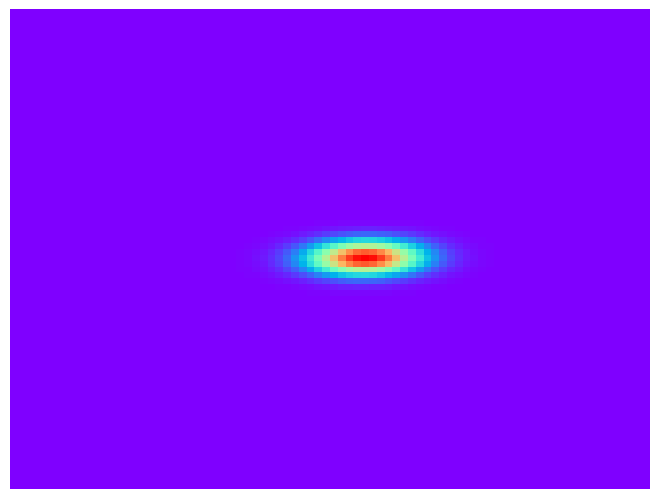

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

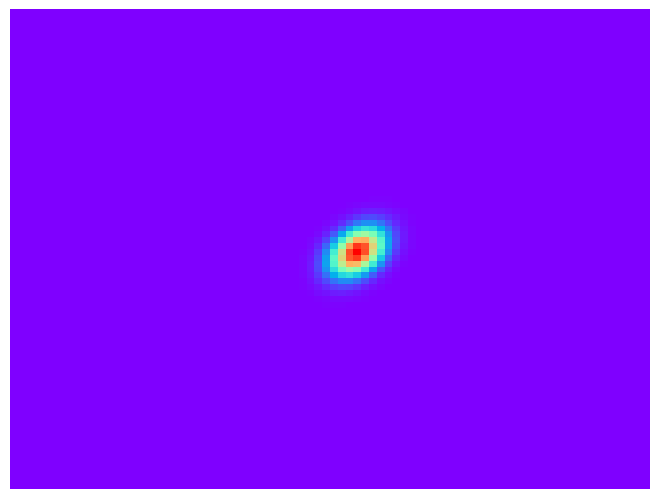

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

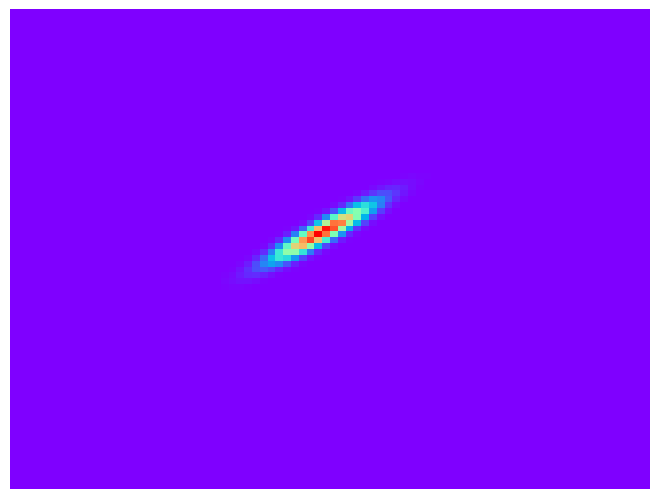

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

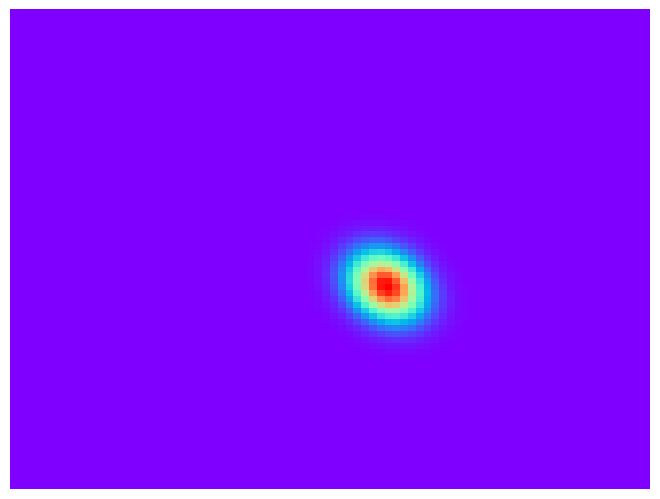

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

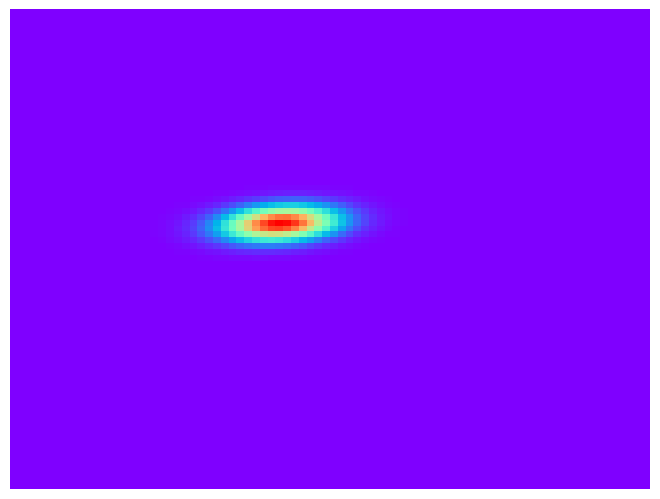

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

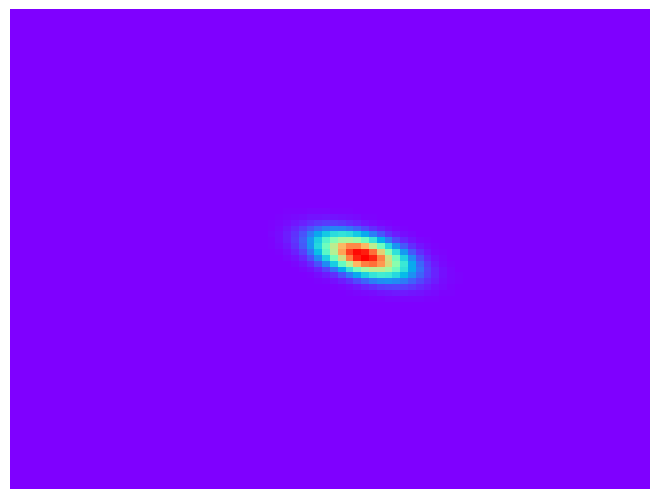

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

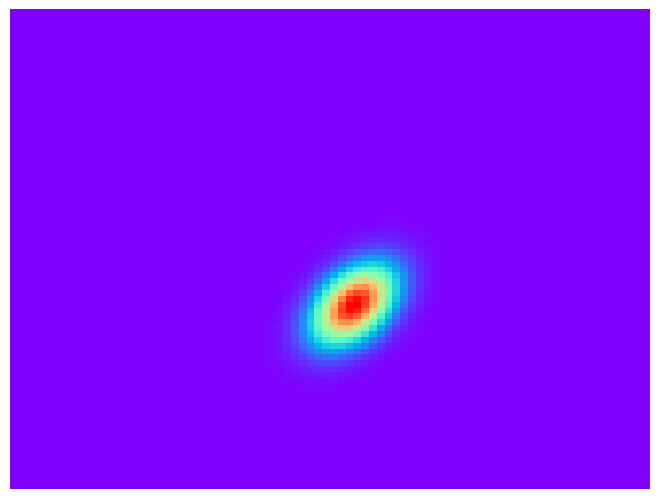

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

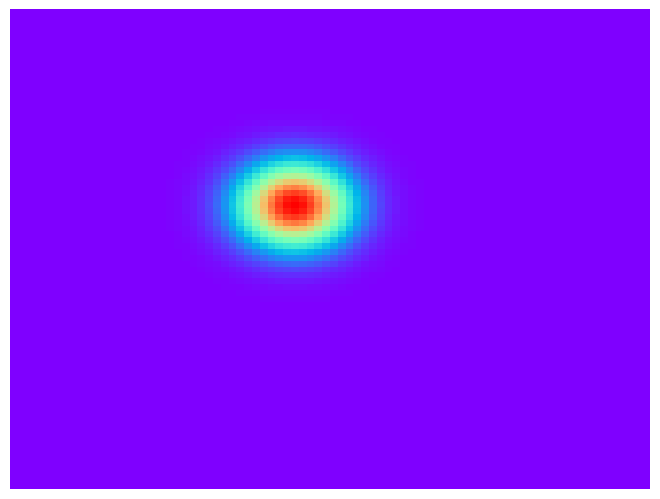

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

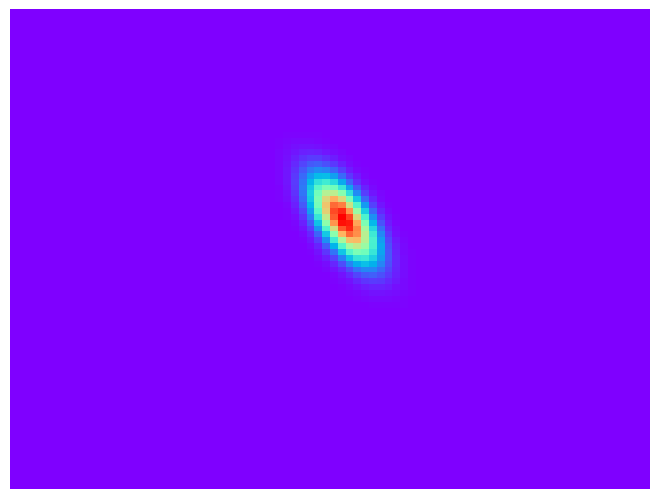

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

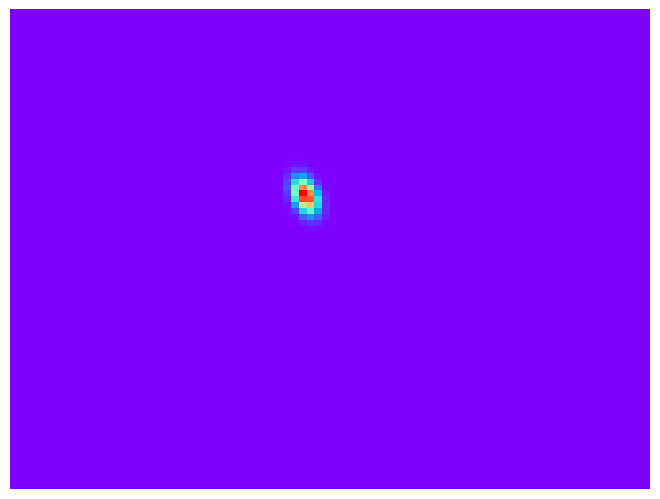

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

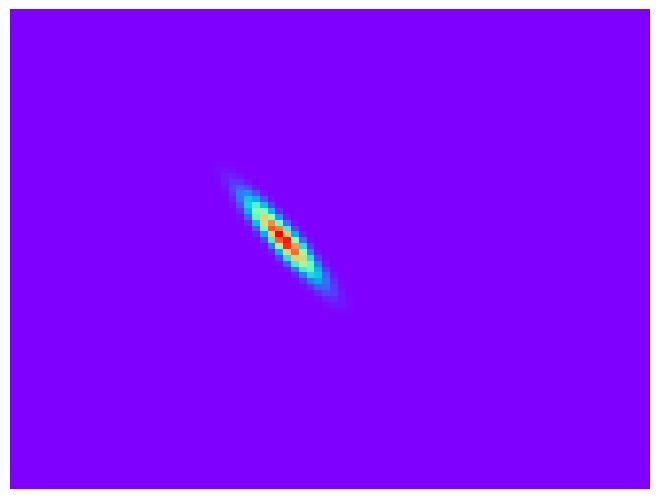

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

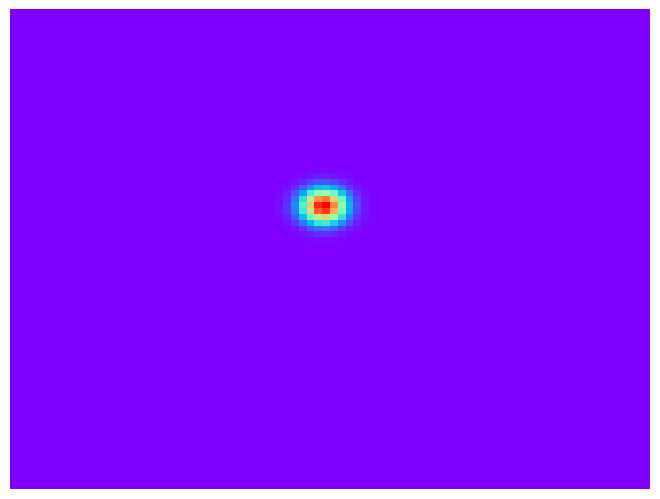

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

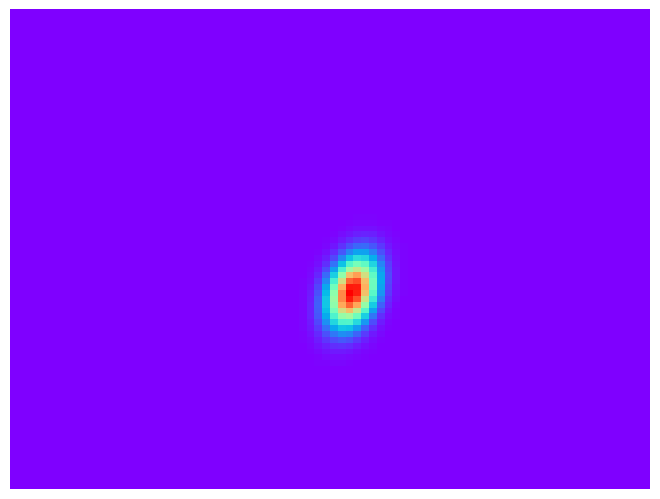

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

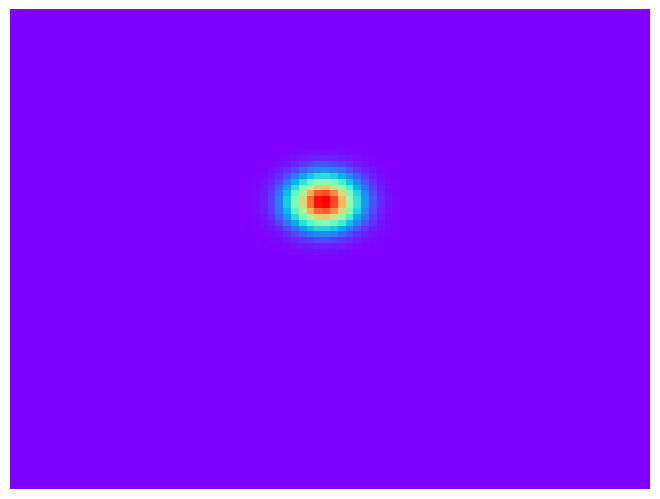

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

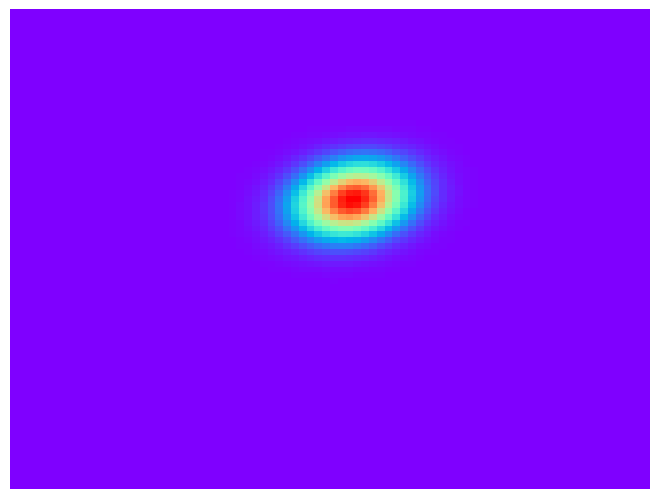

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

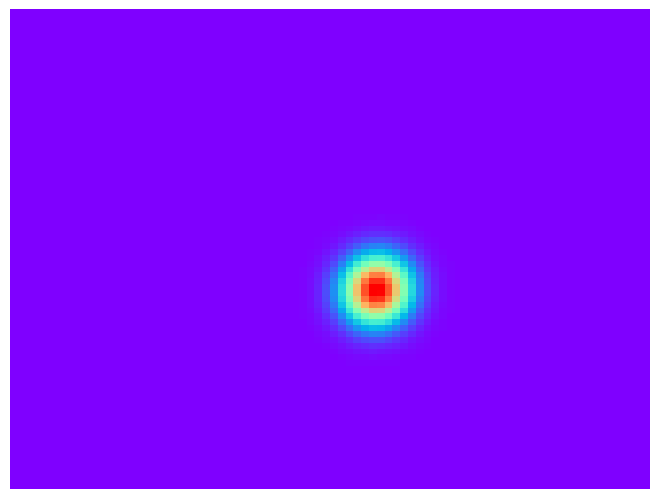

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

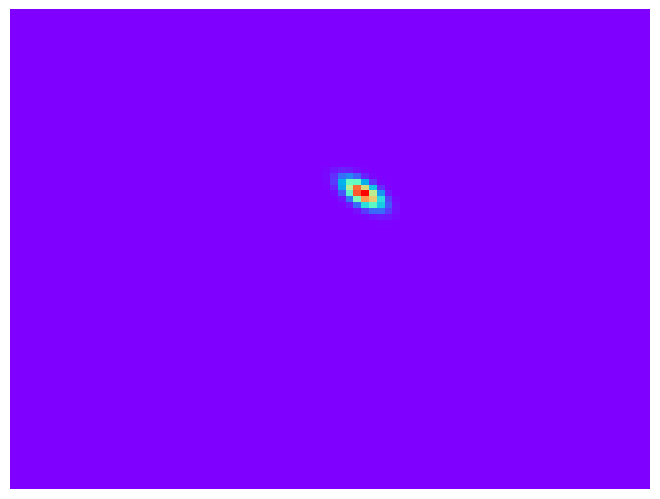

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

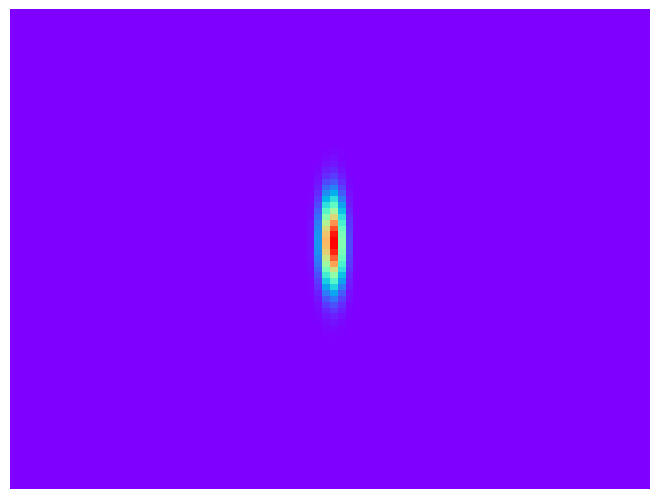

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

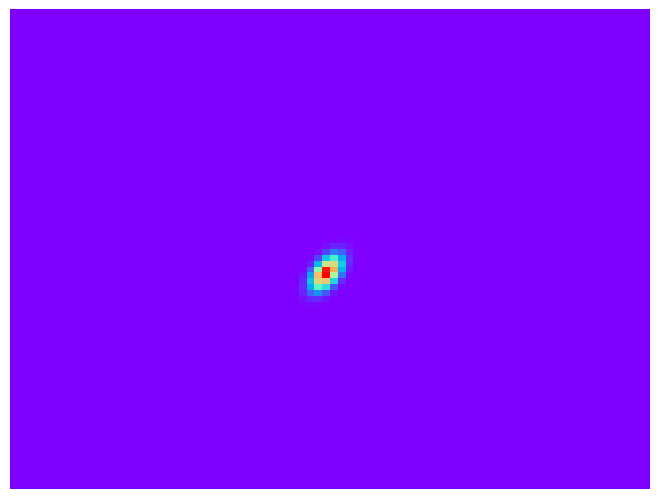

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

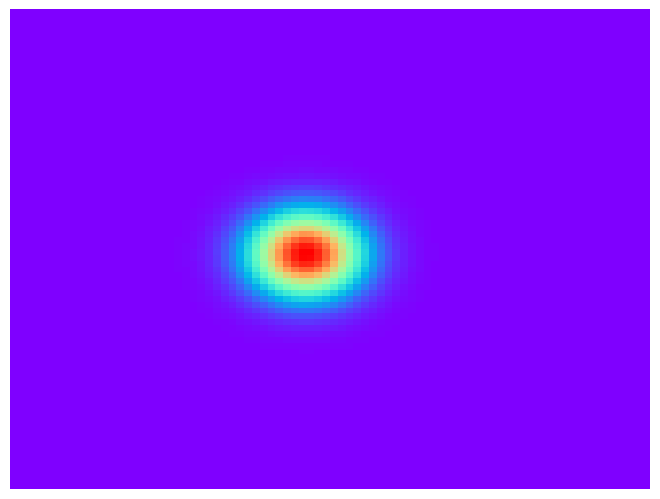

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

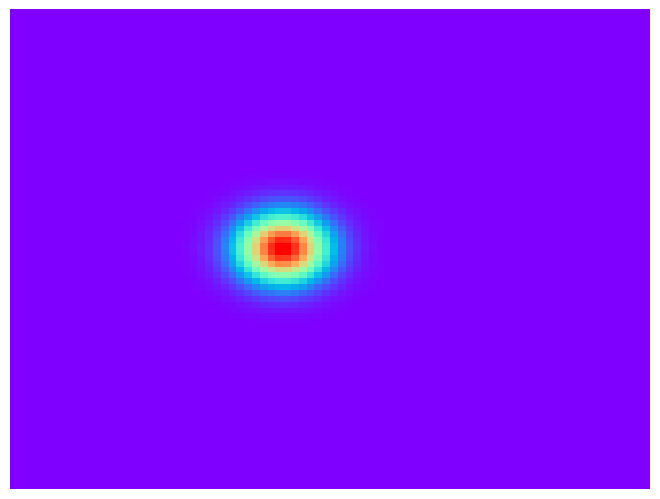

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

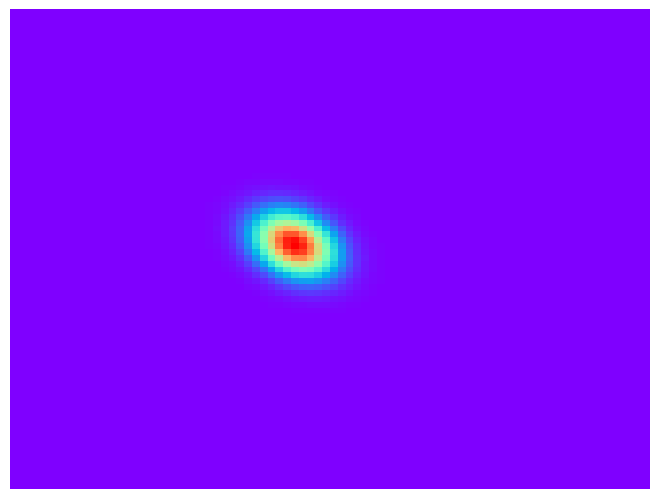

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

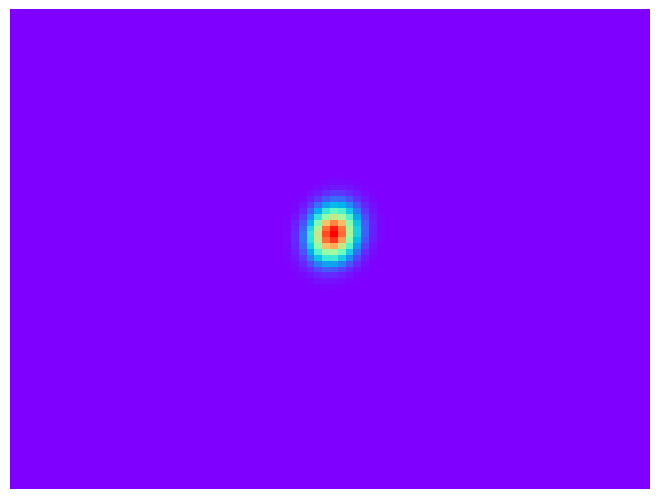

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

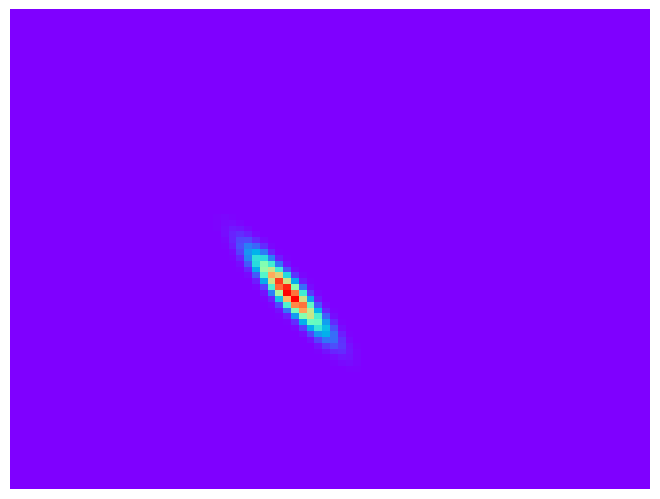

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

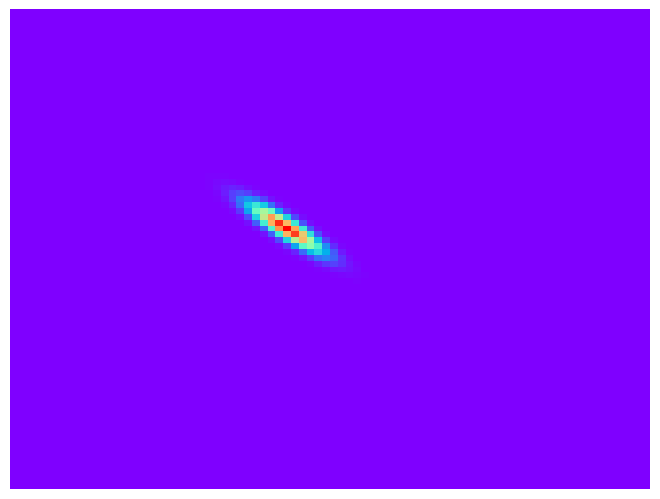

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

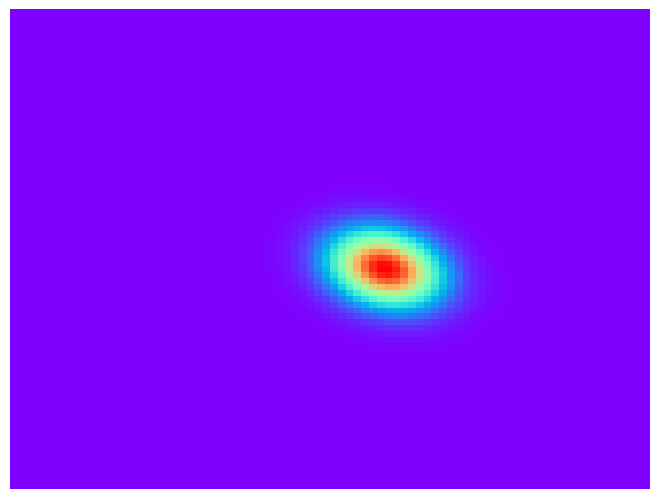

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

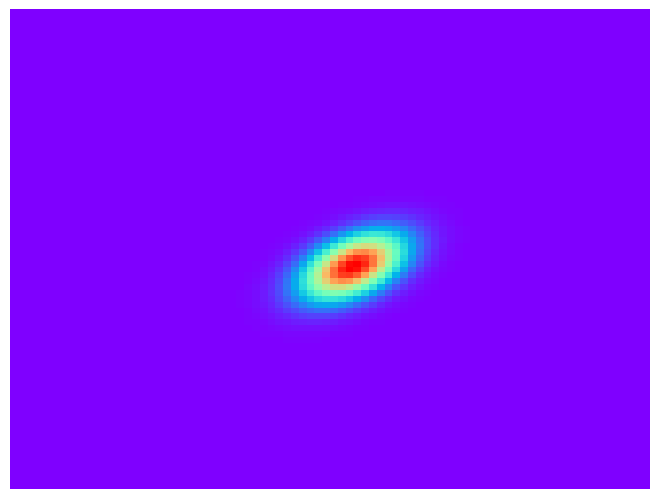

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

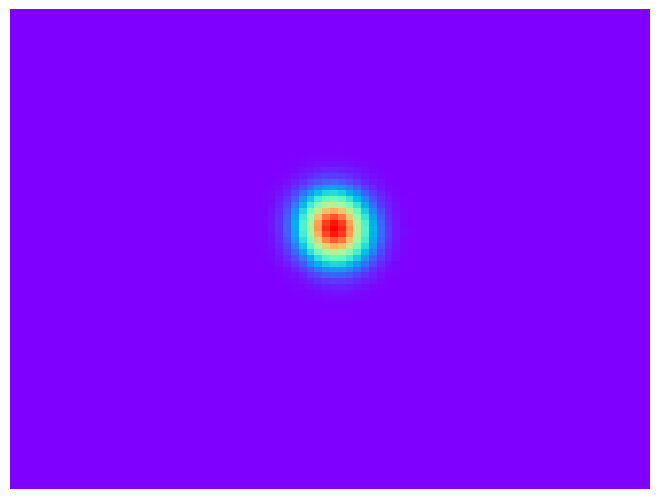

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

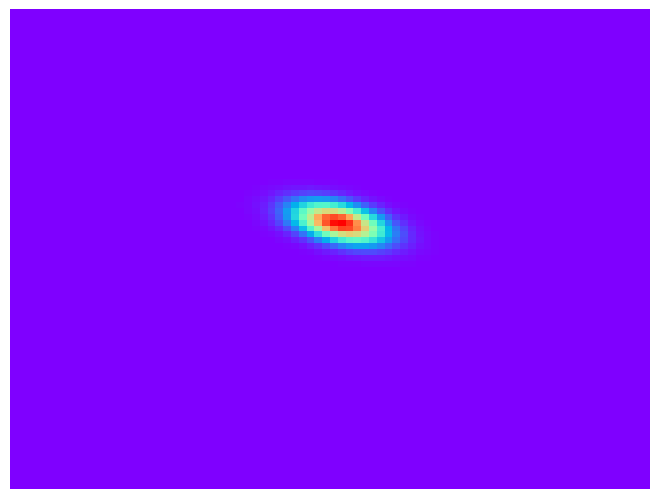

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

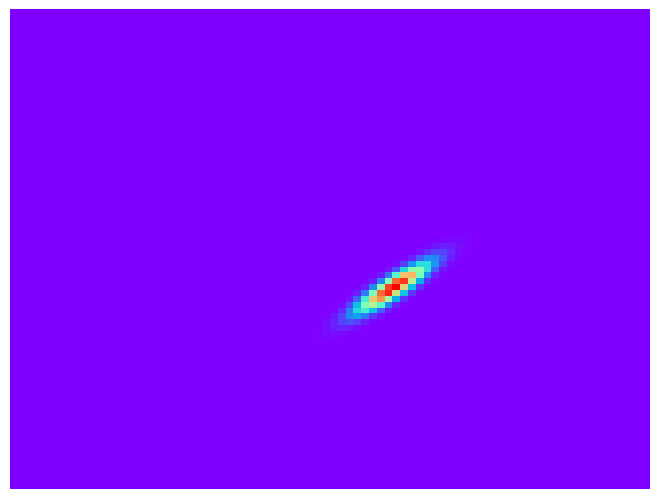

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

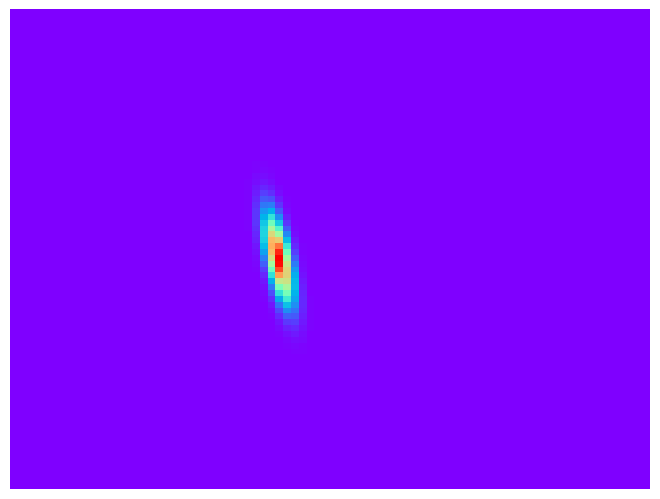

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

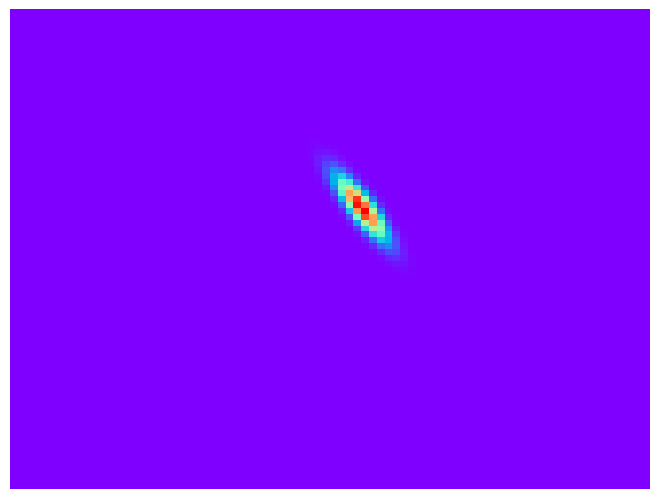

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

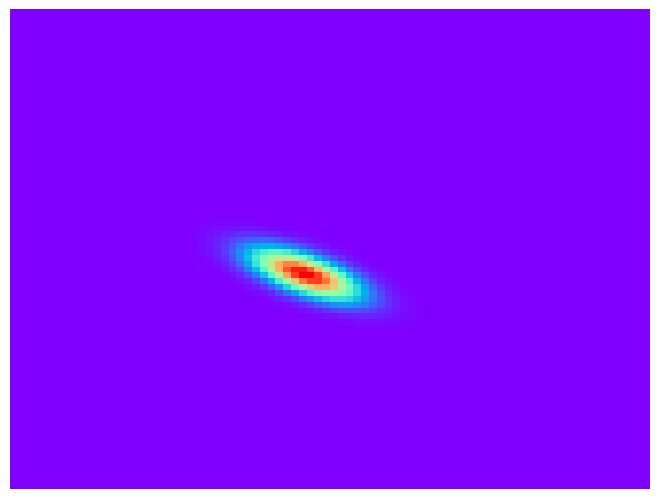

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

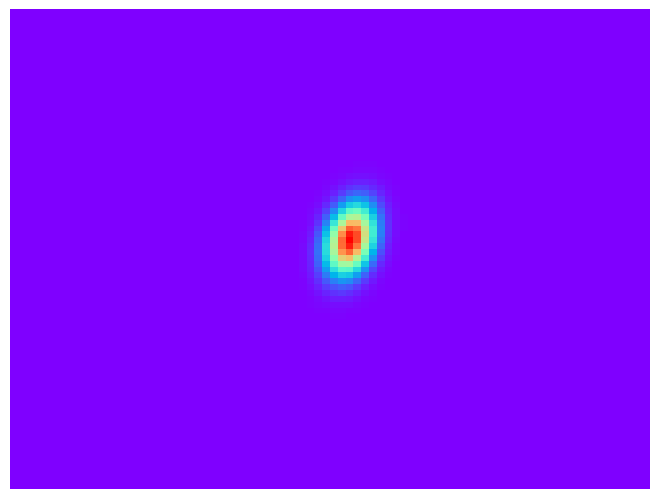

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

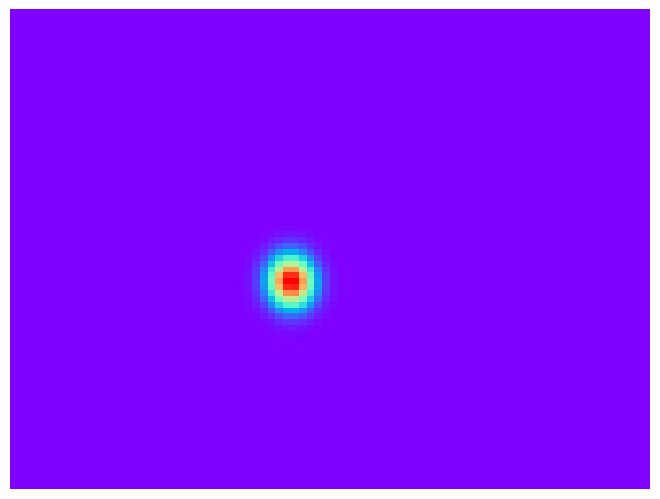

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

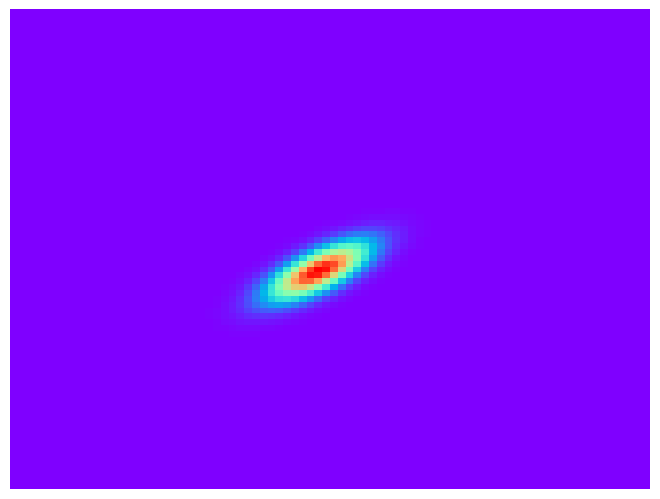

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

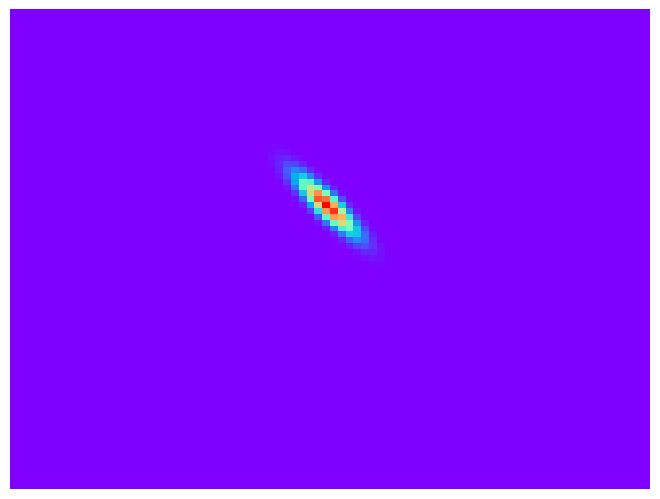

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

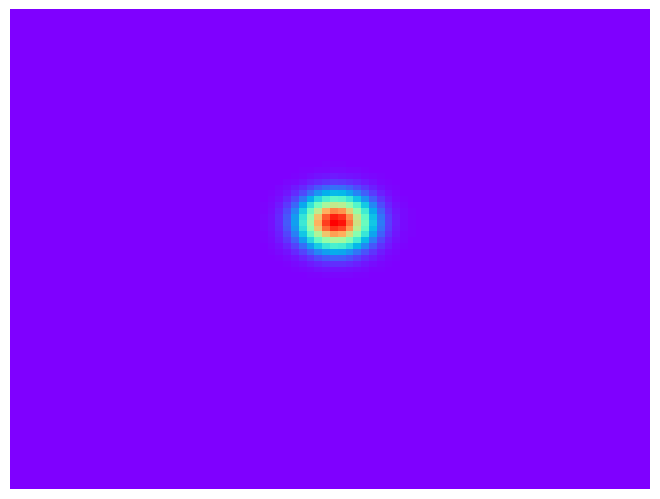

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

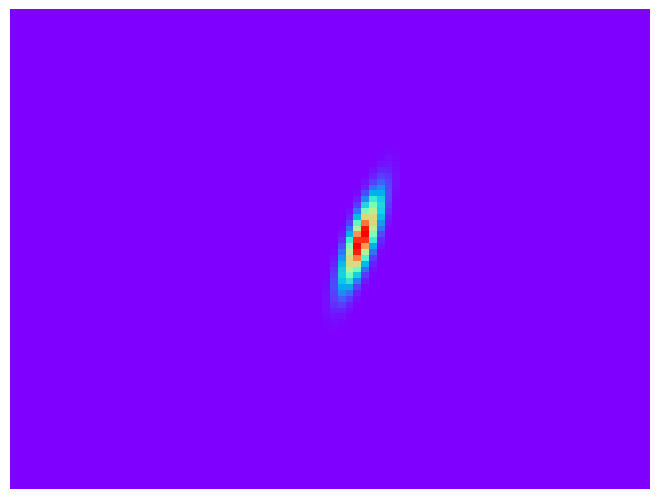

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

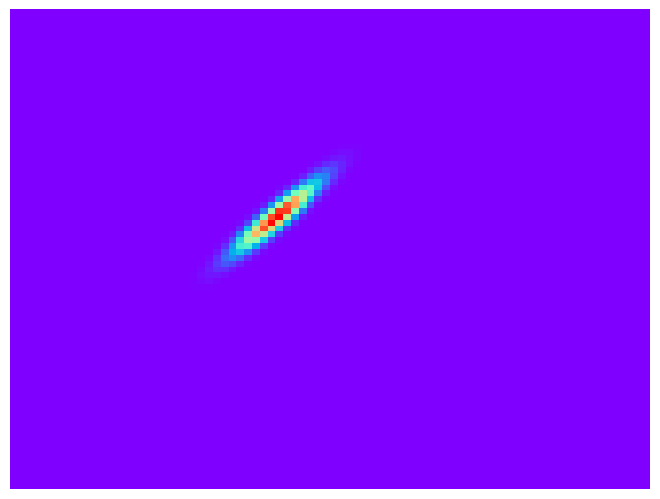

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

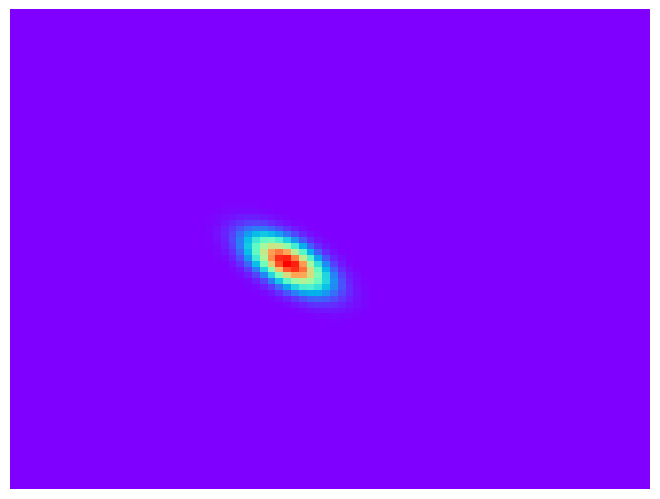

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

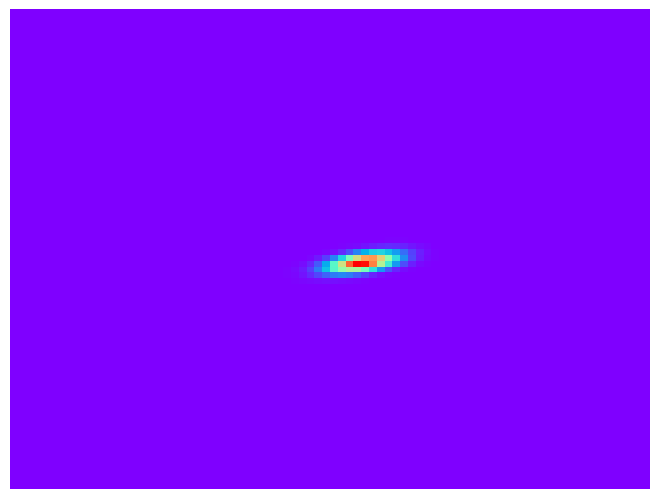

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

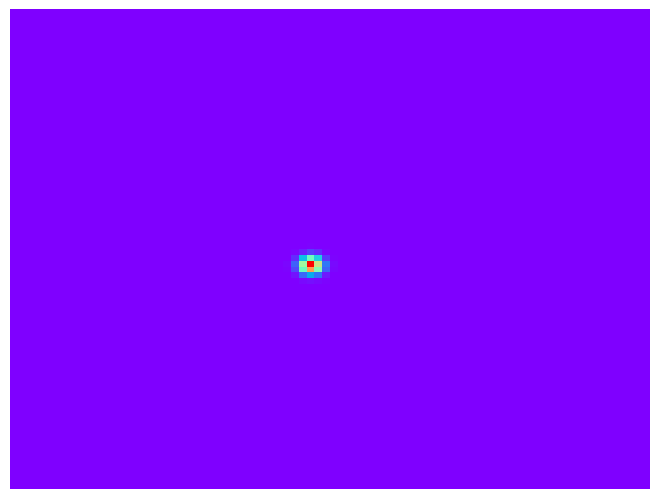

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

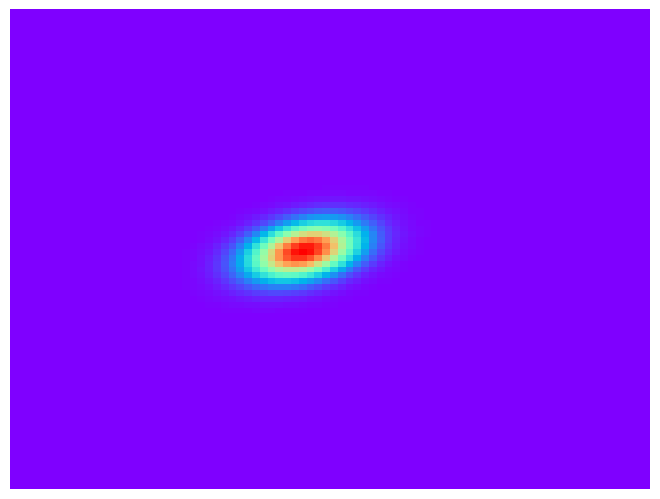

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

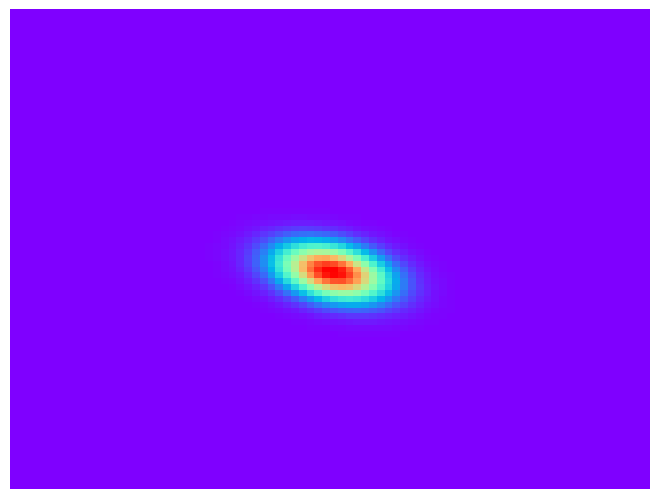

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

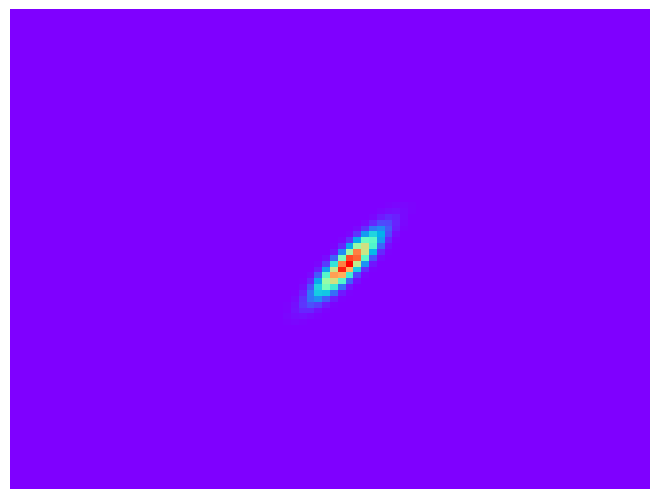

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

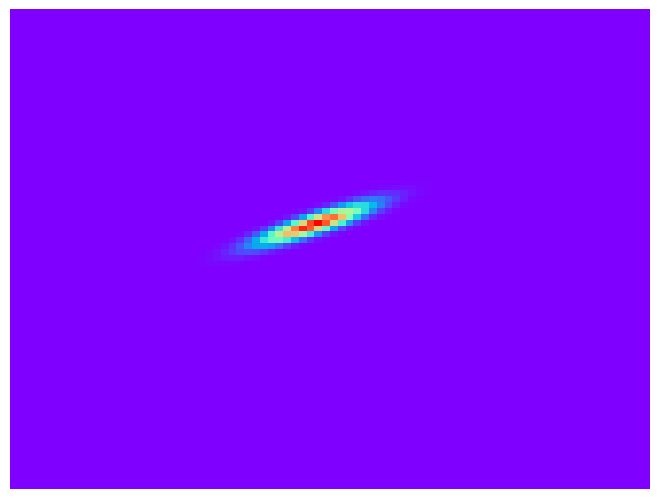

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

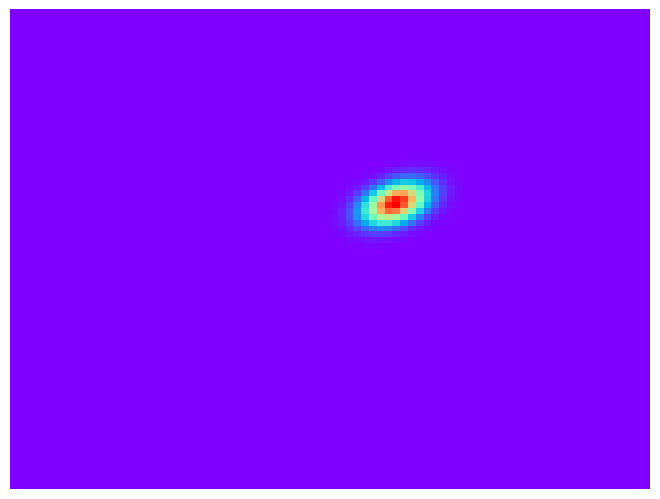

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

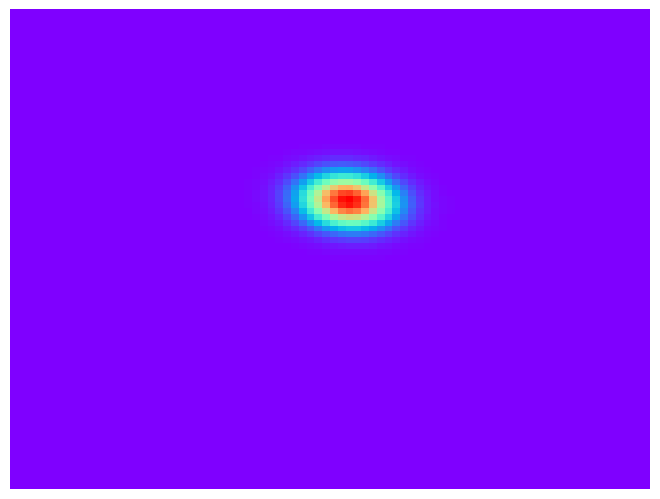

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

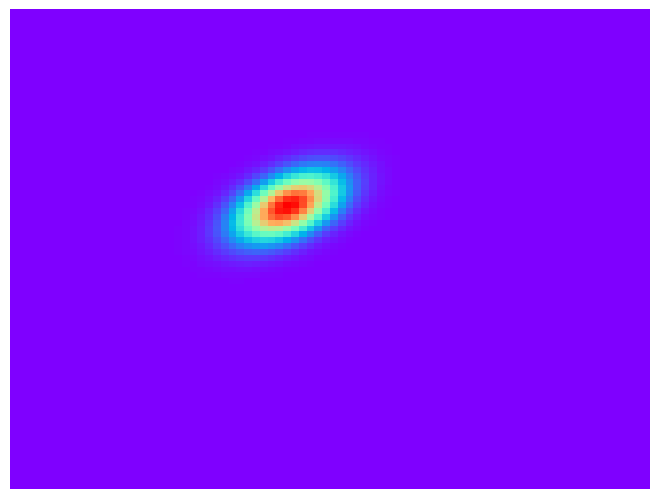

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

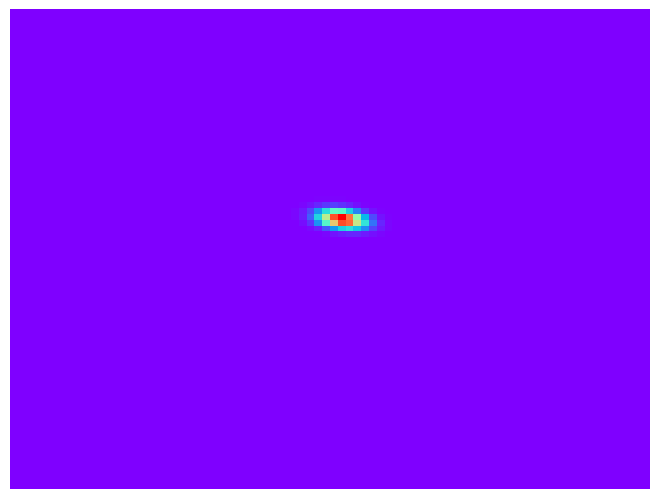

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

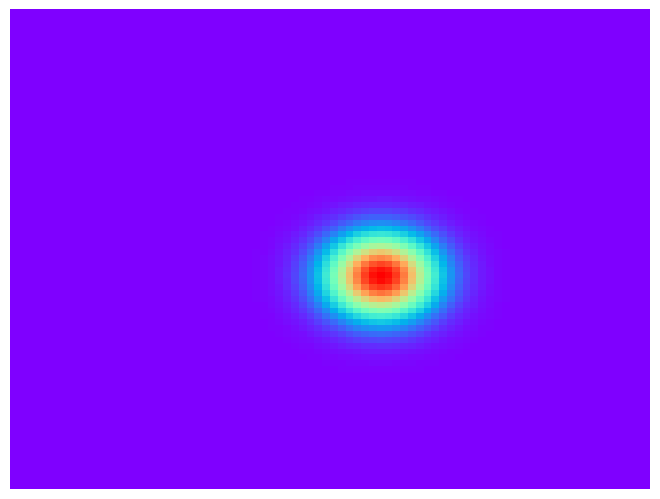

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

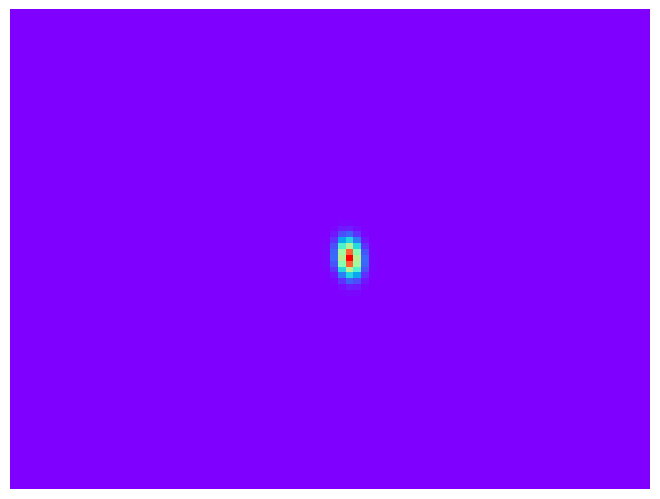

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

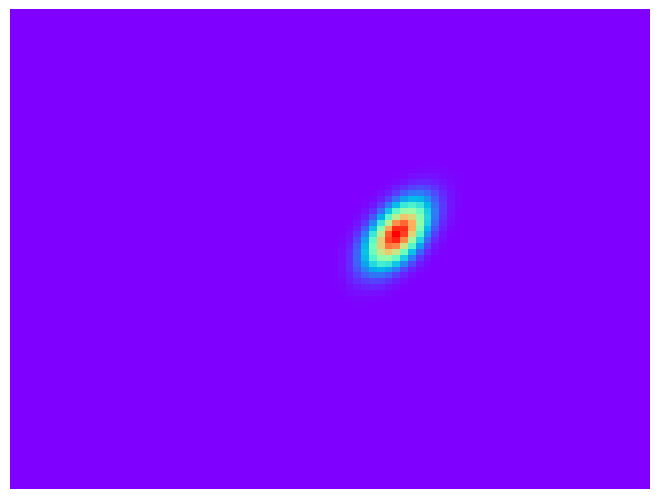

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

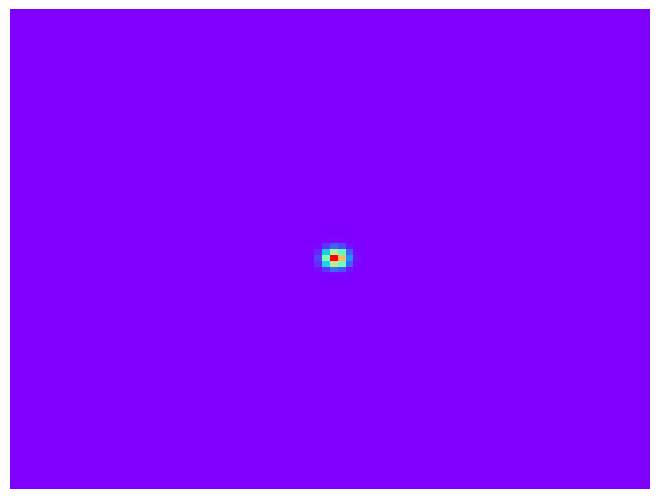

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

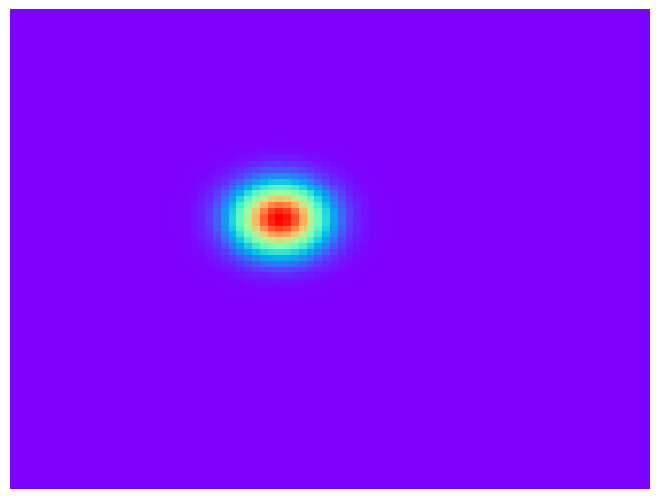

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

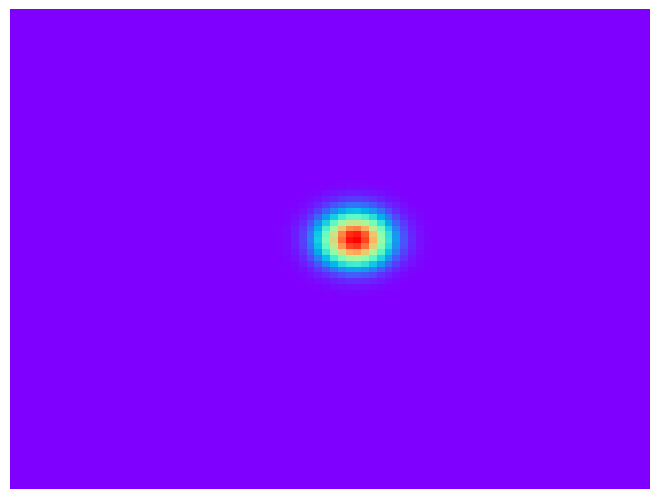

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

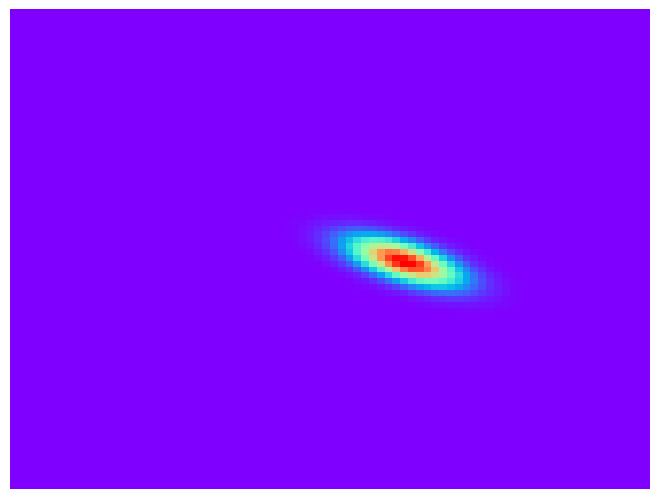

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

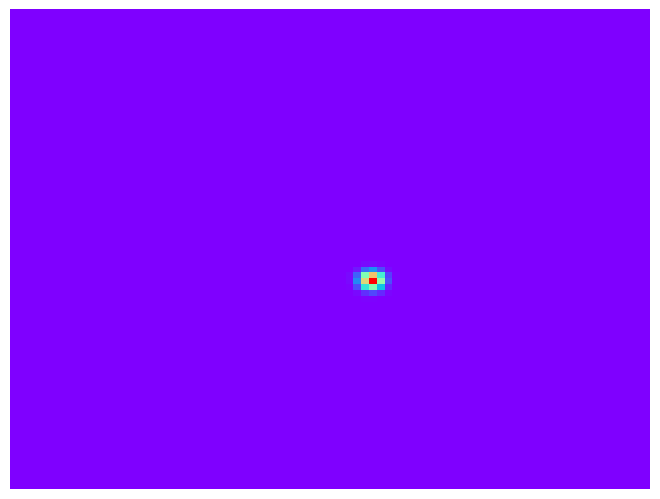

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

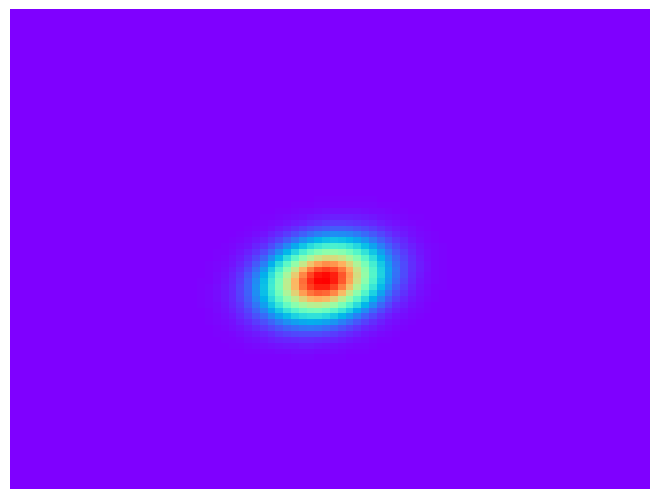

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

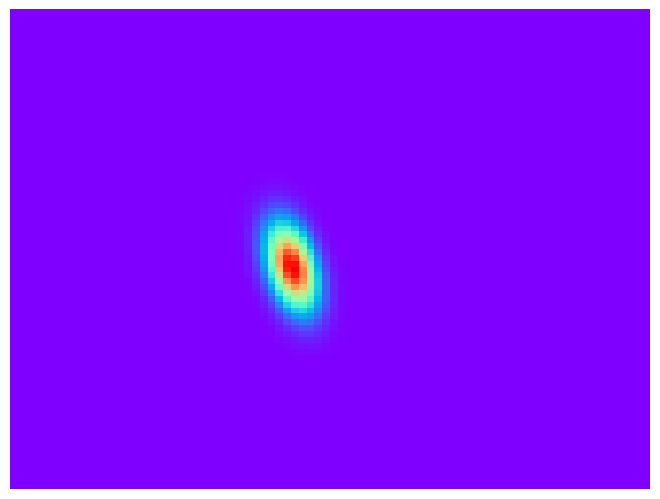

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

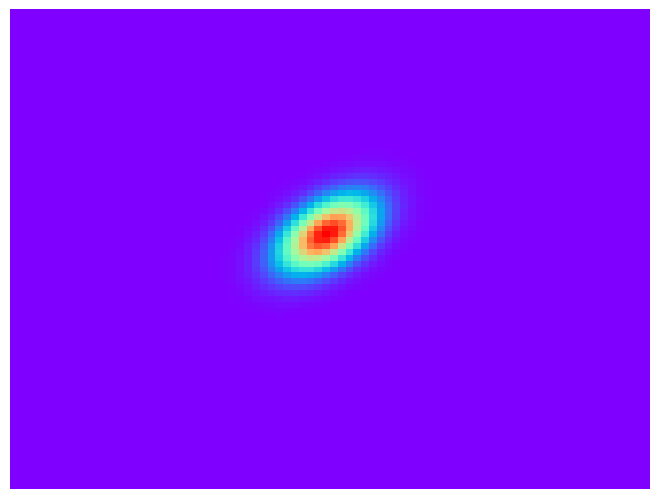

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

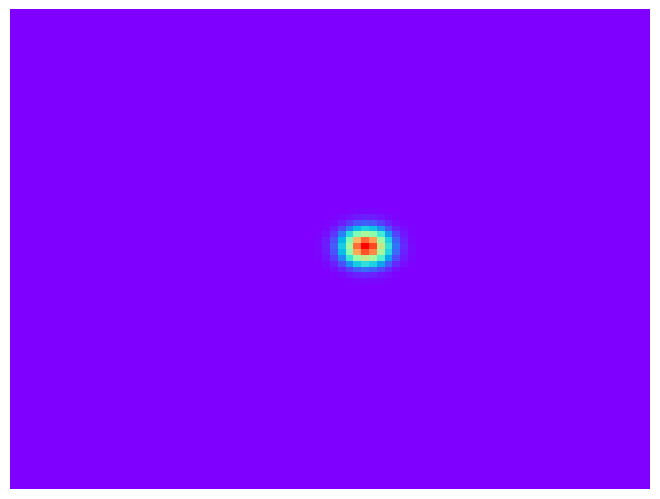

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

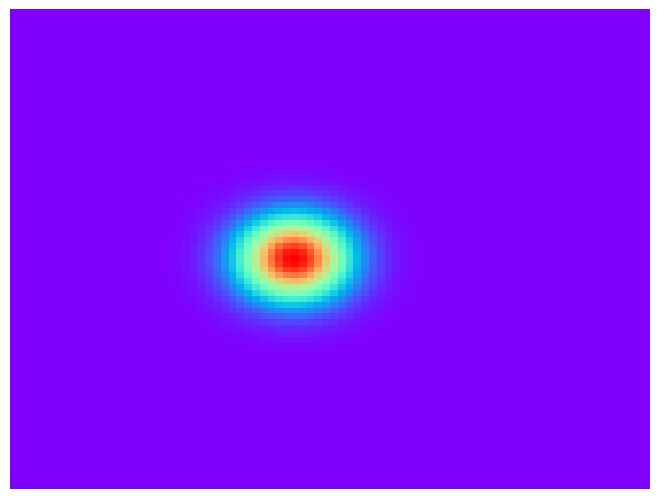

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

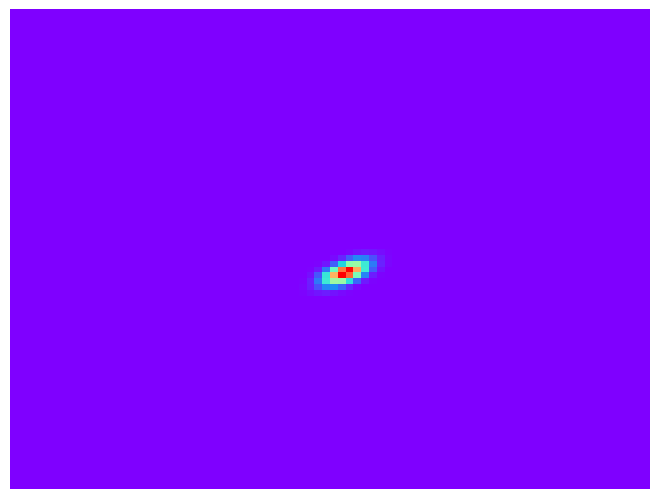

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

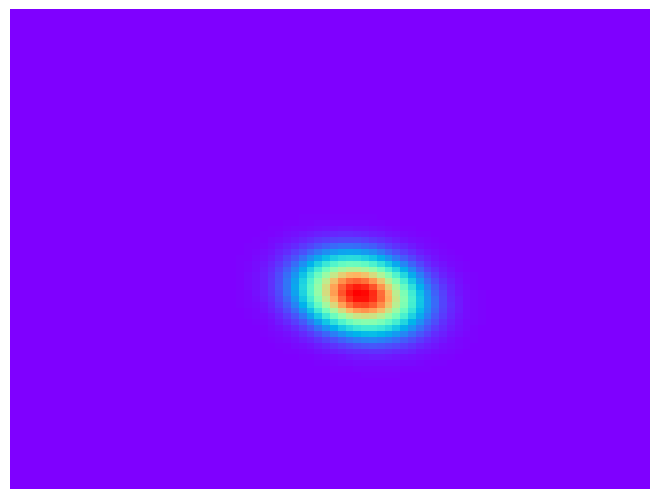

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

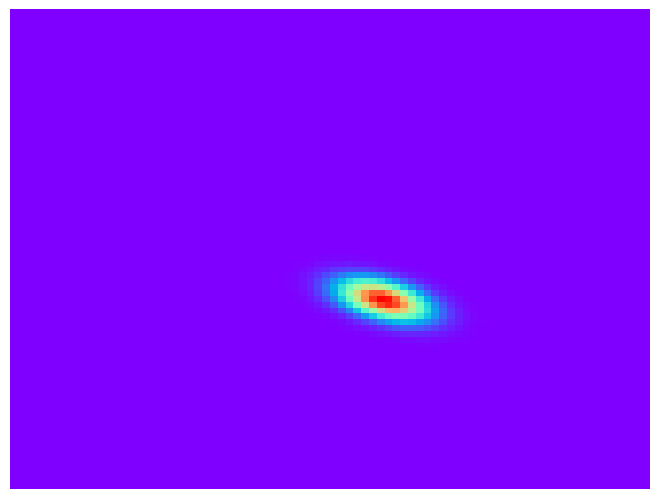

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

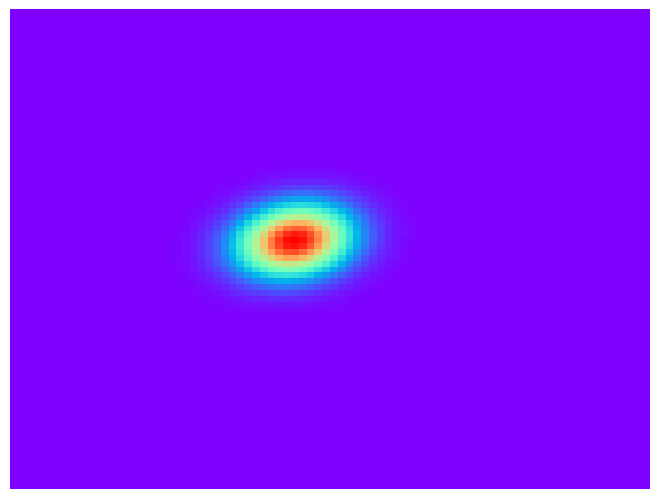

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

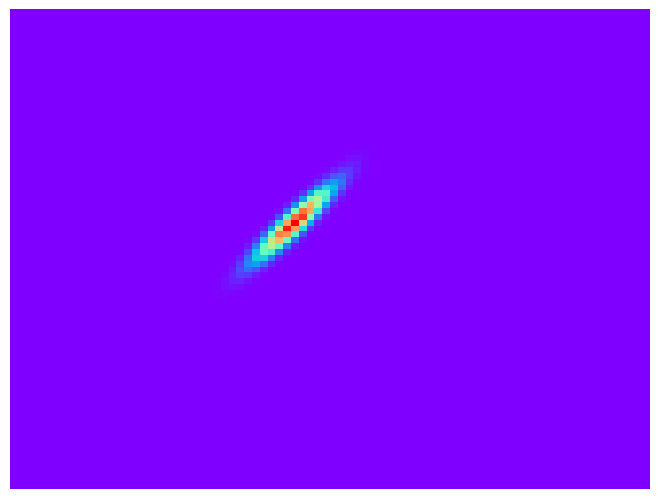

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

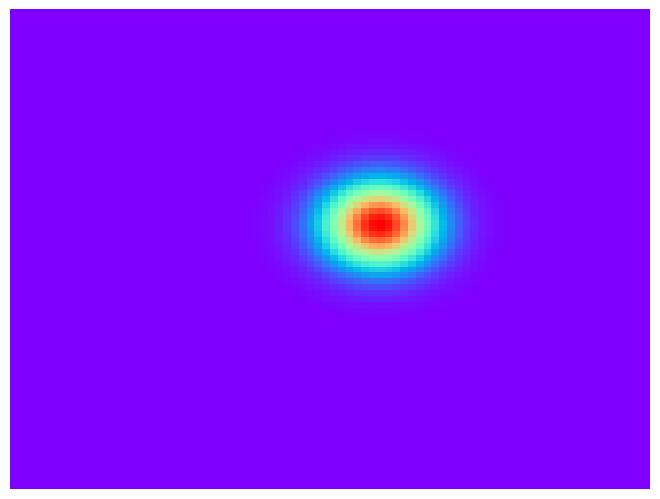

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

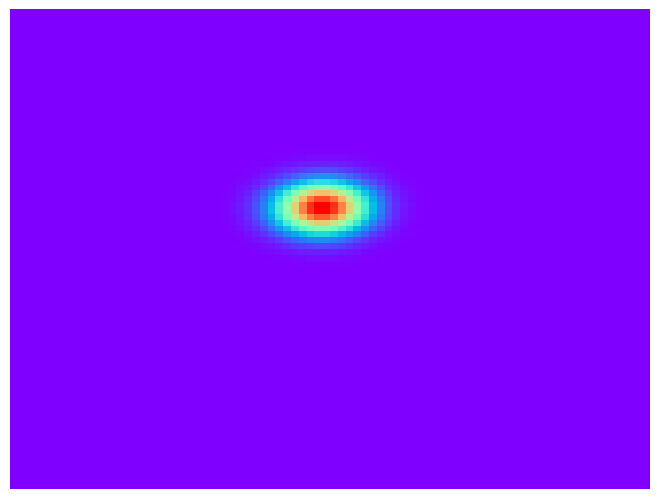

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

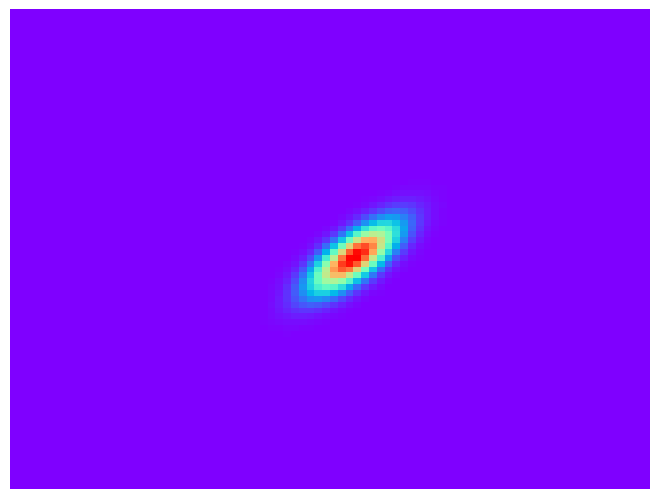

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

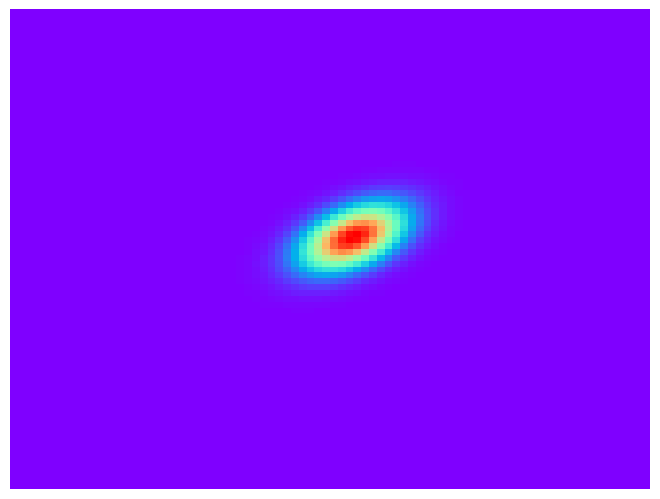

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

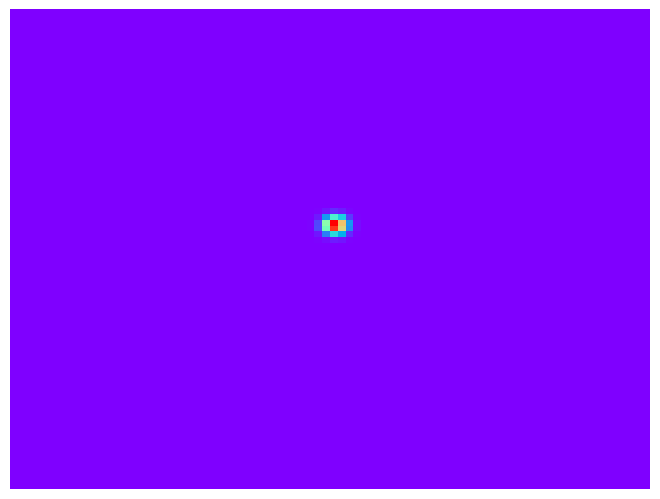

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

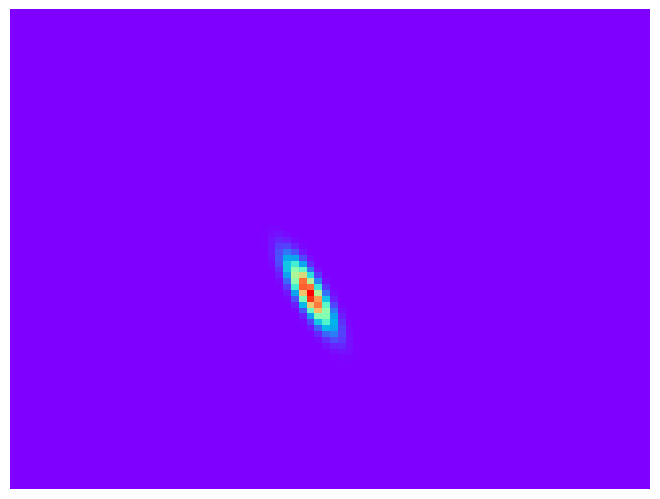

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

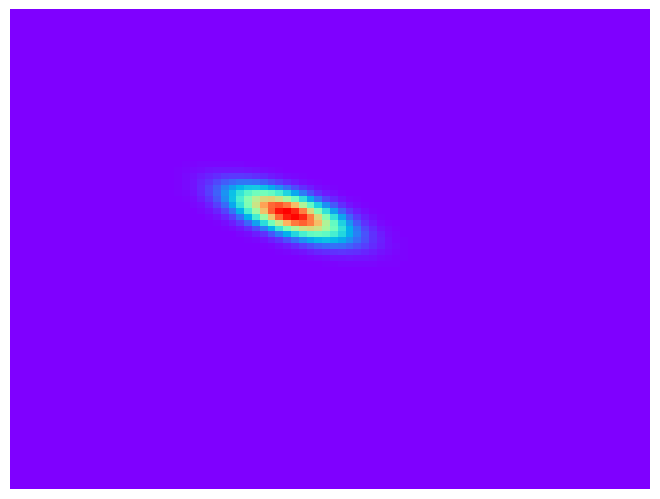

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

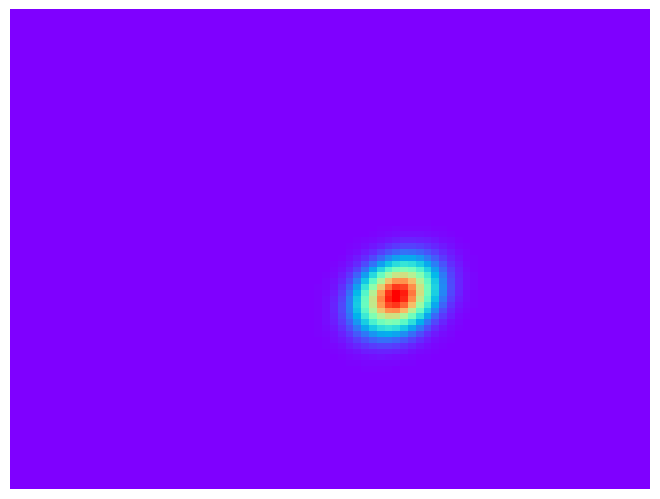

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

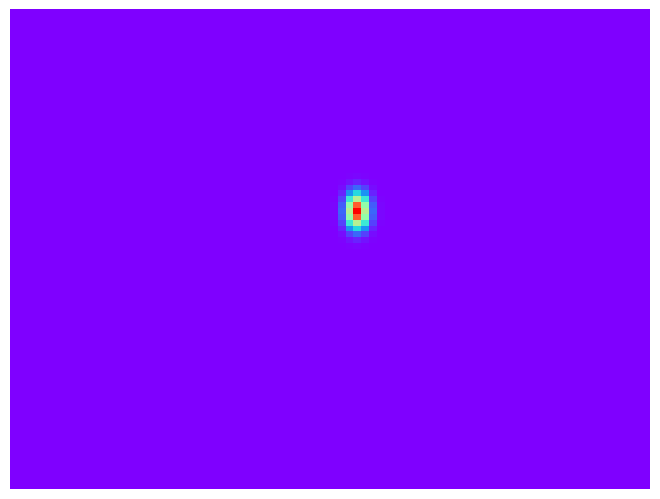

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

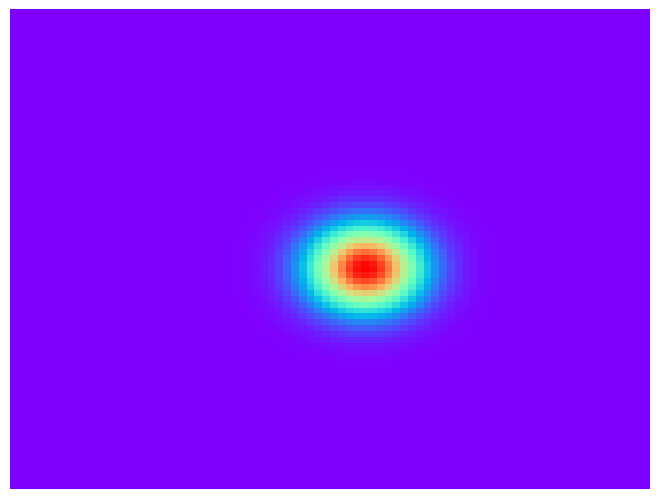

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

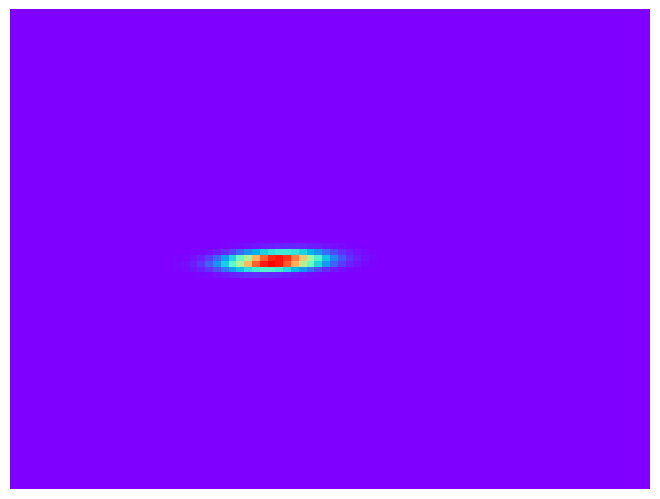

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

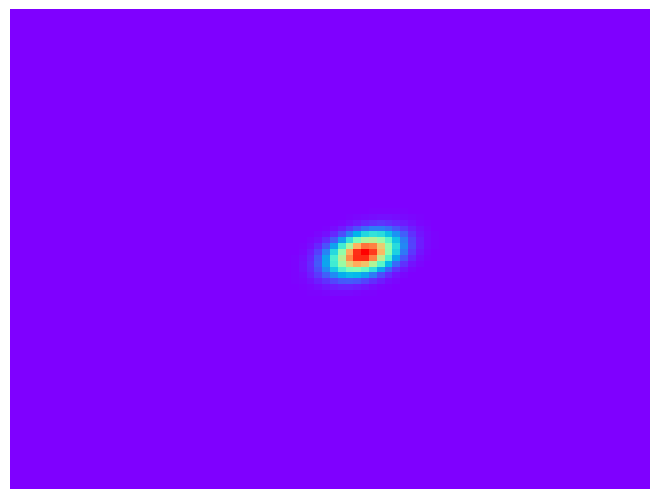

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

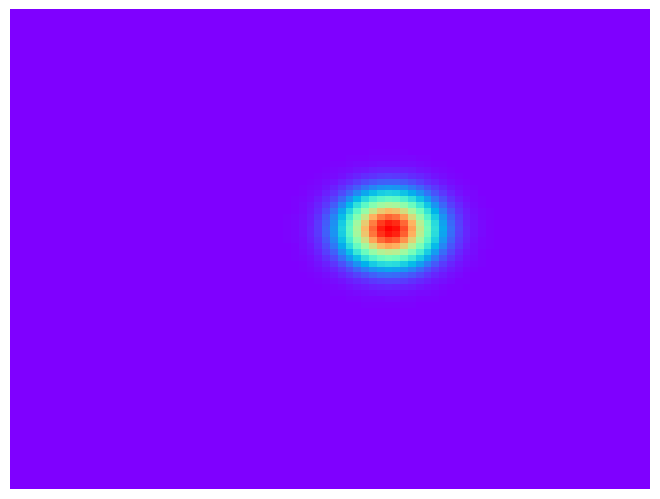

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

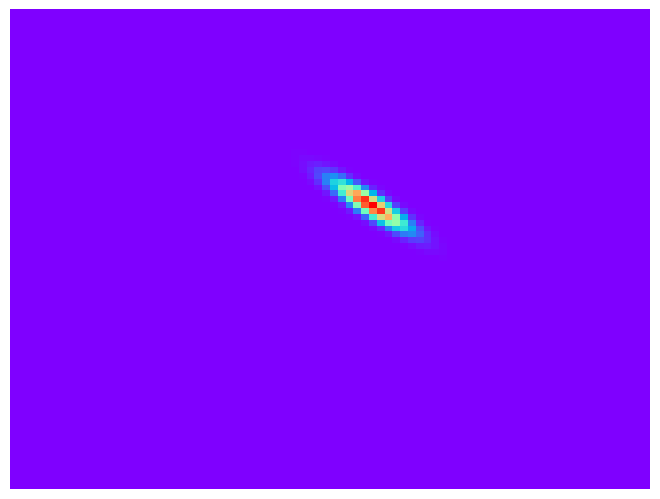

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

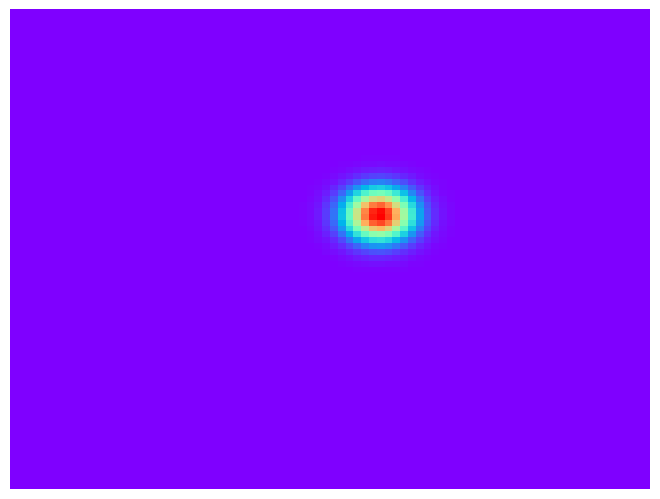

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

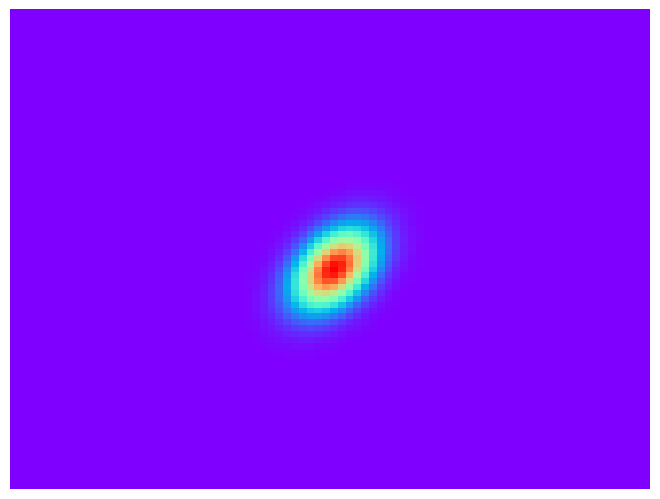

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

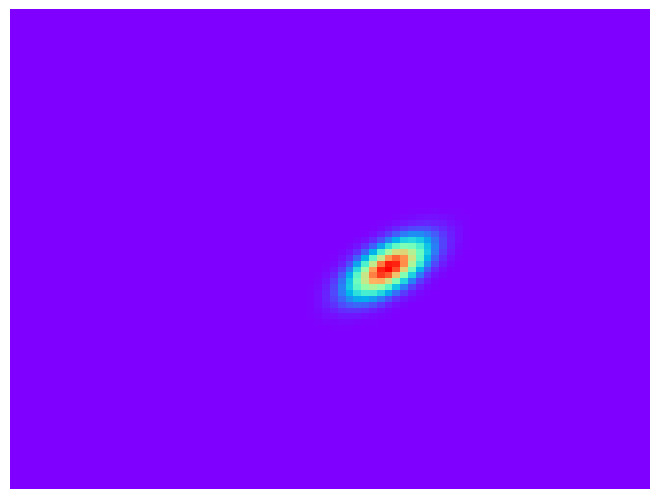

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

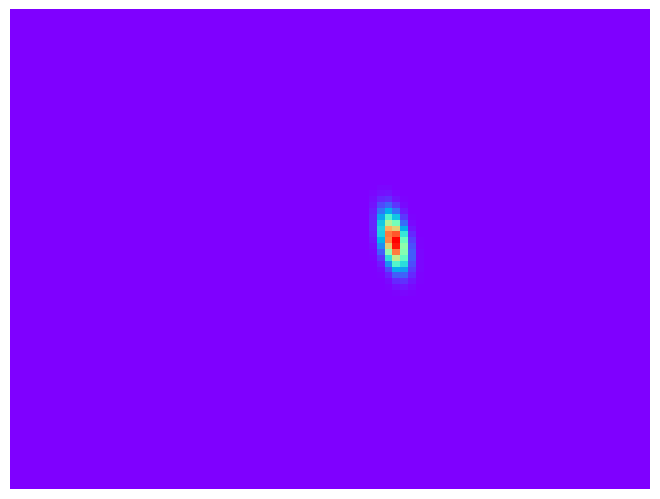

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

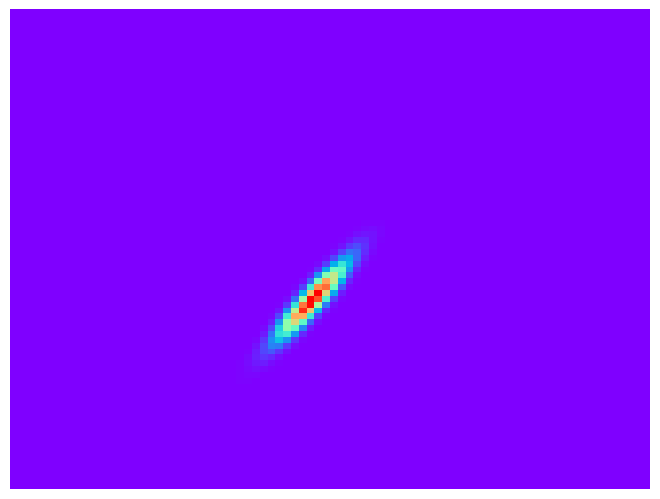

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

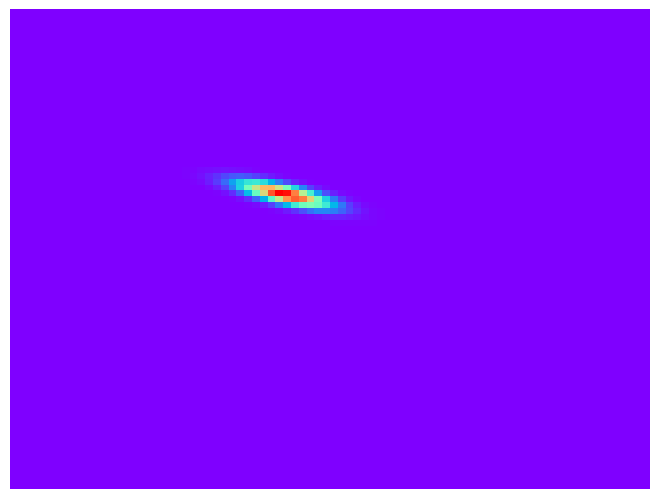

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

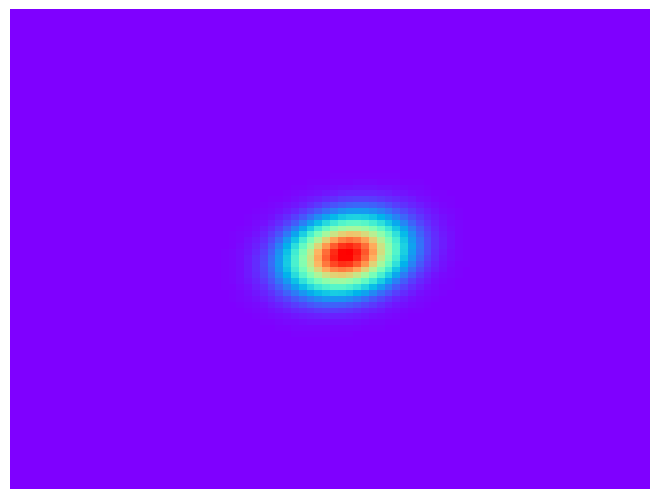

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

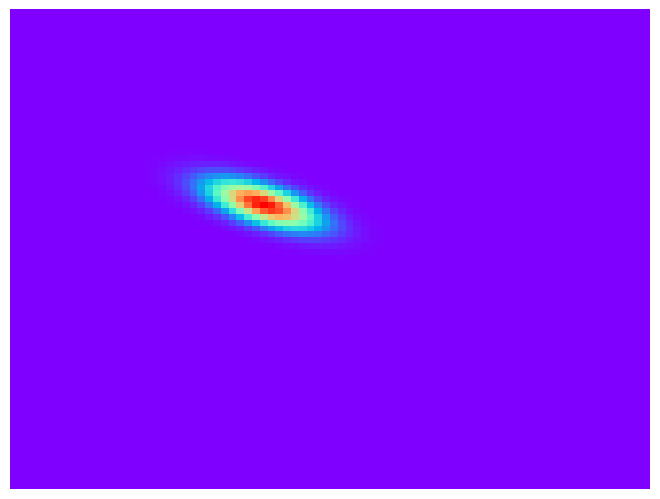

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

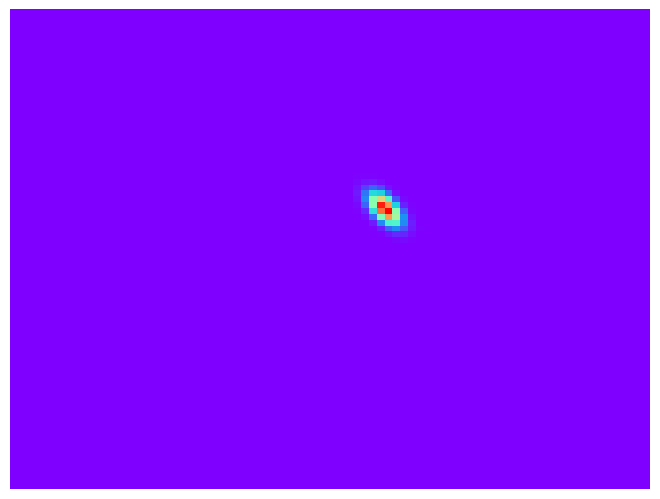

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

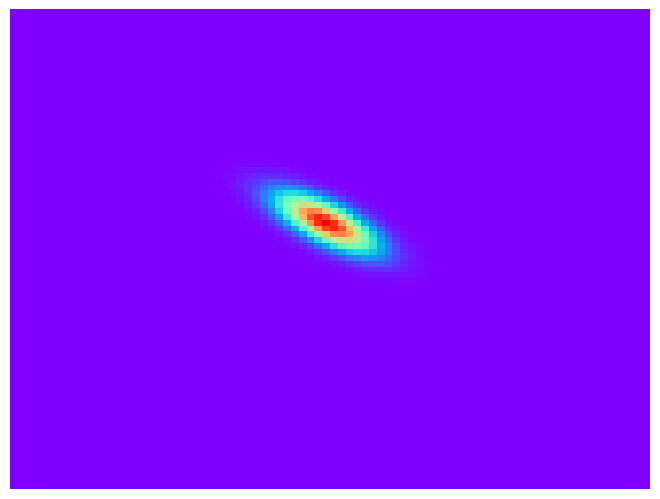

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

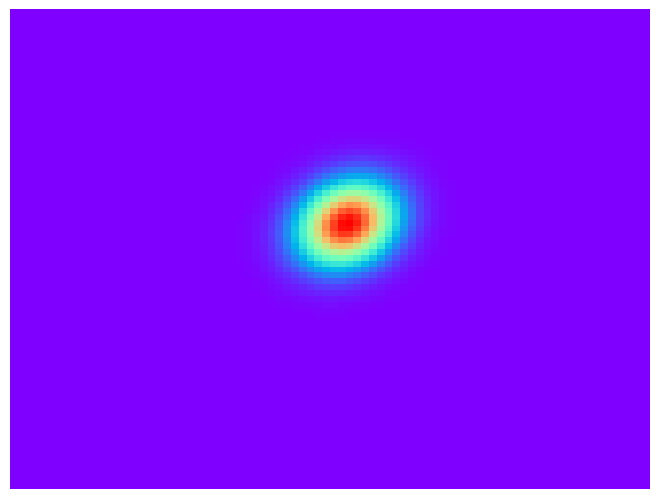

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

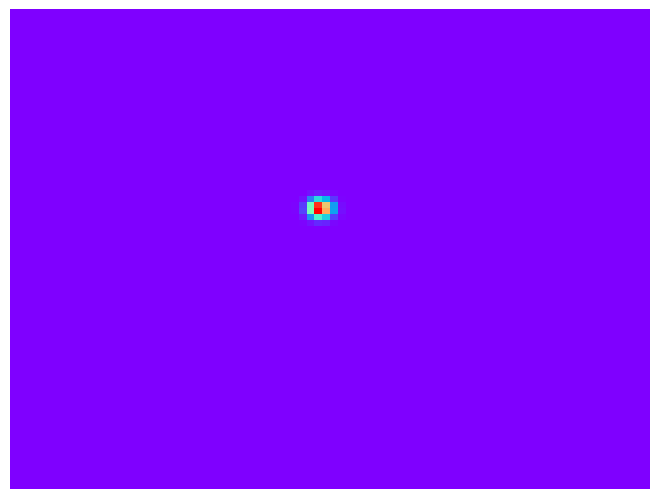

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [27]:
def generate_neg_dataset(augmentations_per_gaussian):
    neg_dataset = np.array([])
    im_center = im_size/2
    y, x = np.mgrid[0:im_size, 0:im_size]
    count = 0
    for i in range(0, len(filenames)):
        for j in range(0, augmentations_per_gaussian):
            rand_x_shift = random.randint(-shift_interval, shift_interval)
            rand_y_shift = random.randint(-shift_interval, shift_interval)
            data = Gaussian2D(1, im_center + rand_x_shift,
                              im_center +
                              rand_y_shift, random.randrange(1, 6),
                              random.randrange(1, 6), theta=random.randrange(0, 2))(x, y)
            
            plt.figure()
            plt.figure(figsize=(im_size, im_size), dpi=100)

            fig = plt.figure(frameon=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            ax.imshow(zscale(augment(data)),
                      origin='lower', cmap='rainbow', aspect='auto')
            open('data/neg_dataset/neg_{}.png'.format(count), 'w').close()
            fig.savefig('data/neg_dataset/neg_{}.png'.format(count))
            count += 1
            
            # zscale = ZScaleInterval(contrast=0.25, nsamples=1)
            # np.append(neg_dataset, zscale(augment(data)))
            # neg_dataset.append(zscale(augment(data)))
            print("Appended negative gaussian")
    return neg_dataset

generate_neg_dataset(50)


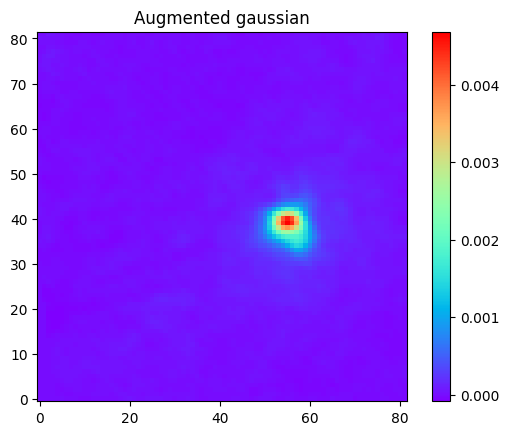

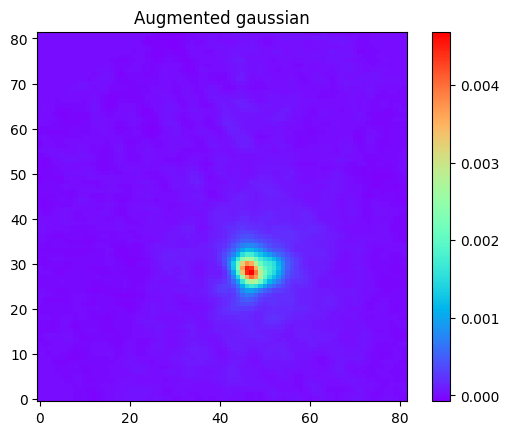

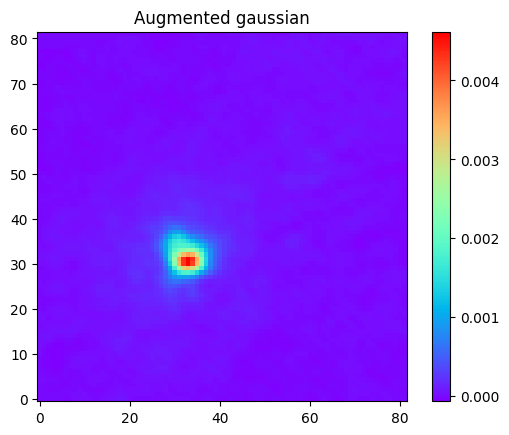

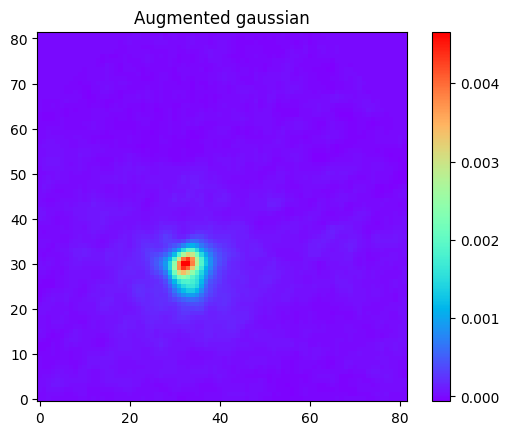

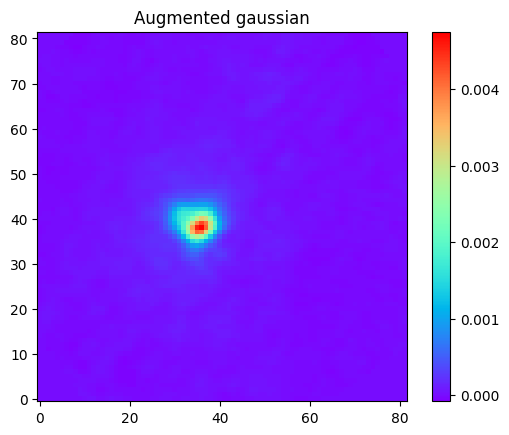

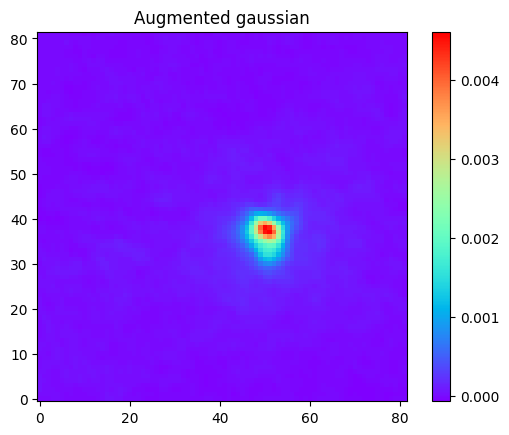

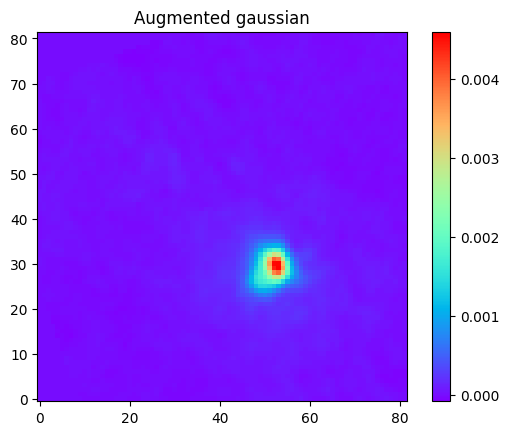

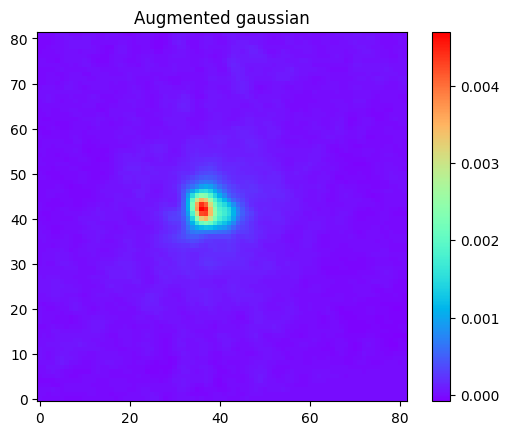

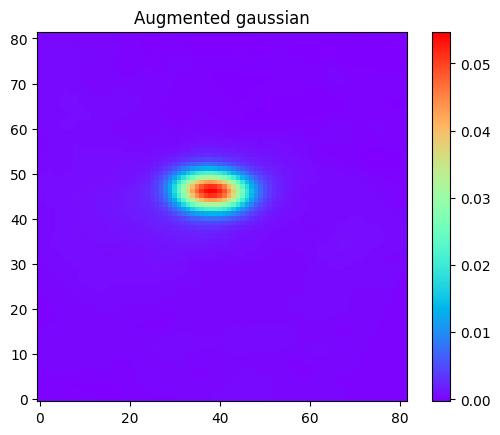

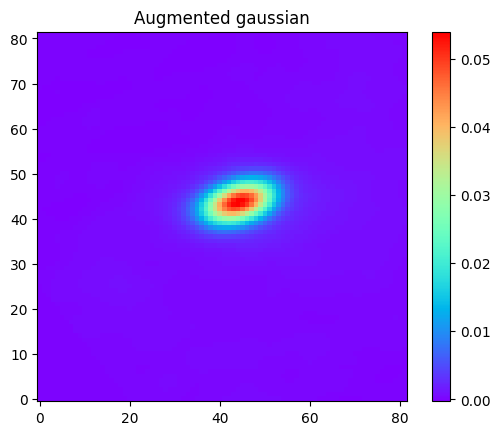

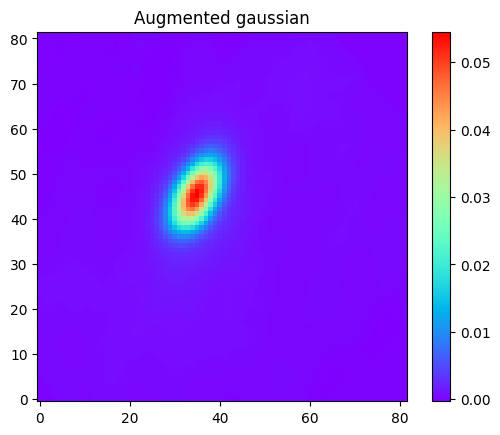

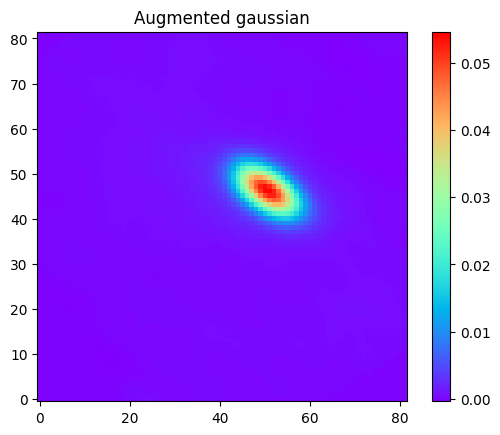

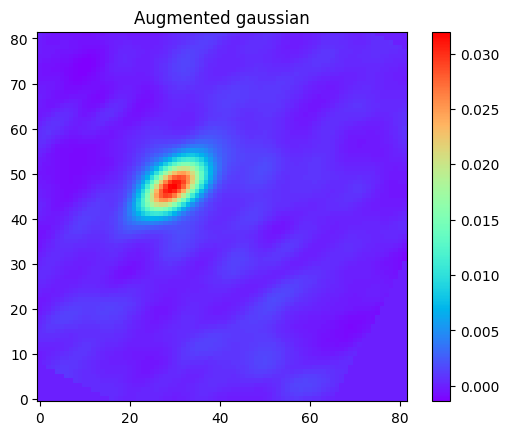

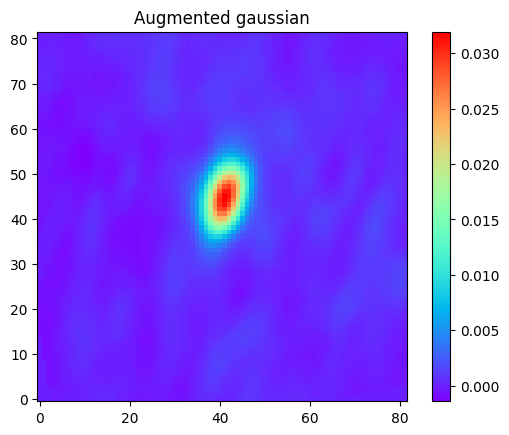

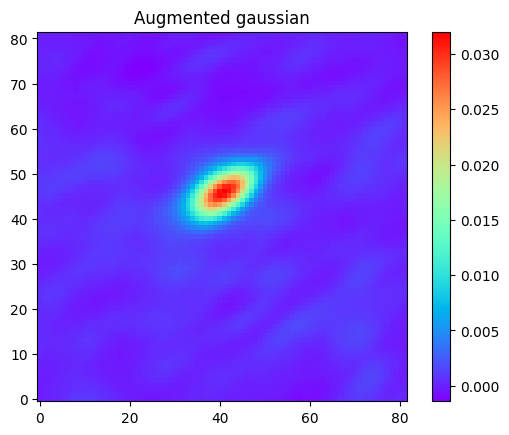

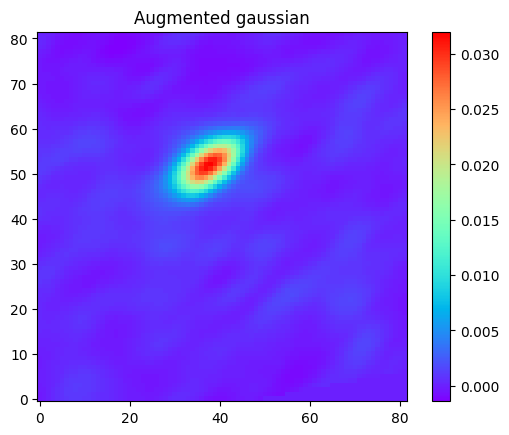

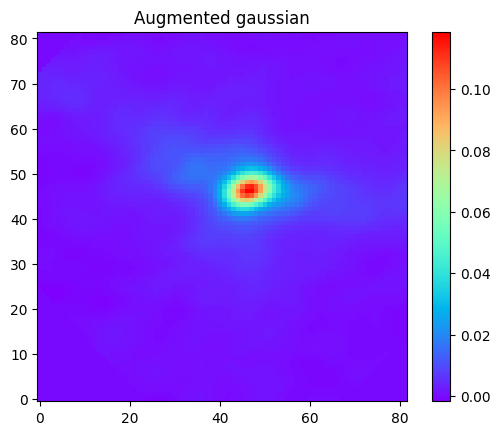

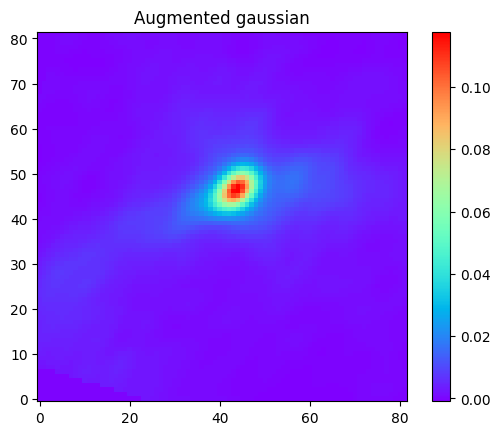

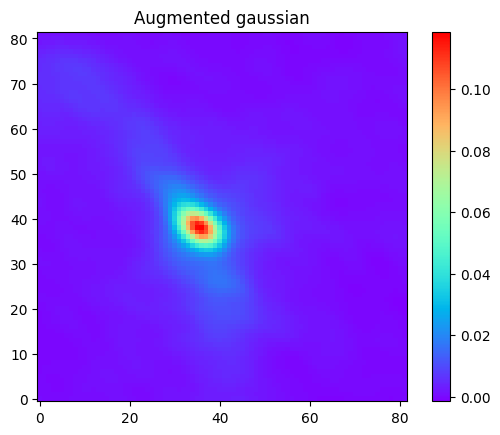

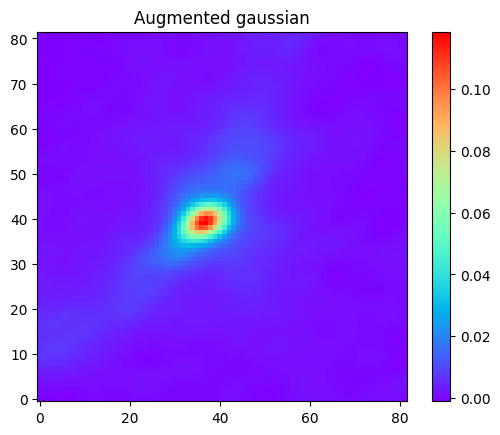

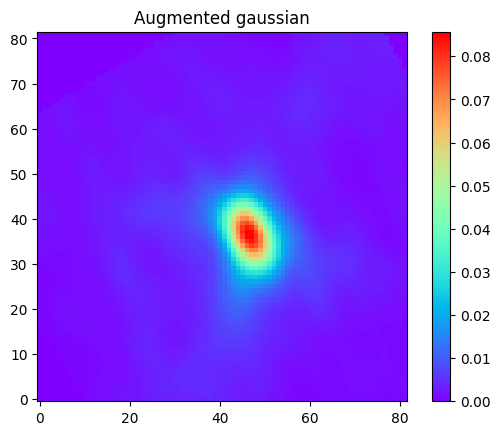

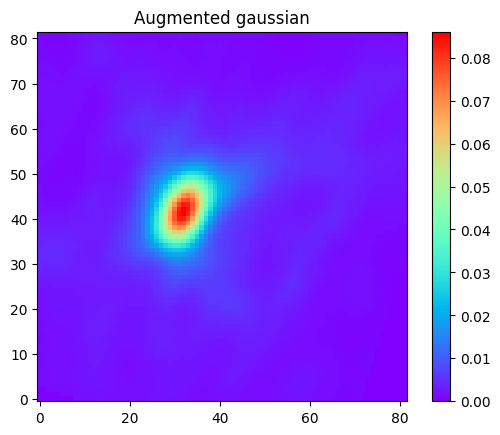

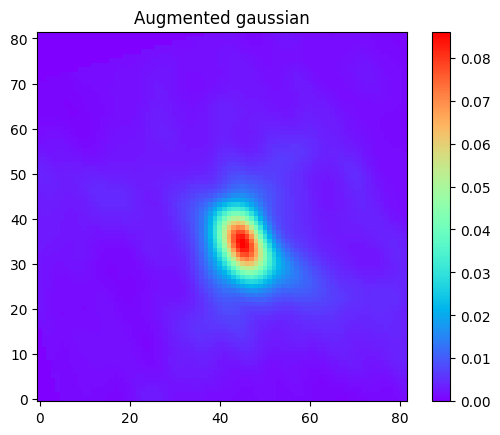

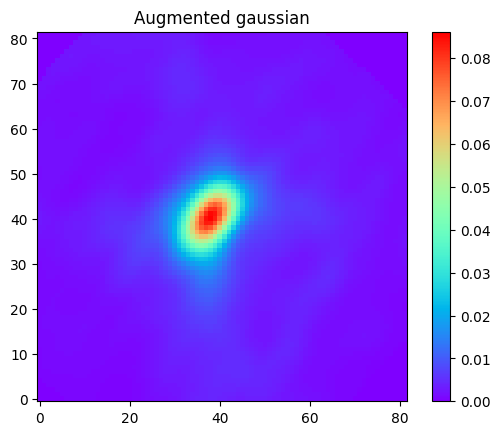

In [202]:
augmentations_per_gaussian = 4
for gaussian in gaussians:
    for i in range(0, augmentations_per_gaussian):
        plt.figure()
        plt.imshow(augment(gaussian.data), origin='lower', cmap='rainbow')
        plt.colorbar()
        plt.title("Augmented gaussian")
        plt.show()

# CNN

In [2]:
# importing the required libraries


from sklearn.model_selection import train_test_split


In [253]:



X1 = generate_pos_dataset(50) 
X2 =(generate_neg_dataset(50))

plt.figure()
plt.imshow(X1[100], origin='lower', cmap='rainbow')
plt.colorbar()
plt.title("Augmented gaussian")
plt.show()



y = [0]*len(X1) + [1]*len(X2)

print(X1.shape)

X_train, X_test, y_train, y_test = train_test_split(X1+ X2, y, test_size=0.25, random_state=1337)





y_test = generate_neg_dataset(50)
X_train = generate_pos_dataset(50)
y_train = generate_neg_dataset(50)

# Save X_test and y_test
np.save('X_test', X_test)

# X_train, X_test, y_train, y_test = train_test_split(
#     x, y, test_size=.33)

# reshaping data
X_train = X_train.reshape(
    (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape(
    (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
# normalizing the pixel values
X_train = X_train/255
X_test = X_test/255

# defining model
model = Sequential()
# adding convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# adding pooling layer
model.add(MaxPool2D(2, 2))
# adding fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
# adding output layer
model.add(Dense(10, activation='softmax'))
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# fitting the model
model.fit(X_train, y_train, epochs=10)


Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset
Appending 

IndexError: index 100 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 0 Axes>